Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, 'lambda_l2':3,
# Version = "v59" # inference used v53, 'lambda_l2':15,

Version = "v60" # inference used v53, 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,

In [2]:
# DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3th November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v53.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648          d_g_max_min_p       df_g-420   
2                         g-643                d_g-401    cut_d_g-152   
3                         g-498                  g-497        d_g-534   
4                       d_g-478                d_g-685       df_g-322   
..                          ...                    ...            ...   
195                       g-317               df_g-589          g-596   
196                     d_g-317           cut_df_g-238    cut_d_g-763   
197                       g-427               df_g-229        df_c-51   
198                       g-638            cut_d_g-712       df_g-655   
199                       g-462               df_g-262      cut_g-672   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                      cut_d_g-363                            df_c-6   
1                           d_g-39                         cut_g-760   
2                      cut_d_g-641                       cut_d_g-763   
3                       cut_d_c-75                        cut_d_g-87   
4                      cut_d_g-521                       cut_d_g-744   
..                             ...                               ...   
195                    cut_d_g-422                              c-85   
196                          g-251                             g-497   
197                        d_g-699                             g-500   
198                       df_g-709                           d_g-641   
199                           g-16                             g-597   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                cut_d_g-142   
1                      cut_d_g-208                 cut_d_g-23   
2                          df_g-91                cut_d_g-641   
3                      cut_d_g-348                   df_g-386   
4                      cut_d_g-132                cut_d_g-521   
..                             ...                        ...   
195                       df_g-758                    df_c-65   
196                          g-707                   df_g-606   
197                          g-426                g_max_sum_p   
198                          g-456                      g-497   
199                    cut_d_g-647                  c_all_min   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-430                    d_g-639   
2                         d_g-310                      g-138   
3                      cut_d_g-85                      g-344   
4                       cut_g-760                        c-7   
..                            ...                        ...   
195                    cut_d_c-89                  cut_g-672   
196                      df_g-115                cut_d_g-645   
197                       df_c-36                      g-720   
198                       df_g-13                      g-531   
199             c_all_kurt_skew_d                    d_g-242   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                   cut_d_g-705  ...                                 g-226   
1                    cut_d_g-50  ...                               d_g-283   
2                   cut_d_g-300  ...                           cut_d_g-225   
3                         g-385  ...                                 g-689   
4                 d_g_max_min_p  ...                               df_g-31   
..                          ...  ...                                   ...   
195                    df_c_sum  ...                                 g-422   
196                     d_g-705  ...                                  c-80   
197       

# Training Utils

In [13]:
#===========================================================
# model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Multi_Stratification(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}, target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # run lgbm
    y_preds, score = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds) / len(y_preds), score

In [14]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [15]:
# Under sampling func with drug anotation(New data file)

def Multi_Stratification(df, target_col, target):
    
    _df = df.copy() 
    sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
    # Remove sig_id wih target 
    del_idx = train[target==1].sig_id.unique()
    select_idx = [i for i in sig_id_lst if i not in del_idx]
    print(f"neg labels: {len(sig_id_lst)} → selected neg labels: {len(select_idx)}")
    
    # Select negative target
    _df = _df.set_index('sig_id')
    _df = _df.loc[select_idx, :]
    _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    
    return _df

In [16]:
def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
    
    score = log_loss(_train_y, oof_train)
    
    logger.info(f"{target_col} logloss: {score}")
    logger.info(f"=========================================================================================")
 
    return y_preds, score   

In [17]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        logger.info(f"{iter_} / {max_iter} AUC score:{auc_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}, Num_p_label: {sum(p_label)}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")        

        p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob)
        
        # select data with confidence
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [18]:
# lgbm with pseudo_labeling

classifier_params = {
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'n_estimators': Num_boost_round,
    'learning_rate': 0.03,
    'objective': "binary",
    'colsample_bytree': 0.4,
    'subsample': 0.7,
    'subsample_freq': 3,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'random_state': SEED,
    'n_jobs': 2
    }

In [19]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, y_preds, y_prob, _importance_df, feature_importance_df):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=300,
                early_stopping_rounds=Early_stopping_rounds)
            
        y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df = pd.concat([feature_importance_df, _importance_df], axis=0)
        
    return y_preds, y_prob, feature_importance_df
    

In [20]:
def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    return _X, _y, _X_test
    

In [21]:
def convert_label(df, conf_0, conf_1, threshold=0.5):
    
    df = df.copy()
    Probability = df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [22]:
def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, p_label_rate, target_rate, y_prob):
    
    # Set the params of threshold based on train labels rate (target_rate).
    
    if (p_label_rate*1.5) < target_rate:
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label)*(3.5-len(str(int(check)))) >= check) or ((Threshold-0.02) <= 0.1): break 
            Threshold -= 0.02
            high_conf_0, high_conf_1 = max(0.1, Threshold*lower), Threshold*upper
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
               
                
    if p_label_rate > (target_rate*1.5):
        check = len(y_prob)*target_rate
        for i in range(10):
            logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold:.7f}")
            if (sum(p_label) <= check*(3.5-len(str(int(check))))) or ((Threshold+0.02) >= 0.8): break
            Threshold += 0.02
            high_conf_0, high_conf_1 = min(Threshold*lower, 0.5), min(Threshold*upper, 0.8)
            p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold

In [23]:
def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [24]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [25]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [26]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [27]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [28]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [29]:
# clipping

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [30]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [31]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [32]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [33]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [34]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [35]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [36]:
std_df = data.iloc[:, 4:].copy()

In [37]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [38]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [39]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [40]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [41]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [42]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [43]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [44]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [45]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [46]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.03,
    'num_threads': 2,
    'verbose': -1,
    'max_depth': Max_depth,
    'num_leaves': int((Max_depth**2)*0.7),
    'feature_fraction':0.4, # randomly select part of features on each iteration
    'lambda_l1':0.1,
    'lambda_l2':0.1,
    'bagging_fraction': 0.7,
    'bagging_freq': 1,
}


In [47]:
categorical_cols = []

def RUN():
    
    scores = []

    for target_col in tqdm(train_targets_scored.columns[1:]):
        _preds, _score = run_lgbm(target_col)

        sub[target_col] = _preds
        scores.append(_score)
    
    sub.to_csv('submission.csv', index=False)
    
    return scores

neg labels: 3289 → selected neg labels: 3284


5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284, target_rate: 0.0007139 → Adj_target_rate: 0.0009334
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115509	valid_1's binary_logloss: 0.00383284
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000371132	valid_1's binary_logloss: 0.00239349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001129	valid_1's binary_logloss: 0.00396186
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000372397	valid_1's binary_logloss: 0.00208666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117915	valid_1's binary_logloss: 0.0024044
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000372504	valid_1's binary_logloss: 0.000880748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113979	valid_1's binary_logloss: 0.00538685


1 / 3 AUC score:1.000
y_Threshold: 0.0018908, Threshold: 0.0060767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071, Num_p_label: 40.0, conf_0:0.00425, conf_1:0.00790
Num_p_label: 40.0, Expected: 2.8, Adj_threshold_1: 0.0060767
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_2: 0.0260767


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000367085	valid_1's binary_logloss: 0.00349738


threshold: 0.0260767, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106093	valid_1's binary_logloss: 0.003671
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000354191	valid_1's binary_logloss: 0.00223632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106199	valid_1's binary_logloss: 0.00301912
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000359476	valid_1's binary_logloss: 0.00155246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108028	valid_1's binary_logloss: 0.00254571
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000378529	valid_1's binary_logloss: 0.00109544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108841	valid_1's binary_logloss: 0.00527509


2 / 3 AUC score:1.000
y_Threshold: 0.0432092, Threshold: 0.0260767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00071, Num_p_label: 26.0, conf_0:0.02086, conf_1:0.03129
Num_p_label: 26.0, Expected: 2.8, Adj_threshold_1: 0.0260767
Num_p_label: 12.0, Expected: 2.8, Adj_threshold_2: 0.0460767
Num_p_label: 8.0, Expected: 2.8, Adj_threshold_3: 0.0660767
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_4: 0.0860767


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000372624	valid_1's binary_logloss: 0.0039031


threshold: 0.0860767, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106093	valid_1's binary_logloss: 0.003671
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000354191	valid_1's binary_logloss: 0.00223632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106199	valid_1's binary_logloss: 0.00301912
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000359476	valid_1's binary_logloss: 0.00155246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108028	valid_1's binary_logloss: 0.00254571
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000378529	valid_1's binary_logloss: 0.00109544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108841	valid_1's binary_logloss: 0.00527509


3 / 3 AUC score:1.000
y_Threshold: 0.0432092, Threshold: 0.0860767, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071, Num_p_label: 6.0, conf_0:0.07747, conf_1:0.09468
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_1: 0.0860767
threshold: 0.0860767, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000372624	valid_1's binary_logloss: 0.0039031


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


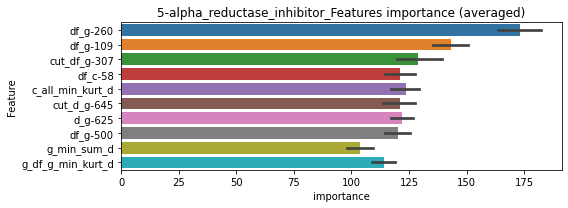

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.0003544	valid_1's binary_logloss: 0.00210732
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000353508	valid_1's binary_logloss: 0.00110519
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000383665	valid_1's binary_logloss: 0.00120808
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.002227451167388001


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000370675	valid_1's binary_logloss: 0.00448327
neg labels: 3289 → selected neg labels: 3286


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121886	valid_1's binary_logloss: 0.00275815
[600]	training's binary_logloss: 0.000364359	valid_1's binary_logloss: 0.00118553
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000364359	valid_1's binary_logloss: 0.00118553
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120145	valid_1's binary_logloss: 0.00287918
[600]	training's binary_logloss: 0.000359339	valid_1's binary_logloss: 0.00127325
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000356686	valid_1's binary_logloss: 0.00127033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121903	valid_1's binary_logloss: 0.00345791
[600]	training's binary_logloss: 0.000361674	valid_1's binary_logloss: 0.00207152
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000369149	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0018990, Threshold: 0.0058003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00406, conf_1:0.00754
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0058003
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0258003
threshold: 0.0258003, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112592	valid_1's binary_logloss: 0.00214063
[600]	training's binary_logloss: 0.000348109	valid_1's binary_logloss: 0.000831418
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000348129	valid_1's binary_logloss: 0.000831349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111489	valid_1's binary_logloss: 0.0026306
[600]	training's binary_logloss: 0.000344669	valid_1's binary_logloss: 0.00120853
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000341472	valid_1's binary_logloss: 0.00119976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114377	valid_1's binary_logloss: 0.0030011
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000360517	valid_1's binary_logloss: 0.00169339
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0667476, Threshold: 0.0258003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0032647 Vs.target_rate: 0.00076, Num_p_label: 13.0, conf_0:0.02064, conf_1:0.03096
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.0258003
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0458003
threshold: 0.0458003, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112592	valid_1's binary_logloss: 0.00214063
[600]	training's binary_logloss: 0.000348109	valid_1's binary_logloss: 0.000831418
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000348129	valid_1's binary_logloss: 0.000831349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111489	valid_1's binary_logloss: 0.0026306
[600]	training's binary_logloss: 0.000344669	valid_1's binary_logloss: 0.00120853
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000341472	valid_1's binary_logloss: 0.00119976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114377	valid_1's binary_logloss: 0.0030011
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000360517	valid_1's binary_logloss: 0.00169339
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0667476, Threshold: 0.0458003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.04122, conf_1:0.05038
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0458003
threshold: 0.0458003, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


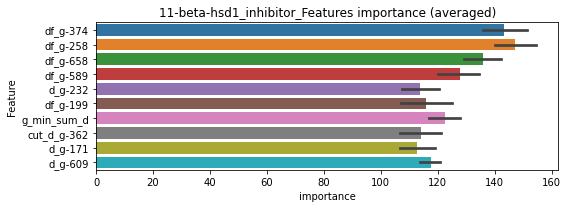

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000351301	valid_1's binary_logloss: 0.00105931
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000345481	valid_1's binary_logloss: 0.00134915
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000355849	valid_1's binary_logloss: 0.0019317
Training until validation scores don't improve for 30 rounds


11-beta-hsd1_inhibitor logloss: 0.0012785982153673458


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000364689	valid_1's binary_logloss: 0.000773706
neg labels: 3289 → selected neg labels: 3282


acat_inhibitor, len(trt): 24, len(othr): 3282, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161063	valid_1's binary_logloss: 0.00832618
[600]	training's binary_logloss: 0.000404402	valid_1's binary_logloss: 0.00543636
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000393116	valid_1's binary_logloss: 0.00536158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169426	valid_1's binary_logloss: 0.007876
[600]	training's binary_logloss: 0.000416865	valid_1's binary_logloss: 0.00553303
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000421035	valid_1's binary_logloss: 0.00551345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174178	valid_1's binary_logloss: 0.00364989
[600]	training's binary_logloss: 0.00041924	valid_1's binary_logloss: 0.00155764
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000398799	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0022316, Threshold: 0.0063586, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00445, conf_1:0.00827


[600]	training's binary_logloss: 0.000405226	valid_1's binary_logloss: 0.0084724
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000422222	valid_1's binary_logloss: 0.00841839


Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0063586
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0263586
threshold: 0.0263586, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152867	valid_1's binary_logloss: 0.00835575
[600]	training's binary_logloss: 0.00039735	valid_1's binary_logloss: 0.00576807
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000386191	valid_1's binary_logloss: 0.00575692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163306	valid_1's binary_logloss: 0.00648058
[600]	training's binary_logloss: 0.000405061	valid_1's binary_logloss: 0.00492968
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000424585	valid_1's binary_logloss: 0.00486273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162218	valid_1's binary_logloss: 0.00405663
[600]	training's binary_logloss: 0.000406449	valid_1's binary_logloss: 0.00192384
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00039457	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0129068, Threshold: 0.0263586, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0050226 Vs.target_rate: 0.00101, Num_p_label: 20.0, conf_0:0.02109, conf_1:0.03163
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_1: 0.0263586
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_2: 0.0463586


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000432126	valid_1's binary_logloss: 0.00851342


Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.0663586
threshold: 0.0663586, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152867	valid_1's binary_logloss: 0.00835575
[600]	training's binary_logloss: 0.00039735	valid_1's binary_logloss: 0.00576807
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000386191	valid_1's binary_logloss: 0.00575692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163306	valid_1's binary_logloss: 0.00648058
[600]	training's binary_logloss: 0.000405061	valid_1's binary_logloss: 0.00492968
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000424585	valid_1's binary_logloss: 0.00486273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162218	valid_1's binary_logloss: 0.00405663
[600]	training's binary_logloss: 0.000406449	valid_1's binary_logloss: 0.00192384
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00039457	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0129068, Threshold: 0.0663586, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00101, Num_p_label: 8.0, conf_0:0.05972, conf_1:0.07299
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0663586


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000432126	valid_1's binary_logloss: 0.00851342


threshold: 0.0663586, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


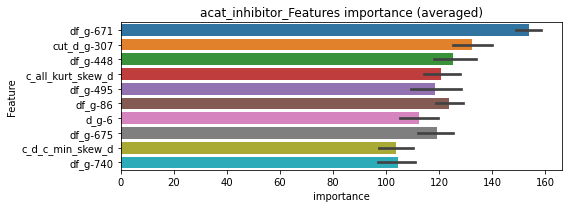

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000396797	valid_1's binary_logloss: 0.00616057
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000679688	valid_1's binary_logloss: 0.00539208
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000407889	valid_1's binary_logloss: 0.00259258
Training until validation scores don't improve for 30 rounds


acat_inhibitor logloss: 0.005596415757229498


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000453692	valid_1's binary_logloss: 0.00824005
neg labels: 3289 → selected neg labels: 3261


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 3261, target_rate: 0.0079785 → Adj_target_rate: 0.0072634
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0310854	valid_1's binary_logloss: 0.184186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022754	valid_1's binary_logloss: 0.142853
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00619424	valid_1's binary_logloss: 0.135899
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0236517	valid_1's binary_logloss: 0.16017
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0122947	valid_1's binary_logloss: 0.1536
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0244876	valid_1's binary_logloss: 0.157596


1 / 3 AUC score:0.957
y_Threshold: 0.0550630, Threshold: 0.2934541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 271 → Positive_corect_labels: 582/3642
p_label_rate: 0.0100452 Vs.target_rate: 0.00798, Num_p_label: 40.0, conf_0:0.20542, conf_1:0.38149


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0156683	valid_1's binary_logloss: 0.152897


threshold: 0.2934541, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 582.0/3642, y_label_rate: 0.1598023
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.012684	valid_1's binary_logloss: 0.128516
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00743519	valid_1's binary_logloss: 0.12494
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135511	valid_1's binary_logloss: 0.113269
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00515547	valid_1's binary_logloss: 0.108985
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140908	valid_1's binary_logloss: 0.105522
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00544392	valid_1's binary_logloss: 0.0984698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0146295	valid_1's binary_logloss: 0.0879798
[600]	training's binary_logloss: 0.00243537	valid_1's binary_logloss: 0.0758879
Early stopping, best i

2 / 3 AUC score:0.991
y_Threshold: 0.0621295, Threshold: 0.2934541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 540.0/3558
p_label_rate: 0.0226017 Vs.target_rate: 0.00798, Num_p_label: 90.0, conf_0:0.23476, conf_1:0.35214
Num_p_label: 90.0, Expected: 31.8, Adj_threshold_1: 0.2934541
Num_p_label: 84.0, Expected: 31.8, Adj_threshold_2: 0.3134541
Num_p_label: 77.0, Expected: 31.8, Adj_threshold_3: 0.3334541
Num_p_label: 75.0, Expected: 31.8, Adj_threshold_4: 0.3534541
Num_p_label: 70.0, Expected: 31.8, Adj_threshold_5: 0.3734541
Num_p_label: 68.0, Expected: 31.8, Adj_threshold_6: 0.3934541
Num_p_label: 61.0, Expected: 31.8, Adj_threshold_7: 0.4134541
Num_p_label: 54.0, Expected: 31.8, Adj_threshold_8: 0.4334541
Num_p_label: 48.0, Expected: 31.8, Adj_threshold_9: 0.4534541
Num_p_label: 43.0, Expected: 31.8, Adj_threshold_10: 0.4734541
threshold: 0.4734541, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 540.0/3558, y_label_rate: 0.1517707

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993741	valid_1's binary_logloss: 0.0930225
[600]	training's binary_logloss: 0.00172971	valid_1's binary_logloss: 0.0880899
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00165749	valid_1's binary_logloss: 0.0875729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108595	valid_1's binary_logloss: 0.0656812
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00266697	valid_1's binary_logloss: 0.0547077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101556	valid_1's binary_logloss: 0.0875941
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00384373	valid_1's binary_logloss: 0.0813661
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106473	valid_1's binary_logloss: 0.0694144
Early stopping

3 / 3 AUC score:0.997
y_Threshold: 0.0475488, Threshold: 0.4734541, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 521.0/3520
p_label_rate: 0.0102963 Vs.target_rate: 0.00798, Num_p_label: 41.0, conf_0:0.42611, conf_1:0.52080
threshold: 0.4734541, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 521.0/3520, y_label_rate: 0.1480114


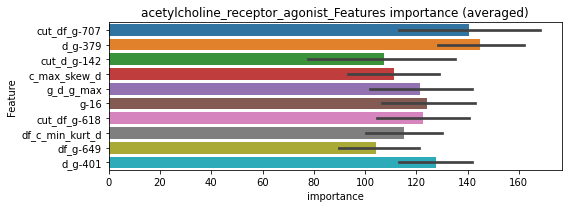

len(train_index) : 2640
len(valid_index) : 880
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00167116	valid_1's binary_logloss: 0.0617071


len(train_index) : 2640
len(valid_index) : 880
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00184746	valid_1's binary_logloss: 0.0492236


len(train_index) : 2640
len(valid_index) : 880
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00193049	valid_1's binary_logloss: 0.0593166


len(train_index) : 2640
len(valid_index) : 880
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00115418	valid_1's binary_logloss: 0.0441575


acetylcholine_receptor_agonist logloss: 0.05360116932126063


neg labels: 3289 → selected neg labels: 3241


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 3241, target_rate: 0.0126396 → Adj_target_rate: 0.0107394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0424535	valid_1's binary_logloss: 0.266703
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.0495346	valid_1's binary_logloss: 0.266352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[251]	training's binary_logloss: 0.0599773	valid_1's binary_logloss: 0.289218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0465722	valid_1's binary_logloss: 0.253613
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.0352546	valid_1's binary_logloss: 0.25097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0454939	valid_1's binary_logloss: 0.256117


1 / 3 AUC score:0.867
y_Threshold: 0.0970305, Threshold: 0.1933506, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.0383991	valid_1's binary_logloss: 0.254521


Remove_noisy_data: 472 → Positive_corect_labels: 477/3417
p_label_rate: 0.0100452 Vs.target_rate: 0.01264, Num_p_label: 40.0, conf_0:0.13535, conf_1:0.25136
threshold: 0.1933506, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 477.0/3417, y_label_rate: 0.1395961
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155142	valid_1's binary_logloss: 0.157318
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00903402	valid_1's binary_logloss: 0.154278
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160962	valid_1's binary_logloss: 0.135259
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00928733	valid_1's binary_logloss: 0.130876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0165424	valid_1's binary_logloss: 0.131762
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00387345	valid_1's binary_logloss: 0.123365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163755	valid_1's binary_logloss: 0.128032
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.004317	valid_1's binary_logloss:

2 / 3 AUC score:0.983
y_Threshold: 0.0602245, Threshold: 0.1933506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 96 → Positive_corect_labels: 429.0/3321
p_label_rate: 0.0070316 Vs.target_rate: 0.01264, Num_p_label: 28.0, conf_0:0.15468, conf_1:0.23202
Num_p_label: 28.0, Expected: 50.3, Adj_threshold_1: 0.1933506
Num_p_label: 30.0, Expected: 50.3, Adj_threshold_2: 0.1733506
Num_p_label: 37.0, Expected: 50.3, Adj_threshold_3: 0.1533506
threshold: 0.1533506, positive_p_label: 37.0/3982, p_label_rate: 0.0092918
positive_y_label: 429.0/3321, y_label_rate: 0.1291780
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110354	valid_1's binary_logloss: 0.110359
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00324722	valid_1's binary_logloss: 0.102758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115696	valid_1's binary_logloss: 0.117735
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00473731	valid_1's binary_logloss: 0.111605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118915	valid_1's binary_logloss: 0.0914557
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00372379	valid_1's binary_logloss: 0.0840257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114143	valid_1's binary_logloss: 0.109952


3 / 3 AUC score:0.992


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00419708	valid_1's binary_logloss: 0.105257


y_Threshold: 0.0521189, Threshold: 0.1533506, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 405.0/3273
p_label_rate: 0.0087896 Vs.target_rate: 0.01264, Num_p_label: 35.0, conf_0:0.13802, conf_1:0.16869
threshold: 0.1533506, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 405.0/3273, y_label_rate: 0.1237397


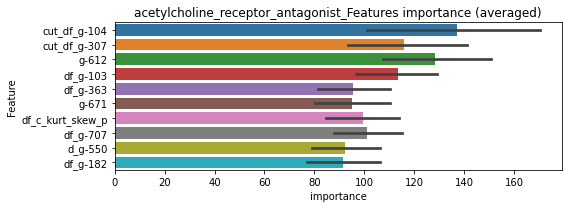

len(train_index) : 2454
len(valid_index) : 819
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00247193	valid_1's binary_logloss: 0.106479


len(train_index) : 2455
len(valid_index) : 818
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00139518	valid_1's binary_logloss: 0.0736181


len(train_index) : 2455
len(valid_index) : 818
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00227974	valid_1's binary_logloss: 0.0539913


len(train_index) : 2455
len(valid_index) : 818
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_antagonist logloss: 0.08805645485918291


Early stopping, best iteration is:
[316]	training's binary_logloss: 0.00798057	valid_1's binary_logloss: 0.118115
neg labels: 3289 → selected neg labels: 3281


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660871	valid_1's binary_logloss: 0.0599034
[600]	training's binary_logloss: 0.00116024	valid_1's binary_logloss: 0.0501119
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00107121	valid_1's binary_logloss: 0.0496682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00724495	valid_1's binary_logloss: 0.0413454
[600]	training's binary_logloss: 0.00122019	valid_1's binary_logloss: 0.0302554
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000876752	valid_1's binary_logloss: 0.0296337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00801701	valid_1's binary_logloss: 0.0292728
[600]	training's binary_logloss: 0.0013054	valid_1's binary_logloss: 0.0181766
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00116005	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00246988	valid_1's binary_logloss: 0.0644821


y_Threshold: 0.0106193, Threshold: 0.0406823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.02848, conf_1:0.05289
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0406823
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.0606823
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_3: 0.0806823
threshold: 0.0806823, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3791, y_label_rate: 0.1711949
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613482	valid_1's binary_logloss: 0.056019
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00174501	valid_1's binary_logloss: 0.0505428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00656118	valid_1's binary_logloss: 0.0423389
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00150393	valid_1's binary_logloss: 0.0348651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00668992	valid_1's binary_logloss: 0.0371557
[600]	training's binary_logloss: 0.0011602	valid_1's binary_logloss: 0.0259128
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000834197	valid_1's binary_logloss: 0.0249629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00657777	valid_1's binary_logloss: 0.0321925
[600]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0393098, Threshold: 0.0806823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3775
p_label_rate: 0.0102963 Vs.target_rate: 0.00307, Num_p_label: 41.0, conf_0:0.06455, conf_1:0.09682
Num_p_label: 41.0, Expected: 12.2, Adj_threshold_1: 0.0806823
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_2: 0.1006823
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_3: 0.1206823
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_4: 0.1406823
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_5: 0.1606823
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_6: 0.1806823
threshold: 0.1806823, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 641.0/3775, y_label_rate: 0.1698013
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057134	valid_1's binary_logloss: 0.0326821
[600]	training's binary_logloss: 0.00105082	valid_1's binary_logloss: 0.021962
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000702851	valid_1's binary_logloss: 0.02099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590998	valid_1's binary_logloss: 0.0362887
[600]	training's binary_logloss: 0.00105366	valid_1's binary_logloss: 0.0281431
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000993597	valid_1's binary_logloss: 0.0277986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00595794	valid_1's binary_logloss: 0.0324415
[600]	training's binary_logloss: 0.00106619	valid_1's binary_logloss: 0.0244478
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00080937	valid_1's binary_logloss: 0.02

3 / 3 AUC score:1.000
y_Threshold: 0.0467826, Threshold: 0.1806823, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0057760 Vs.target_rate: 0.00307, Num_p_label: 23.0, conf_0:0.16261, conf_1:0.19875
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_1: 0.1806823
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_2: 0.2006823
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_3: 0.2206823
threshold: 0.2206823, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 638.0/3769, y_label_rate: 0.1692757


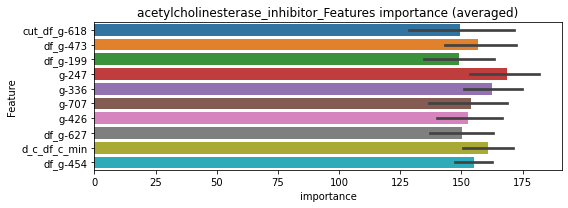

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00101882	valid_1's binary_logloss: 0.0279328


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000677304	valid_1's binary_logloss: 0.00995124


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000962518	valid_1's binary_logloss: 0.0182378


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00106093	valid_1's binary_logloss: 0.0347783


acetylcholinesterase_inhibitor logloss: 0.022731403221250474


neg labels: 3289 → selected neg labels: 3278


adenosine_receptor_agonist, len(trt): 54, len(othr): 3278, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408144	valid_1's binary_logloss: 0.025341
[600]	training's binary_logloss: 0.00078653	valid_1's binary_logloss: 0.0178456
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00064881	valid_1's binary_logloss: 0.0173439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0042961	valid_1's binary_logloss: 0.0137505
[600]	training's binary_logloss: 0.00082071	valid_1's binary_logloss: 0.00706308
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000639674	valid_1's binary_logloss: 0.00668233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413033	valid_1's binary_logloss: 0.0188298
[600]	training's binary_logloss: 0.000795581	valid_1's binary_logloss: 0.012368
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000581717	valid_1's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0052970, Threshold: 0.0215638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.01509, conf_1:0.02803
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0215638
Num_p_label: 18.0, Expected: 9.0, Adj_threshold_2: 0.0415638
threshold: 0.0415638, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00376838	valid_1's binary_logloss: 0.024641
[600]	training's binary_logloss: 0.00075056	valid_1's binary_logloss: 0.0177273
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00067127	valid_1's binary_logloss: 0.0174147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00410035	valid_1's binary_logloss: 0.0124232
[600]	training's binary_logloss: 0.000784097	valid_1's binary_logloss: 0.00624696
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000606092	valid_1's binary_logloss: 0.00582777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407863	valid_1's binary_logloss: 0.0169729
[600]	training's binary_logloss: 0.000773572	valid_1's binary_logloss: 0.0105368
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000653062	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0185539, Threshold: 0.0415638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0095429 Vs.target_rate: 0.00227, Num_p_label: 38.0, conf_0:0.03325, conf_1:0.04988
Num_p_label: 38.0, Expected: 9.0, Adj_threshold_1: 0.0415638
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_2: 0.0615638
Num_p_label: 13.0, Expected: 9.0, Adj_threshold_3: 0.0815638
threshold: 0.0815638, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386603	valid_1's binary_logloss: 0.02597
[600]	training's binary_logloss: 0.000747903	valid_1's binary_logloss: 0.0187553
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000628465	valid_1's binary_logloss: 0.0185215
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414705	valid_1's binary_logloss: 0.00935396
[600]	training's binary_logloss: 0.000791913	valid_1's binary_logloss: 0.00348165
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000581318	valid_1's binary_logloss: 0.00301297
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408536	valid_1's binary_logloss: 0.0106897
[600]	training's binary_logloss: 0.000793994	valid_1's binary_logloss: 0.00403587
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000601665	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0279051, Threshold: 0.0815638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0030136 Vs.target_rate: 0.00227, Num_p_label: 12.0, conf_0:0.07341, conf_1:0.08972
threshold: 0.0815638, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3797, y_label_rate: 0.1719779


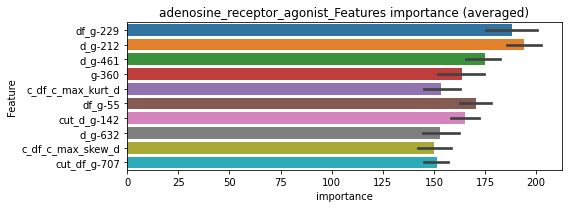

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000645792	valid_1's binary_logloss: 0.0141861


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000589225	valid_1's binary_logloss: 0.00648015


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000625427	valid_1's binary_logloss: 0.00916559


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000600953	valid_1's binary_logloss: 0.00799648


adenosine_receptor_agonist logloss: 0.009458598908385229


neg labels: 3289 → selected neg labels: 3276


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3276, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115606	valid_1's binary_logloss: 0.0640408
[600]	training's binary_logloss: 0.00174572	valid_1's binary_logloss: 0.0497935
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.00129621	valid_1's binary_logloss: 0.048542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117573	valid_1's binary_logloss: 0.0530779
[600]	training's binary_logloss: 0.0017734	valid_1's binary_logloss: 0.0354812
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00126205	valid_1's binary_logloss: 0.0342277
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110157	valid_1's binary_logloss: 0.0727747
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00254252	valid_1's binary_logloss: 0.0638461
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.994
y_Threshold: 0.0143170, Threshold: 0.0485315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 162 → Positive_corect_labels: 640/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.03397, conf_1:0.06309
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0485315
Num_p_label: 16.0, Expected: 16.1, Adj_threshold_2: 0.0685315
threshold: 0.0685315, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 640.0/3769, y_label_rate: 0.1698063
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00954947	valid_1's binary_logloss: 0.0510548
[600]	training's binary_logloss: 0.00150159	valid_1's binary_logloss: 0.0342109
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.00100886	valid_1's binary_logloss: 0.0326846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00855166	valid_1's binary_logloss: 0.0469443
[600]	training's binary_logloss: 0.00140864	valid_1's binary_logloss: 0.03186
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000964504	valid_1's binary_logloss: 0.0304674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00902757	valid_1's binary_logloss: 0.0392652
[600]	training's binary_logloss: 0.0014596	valid_1's binary_logloss: 0.0256359
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00108994	valid_1's binary_logloss: 0.02

2 / 3 AUC score:0.999
y_Threshold: 0.0349227, Threshold: 0.0685315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 634.0/3757
p_label_rate: 0.0125565 Vs.target_rate: 0.00403, Num_p_label: 50.0, conf_0:0.05483, conf_1:0.08224
Num_p_label: 50.0, Expected: 16.1, Adj_threshold_1: 0.0685315
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_2: 0.0885315
Num_p_label: 26.0, Expected: 16.1, Adj_threshold_3: 0.1085315
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_4: 0.1285315
threshold: 0.1285315, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 634.0/3757, y_label_rate: 0.1687517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843015	valid_1's binary_logloss: 0.0590378
[600]	training's binary_logloss: 0.00139484	valid_1's binary_logloss: 0.0460284
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000955669	valid_1's binary_logloss: 0.0445171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874643	valid_1's binary_logloss: 0.0471782
[600]	training's binary_logloss: 0.00142354	valid_1's binary_logloss: 0.0308256
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000900897	valid_1's binary_logloss: 0.0285632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00862486	valid_1's binary_logloss: 0.0432627
[600]	training's binary_logloss: 0.00140384	valid_1's binary_logloss: 0.0271417
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000951413	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0331352, Threshold: 0.1285315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 628.0/3745
p_label_rate: 0.0082873 Vs.target_rate: 0.00403, Num_p_label: 33.0, conf_0:0.11568, conf_1:0.14138
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_1: 0.1285315
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_2: 0.1485315
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_3: 0.1685315
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_4: 0.1885315
threshold: 0.1885315, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 628.0/3745, y_label_rate: 0.1676903


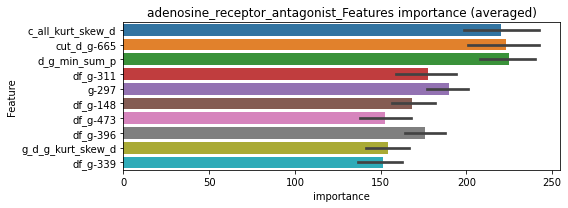

len(train_index) : 2808
len(valid_index) : 937
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000800009	valid_1's binary_logloss: 0.0276856


len(train_index) : 2809
len(valid_index) : 936
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00103841	valid_1's binary_logloss: 0.0416714


len(train_index) : 2809
len(valid_index) : 936
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000888357	valid_1's binary_logloss: 0.0184918


len(train_index) : 2809
len(valid_index) : 936
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00103502	valid_1's binary_logloss: 0.0246583


adenosine_receptor_antagonist logloss: 0.028132220073740836


neg labels: 3289 → selected neg labels: 3289


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00129534	valid_1's binary_logloss: 0.002163
[600]	training's binary_logloss: 0.000371898	valid_1's binary_logloss: 0.000756319
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000360538	valid_1's binary_logloss: 0.000736705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126205	valid_1's binary_logloss: 0.00388951
[600]	training's binary_logloss: 0.000369994	valid_1's binary_logloss: 0.00183705
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000360149	valid_1's binary_logloss: 0.0018112
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128429	valid_1's binary_logloss: 0.00298261
[600]	training's binary_logloss: 0.000370305	valid_1's binary_logloss: 0.00158515
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000365638	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0019586, Threshold: 0.0104313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00730, conf_1:0.01356
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0104313
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0304313
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0504313
threshold: 0.0504313, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114744	valid_1's binary_logloss: 0.00204817
[600]	training's binary_logloss: 0.000347449	valid_1's binary_logloss: 0.000774778
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000341715	valid_1's binary_logloss: 0.000765506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114269	valid_1's binary_logloss: 0.00291342
[600]	training's binary_logloss: 0.000346342	valid_1's binary_logloss: 0.00133931
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000346342	valid_1's binary_logloss: 0.00133931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011811	valid_1's binary_logloss: 0.0021393
[600]	training's binary_logloss: 0.00035054	valid_1's binary_logloss: 0.000959443
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00034863	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.2196829, Threshold: 0.0504313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0110497 Vs.target_rate: 0.00076, Num_p_label: 44.0, conf_0:0.04035, conf_1:0.06052
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.0504313
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_2: 0.0704313
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.0904313
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_4: 0.1104313
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_5: 0.1304313
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_6: 0.1504313
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_7: 0.1704313
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_8: 0.1904313
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_9: 0.2104313
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_10: 0.2304313
threshold: 0.2504313, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114744	valid_1's binary_logloss: 0.00204817
[600]	training's binary_logloss: 0.000347449	valid_1's binary_logloss: 0.000774778
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000341715	valid_1's binary_logloss: 0.000765506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00114269	valid_1's binary_logloss: 0.00291342
[600]	training's binary_logloss: 0.000346342	valid_1's binary_logloss: 0.00133931
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000346342	valid_1's binary_logloss: 0.00133931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011811	valid_1's binary_logloss: 0.0021393
[600]	training's binary_logloss: 0.00035054	valid_1's binary_logloss: 0.000959443
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.00034863	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.2196829, Threshold: 0.2504313, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00076, Num_p_label: 11.0, conf_0:0.22539, conf_1:0.27547
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_1: 0.2504313
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.2704313
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.2904313
threshold: 0.2904313, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


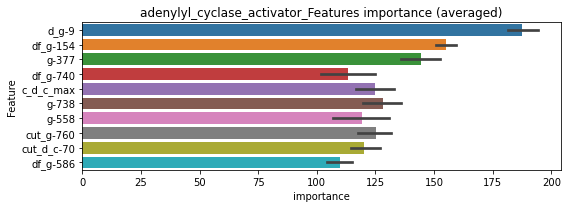

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000356034	valid_1's binary_logloss: 0.000755432
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000352554	valid_1's binary_logloss: 0.00135574
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000355812	valid_1's binary_logloss: 0.00114102
Training until validation scores don't improve for 30 rounds


adenylyl_cyclase_activator logloss: 0.0011462690117989374


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000349786	valid_1's binary_logloss: 0.00133
neg labels: 3289 → selected neg labels: 3254


adrenergic_receptor_agonist, len(trt): 270, len(othr): 3254, target_rate: 0.0113379 → Adj_target_rate: 0.0097917
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0379601	valid_1's binary_logloss: 0.238389
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0250489	valid_1's binary_logloss: 0.234307
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0391545	valid_1's binary_logloss: 0.251068
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.0271202	valid_1's binary_logloss: 0.249548
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.039074	valid_1's binary_logloss: 0.221239
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.0237371	valid_1's binary_logloss: 0.216071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0400725	valid_1's binary_logloss: 0.239424


1 / 3 AUC score:0.903
y_Threshold: 0.0786127, Threshold: 0.5092511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 407 → Positive_corect_labels: 512/3497


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0269159	valid_1's binary_logloss: 0.235762


p_label_rate: 0.0100452 Vs.target_rate: 0.01134, Num_p_label: 40.0, conf_0:0.35648, conf_1:0.66203
threshold: 0.5092511, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 512.0/3497, y_label_rate: 0.1464112
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164371	valid_1's binary_logloss: 0.152728
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00699235	valid_1's binary_logloss: 0.147111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174028	valid_1's binary_logloss: 0.131555
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00389641	valid_1's binary_logloss: 0.121632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0177234	valid_1's binary_logloss: 0.143665
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00776004	valid_1's binary_logloss: 0.135618
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179048	valid_1's binary_logloss: 0.145586


2 / 3 AUC score:0.977
y_Threshold: 0.0765998, Threshold: 0.5092511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 456.0/3385
p_label_rate: 0.0318935 Vs.target_rate: 0.01134, Num_p_label: 127.0, conf_0:0.40740, conf_1:0.61110


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.0100651	valid_1's binary_logloss: 0.140864


Num_p_label: 127.0, Expected: 45.1, Adj_threshold_1: 0.5092511
Num_p_label: 122.0, Expected: 45.1, Adj_threshold_2: 0.5292511
Num_p_label: 120.0, Expected: 45.1, Adj_threshold_3: 0.5492511
Num_p_label: 115.0, Expected: 45.1, Adj_threshold_4: 0.5692511
Num_p_label: 107.0, Expected: 45.1, Adj_threshold_5: 0.5892511
Num_p_label: 105.0, Expected: 45.1, Adj_threshold_6: 0.6092511
Num_p_label: 99.0, Expected: 45.1, Adj_threshold_7: 0.6292511
Num_p_label: 96.0, Expected: 45.1, Adj_threshold_8: 0.6492511
Num_p_label: 91.0, Expected: 45.1, Adj_threshold_9: 0.6692511
Num_p_label: 87.0, Expected: 45.1, Adj_threshold_10: 0.6892511
threshold: 0.7092511, positive_p_label: 81.0/3982, p_label_rate: 0.0203415
positive_y_label: 456.0/3385, y_label_rate: 0.1347120
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103507	valid_1's binary_logloss: 0.125598
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00361965	valid_1's binary_logloss: 0.117999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112839	valid_1's binary_logloss: 0.0886998
[600]	training's binary_logloss: 0.0020195	valid_1's binary_logloss: 0.0768364
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.0021813	valid_1's binary_logloss: 0.0764754
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117116	valid_1's binary_logloss: 0.0868284
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00234977	valid_1's binary_logloss: 0.0713106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011599	valid_1's binary_logloss: 0.0851612
Early stopping, best

3 / 3 AUC score:0.997
y_Threshold: 0.0741009, Threshold: 0.7092511, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 432.0/3337
p_label_rate: 0.0469613 Vs.target_rate: 0.01134, Num_p_label: 187.0, conf_0:0.50000, conf_1:0.78018
Num_p_label: 187.0, Expected: 45.1, Adj_threshold_1: 0.7092511
Num_p_label: 185.0, Expected: 45.1, Adj_threshold_2: 0.7292511
Num_p_label: 181.0, Expected: 45.1, Adj_threshold_3: 0.7492511
Num_p_label: 177.0, Expected: 45.1, Adj_threshold_4: 0.7692511
Num_p_label: 176.0, Expected: 45.1, Adj_threshold_5: 0.7892511
threshold: 0.7892511, positive_p_label: 176.0/3982, p_label_rate: 0.0441989
positive_y_label: 432.0/3337, y_label_rate: 0.1294576


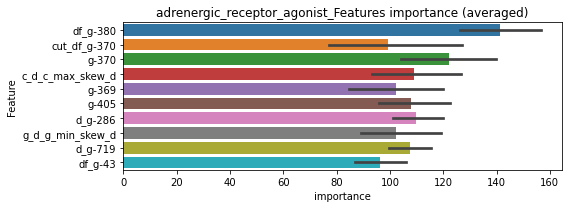

len(train_index) : 2502
len(valid_index) : 835
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00230033	valid_1's binary_logloss: 0.0867095


len(train_index) : 2503
len(valid_index) : 834
================================= fold 2/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00113965	valid_1's binary_logloss: 0.0511407


len(train_index) : 2503
len(valid_index) : 834
================================= fold 3/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00237572	valid_1's binary_logloss: 0.0717878


len(train_index) : 2503
len(valid_index) : 834
================================= fold 4/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.07468795642522745


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00399962	valid_1's binary_logloss: 0.0890994
neg labels: 3289 → selected neg labels: 3240


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 3240, target_rate: 0.0151172 → Adj_target_rate: 0.0125042
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0630188	valid_1's binary_logloss: 0.322141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0500875	valid_1's binary_logloss: 0.298946
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0544435	valid_1's binary_logloss: 0.298158
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0482556	valid_1's binary_logloss: 0.282361
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0531052	valid_1's binary_logloss: 0.281776
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.839
y_Threshold: 0.1185325, Threshold: 0.7542598, pos_neg_ratio: 0.8000000


[300]	training's binary_logloss: 0.0514956	valid_1's binary_logloss: 0.289343
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.0578951	valid_1's binary_logloss: 0.288655


Remove_noisy_data: 550 → Positive_corect_labels: 438/3338
p_label_rate: 0.0100452 Vs.target_rate: 0.01512, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 40.0, Expected: 60.2, Adj_threshold_1: 0.7542598
Num_p_label: 45.0, Expected: 60.2, Adj_threshold_2: 0.7342598
threshold: 0.7342598, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 438.0/3338, y_label_rate: 0.1312163
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.020692	valid_1's binary_logloss: 0.169268
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151164	valid_1's binary_logloss: 0.141675
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00964619	valid_1's binary_logloss: 0.140022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015136	valid_1's binary_logloss: 0.142896
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0125595	valid_1's binary_logloss: 0.142032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152683	valid_1's binary_logloss: 0.153697


2 / 3 AUC score:0.968
y_Threshold: 0.0817234, Threshold: 0.7342598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 374.0/3210


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00993481	valid_1's binary_logloss: 0.151489


p_label_rate: 0.0328980 Vs.target_rate: 0.01512, Num_p_label: 131.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 131.0, Expected: 60.2, Adj_threshold_1: 0.7342598
Num_p_label: 129.0, Expected: 60.2, Adj_threshold_2: 0.7542598
Num_p_label: 123.0, Expected: 60.2, Adj_threshold_3: 0.7742598
Num_p_label: 118.0, Expected: 60.2, Adj_threshold_4: 0.7942598
threshold: 0.7942598, positive_p_label: 118.0/3982, p_label_rate: 0.0296334
positive_y_label: 374.0/3210, y_label_rate: 0.1165109
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893231	valid_1's binary_logloss: 0.127437
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00377906	valid_1's binary_logloss: 0.123327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00933182	valid_1's binary_logloss: 0.0810044
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00460346	valid_1's binary_logloss: 0.0760973
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00947514	valid_1's binary_logloss: 0.10681
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00287133	valid_1's binary_logloss: 0.10001
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00923582	valid_1's binary_logloss: 0.0918114


3 / 3 AUC score:0.992
y_Threshold: 0.0619167, Threshold: 0.7942598, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 341.0/3144
p_label_rate: 0.0431944 Vs.target_rate: 0.01512, Num_p_label: 172.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 172.0, Expected: 60.2, Adj_threshold_1: 0.7942598
threshold: 0.7942598, positive_p_label: 172.0/3982, p_label_rate: 0.0431944


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00778888	valid_1's binary_logloss: 0.0907692


positive_y_label: 341.0/3144, y_label_rate: 0.1084606


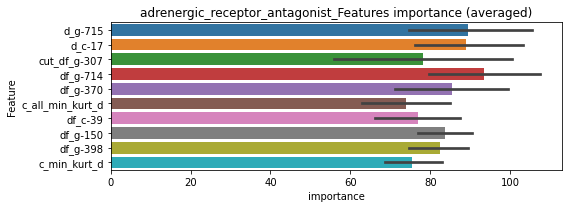

len(train_index) : 2358
len(valid_index) : 786
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2358
len(valid_index) : 786
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00585423	valid_1's binary_logloss: 0.0902993
Training until validation scores don't improve for 30 rounds


len(train_index) : 2358
len(valid_index) : 786
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00431321	valid_1's binary_logloss: 0.103575
Training until validation scores don't improve for 30 rounds


len(train_index) : 2358
len(valid_index) : 786
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00266371	valid_1's binary_logloss: 0.0809018
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0016981	valid_1's binary_logloss: 0.0598412


adrenergic_receptor_antagonist logloss: 0.08365440037425535


neg labels: 3289 → selected neg labels: 3284


akt_inhibitor, len(trt): 66, len(othr): 3284, target_rate: 0.0027715 → Adj_target_rate: 0.0029567
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00597167	valid_1's binary_logloss: 0.0546924
[600]	training's binary_logloss: 0.00106569	valid_1's binary_logloss: 0.0433391
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000836693	valid_1's binary_logloss: 0.042343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610376	valid_1's binary_logloss: 0.0360673
[600]	training's binary_logloss: 0.0010851	valid_1's binary_logloss: 0.0244636
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00094713	valid_1's binary_logloss: 0.0239515
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641019	valid_1's binary_logloss: 0.0198142
[600]	training's binary_logloss: 0.00114052	valid_1's binary_logloss: 0.00903773
[900]	training's binary_logloss: 0.000698364	valid_1's binary_logloss: 0.00774698
Early stopping, best iter

1 / 3 AUC score:0.999
y_Threshold: 0.0088894, Threshold: 0.0387093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00277, Num_p_label: 40.0, conf_0:0.02710, conf_1:0.05032
Num_p_label: 40.0, Expected: 11.0, Adj_threshold_1: 0.0387093
Num_p_label: 27.0, Expected: 11.0, Adj_threshold_2: 0.0587093
Num_p_label: 20.0, Expected: 11.0, Adj_threshold_3: 0.0787093
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_4: 0.0987093
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_5: 0.1187093
threshold: 0.1187093, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057487	valid_1's binary_logloss: 0.0322183
[600]	training's binary_logloss: 0.00102764	valid_1's binary_logloss: 0.0173253
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.00071137	valid_1's binary_logloss: 0.0156571
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535638	valid_1's binary_logloss: 0.0380316
[600]	training's binary_logloss: 0.00100947	valid_1's binary_logloss: 0.0307486
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00109409	valid_1's binary_logloss: 0.0306407
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00557919	valid_1's binary_logloss: 0.0253051
[600]	training's binary_logloss: 0.00104192	valid_1's binary_logloss: 0.0150352
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000703999	valid_1's binary_logloss: 0.

2 / 3 AUC score:1.000
y_Threshold: 0.0249159, Threshold: 0.1187093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0077850 Vs.target_rate: 0.00277, Num_p_label: 31.0, conf_0:0.09497, conf_1:0.14245
Num_p_label: 31.0, Expected: 11.0, Adj_threshold_1: 0.1187093
Num_p_label: 29.0, Expected: 11.0, Adj_threshold_2: 0.1387093
Num_p_label: 28.0, Expected: 11.0, Adj_threshold_3: 0.1587093
Num_p_label: 25.0, Expected: 11.0, Adj_threshold_4: 0.1787093
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_5: 0.1987093
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_6: 0.2187093
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_7: 0.2387093
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_8: 0.2587093
threshold: 0.2587093, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3790, y_label_rate: 0.1707124
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00532181	valid_1's binary_logloss: 0.0267757
[600]	training's binary_logloss: 0.000996708	valid_1's binary_logloss: 0.0165747
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000724023	valid_1's binary_logloss: 0.0153966
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524701	valid_1's binary_logloss: 0.0225383
[600]	training's binary_logloss: 0.000996833	valid_1's binary_logloss: 0.0121761
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000731891	valid_1's binary_logloss: 0.011105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525813	valid_1's binary_logloss: 0.0292964
[600]	training's binary_logloss: 0.000984329	valid_1's binary_logloss: 0.0181699
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000715196	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0307659, Threshold: 0.2587093, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3786
p_label_rate: 0.0060271 Vs.target_rate: 0.00277, Num_p_label: 24.0, conf_0:0.23284, conf_1:0.28458
Num_p_label: 24.0, Expected: 11.0, Adj_threshold_1: 0.2587093
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.2787093
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_3: 0.2987093
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.3187093
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_5: 0.3387093
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_6: 0.3587093
Num_p_label: 14.0, Expected: 11.0, Adj_threshold_7: 0.3787093
threshold: 0.3787093, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3786, y_label_rate: 0.1703645


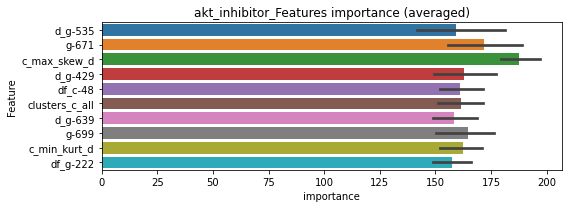

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000723659	valid_1's binary_logloss: 0.0233886


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000682509	valid_1's binary_logloss: 0.0123375


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000946485	valid_1's binary_logloss: 0.0175451


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000858252	valid_1's binary_logloss: 0.0182772


akt_inhibitor logloss: 0.01788711034363385


neg labels: 3289 → selected neg labels: 3288


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3288, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012852	valid_1's binary_logloss: 0.00264321
[600]	training's binary_logloss: 0.000359636	valid_1's binary_logloss: 0.001021
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000356514	valid_1's binary_logloss: 0.00101796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128272	valid_1's binary_logloss: 0.00395436
[600]	training's binary_logloss: 0.000355049	valid_1's binary_logloss: 0.0016616
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000348966	valid_1's binary_logloss: 0.00164406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130826	valid_1's binary_logloss: 0.00212218
[600]	training's binary_logloss: 0.000363941	valid_1's binary_logloss: 0.000745109
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000358532	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0020137, Threshold: 0.0084281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00590, conf_1:0.01096
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0084281
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0284281
threshold: 0.0284281, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120366	valid_1's binary_logloss: 0.00210119
[600]	training's binary_logloss: 0.000343359	valid_1's binary_logloss: 0.000752005
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00033866	valid_1's binary_logloss: 0.000744999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119015	valid_1's binary_logloss: 0.00324106
[600]	training's binary_logloss: 0.000339388	valid_1's binary_logloss: 0.00140503
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000335139	valid_1's binary_logloss: 0.00139657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121771	valid_1's binary_logloss: 0.00216983
[600]	training's binary_logloss: 0.000341553	valid_1's binary_logloss: 0.000727066
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000339308	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1133253, Threshold: 0.0284281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00080, Num_p_label: 28.0, conf_0:0.02274, conf_1:0.03411
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_1: 0.0284281
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0484281
threshold: 0.0484281, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120366	valid_1's binary_logloss: 0.00210119
[600]	training's binary_logloss: 0.000343359	valid_1's binary_logloss: 0.000752005
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00033866	valid_1's binary_logloss: 0.000744999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119015	valid_1's binary_logloss: 0.00324106
[600]	training's binary_logloss: 0.000339388	valid_1's binary_logloss: 0.00140503
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000335139	valid_1's binary_logloss: 0.00139657
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121771	valid_1's binary_logloss: 0.00216983
[600]	training's binary_logloss: 0.000341553	valid_1's binary_logloss: 0.000727066
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000339308	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1133253, Threshold: 0.0484281, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.04359, conf_1:0.05327
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0484281
threshold: 0.0484281, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


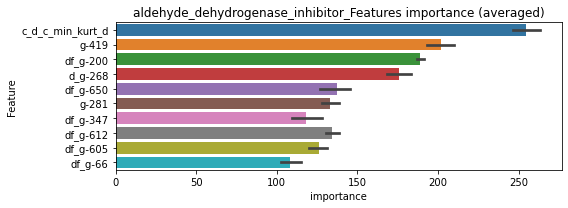

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000337742	valid_1's binary_logloss: 0.000771217


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000339753	valid_1's binary_logloss: 0.00172993
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000350432	valid_1's binary_logloss: 0.000683617
Training until validation scores don't improve for 30 rounds


aldehyde_dehydrogenase_inhibitor logloss: 0.001071134986087345


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000346707	valid_1's binary_logloss: 0.00109823
neg labels: 3289 → selected neg labels: 3285


alk_inhibitor, len(trt): 42, len(othr): 3285, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349729	valid_1's binary_logloss: 0.0193634
[600]	training's binary_logloss: 0.000666113	valid_1's binary_logloss: 0.0121503
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000561147	valid_1's binary_logloss: 0.0118033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329121	valid_1's binary_logloss: 0.0210682
[600]	training's binary_logloss: 0.000643172	valid_1's binary_logloss: 0.0141832
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000536192	valid_1's binary_logloss: 0.0137945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370917	valid_1's binary_logloss: 0.00917488
[600]	training's binary_logloss: 0.000684076	valid_1's binary_logloss: 0.00389588
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000575979	valid_1's binary_log

1 / 3 AUC score:1.000
y_Threshold: 0.0041467, Threshold: 0.0169301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.01185, conf_1:0.02201
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0169301
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_2: 0.0369301
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_3: 0.0569301
threshold: 0.0569301, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309424	valid_1's binary_logloss: 0.0202096
[600]	training's binary_logloss: 0.000627357	valid_1's binary_logloss: 0.0129855
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000546313	valid_1's binary_logloss: 0.0124564
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304186	valid_1's binary_logloss: 0.0187923
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000857362	valid_1's binary_logloss: 0.0132293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333187	valid_1's binary_logloss: 0.00862595
[600]	training's binary_logloss: 0.000650944	valid_1's binary_logloss: 0.00341624
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000554584	valid_1's binary_logloss: 0.00319676
Training until validation scores don't improve for 30 rounds
[30

2 / 3 AUC score:1.000
y_Threshold: 0.0308666, Threshold: 0.0569301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0067805 Vs.target_rate: 0.00176, Num_p_label: 27.0, conf_0:0.04554, conf_1:0.06832
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_1: 0.0569301
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_2: 0.0769301
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_3: 0.0969301
threshold: 0.0969301, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299244	valid_1's binary_logloss: 0.0151554
[600]	training's binary_logloss: 0.000622166	valid_1's binary_logloss: 0.00973263
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000537878	valid_1's binary_logloss: 0.00927774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297805	valid_1's binary_logloss: 0.0178894
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00113268	valid_1's binary_logloss: 0.0144545
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00312479	valid_1's binary_logloss: 0.00839365
[600]	training's binary_logloss: 0.000634939	valid_1's binary_logloss: 0.00425196
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000532228	valid_1's binary_logloss: 0.0040285
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.0324513, Threshold: 0.0969301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0042692 Vs.target_rate: 0.00176, Num_p_label: 17.0, conf_0:0.08724, conf_1:0.10662
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.0969301
threshold: 0.0969301, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


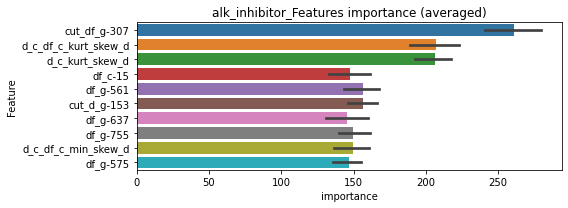

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000550794	valid_1's binary_logloss: 0.0143867


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000532795	valid_1's binary_logloss: 0.00359911


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000579665	valid_1's binary_logloss: 0.00486351


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000544408	valid_1's binary_logloss: 0.00711824


alk_inhibitor logloss: 0.0074938485501883645


neg labels: 3289 → selected neg labels: 3289


ampk_activator, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00075213	valid_1's binary_logloss: 0.00178955
[600]	training's binary_logloss: 0.000283233	valid_1's binary_logloss: 0.000935418
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000283233	valid_1's binary_logloss: 0.000935418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000746549	valid_1's binary_logloss: 0.00310882
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00029299	valid_1's binary_logloss: 0.00226552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000761409	valid_1's binary_logloss: 0.00101888
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000288649	valid_1's binary_logloss: 0.00044854
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737458	valid_1's binary_logloss: 0.0033

1 / 3 AUC score:1.000
y_Threshold: 0.0013648, Threshold: 0.0064282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00450, conf_1:0.00836
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0064282
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.0264282
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0464282


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000285322	valid_1's binary_logloss: 0.00209046


threshold: 0.0464282, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670244	valid_1's binary_logloss: 0.00206108
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000265643	valid_1's binary_logloss: 0.0014716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000669378	valid_1's binary_logloss: 0.00432513
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000322686	valid_1's binary_logloss: 0.00360359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672977	valid_1's binary_logloss: 0.000907128
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000268841	valid_1's binary_logloss: 0.000380855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665295	valid_1's binary_logloss: 0.00163786


2 / 3 AUC score:1.000
y_Threshold: 0.0430030, Threshold: 0.0464282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050, Num_p_label: 14.0, conf_0:0.03714, conf_1:0.05571
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.0464282
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0664282
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.0864282
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_4: 0.1064282


[600]	training's binary_logloss: 0.000265122	valid_1's binary_logloss: 0.000876391
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000265122	valid_1's binary_logloss: 0.000876391


threshold: 0.1064282, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670244	valid_1's binary_logloss: 0.00206108
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000265643	valid_1's binary_logloss: 0.0014716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000669378	valid_1's binary_logloss: 0.00432513
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000322686	valid_1's binary_logloss: 0.00360359
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000672977	valid_1's binary_logloss: 0.000907128
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000268841	valid_1's binary_logloss: 0.000380855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665295	valid_1's binary_logloss: 0.00163786


3 / 3 AUC score:1.000
y_Threshold: 0.0430030, Threshold: 0.1064282, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.09579, conf_1:0.11707
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.1064282
threshold: 0.1064282, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


[600]	training's binary_logloss: 0.000265122	valid_1's binary_logloss: 0.000876391
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000265122	valid_1's binary_logloss: 0.000876391


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


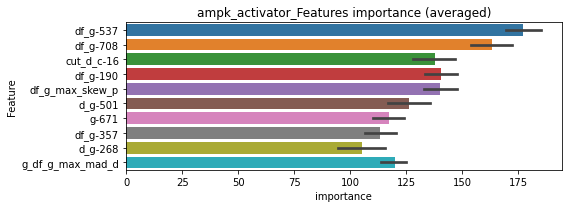

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000272439	valid_1's binary_logloss: 0.00124565
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000275621	valid_1's binary_logloss: 0.00282368
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000272902	valid_1's binary_logloss: 0.000382872
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0014231735406602087


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267792	valid_1's binary_logloss: 0.00124067
neg labels: 3289 → selected neg labels: 3288


analgesic, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000842745	valid_1's binary_logloss: 0.00183508
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000301124	valid_1's binary_logloss: 0.000812862
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000813966	valid_1's binary_logloss: 0.00247364
[600]	training's binary_logloss: 0.00029798	valid_1's binary_logloss: 0.00124372
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000298076	valid_1's binary_logloss: 0.00124367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000864847	valid_1's binary_logloss: 0.00106493
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000303	valid_1's binary_logloss: 0.000405024
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000857151	valid_1's binary_logloss: 0.002139

1 / 3 AUC score:1.000
y_Threshold: 0.0011583, Threshold: 0.0160874, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01126, conf_1:0.02091
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0160874
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.0360874
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.0560874
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.0760874


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00030721	valid_1's binary_logloss: 0.000952449


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.0960874
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1160874
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.1360874
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.1560874
threshold: 0.1560874, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000762323	valid_1's binary_logloss: 0.00152838
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000282254	valid_1's binary_logloss: 0.000726927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00075376	valid_1's binary_logloss: 0.0016696
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.000815369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754349	valid_1's binary_logloss: 0.000964365
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000285664	valid_1's binary_logloss: 0.00038948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000752804	valid_1's binary_logloss: 0.00118136


2 / 3 AUC score:1.000
y_Threshold: 0.1381251, Threshold: 0.1560874, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050, Num_p_label: 14.0, conf_0:0.12487, conf_1:0.18730
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.1560874
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_2: 0.1760874
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_3: 0.1960874
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.2160874
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.2360874
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_6: 0.2560874


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000281873	valid_1's binary_logloss: 0.000491824


Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.2760874
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_8: 0.2960874
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.3160874
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.3360874
threshold: 0.3560874, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000762323	valid_1's binary_logloss: 0.00152838
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000282254	valid_1's binary_logloss: 0.000726927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00075376	valid_1's binary_logloss: 0.0016696
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.000815369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000754349	valid_1's binary_logloss: 0.000964365
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000285664	valid_1's binary_logloss: 0.00038948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000752804	valid_1's binary_logloss: 0.00118136


3 / 3 AUC score:1.000
y_Threshold: 0.1381251, Threshold: 0.3560874, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050, Num_p_label: 8.0, conf_0:0.32048, conf_1:0.39170
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.3560874
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.3760874
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.3960874
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.4160874
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.4360874
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4560874


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000281873	valid_1's binary_logloss: 0.000491824


Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.4760874
threshold: 0.4760874, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


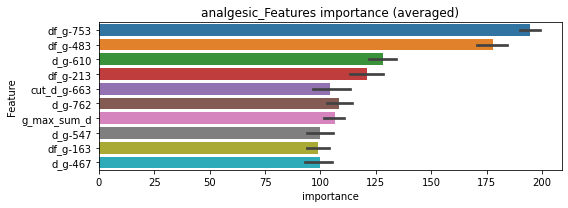

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000284861	valid_1's binary_logloss: 0.000629984
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000286784	valid_1's binary_logloss: 0.000834416
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000281959	valid_1's binary_logloss: 0.000391002
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0005977816405945693


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000291618	valid_1's binary_logloss: 0.00053527
neg labels: 3289 → selected neg labels: 3282


androgen_receptor_agonist, len(trt): 48, len(othr): 3282, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00412691	valid_1's binary_logloss: 0.025562
[600]	training's binary_logloss: 0.000777938	valid_1's binary_logloss: 0.0157204
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000607154	valid_1's binary_logloss: 0.0152013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438731	valid_1's binary_logloss: 0.0230455
[600]	training's binary_logloss: 0.000793774	valid_1's binary_logloss: 0.0145881
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000622054	valid_1's binary_logloss: 0.0139976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455379	valid_1's binary_logloss: 0.00875064
[600]	training's binary_logloss: 0.000828505	valid_1's binary_logloss: 0.00261172
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000591238	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0046721, Threshold: 0.0107422, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.00752, conf_1:0.01396
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0107422
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_2: 0.0307422
threshold: 0.0307422, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038593	valid_1's binary_logloss: 0.0234842
[600]	training's binary_logloss: 0.000751741	valid_1's binary_logloss: 0.0150323
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000626917	valid_1's binary_logloss: 0.0143675
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395952	valid_1's binary_logloss: 0.0151245
[600]	training's binary_logloss: 0.000765408	valid_1's binary_logloss: 0.00761334
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000571417	valid_1's binary_logloss: 0.00689679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398644	valid_1's binary_logloss: 0.0163235
[600]	training's binary_logloss: 0.000761847	valid_1's binary_logloss: 0.00901162
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000578757	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0296069, Threshold: 0.0307422, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00202, Num_p_label: 18.0, conf_0:0.02459, conf_1:0.03689
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_1: 0.0307422
threshold: 0.0307422, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366623	valid_1's binary_logloss: 0.0272651
[600]	training's binary_logloss: 0.000723865	valid_1's binary_logloss: 0.0200473
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000781958	valid_1's binary_logloss: 0.0199929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401922	valid_1's binary_logloss: 0.0143625
[600]	training's binary_logloss: 0.000763122	valid_1's binary_logloss: 0.0068572
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000586335	valid_1's binary_logloss: 0.00618987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390454	valid_1's binary_logloss: 0.0155536
[600]	training's binary_logloss: 0.000768356	valid_1's binary_logloss: 0.00732285
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000568296	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0276402, Threshold: 0.0307422, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00202, Num_p_label: 21.0, conf_0:0.02767, conf_1:0.03382
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_1: 0.0307422
Num_p_label: 9.0, Expected: 8.0, Adj_threshold_2: 0.0507422
threshold: 0.0507422, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


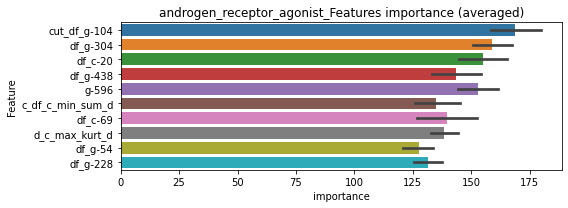

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000559469	valid_1's binary_logloss: 0.00756405


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000584715	valid_1's binary_logloss: 0.0150091


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000583301	valid_1's binary_logloss: 0.00413447


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000575612	valid_1's binary_logloss: 0.0211294


androgen_receptor_agonist logloss: 0.01195891109141972


neg labels: 3289 → selected neg labels: 3274


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00959649	valid_1's binary_logloss: 0.0683989
[600]	training's binary_logloss: 0.00152563	valid_1's binary_logloss: 0.0573085
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00119589	valid_1's binary_logloss: 0.0568421
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00935931	valid_1's binary_logloss: 0.0570101
[600]	training's binary_logloss: 0.00150655	valid_1's binary_logloss: 0.0396454
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00132705	valid_1's binary_logloss: 0.0390209
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00963381	valid_1's binary_logloss: 0.0451605
[600]	training's binary_logloss: 0.00154489	valid_1's binary_logloss: 0.0313924
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00132342	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0124570, Threshold: 0.0388837, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.02722, conf_1:0.05055
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0388837
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.0588837
threshold: 0.0588837, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00819045	valid_1's binary_logloss: 0.0513248
[600]	training's binary_logloss: 0.00137571	valid_1's binary_logloss: 0.0365531
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000981843	valid_1's binary_logloss: 0.0355045
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00783537	valid_1's binary_logloss: 0.0511815
[600]	training's binary_logloss: 0.00134659	valid_1's binary_logloss: 0.0371325
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000855953	valid_1's binary_logloss: 0.0357506
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00828139	valid_1's binary_logloss: 0.0533631
[600]	training's binary_logloss: 0.00138794	valid_1's binary_logloss: 0.0392397
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00103155	valid_1's binary_logloss: 

2 / 3 AUC score:0.999
y_Threshold: 0.0276345, Threshold: 0.0588837, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 638.0/3764
p_label_rate: 0.0082873 Vs.target_rate: 0.00374, Num_p_label: 33.0, conf_0:0.04711, conf_1:0.07066
Num_p_label: 33.0, Expected: 14.9, Adj_threshold_1: 0.0588837
Num_p_label: 24.0, Expected: 14.9, Adj_threshold_2: 0.0788837
Num_p_label: 17.0, Expected: 14.9, Adj_threshold_3: 0.0988837
threshold: 0.0988837, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737767	valid_1's binary_logloss: 0.0530148
[600]	training's binary_logloss: 0.00128365	valid_1's binary_logloss: 0.0399372
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.00093028	valid_1's binary_logloss: 0.0388915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792106	valid_1's binary_logloss: 0.0554316
[600]	training's binary_logloss: 0.00132896	valid_1's binary_logloss: 0.0449555
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00091818	valid_1's binary_logloss: 0.0429469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00744043	valid_1's binary_logloss: 0.0401457
[600]	training's binary_logloss: 0.00131763	valid_1's binary_logloss: 0.025713
[900]	training's binary_logloss: 0.000761663	valid_1's binary_logloss: 0.0235114
Early stopping, best iterat

3 / 3 AUC score:1.000
y_Threshold: 0.0303862, Threshold: 0.0988837, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 631.0/3750
p_label_rate: 0.0057760 Vs.target_rate: 0.00374, Num_p_label: 23.0, conf_0:0.08900, conf_1:0.10877
Num_p_label: 23.0, Expected: 14.9, Adj_threshold_1: 0.0988837
Num_p_label: 18.0, Expected: 14.9, Adj_threshold_2: 0.1188837
threshold: 0.1188837, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 631.0/3750, y_label_rate: 0.1682667


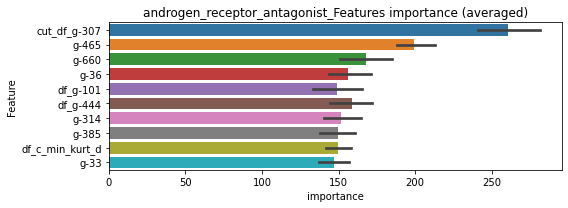

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.00083241	valid_1's binary_logloss: 0.0331654


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000779002	valid_1's binary_logloss: 0.0341349


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00121545	valid_1's binary_logloss: 0.0217227


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.00074653	valid_1's binary_logloss: 0.0186177


androgen_receptor_antagonist logloss: 0.026915289121726724


neg labels: 3289 → selected neg labels: 3273


anesthetic_-_local, len(trt): 80, len(othr): 3273, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00697731	valid_1's binary_logloss: 0.0540883
[600]	training's binary_logloss: 0.00121347	valid_1's binary_logloss: 0.042906
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00117206	valid_1's binary_logloss: 0.0425401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00658099	valid_1's binary_logloss: 0.0509432
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00199219	valid_1's binary_logloss: 0.0419178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00702832	valid_1's binary_logloss: 0.03788
[600]	training's binary_logloss: 0.0012444	valid_1's binary_logloss: 0.0275613
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.000792955	valid_1's binary_logloss: 0.0263064
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.997
y_Threshold: 0.0084553, Threshold: 0.0201164, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.01408, conf_1:0.02615
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0201164
Num_p_label: 10.0, Expected: 13.4, Adj_threshold_2: 0.0401164
threshold: 0.0401164, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00611352	valid_1's binary_logloss: 0.0354019
[600]	training's binary_logloss: 0.00112443	valid_1's binary_logloss: 0.024224
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000720363	valid_1's binary_logloss: 0.0229013
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576485	valid_1's binary_logloss: 0.0520118
[600]	training's binary_logloss: 0.00109717	valid_1's binary_logloss: 0.0405468
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00115034	valid_1's binary_logloss: 0.0403174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00641981	valid_1's binary_logloss: 0.034173
[600]	training's binary_logloss: 0.00116947	valid_1's binary_logloss: 0.021819
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000738141	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0313352, Threshold: 0.0401164, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0042692 Vs.target_rate: 0.00336, Num_p_label: 17.0, conf_0:0.03209, conf_1:0.04814
threshold: 0.0401164, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589077	valid_1's binary_logloss: 0.0359267
[600]	training's binary_logloss: 0.00111564	valid_1's binary_logloss: 0.0254619
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000918075	valid_1's binary_logloss: 0.0247495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604257	valid_1's binary_logloss: 0.0465962
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00174013	valid_1's binary_logloss: 0.0411271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00592469	valid_1's binary_logloss: 0.0386013
[600]	training's binary_logloss: 0.00110677	valid_1's binary_logloss: 0.0276929
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00119604	valid_1's binary_logloss: 0.0275531
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0339338, Threshold: 0.0401164, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0065294 Vs.target_rate: 0.00336, Num_p_label: 26.0, conf_0:0.03610, conf_1:0.04413
Num_p_label: 26.0, Expected: 13.4, Adj_threshold_1: 0.0401164
Num_p_label: 10.0, Expected: 13.4, Adj_threshold_2: 0.0601164
threshold: 0.0601164, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 645.0/3777, y_label_rate: 0.1707705


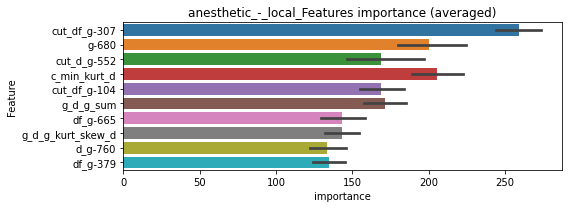

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000899662	valid_1's binary_logloss: 0.0223373


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000992165	valid_1's binary_logloss: 0.0382564


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000772012	valid_1's binary_logloss: 0.0203381


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00091342	valid_1's binary_logloss: 0.019235


anesthetic_-_local logloss: 0.02504097782998669


neg labels: 3289 → selected neg labels: 3282


angiogenesis_inhibitor, len(trt): 36, len(othr): 3282, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228836	valid_1's binary_logloss: 0.017605
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000594102	valid_1's binary_logloss: 0.0145579
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244881	valid_1's binary_logloss: 0.0145866
[600]	training's binary_logloss: 0.000547351	valid_1's binary_logloss: 0.00986738
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000508693	valid_1's binary_logloss: 0.0097041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245917	valid_1's binary_logloss: 0.0110445
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000658164	valid_1's binary_logloss: 0.00911632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232	valid_1's binary_logloss: 0.0100106
[600]	tra

1 / 3 AUC score:1.000
y_Threshold: 0.0040285, Threshold: 0.0130994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00917, conf_1:0.01703
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0130994
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0330994
threshold: 0.0330994, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210001	valid_1's binary_logloss: 0.0186648
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000686496	valid_1's binary_logloss: 0.015559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231911	valid_1's binary_logloss: 0.0126031
[600]	training's binary_logloss: 0.000529492	valid_1's binary_logloss: 0.00860258
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000482808	valid_1's binary_logloss: 0.00840556
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237701	valid_1's binary_logloss: 0.0114131
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000959121	valid_1's binary_logloss: 0.00950578
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021953	valid_1's binary_logloss: 0.00898832
[600]

2 / 3 AUC score:1.000
y_Threshold: 0.0248423, Threshold: 0.0330994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0143144 Vs.target_rate: 0.00151, Num_p_label: 57.0, conf_0:0.02648, conf_1:0.03972
Num_p_label: 57.0, Expected: 6.0, Adj_threshold_1: 0.0330994
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.0530994
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_3: 0.0730994
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_4: 0.0930994
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_5: 0.1130994
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_6: 0.1330994
threshold: 0.1330994, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222165	valid_1's binary_logloss: 0.00991519
[600]	training's binary_logloss: 0.000512256	valid_1's binary_logloss: 0.00591621
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000476062	valid_1's binary_logloss: 0.00580346
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216822	valid_1's binary_logloss: 0.0103198
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00111636	valid_1's binary_logloss: 0.00873836
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222414	valid_1's binary_logloss: 0.00864162
[600]	training's binary_logloss: 0.000515242	valid_1's binary_logloss: 0.00495457
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000496041	valid_1's binary_logloss: 0.00489912
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:1.000
y_Threshold: 0.0586856, Threshold: 0.1330994, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00151, Num_p_label: 15.0, conf_0:0.11979, conf_1:0.14641
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.1330994
threshold: 0.1330994, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


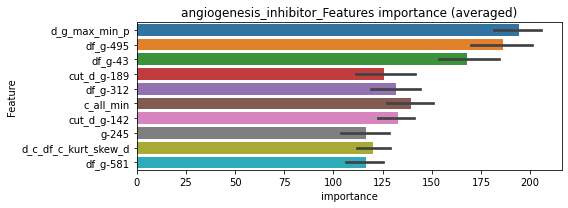

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.00047644	valid_1's binary_logloss: 0.0055823


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000491555	valid_1's binary_logloss: 0.00759734


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000477675	valid_1's binary_logloss: 0.00485067


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000522294	valid_1's binary_logloss: 0.00485402


angiogenesis_inhibitor logloss: 0.005721906194717366


neg labels: 3289 → selected neg labels: 3286


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266775	valid_1's binary_logloss: 0.0115011
[600]	training's binary_logloss: 0.000582787	valid_1's binary_logloss: 0.00617617
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000479182	valid_1's binary_logloss: 0.00584394
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00264197	valid_1's binary_logloss: 0.0127477
[600]	training's binary_logloss: 0.00058247	valid_1's binary_logloss: 0.00680628
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000471639	valid_1's binary_logloss: 0.00632549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273214	valid_1's binary_logloss: 0.00738958
[600]	training's binary_logloss: 0.000593709	valid_1's binary_logloss: 0.00301012
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000496534	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0034458, Threshold: 0.0142840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01000, conf_1:0.01857
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0142840
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_2: 0.0342840
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_3: 0.0542840
threshold: 0.0542840, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024469	valid_1's binary_logloss: 0.00987701
[600]	training's binary_logloss: 0.000558217	valid_1's binary_logloss: 0.00516462
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000489931	valid_1's binary_logloss: 0.00492913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249846	valid_1's binary_logloss: 0.0128232
[600]	training's binary_logloss: 0.00055872	valid_1's binary_logloss: 0.00664835
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000464461	valid_1's binary_logloss: 0.0062178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258286	valid_1's binary_logloss: 0.00658997
[600]	training's binary_logloss: 0.000570081	valid_1's binary_logloss: 0.00245778
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000479871	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0400216, Threshold: 0.0542840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0065294 Vs.target_rate: 0.00155, Num_p_label: 26.0, conf_0:0.04343, conf_1:0.06514
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_1: 0.0542840
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_2: 0.0742840
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_3: 0.0942840
threshold: 0.0942840, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024469	valid_1's binary_logloss: 0.00987701
[600]	training's binary_logloss: 0.000558217	valid_1's binary_logloss: 0.00516462
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000489931	valid_1's binary_logloss: 0.00492913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00249846	valid_1's binary_logloss: 0.0128232
[600]	training's binary_logloss: 0.00055872	valid_1's binary_logloss: 0.00664835
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000464461	valid_1's binary_logloss: 0.0062178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258286	valid_1's binary_logloss: 0.00658997
[600]	training's binary_logloss: 0.000570081	valid_1's binary_logloss: 0.00245778
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000479871	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0400216, Threshold: 0.0942840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0032647 Vs.target_rate: 0.00155, Num_p_label: 13.0, conf_0:0.08486, conf_1:0.10371
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.0942840
threshold: 0.0942840, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


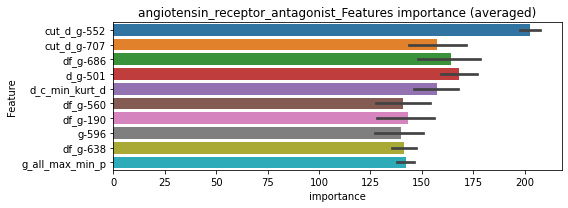

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000489689	valid_1's binary_logloss: 0.00588399


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000467845	valid_1's binary_logloss: 0.00629431


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000482965	valid_1's binary_logloss: 0.00230303


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000574716	valid_1's binary_logloss: 0.0081825


angiotensin_receptor_antagonist logloss: 0.0056666776582878125


neg labels: 3289 → selected neg labels: 3278


anti-inflammatory, len(trt): 73, len(othr): 3278, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670275	valid_1's binary_logloss: 0.0437473
[600]	training's binary_logloss: 0.00120991	valid_1's binary_logloss: 0.033768
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00132226	valid_1's binary_logloss: 0.0335496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00746082	valid_1's binary_logloss: 0.0376109
[600]	training's binary_logloss: 0.00127519	valid_1's binary_logloss: 0.0216662
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000833542	valid_1's binary_logloss: 0.0203759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00750074	valid_1's binary_logloss: 0.0506486
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.0014214	valid_1's binary_logloss: 0.0416491
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.999
y_Threshold: 0.0118031, Threshold: 0.0928097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.06497, conf_1:0.12065
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0928097
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_2: 0.1128097
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_3: 0.1328097
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.1528097
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_5: 0.1728097
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_6: 0.1928097
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_7: 0.2128097
threshold: 0.2128097, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3791, y_label_rate: 0.1714587
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607403	valid_1's binary_logloss: 0.0518073
[600]	training's binary_logloss: 0.00113194	valid_1's binary_logloss: 0.0403307
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000701168	valid_1's binary_logloss: 0.0388924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670711	valid_1's binary_logloss: 0.0433493
[600]	training's binary_logloss: 0.00119247	valid_1's binary_logloss: 0.03589
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00128564	valid_1's binary_logloss: 0.0357371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663098	valid_1's binary_logloss: 0.0396031
[600]	training's binary_logloss: 0.00117533	valid_1's binary_logloss: 0.027087
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000834866	valid_1's binary_logloss: 0.0

2 / 3 AUC score:0.999
y_Threshold: 0.0376463, Threshold: 0.2128097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3775
p_label_rate: 0.0105475 Vs.target_rate: 0.00307, Num_p_label: 42.0, conf_0:0.17025, conf_1:0.25537
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.2128097
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_2: 0.2328097
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_3: 0.2528097
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_4: 0.2728097
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_5: 0.2928097
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_6: 0.3128097
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_7: 0.3328097
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_8: 0.3528097
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_9: 0.3728097
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_10: 0.3928097
threshold: 0.4128097, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3775, y_label_rate: 0.1700662

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060785	valid_1's binary_logloss: 0.0500383
[600]	training's binary_logloss: 0.00109353	valid_1's binary_logloss: 0.0394788
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000879682	valid_1's binary_logloss: 0.0382914
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00590366	valid_1's binary_logloss: 0.0497734
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00149506	valid_1's binary_logloss: 0.0430552
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00640464	valid_1's binary_logloss: 0.0465746
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00150418	valid_1's binary_logloss: 0.0403679
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625889	valid_1's binary_logloss: 0.0303785
[600]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0308879, Threshold: 0.4128097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 631.0/3753
p_label_rate: 0.0057760 Vs.target_rate: 0.00307, Num_p_label: 23.0, conf_0:0.37153, conf_1:0.45409
Num_p_label: 23.0, Expected: 12.2, Adj_threshold_1: 0.4128097
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_2: 0.4328097
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_3: 0.4528097
threshold: 0.4528097, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 631.0/3753, y_label_rate: 0.1681322


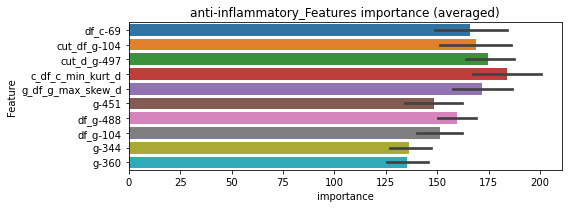

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000653045	valid_1's binary_logloss: 0.0217706


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00120002	valid_1's binary_logloss: 0.0240317


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.0011954	valid_1's binary_logloss: 0.0200332


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000860331	valid_1's binary_logloss: 0.0207266


anti-inflammatory logloss: 0.02164056762993161


neg labels: 3289 → selected neg labels: 3284


antiarrhythmic, len(trt): 24, len(othr): 3284, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181639	valid_1's binary_logloss: 0.00638056
[600]	training's binary_logloss: 0.000450945	valid_1's binary_logloss: 0.00320844
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000448941	valid_1's binary_logloss: 0.00319758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191218	valid_1's binary_logloss: 0.00664531
[600]	training's binary_logloss: 0.000459142	valid_1's binary_logloss: 0.00377121
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000445065	valid_1's binary_logloss: 0.00372844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184082	valid_1's binary_logloss: 0.00565113
[600]	training's binary_logloss: 0.000454241	valid_1's binary_logloss: 0.00292101
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000452821	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0024193, Threshold: 0.0075481, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00528, conf_1:0.00981
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0075481
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0275481
threshold: 0.0275481, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173163	valid_1's binary_logloss: 0.00581285
[600]	training's binary_logloss: 0.000440668	valid_1's binary_logloss: 0.00283049
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000426203	valid_1's binary_logloss: 0.00279241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017712	valid_1's binary_logloss: 0.0071328
[600]	training's binary_logloss: 0.000447455	valid_1's binary_logloss: 0.00467493
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000438521	valid_1's binary_logloss: 0.00465448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017465	valid_1's binary_logloss: 0.00584569
[600]	training's binary_logloss: 0.00044116	valid_1's binary_logloss: 0.00321131
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000434673	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0177857, Threshold: 0.0275481, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00101, Num_p_label: 15.0, conf_0:0.02204, conf_1:0.03306
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_1: 0.0275481
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_2: 0.0475481
threshold: 0.0475481, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173163	valid_1's binary_logloss: 0.00581285
[600]	training's binary_logloss: 0.000440668	valid_1's binary_logloss: 0.00283049
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000426203	valid_1's binary_logloss: 0.00279241
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017712	valid_1's binary_logloss: 0.0071328
[600]	training's binary_logloss: 0.000447455	valid_1's binary_logloss: 0.00467493
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000438521	valid_1's binary_logloss: 0.00465448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017465	valid_1's binary_logloss: 0.00584569
[600]	training's binary_logloss: 0.00044116	valid_1's binary_logloss: 0.00321131
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000434673	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0177857, Threshold: 0.0475481, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00101, Num_p_label: 8.0, conf_0:0.04279, conf_1:0.05230
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0475481
threshold: 0.0475481, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


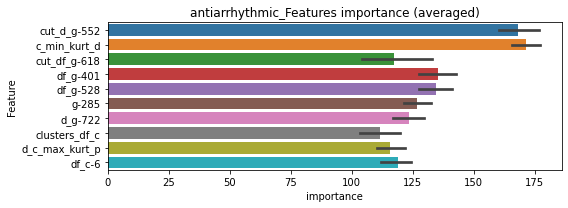

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000434955	valid_1's binary_logloss: 0.00323759
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000465409	valid_1's binary_logloss: 0.00429536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000445161	valid_1's binary_logloss: 0.00301602


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds


antiarrhythmic logloss: 0.0034360833456137524


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000452378	valid_1's binary_logloss: 0.00319536
neg labels: 3289 → selected neg labels: 3281


antibiotic, len(trt): 43, len(othr): 3281, target_rate: 0.0018057 → Adj_target_rate: 0.0020542
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00364992	valid_1's binary_logloss: 0.0214229
[600]	training's binary_logloss: 0.000701944	valid_1's binary_logloss: 0.0132416
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.00061892	valid_1's binary_logloss: 0.0129124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360642	valid_1's binary_logloss: 0.0161829
[600]	training's binary_logloss: 0.00069894	valid_1's binary_logloss: 0.0102952
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000560092	valid_1's binary_logloss: 0.00998305
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370507	valid_1's binary_logloss: 0.00855636
[600]	training's binary_logloss: 0.000719536	valid_1's binary_logloss: 0.00294118
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00055632	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0049643, Threshold: 0.0413889, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00181, Num_p_label: 40.0, conf_0:0.02897, conf_1:0.05381
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_1: 0.0413889
Num_p_label: 24.0, Expected: 7.2, Adj_threshold_2: 0.0613889
Num_p_label: 18.0, Expected: 7.2, Adj_threshold_3: 0.0813889
Num_p_label: 13.0, Expected: 7.2, Adj_threshold_4: 0.1013889
threshold: 0.1013889, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031549	valid_1's binary_logloss: 0.0182813
[600]	training's binary_logloss: 0.000659713	valid_1's binary_logloss: 0.0113623
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000563534	valid_1's binary_logloss: 0.0109711
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324383	valid_1's binary_logloss: 0.0127051
[600]	training's binary_logloss: 0.000666155	valid_1's binary_logloss: 0.00755985
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000546014	valid_1's binary_logloss: 0.00734465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340836	valid_1's binary_logloss: 0.00756074
[600]	training's binary_logloss: 0.000684148	valid_1's binary_logloss: 0.00260996
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000554327	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0573963, Threshold: 0.1013889, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0123054 Vs.target_rate: 0.00181, Num_p_label: 49.0, conf_0:0.08111, conf_1:0.12167
Num_p_label: 49.0, Expected: 7.2, Adj_threshold_1: 0.1013889
Num_p_label: 40.0, Expected: 7.2, Adj_threshold_2: 0.1213889
Num_p_label: 34.0, Expected: 7.2, Adj_threshold_3: 0.1413889
Num_p_label: 30.0, Expected: 7.2, Adj_threshold_4: 0.1613889
Num_p_label: 28.0, Expected: 7.2, Adj_threshold_5: 0.1813889
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_6: 0.2013889
Num_p_label: 24.0, Expected: 7.2, Adj_threshold_7: 0.2213889
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_8: 0.2413889
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_9: 0.2613889
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_10: 0.2813889
threshold: 0.3013889, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00321463	valid_1's binary_logloss: 0.0139782
[600]	training's binary_logloss: 0.000660343	valid_1's binary_logloss: 0.00816154
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000568772	valid_1's binary_logloss: 0.00783639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00333235	valid_1's binary_logloss: 0.0121084
[600]	training's binary_logloss: 0.000681844	valid_1's binary_logloss: 0.00612921
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.0005829	valid_1's binary_logloss: 0.00575228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00315026	valid_1's binary_logloss: 0.0117404
[600]	training's binary_logloss: 0.000659772	valid_1's binary_logloss: 0.00694899
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000584155	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0436704, Threshold: 0.3013889, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0047715 Vs.target_rate: 0.00181, Num_p_label: 19.0, conf_0:0.27125, conf_1:0.33153
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_1: 0.3013889
Num_p_label: 18.0, Expected: 7.2, Adj_threshold_2: 0.3213889
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.3413889
threshold: 0.3413889, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


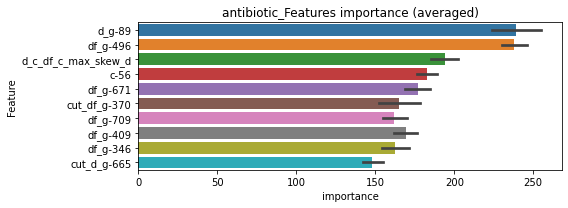

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000548086	valid_1's binary_logloss: 0.00854477


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000562305	valid_1's binary_logloss: 0.00423497


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000522392	valid_1's binary_logloss: 0.00779109


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000576185	valid_1's binary_logloss: 0.00633389


antibiotic logloss: 0.0067265660668589565


neg labels: 3289 → selected neg labels: 3286


anticonvulsant, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112372	valid_1's binary_logloss: 0.00353946
[600]	training's binary_logloss: 0.000337589	valid_1's binary_logloss: 0.00173132
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000336754	valid_1's binary_logloss: 0.00172688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011009	valid_1's binary_logloss: 0.00525657
[600]	training's binary_logloss: 0.000329145	valid_1's binary_logloss: 0.00319186
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000329563	valid_1's binary_logloss: 0.0031868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110501	valid_1's binary_logloss: 0.00520366
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000572411	valid_1's binary_logloss: 0.00440025
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0019447, Threshold: 0.0058494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00409, conf_1:0.00760
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0058494
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0258494


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000389541	valid_1's binary_logloss: 0.0019617


threshold: 0.0258494, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107105	valid_1's binary_logloss: 0.00216024
[600]	training's binary_logloss: 0.000331342	valid_1's binary_logloss: 0.000968052
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000313452	valid_1's binary_logloss: 0.000925099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106659	valid_1's binary_logloss: 0.00434522
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000342893	valid_1's binary_logloss: 0.00269074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010537	valid_1's binary_logloss: 0.00512962
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000611725	valid_1's binary_logloss: 0.0048234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106739	valid_1's binary_logloss: 0.00541185

2 / 3 AUC score:1.000
y_Threshold: 0.0190030, Threshold: 0.0258494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0032647 Vs.target_rate: 0.00076, Num_p_label: 13.0, conf_0:0.02068, conf_1:0.03102
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.0258494
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0458494


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00308333


threshold: 0.0458494, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107105	valid_1's binary_logloss: 0.00216024
[600]	training's binary_logloss: 0.000331342	valid_1's binary_logloss: 0.000968052
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000313452	valid_1's binary_logloss: 0.000925099
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106659	valid_1's binary_logloss: 0.00434522
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000342893	valid_1's binary_logloss: 0.00269074
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0010537	valid_1's binary_logloss: 0.00512962
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.000611725	valid_1's binary_logloss: 0.0048234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106739	valid_1's binary_logloss: 0.00541185

3 / 3 AUC score:1.000
y_Threshold: 0.0190030, Threshold: 0.0458494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.04126, conf_1:0.05043
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0458494


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00308333


threshold: 0.0458494, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


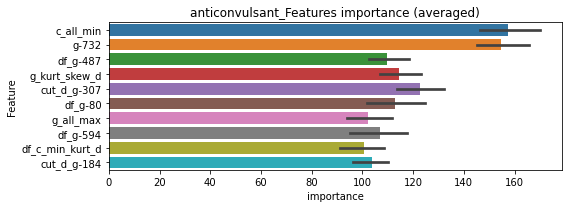

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000318905	valid_1's binary_logloss: 0.000976691
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00032705	valid_1's binary_logloss: 0.00328293
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000628001	valid_1's binary_logloss: 0.00456157
Training until validation scores don't improve for 30 rounds


anticonvulsant logloss: 0.002801807569110356


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000401576	valid_1's binary_logloss: 0.0023856
neg labels: 3289 → selected neg labels: 3286


antifungal, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161817	valid_1's binary_logloss: 0.00474473
[600]	training's binary_logloss: 0.000411691	valid_1's binary_logloss: 0.00208887
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408479	valid_1's binary_logloss: 0.00208016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152024	valid_1's binary_logloss: 0.00687083
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000523987	valid_1's binary_logloss: 0.0046891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155498	valid_1's binary_logloss: 0.00285094
[600]	training's binary_logloss: 0.00040722	valid_1's binary_logloss: 0.00105461
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000389781	valid_1's binary_logloss: 0.00102565
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0023576, Threshold: 0.0077558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.00543, conf_1:0.01008
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0077558
Num_p_label: 3.0, Expected: 4.3, Adj_threshold_2: 0.0277558


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000482285	valid_1's binary_logloss: 0.00451951


threshold: 0.0277558, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148809	valid_1's binary_logloss: 0.00423403
[600]	training's binary_logloss: 0.000395234	valid_1's binary_logloss: 0.00178574
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000392442	valid_1's binary_logloss: 0.00178095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144868	valid_1's binary_logloss: 0.00659447
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000480575	valid_1's binary_logloss: 0.00458802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154419	valid_1's binary_logloss: 0.00249093
[600]	training's binary_logloss: 0.000394828	valid_1's binary_logloss: 0.000782322
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000390993	valid_1's binary_logloss: 0.000774696
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.0217472, Threshold: 0.0277558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00109, Num_p_label: 12.0, conf_0:0.02220, conf_1:0.03331
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0277558
Num_p_label: 5.0, Expected: 4.3, Adj_threshold_2: 0.0477558


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000446149	valid_1's binary_logloss: 0.00485189


threshold: 0.0477558, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148809	valid_1's binary_logloss: 0.00423403
[600]	training's binary_logloss: 0.000395234	valid_1's binary_logloss: 0.00178574
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000392442	valid_1's binary_logloss: 0.00178095
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144868	valid_1's binary_logloss: 0.00659447
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000480575	valid_1's binary_logloss: 0.00458802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154419	valid_1's binary_logloss: 0.00249093
[600]	training's binary_logloss: 0.000394828	valid_1's binary_logloss: 0.000782322
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000390993	valid_1's binary_logloss: 0.000774696
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.0217472, Threshold: 0.0477558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00109, Num_p_label: 5.0, conf_0:0.04298, conf_1:0.05253


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000446149	valid_1's binary_logloss: 0.00485189


threshold: 0.0477558, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


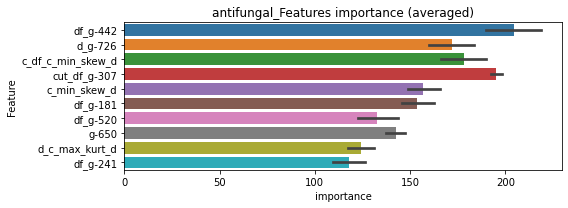

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000386743	valid_1's binary_logloss: 0.00210651


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 antifungal=================================


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000472075	valid_1's binary_logloss: 0.0044261
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000378769	valid_1's binary_logloss: 0.000835983


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


antifungal logloss: 0.0031519773908107655


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000421481	valid_1's binary_logloss: 0.00524105
neg labels: 3289 → selected neg labels: 3288


antihistamine, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130054	valid_1's binary_logloss: 0.00315329
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000384012	valid_1's binary_logloss: 0.00139704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126827	valid_1's binary_logloss: 0.00549059
[600]	training's binary_logloss: 0.000375716	valid_1's binary_logloss: 0.00310773
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000376349	valid_1's binary_logloss: 0.00310667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127464	valid_1's binary_logloss: 0.00344875
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000383616	valid_1's binary_logloss: 0.00153198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126286	valid_1's binary_logloss: 0.00522623

1 / 3 AUC score:1.000
y_Threshold: 0.0022681, Threshold: 0.0721580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.05051, conf_1:0.09381
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0721580
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_2: 0.0921580


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000379598	valid_1's binary_logloss: 0.00359733


Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.1121580
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_4: 0.1321580
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.1521580
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.1721580
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.1921580
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_8: 0.2121580
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.2321580
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_10: 0.2521580
threshold: 0.2721580, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118883	valid_1's binary_logloss: 0.00288313
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000363708	valid_1's binary_logloss: 0.00119519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115006	valid_1's binary_logloss: 0.00550103
[600]	training's binary_logloss: 0.00035948	valid_1's binary_logloss: 0.00330155
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000359501	valid_1's binary_logloss: 0.00330144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118294	valid_1's binary_logloss: 0.00214519
[600]	training's binary_logloss: 0.000355039	valid_1's binary_logloss: 0.000813559
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000355217	valid_1's binary_logloss: 0.000813406
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0544046, Threshold: 0.2721580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0102963 Vs.target_rate: 0.00076, Num_p_label: 41.0, conf_0:0.21773, conf_1:0.32659
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.2721580
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.2921580
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.3121580


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000360822	valid_1's binary_logloss: 0.00288155


Num_p_label: 39.0, Expected: 3.0, Adj_threshold_4: 0.3321580
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_5: 0.3521580
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_6: 0.3721580
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_7: 0.3921580
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_8: 0.4121580
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_9: 0.4321580
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_10: 0.4521580
threshold: 0.4721580, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118883	valid_1's binary_logloss: 0.00288313
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000363708	valid_1's binary_logloss: 0.00119519
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115006	valid_1's binary_logloss: 0.00550103
[600]	training's binary_logloss: 0.00035948	valid_1's binary_logloss: 0.00330155
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000359501	valid_1's binary_logloss: 0.00330144
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118294	valid_1's binary_logloss: 0.00214519
[600]	training's binary_logloss: 0.000355039	valid_1's binary_logloss: 0.000813559
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000355217	valid_1's binary_logloss: 0.000813406
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0544046, Threshold: 0.4721580, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000360822	valid_1's binary_logloss: 0.00288155


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0075339 Vs.target_rate: 0.00076, Num_p_label: 30.0, conf_0:0.42494, conf_1:0.51937
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_1: 0.4721580
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_2: 0.4921580
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_3: 0.5121580
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_4: 0.5321580
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.5521580
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_6: 0.5721580
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.5921580
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_8: 0.6121580
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.6321580
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_10: 0.6521580
threshold: 0.6721580, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


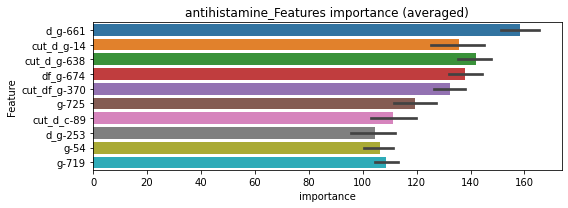

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000372496	valid_1's binary_logloss: 0.00155487
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000366181	valid_1's binary_logloss: 0.00349227
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000364833	valid_1's binary_logloss: 0.000780127
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.002064188452480667


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370865	valid_1's binary_logloss: 0.00242437
neg labels: 3289 → selected neg labels: 3287


antimalarial, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132917	valid_1's binary_logloss: 0.00302506
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000388926	valid_1's binary_logloss: 0.00146518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130897	valid_1's binary_logloss: 0.00730994
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000400088	valid_1's binary_logloss: 0.00434904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137974	valid_1's binary_logloss: 0.00281719
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000401782	valid_1's binary_logloss: 0.00106974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137323	valid_1's binary_logloss: 0.00611792


1 / 3 AUC score:1.000
y_Threshold: 0.0024955, Threshold: 0.0102040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00714, conf_1:0.01327
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0102040
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0302040


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000401841	valid_1's binary_logloss: 0.00386688


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0502040
threshold: 0.0502040, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121855	valid_1's binary_logloss: 0.0023353
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000373872	valid_1's binary_logloss: 0.000972861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117324	valid_1's binary_logloss: 0.00626183
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000370965	valid_1's binary_logloss: 0.00359974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122123	valid_1's binary_logloss: 0.00208837
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000374855	valid_1's binary_logloss: 0.000767038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012	valid_1's binary_logloss: 0.00452662


2 / 3 AUC score:1.000
y_Threshold: 0.2739812, Threshold: 0.0502040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0123054 Vs.target_rate: 0.00076, Num_p_label: 49.0, conf_0:0.04016, conf_1:0.06024
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.0502040
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_2: 0.0702040


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000372981	valid_1's binary_logloss: 0.00279011


Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.0902040
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_4: 0.1102040
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_5: 0.1302040
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_6: 0.1502040
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_7: 0.1702040
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_8: 0.1902040
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_9: 0.2102040
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.2302040
threshold: 0.2502040, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121855	valid_1's binary_logloss: 0.0023353
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000373872	valid_1's binary_logloss: 0.000972861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117324	valid_1's binary_logloss: 0.00626183
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000370965	valid_1's binary_logloss: 0.00359974
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122123	valid_1's binary_logloss: 0.00208837
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000374855	valid_1's binary_logloss: 0.000767038
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012	valid_1's binary_logloss: 0.00452662


3 / 3 AUC score:1.000
y_Threshold: 0.2739812, Threshold: 0.2502040, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00076, Num_p_label: 15.0, conf_0:0.22518, conf_1:0.27522
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.2502040
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.2702040


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000372981	valid_1's binary_logloss: 0.00279011


Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.2902040
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_4: 0.3102040
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.3302040
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3502040
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.3702040
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_8: 0.3902040
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_9: 0.4102040
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_10: 0.4302040
threshold: 0.4302040, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


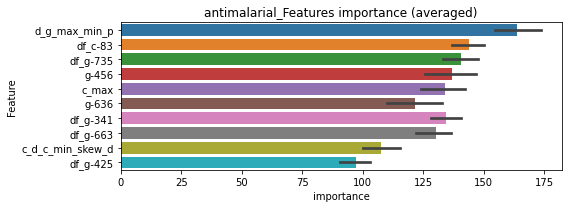

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00038081	valid_1's binary_logloss: 0.00123909
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000373012	valid_1's binary_logloss: 0.00348508
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000387003	valid_1's binary_logloss: 0.000772273
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.001912952269907033


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000380054	valid_1's binary_logloss: 0.00215467
neg labels: 3289 → selected neg labels: 3281


antioxidant, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00679317	valid_1's binary_logloss: 0.0518457
[600]	training's binary_logloss: 0.00114164	valid_1's binary_logloss: 0.0388729
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000872919	valid_1's binary_logloss: 0.0377002
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00701501	valid_1's binary_logloss: 0.0465498
[600]	training's binary_logloss: 0.00117149	valid_1's binary_logloss: 0.0345781
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00110806	valid_1's binary_logloss: 0.0343086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00809244	valid_1's binary_logloss: 0.0309644
[600]	training's binary_logloss: 0.00128232	valid_1's binary_logloss: 0.021026
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000803491	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0071541, Threshold: 0.0323910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.02267, conf_1:0.04211
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0323910
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_2: 0.0523910
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.0723910
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.0923910
threshold: 0.0923910, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00643956	valid_1's binary_logloss: 0.0663036
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00315709	valid_1's binary_logloss: 0.0632189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00652704	valid_1's binary_logloss: 0.0384293
[600]	training's binary_logloss: 0.00110527	valid_1's binary_logloss: 0.0258121
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00105648	valid_1's binary_logloss: 0.025562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066228	valid_1's binary_logloss: 0.0317406
[600]	training's binary_logloss: 0.00112548	valid_1's binary_logloss: 0.0206801
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00089587	valid_1's binary_logloss: 0.0199533
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:0.998
y_Threshold: 0.0306633, Threshold: 0.0923910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 641.0/3775
p_label_rate: 0.0077850 Vs.target_rate: 0.00307, Num_p_label: 31.0, conf_0:0.07391, conf_1:0.11087
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_1: 0.0923910
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_2: 0.1123910
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_3: 0.1323910
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_4: 0.1523910
threshold: 0.1523910, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 641.0/3775, y_label_rate: 0.1698013
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630436	valid_1's binary_logloss: 0.037476
[600]	training's binary_logloss: 0.00107444	valid_1's binary_logloss: 0.0249728
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000990206	valid_1's binary_logloss: 0.0245102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598049	valid_1's binary_logloss: 0.039407
[600]	training's binary_logloss: 0.00103983	valid_1's binary_logloss: 0.0292228
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00108523	valid_1's binary_logloss: 0.0290995
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0062584	valid_1's binary_logloss: 0.0367009
[600]	training's binary_logloss: 0.00106356	valid_1's binary_logloss: 0.0284203
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00113181	valid_1's binary_logloss: 0.02

3 / 3 AUC score:1.000
y_Threshold: 0.0352510, Threshold: 0.1523910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0037670 Vs.target_rate: 0.00307, Num_p_label: 15.0, conf_0:0.13715, conf_1:0.16763
threshold: 0.1523910, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 638.0/3769, y_label_rate: 0.1692757


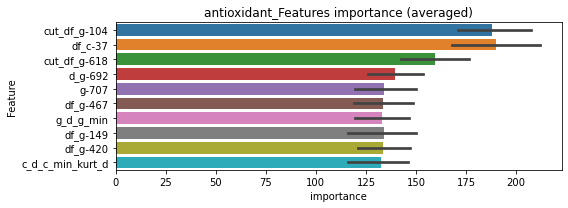

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00087013	valid_1's binary_logloss: 0.0188067


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000735346	valid_1's binary_logloss: 0.0242145


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000744342	valid_1's binary_logloss: 0.0154148


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000784453	valid_1's binary_logloss: 0.0253003


antioxidant logloss: 0.020933502460862393


neg labels: 3289 → selected neg labels: 3283


antiprotozoal, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308152	valid_1's binary_logloss: 0.00935135
[600]	training's binary_logloss: 0.000593586	valid_1's binary_logloss: 0.00378772
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000508037	valid_1's binary_logloss: 0.00357262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301503	valid_1's binary_logloss: 0.0105638
[600]	training's binary_logloss: 0.00059563	valid_1's binary_logloss: 0.00507687
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000487792	valid_1's binary_logloss: 0.00480806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313752	valid_1's binary_logloss: 0.0066947
[600]	training's binary_logloss: 0.000609933	valid_1's binary_logloss: 0.00180056
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000497389	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0042176, Threshold: 0.0180480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01263, conf_1:0.02346
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0180480
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0380480
threshold: 0.0380480, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272675	valid_1's binary_logloss: 0.00942422
[600]	training's binary_logloss: 0.000568424	valid_1's binary_logloss: 0.00412476
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000495724	valid_1's binary_logloss: 0.00391379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283616	valid_1's binary_logloss: 0.00849226
[600]	training's binary_logloss: 0.000583782	valid_1's binary_logloss: 0.00402039
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000482587	valid_1's binary_logloss: 0.00379042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291405	valid_1's binary_logloss: 0.00584514
[600]	training's binary_logloss: 0.000585074	valid_1's binary_logloss: 0.00159251
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00048438	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0315153, Threshold: 0.0380480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00151, Num_p_label: 32.0, conf_0:0.03044, conf_1:0.04566
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_1: 0.0380480
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0580480
threshold: 0.0580480, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272675	valid_1's binary_logloss: 0.00942422
[600]	training's binary_logloss: 0.000568424	valid_1's binary_logloss: 0.00412476
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000495724	valid_1's binary_logloss: 0.00391379
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283616	valid_1's binary_logloss: 0.00849226
[600]	training's binary_logloss: 0.000583782	valid_1's binary_logloss: 0.00402039
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000482587	valid_1's binary_logloss: 0.00379042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291405	valid_1's binary_logloss: 0.00584514
[600]	training's binary_logloss: 0.000585074	valid_1's binary_logloss: 0.00159251
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00048438	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0315153, Threshold: 0.0580480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00151, Num_p_label: 14.0, conf_0:0.05224, conf_1:0.06385
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0580480
threshold: 0.0580480, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


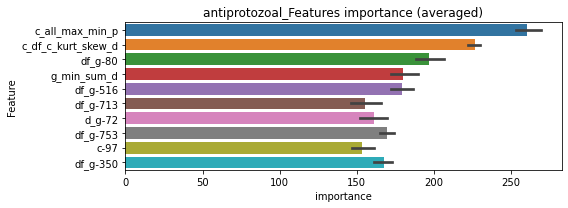

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000478022	valid_1's binary_logloss: 0.00382223


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.0004863	valid_1's binary_logloss: 0.00360047


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000488671	valid_1's binary_logloss: 0.00134016


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000558624	valid_1's binary_logloss: 0.00748251


antiprotozoal logloss: 0.004061590342171189


neg labels: 3289 → selected neg labels: 3282


antiviral, len(trt): 23, len(othr): 3282, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0014053	valid_1's binary_logloss: 0.00440223
[600]	training's binary_logloss: 0.000376446	valid_1's binary_logloss: 0.00243771
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000368986	valid_1's binary_logloss: 0.00241267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145966	valid_1's binary_logloss: 0.00273885
[600]	training's binary_logloss: 0.000380905	valid_1's binary_logloss: 0.000982803
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000377762	valid_1's binary_logloss: 0.000976148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148695	valid_1's binary_logloss: 0.00318675
[600]	training's binary_logloss: 0.000386302	valid_1's binary_logloss: 0.00123546
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000377948	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0022238, Threshold: 0.0087389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.00612, conf_1:0.01136
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0087389
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_2: 0.0287389
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_3: 0.0487389
threshold: 0.0487389, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132133	valid_1's binary_logloss: 0.00384165
[600]	training's binary_logloss: 0.000359168	valid_1's binary_logloss: 0.00196725
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000365393	valid_1's binary_logloss: 0.00195833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138045	valid_1's binary_logloss: 0.00258765
[600]	training's binary_logloss: 0.000364844	valid_1's binary_logloss: 0.000890698
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000356422	valid_1's binary_logloss: 0.000875819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136741	valid_1's binary_logloss: 0.00383805
[600]	training's binary_logloss: 0.000364352	valid_1's binary_logloss: 0.00205887
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000364352	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.0560765, Threshold: 0.0487389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0040181 Vs.target_rate: 0.00097, Num_p_label: 16.0, conf_0:0.03899, conf_1:0.05849
Num_p_label: 16.0, Expected: 3.8, Adj_threshold_1: 0.0487389
Num_p_label: 14.0, Expected: 3.8, Adj_threshold_2: 0.0687389
Num_p_label: 11.0, Expected: 3.8, Adj_threshold_3: 0.0887389
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_4: 0.1087389
threshold: 0.1087389, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132133	valid_1's binary_logloss: 0.00384165
[600]	training's binary_logloss: 0.000359168	valid_1's binary_logloss: 0.00196725
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000365393	valid_1's binary_logloss: 0.00195833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138045	valid_1's binary_logloss: 0.00258765
[600]	training's binary_logloss: 0.000364844	valid_1's binary_logloss: 0.000890698
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000356422	valid_1's binary_logloss: 0.000875819
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136741	valid_1's binary_logloss: 0.00383805
[600]	training's binary_logloss: 0.000364352	valid_1's binary_logloss: 0.00205887
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000364352	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.0560765, Threshold: 0.1087389, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0020090 Vs.target_rate: 0.00097, Num_p_label: 8.0, conf_0:0.09787, conf_1:0.11961
Num_p_label: 8.0, Expected: 3.8, Adj_threshold_1: 0.1087389
threshold: 0.1087389, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


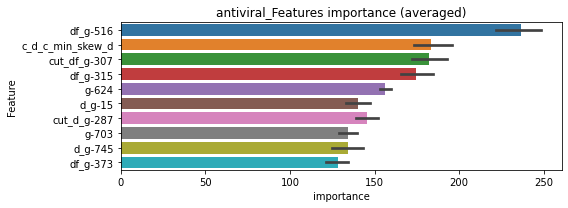

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000357671	valid_1's binary_logloss: 0.00231983
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000368587	valid_1's binary_logloss: 0.00107528
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00037634	valid_1's binary_logloss: 0.0015078
Training until validation scores don't improve for 30 rounds


antiviral logloss: 0.001614444686451385


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000369941	valid_1's binary_logloss: 0.00155119
neg labels: 3289 → selected neg labels: 3283


apoptosis_stimulant, len(trt): 49, len(othr): 3283, target_rate: 0.0020576 → Adj_target_rate: 0.0022954
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367868	valid_1's binary_logloss: 0.0329212
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.0012201	valid_1's binary_logloss: 0.0276261
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385662	valid_1's binary_logloss: 0.0254963
[600]	training's binary_logloss: 0.000759475	valid_1's binary_logloss: 0.0205481
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000639301	valid_1's binary_logloss: 0.0201704
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436273	valid_1's binary_logloss: 0.00917244
[600]	training's binary_logloss: 0.000811872	valid_1's binary_logloss: 0.0032291
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000626528	valid_1's binary_logloss: 0.00282533
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0064182, Threshold: 0.0442367, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00139903	valid_1's binary_logloss: 0.0245302


Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00206, Num_p_label: 40.0, conf_0:0.03097, conf_1:0.05751
Num_p_label: 40.0, Expected: 8.2, Adj_threshold_1: 0.0442367
Num_p_label: 29.0, Expected: 8.2, Adj_threshold_2: 0.0642367
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_3: 0.0842367
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_4: 0.1042367
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_5: 0.1242367
threshold: 0.1242367, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00353078	valid_1's binary_logloss: 0.0183401
[600]	training's binary_logloss: 0.000722119	valid_1's binary_logloss: 0.0123948
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000663793	valid_1's binary_logloss: 0.0122909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00357566	valid_1's binary_logloss: 0.0254734
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00114949	valid_1's binary_logloss: 0.022047
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380056	valid_1's binary_logloss: 0.0176373
[600]	training's binary_logloss: 0.000746256	valid_1's binary_logloss: 0.0113315
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000588764	valid_1's binary_logloss: 0.0107201
Training until validation scores don't improve for 30 rounds
[300]	tr

2 / 3 AUC score:1.000
y_Threshold: 0.0299487, Threshold: 0.1242367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0110497 Vs.target_rate: 0.00206, Num_p_label: 44.0, conf_0:0.09939, conf_1:0.14908
Num_p_label: 44.0, Expected: 8.2, Adj_threshold_1: 0.1242367
Num_p_label: 42.0, Expected: 8.2, Adj_threshold_2: 0.1442367
Num_p_label: 37.0, Expected: 8.2, Adj_threshold_3: 0.1642367
Num_p_label: 30.0, Expected: 8.2, Adj_threshold_4: 0.1842367
Num_p_label: 27.0, Expected: 8.2, Adj_threshold_5: 0.2042367
Num_p_label: 27.0, Expected: 8.2, Adj_threshold_6: 0.2242367
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_7: 0.2442367
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.2642367
threshold: 0.2642367, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349652	valid_1's binary_logloss: 0.0193791
[600]	training's binary_logloss: 0.000705426	valid_1's binary_logloss: 0.0138899
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000649151	valid_1's binary_logloss: 0.0136501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352385	valid_1's binary_logloss: 0.0299053
[600]	training's binary_logloss: 0.000704425	valid_1's binary_logloss: 0.0245694
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000642988	valid_1's binary_logloss: 0.0241843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00349424	valid_1's binary_logloss: 0.0185724
[600]	training's binary_logloss: 0.000715621	valid_1's binary_logloss: 0.0129991
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000607267	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0310537, Threshold: 0.2642367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0067805 Vs.target_rate: 0.00206, Num_p_label: 27.0, conf_0:0.23781, conf_1:0.29066
Num_p_label: 27.0, Expected: 8.2, Adj_threshold_1: 0.2642367
Num_p_label: 24.0, Expected: 8.2, Adj_threshold_2: 0.2842367
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_3: 0.3042367
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_4: 0.3242367
Num_p_label: 18.0, Expected: 8.2, Adj_threshold_5: 0.3442367
threshold: 0.3442367, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


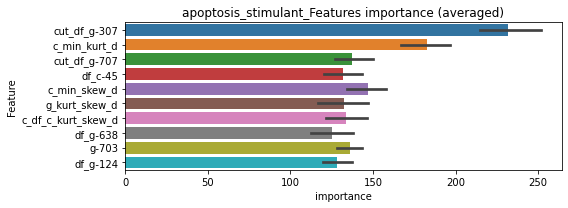

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000572897	valid_1's binary_logloss: 0.00946384


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00066796	valid_1's binary_logloss: 0.018573


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000700165	valid_1's binary_logloss: 0.0123874


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000615221	valid_1's binary_logloss: 0.0143277


apoptosis_stimulant logloss: 0.013689592474309802


neg labels: 3289 → selected neg labels: 3283


aromatase_inhibitor, len(trt): 47, len(othr): 3283, target_rate: 0.0019736 → Adj_target_rate: 0.0022155
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387372	valid_1's binary_logloss: 0.0256087
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00109958	valid_1's binary_logloss: 0.0202665
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399833	valid_1's binary_logloss: 0.0184327
[600]	training's binary_logloss: 0.000743735	valid_1's binary_logloss: 0.0106426
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000601958	valid_1's binary_logloss: 0.0102056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437091	valid_1's binary_logloss: 0.0108398
[600]	training's binary_logloss: 0.000802152	valid_1's binary_logloss: 0.00424004
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000575937	valid_1's binary_logloss: 0.00349441
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0057744, Threshold: 0.0200855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00197, Num_p_label: 40.0, conf_0:0.01406, conf_1:0.02611
Num_p_label: 40.0, Expected: 7.9, Adj_threshold_1: 0.0200855
Num_p_label: 18.0, Expected: 7.9, Adj_threshold_2: 0.0400855
threshold: 0.0400855, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362282	valid_1's binary_logloss: 0.0259565
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00101694	valid_1's binary_logloss: 0.0211433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375353	valid_1's binary_logloss: 0.0167269
[600]	training's binary_logloss: 0.000723928	valid_1's binary_logloss: 0.00998035
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00056337	valid_1's binary_logloss: 0.00945918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415223	valid_1's binary_logloss: 0.009049
[600]	training's binary_logloss: 0.00077431	valid_1's binary_logloss: 0.00307407
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000591981	valid_1's binary_logloss: 0.00263506
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3 AUC score:1.000
y_Threshold: 0.0281598, Threshold: 0.0400855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0095429 Vs.target_rate: 0.00197, Num_p_label: 38.0, conf_0:0.03207, conf_1:0.04810
Num_p_label: 38.0, Expected: 7.9, Adj_threshold_1: 0.0400855
Num_p_label: 20.0, Expected: 7.9, Adj_threshold_2: 0.0600855
Num_p_label: 11.0, Expected: 7.9, Adj_threshold_3: 0.0800855
threshold: 0.0800855, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00347446	valid_1's binary_logloss: 0.0256102
[600]	training's binary_logloss: 0.000701668	valid_1's binary_logloss: 0.0194753
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000607001	valid_1's binary_logloss: 0.0189792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00367284	valid_1's binary_logloss: 0.0147931
[600]	training's binary_logloss: 0.000719255	valid_1's binary_logloss: 0.00725995
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000549043	valid_1's binary_logloss: 0.006557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387203	valid_1's binary_logloss: 0.0190185
[600]	training's binary_logloss: 0.000733288	valid_1's binary_logloss: 0.0119339
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000618237	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0268648, Threshold: 0.0800855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00197, Num_p_label: 12.0, conf_0:0.07208, conf_1:0.08809
Num_p_label: 12.0, Expected: 7.9, Adj_threshold_1: 0.0800855
threshold: 0.0800855, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


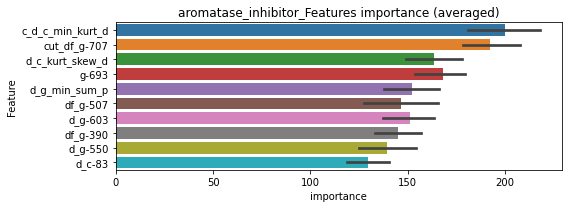

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000598553	valid_1's binary_logloss: 0.0124618


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000592928	valid_1's binary_logloss: 0.00947436


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000595473	valid_1's binary_logloss: 0.00997588


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.0010028	valid_1's binary_logloss: 0.0168969


aromatase_inhibitor logloss: 0.012202298293986693


neg labels: 3289 → selected neg labels: 3285


atm_kinase_inhibitor, len(trt): 6, len(othr): 3285, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411681	valid_1's binary_logloss: 0.0013798
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000191818	valid_1's binary_logloss: 0.000857503
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000408293	valid_1's binary_logloss: 0.00178715
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.0002118	valid_1's binary_logloss: 0.00132283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000421048	valid_1's binary_logloss: 0.000439423
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000198713	valid_1's binary_logloss: 0.000212303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000410141	valid_1's binary_logloss: 0.00138882


1 / 3 AUC score:1.000
y_Threshold: 0.0006149, Threshold: 0.0023725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00166, conf_1:0.00308
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0023725
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.0223725
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0423725
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_4: 0.0623725
threshold: 0.0623725, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000196935	valid_1's binary_logloss: 0.000836551


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00039219	valid_1's binary_logloss: 0.00209013
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000186189	valid_1's binary_logloss: 0.00165249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386585	valid_1's binary_logloss: 0.00164995
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000186446	valid_1's binary_logloss: 0.00117399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000394534	valid_1's binary_logloss: 0.00038489
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000185885	valid_1's binary_logloss: 0.000181736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395021	valid_1's binary_logloss: 0.000538136


2 / 3 AUC score:1.000
y_Threshold: 0.0566788, Threshold: 0.0623725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00025, Num_p_label: 15.0, conf_0:0.04990, conf_1:0.07485
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_1: 0.0623725
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_2: 0.0823725
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_3: 0.1023725
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1223725
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.1423725
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.1623725
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_7: 0.1823725
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.2023725
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.2223725


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000189006	valid_1's binary_logloss: 0.000263743


Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.2423725
threshold: 0.2623725, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00039219	valid_1's binary_logloss: 0.00209013
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000186189	valid_1's binary_logloss: 0.00165249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386585	valid_1's binary_logloss: 0.00164995
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000186446	valid_1's binary_logloss: 0.00117399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000394534	valid_1's binary_logloss: 0.00038489
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000185885	valid_1's binary_logloss: 0.000181736
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000395021	valid_1's binary_logloss: 0.000538136


3 / 3 AUC score:1.000
y_Threshold: 0.0566788, Threshold: 0.2623725, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00025, Num_p_label: 4.0, conf_0:0.23614, conf_1:0.28861
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_1: 0.2623725
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.2823725
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.3023725
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.3223725
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.3423725
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_6: 0.3623725
threshold: 0.3623725, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000189006	valid_1's binary_logloss: 0.000263743


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


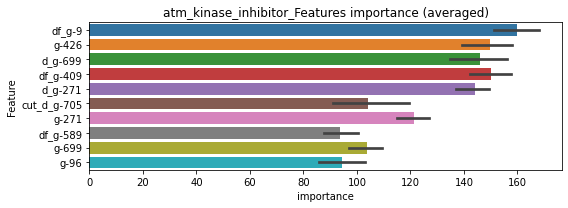

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000186191	valid_1's binary_logloss: 0.00138552
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000186222	valid_1's binary_logloss: 0.00109908
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000186291	valid_1's binary_logloss: 0.000185471
Training until validation scores don't improve for 30 rounds


atm_kinase_inhibitor logloss: 0.0007399780384827564


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000188565	valid_1's binary_logloss: 0.000288783
neg labels: 3289 → selected neg labels: 3289


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000491814	valid_1's binary_logloss: 0.000762511
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000228333	valid_1's binary_logloss: 0.000389137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000491035	valid_1's binary_logloss: 0.0051094
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000234784	valid_1's binary_logloss: 0.00418888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000493989	valid_1's binary_logloss: 0.000606962
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000221662	valid_1's binary_logloss: 0.00029318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000489537	valid_1's binary_logloss: 0.000751115


1 / 3 AUC score:1.000
y_Threshold: 0.0007690, Threshold: 0.0035551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00249, conf_1:0.00462
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0035551
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_2: 0.0235551
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.0435551
threshold: 0.0435551, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000227121	valid_1's binary_logloss: 0.00036493


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000459209	valid_1's binary_logloss: 0.000891592
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000215198	valid_1's binary_logloss: 0.000491046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453665	valid_1's binary_logloss: 0.0020586
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000213774	valid_1's binary_logloss: 0.0015293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0004579	valid_1's binary_logloss: 0.000521292
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00020899	valid_1's binary_logloss: 0.000245211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000461447	valid_1's binary_logloss: 0.000497284


2 / 3 AUC score:1.000
y_Threshold: 0.0684233, Threshold: 0.0435551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00029, Num_p_label: 14.0, conf_0:0.03484, conf_1:0.05227
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.0435551
Num_p_label: 10.0, Expected: 1.2, Adj_threshold_2: 0.0635551
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.0835551
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_4: 0.1035551
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_5: 0.1235551
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.1435551
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_7: 0.1635551
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_8: 0.1835551


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000218562	valid_1's binary_logloss: 0.00023845


threshold: 0.1835551, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000459209	valid_1's binary_logloss: 0.000891592
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000215198	valid_1's binary_logloss: 0.000491046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453665	valid_1's binary_logloss: 0.0020586
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000213774	valid_1's binary_logloss: 0.0015293
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0004579	valid_1's binary_logloss: 0.000521292
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00020899	valid_1's binary_logloss: 0.000245211
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000461447	valid_1's binary_logloss: 0.000497284


3 / 3 AUC score:1.000
y_Threshold: 0.0684233, Threshold: 0.1835551, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.16520, conf_1:0.20191
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.1835551
threshold: 0.1835551, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000218562	valid_1's binary_logloss: 0.00023845


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


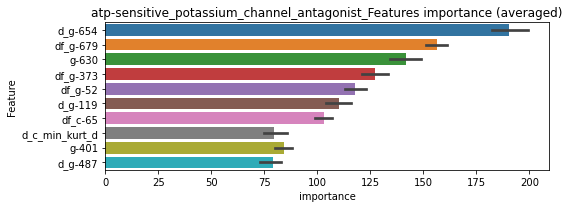

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000209776	valid_1's binary_logloss: 0.000413123
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000211768	valid_1's binary_logloss: 0.0014173
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000214241	valid_1's binary_logloss: 0.000247421
Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0005775740705789759


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000212402	valid_1's binary_logloss: 0.00023253
neg labels: 3289 → selected neg labels: 3286


atp_synthase_inhibitor, len(trt): 12, len(othr): 3286, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000917327	valid_1's binary_logloss: 0.00328285
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00032958	valid_1's binary_logloss: 0.0018049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000900324	valid_1's binary_logloss: 0.00264796
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000327517	valid_1's binary_logloss: 0.00185133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000927109	valid_1's binary_logloss: 0.00144995
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000332556	valid_1's binary_logloss: 0.000594793
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00092191	valid_1's binary_logloss: 0.00160706


1 / 3 AUC score:1.000
y_Threshold: 0.0017324, Threshold: 0.0173331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01213, conf_1:0.02253
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0173331


[600]	training's binary_logloss: 0.000324196	valid_1's binary_logloss: 0.000678869
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000324196	valid_1's binary_logloss: 0.000678869


Num_p_label: 21.0, Expected: 2.0, Adj_threshold_2: 0.0373331
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.0573331
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.0773331
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.0973331
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.1173331
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.1373331
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.1573331
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.1773331
threshold: 0.1773331, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838011	valid_1's binary_logloss: 0.00426423
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000314116	valid_1's binary_logloss: 0.00282758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824041	valid_1's binary_logloss: 0.00178288
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000313807	valid_1's binary_logloss: 0.000848438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000836542	valid_1's binary_logloss: 0.00119111
[600]	training's binary_logloss: 0.000311101	valid_1's binary_logloss: 0.000476381
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000311101	valid_1's binary_logloss: 0.000476381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833506	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0983610, Threshold: 0.1773331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0092918 Vs.target_rate: 0.00050, Num_p_label: 37.0, conf_0:0.14187, conf_1:0.21280
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_1: 0.1773331
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_2: 0.1973331
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_3: 0.2173331
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_4: 0.2373331
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_5: 0.2573331
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_6: 0.2773331


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000314547	valid_1's binary_logloss: 0.00121667


Num_p_label: 19.0, Expected: 2.0, Adj_threshold_7: 0.2973331
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_8: 0.3173331
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_9: 0.3373331
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_10: 0.3573331
threshold: 0.3773331, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000838011	valid_1's binary_logloss: 0.00426423
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000314116	valid_1's binary_logloss: 0.00282758
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000824041	valid_1's binary_logloss: 0.00178288
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000313807	valid_1's binary_logloss: 0.000848438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000836542	valid_1's binary_logloss: 0.00119111
[600]	training's binary_logloss: 0.000311101	valid_1's binary_logloss: 0.000476381
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000311101	valid_1's binary_logloss: 0.000476381
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000833506	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0983610, Threshold: 0.3773331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00050, Num_p_label: 17.0, conf_0:0.33960, conf_1:0.41507
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.3773331
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.3973331
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_3: 0.4173331
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.4373331
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_5: 0.4573331
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_6: 0.4773331


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000314547	valid_1's binary_logloss: 0.00121667


Num_p_label: 14.0, Expected: 2.0, Adj_threshold_7: 0.4973331
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.5173331
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.5373331
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_10: 0.5573331
threshold: 0.5773331, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


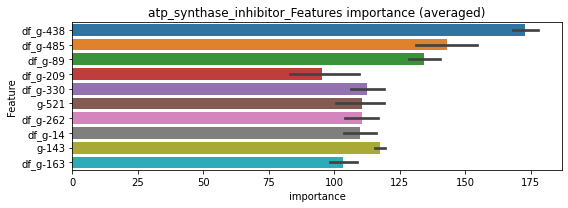

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00032255	valid_1's binary_logloss: 0.00248187
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000310522	valid_1's binary_logloss: 0.000860297
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000323282	valid_1's binary_logloss: 0.000486246
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.001229737832831774


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000314007	valid_1's binary_logloss: 0.00108915
neg labels: 3289 → selected neg labels: 3273


atpase_inhibitor, len(trt): 97, len(othr): 3273, target_rate: 0.0040732 → Adj_target_rate: 0.0041016
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00954105	valid_1's binary_logloss: 0.0817419
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.0035367	valid_1's binary_logloss: 0.0740255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966777	valid_1's binary_logloss: 0.0628719
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00181531	valid_1's binary_logloss: 0.048752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00940362	valid_1's binary_logloss: 0.051343
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00300662	valid_1's binary_logloss: 0.0416183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00971871	valid_1's binary_logloss: 0.057156
[600]	training's binary_logloss: 0.00161159	valid_1's binary_logloss: 0.0424511
Early stopping,

1 / 3 AUC score:0.997
y_Threshold: 0.0149014, Threshold: 0.0319539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00407, Num_p_label: 40.0, conf_0:0.02237, conf_1:0.04154
Num_p_label: 40.0, Expected: 16.2, Adj_threshold_1: 0.0319539
Num_p_label: 15.0, Expected: 16.2, Adj_threshold_2: 0.0519539
threshold: 0.0519539, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00901186	valid_1's binary_logloss: 0.0654135
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00227897	valid_1's binary_logloss: 0.0586915
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00863913	valid_1's binary_logloss: 0.0667324
[600]	training's binary_logloss: 0.00146928	valid_1's binary_logloss: 0.0579676
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00157581	valid_1's binary_logloss: 0.0576505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931473	valid_1's binary_logloss: 0.0529433
[600]	training's binary_logloss: 0.00155719	valid_1's binary_logloss: 0.0363973
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000935074	valid_1's binary_logloss: 0.0345942
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:1.000
y_Threshold: 0.0314030, Threshold: 0.0519539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0062783 Vs.target_rate: 0.00407, Num_p_label: 25.0, conf_0:0.04156, conf_1:0.06234
Num_p_label: 25.0, Expected: 16.2, Adj_threshold_1: 0.0519539
Num_p_label: 13.0, Expected: 16.2, Adj_threshold_2: 0.0719539
threshold: 0.0719539, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 639.0/3765, y_label_rate: 0.1697211
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00826088	valid_1's binary_logloss: 0.0654555
[600]	training's binary_logloss: 0.00142317	valid_1's binary_logloss: 0.0530088
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00111397	valid_1's binary_logloss: 0.0519086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00872771	valid_1's binary_logloss: 0.0606962
[600]	training's binary_logloss: 0.00144523	valid_1's binary_logloss: 0.0447704
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00134256	valid_1's binary_logloss: 0.0442188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00904991	valid_1's binary_logloss: 0.0434042
[600]	training's binary_logloss: 0.00153305	valid_1's binary_logloss: 0.0308002
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00114212	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0312063, Threshold: 0.0719539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0040181 Vs.target_rate: 0.00407, Num_p_label: 16.0, conf_0:0.06476, conf_1:0.07915
threshold: 0.0719539, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 631.0/3749, y_label_rate: 0.1683115


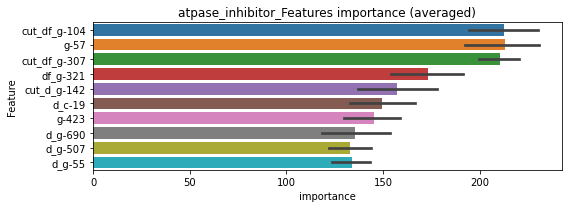

len(train_index) : 2811
len(valid_index) : 938
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000792736	valid_1's binary_logloss: 0.0214976


len(train_index) : 2812
len(valid_index) : 937
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00102597	valid_1's binary_logloss: 0.0414152


len(train_index) : 2812
len(valid_index) : 937
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000787603	valid_1's binary_logloss: 0.0260163


len(train_index) : 2812
len(valid_index) : 937
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00103144	valid_1's binary_logloss: 0.0299302


atpase_inhibitor logloss: 0.029712616457824335


neg labels: 3289 → selected neg labels: 3287


atr_kinase_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158548	valid_1's binary_logloss: 0.00324965
[600]	training's binary_logloss: 0.000409901	valid_1's binary_logloss: 0.00111176
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000392813	valid_1's binary_logloss: 0.00107913
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156335	valid_1's binary_logloss: 0.00403308
[600]	training's binary_logloss: 0.000405467	valid_1's binary_logloss: 0.0016514
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000388449	valid_1's binary_logloss: 0.00162257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159182	valid_1's binary_logloss: 0.00305215
[600]	training's binary_logloss: 0.000404162	valid_1's binary_logloss: 0.0012148
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000392123	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0022726, Threshold: 0.0083554, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00585, conf_1:0.01086
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0083554
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_2: 0.0283554
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_3: 0.0483554
threshold: 0.0483554, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147834	valid_1's binary_logloss: 0.00286192
[600]	training's binary_logloss: 0.000393704	valid_1's binary_logloss: 0.00095986
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000377454	valid_1's binary_logloss: 0.000925803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144466	valid_1's binary_logloss: 0.00337965
[600]	training's binary_logloss: 0.000390744	valid_1's binary_logloss: 0.00141056
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000386987	valid_1's binary_logloss: 0.00140383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147414	valid_1's binary_logloss: 0.00253666
[600]	training's binary_logloss: 0.00038956	valid_1's binary_logloss: 0.000788685
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000387635	valid_1's bin

2 / 3 AUC score:1.000
y_Threshold: 0.1138850, Threshold: 0.0483554, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00080, Num_p_label: 15.0, conf_0:0.03868, conf_1:0.05803
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0483554
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.0683554
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_3: 0.0883554
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_4: 0.1083554
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_5: 0.1283554
threshold: 0.1283554, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147834	valid_1's binary_logloss: 0.00286192
[600]	training's binary_logloss: 0.000393704	valid_1's binary_logloss: 0.00095986
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000377454	valid_1's binary_logloss: 0.000925803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144466	valid_1's binary_logloss: 0.00337965
[600]	training's binary_logloss: 0.000390744	valid_1's binary_logloss: 0.00141056
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000386987	valid_1's binary_logloss: 0.00140383
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147414	valid_1's binary_logloss: 0.00253666
[600]	training's binary_logloss: 0.00038956	valid_1's binary_logloss: 0.000788685
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000387635	valid_1's bin

3 / 3 AUC score:1.000
y_Threshold: 0.1138850, Threshold: 0.1283554, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.11552, conf_1:0.14119
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.1283554
threshold: 0.1283554, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


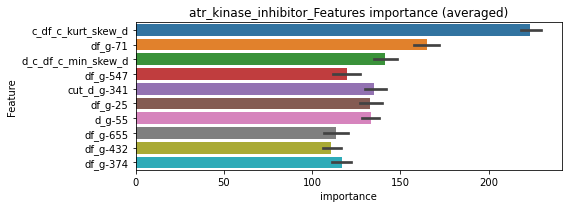

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000387023	valid_1's binary_logloss: 0.000861216
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000389531	valid_1's binary_logloss: 0.00148611
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000382196	valid_1's binary_logloss: 0.000818638
Training until validation scores don't improve for 30 rounds


atr_kinase_inhibitor logloss: 0.001186922146654435


Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000384605	valid_1's binary_logloss: 0.00158056
neg labels: 3289 → selected neg labels: 3271


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3271, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121843	valid_1's binary_logloss: 0.0749633
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00200857	valid_1's binary_logloss: 0.0605169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117404	valid_1's binary_logloss: 0.0533103
[600]	training's binary_logloss: 0.00176235	valid_1's binary_logloss: 0.0317031
[900]	training's binary_logloss: 0.000897803	valid_1's binary_logloss: 0.0282045
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000837853	valid_1's binary_logloss: 0.0279522
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116475	valid_1's binary_logloss: 0.0595886
[600]	training's binary_logloss: 0.0017781	valid_1's binary_logloss: 0.0441785
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00103543	valid_1's binary_logloss: 0.04

1 / 3 AUC score:0.995
y_Threshold: 0.0136082, Threshold: 0.0832413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 644/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.05827, conf_1:0.10821
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0832413
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_2: 0.1032413
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_3: 0.1232413
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_4: 0.1432413
threshold: 0.1432413, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 644.0/3774, y_label_rate: 0.1706412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0098058	valid_1's binary_logloss: 0.0577013
[600]	training's binary_logloss: 0.00153056	valid_1's binary_logloss: 0.0426095
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.00141145	valid_1's binary_logloss: 0.0423861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0096939	valid_1's binary_logloss: 0.0615171
[600]	training's binary_logloss: 0.00154996	valid_1's binary_logloss: 0.0463191
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00119965	valid_1's binary_logloss: 0.0454734
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970628	valid_1's binary_logloss: 0.0498769
[600]	training's binary_logloss: 0.00156127	valid_1's binary_logloss: 0.036115
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00134898	valid_1's binary_logloss: 0.035

2 / 3 AUC score:0.998
y_Threshold: 0.0466479, Threshold: 0.1432413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 637.0/3760
p_label_rate: 0.0107986 Vs.target_rate: 0.00403, Num_p_label: 43.0, conf_0:0.11459, conf_1:0.17189
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_1: 0.1432413
Num_p_label: 33.0, Expected: 16.1, Adj_threshold_2: 0.1632413
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_3: 0.1832413
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.2032413
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_5: 0.2232413
threshold: 0.2232413, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882171	valid_1's binary_logloss: 0.0768673
[600]	training's binary_logloss: 0.00141694	valid_1's binary_logloss: 0.0630824
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00128389	valid_1's binary_logloss: 0.0620783
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00969396	valid_1's binary_logloss: 0.0394231
[600]	training's binary_logloss: 0.00156489	valid_1's binary_logloss: 0.0256314
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000960175	valid_1's binary_logloss: 0.0240329
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00958232	valid_1's binary_logloss: 0.0462529
[600]	training's binary_logloss: 0.00151304	valid_1's binary_logloss: 0.0277925
[900]	training's binary_logloss: 0.000816324	valid_1's binary_logloss: 0.0252225
Early stopping, best iter

3 / 3 AUC score:0.999
y_Threshold: 0.0415778, Threshold: 0.2232413, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 628.0/3742
p_label_rate: 0.0090407 Vs.target_rate: 0.00403, Num_p_label: 36.0, conf_0:0.20092, conf_1:0.24557
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_1: 0.2232413
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_2: 0.2432413
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_3: 0.2632413
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_4: 0.2832413
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_5: 0.3032413
threshold: 0.3032413, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 628.0/3742, y_label_rate: 0.1678247


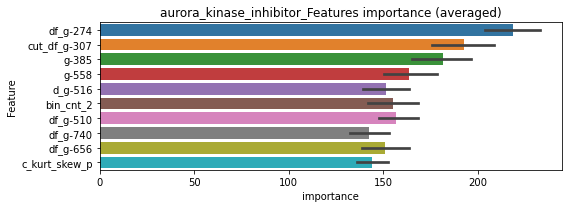

len(train_index) : 2806
len(valid_index) : 936
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000925564	valid_1's binary_logloss: 0.0379622


len(train_index) : 2806
len(valid_index) : 936
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000769314	valid_1's binary_logloss: 0.0221787


len(train_index) : 2807
len(valid_index) : 935
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.00081025	valid_1's binary_logloss: 0.0206089


len(train_index) : 2807
len(valid_index) : 935
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000935666	valid_1's binary_logloss: 0.0253283


aurora_kinase_inhibitor logloss: 0.02652141901917631


neg labels: 3289 → selected neg labels: 3287


autotaxin_inhibitor, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000414482	valid_1's binary_logloss: 0.000655672
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000202241	valid_1's binary_logloss: 0.000383671
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000403621	valid_1's binary_logloss: 0.000657836
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000208528	valid_1's binary_logloss: 0.000375393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409088	valid_1's binary_logloss: 0.000647293
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000205579	valid_1's binary_logloss: 0.000356173
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000409824	valid_1's binary_logloss: 0.000704635


1 / 3 AUC score:1.000
y_Threshold: 0.0007818, Threshold: 0.0056553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00396, conf_1:0.00735
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0056553
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0256553
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0456553
threshold: 0.0456553, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000205838	valid_1's binary_logloss: 0.000398879


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000369152	valid_1's binary_logloss: 0.00628482
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000205213	valid_1's binary_logloss: 0.0059455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364447	valid_1's binary_logloss: 0.000499823
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000184279	valid_1's binary_logloss: 0.000268101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000367508	valid_1's binary_logloss: 0.000424057
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00018472	valid_1's binary_logloss: 0.000218166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036916	valid_1's binary_logloss: 0.000563915


2 / 3 AUC score:1.000
y_Threshold: 0.0260128, Threshold: 0.0456553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0092918 Vs.target_rate: 0.00025, Num_p_label: 37.0, conf_0:0.03652, conf_1:0.05479
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0456553
Num_p_label: 34.0, Expected: 1.0, Adj_threshold_2: 0.0656553
Num_p_label: 27.0, Expected: 1.0, Adj_threshold_3: 0.0856553
Num_p_label: 20.0, Expected: 1.0, Adj_threshold_4: 0.1056553
Num_p_label: 15.0, Expected: 1.0, Adj_threshold_5: 0.1256553
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_6: 0.1456553
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_7: 0.1656553
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_8: 0.1856553
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_9: 0.2056553
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_10: 0.2256553


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000184864	valid_1's binary_logloss: 0.000311192


threshold: 0.2456553, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000369152	valid_1's binary_logloss: 0.00628482
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000205213	valid_1's binary_logloss: 0.0059455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364447	valid_1's binary_logloss: 0.000499823
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000184279	valid_1's binary_logloss: 0.000268101
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000367508	valid_1's binary_logloss: 0.000424057
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00018472	valid_1's binary_logloss: 0.000218166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00036916	valid_1's binary_logloss: 0.000563915


3 / 3 AUC score:1.000
y_Threshold: 0.0260128, Threshold: 0.2456553, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0020090 Vs.target_rate: 0.00025, Num_p_label: 8.0, conf_0:0.22109, conf_1:0.27022
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_1: 0.2456553
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_2: 0.2656553
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.2856553
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.3056553
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.3256553
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_6: 0.3456553
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.3656553
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.3856553
threshold: 0.3856553, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000184864	valid_1's binary_logloss: 0.000311192


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


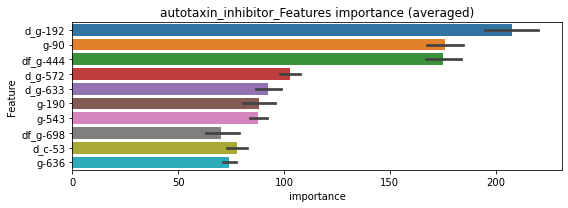

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.000215863	valid_1's binary_logloss: 0.00538831
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000183611	valid_1's binary_logloss: 0.000272059
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00018322	valid_1's binary_logloss: 0.000211492
Training until validation scores don't improve for 30 rounds


autotaxin_inhibitor logloss: 0.0015398440679676862


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000181146	valid_1's binary_logloss: 0.000287512
neg labels: 3289 → selected neg labels: 3277


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3277, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00586669	valid_1's binary_logloss: 0.0436209
[600]	training's binary_logloss: 0.00102106	valid_1's binary_logloss: 0.0356176
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000960239	valid_1's binary_logloss: 0.0350964
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625443	valid_1's binary_logloss: 0.0288154
[600]	training's binary_logloss: 0.00107841	valid_1's binary_logloss: 0.0166526
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000684449	valid_1's binary_logloss: 0.0150839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00603399	valid_1's binary_logloss: 0.0300223
[600]	training's binary_logloss: 0.00104499	valid_1's binary_logloss: 0.0186326
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000780742	valid_1's binary_logloss:

1 / 3 AUC score:0.999
y_Threshold: 0.0074707, Threshold: 0.0190499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.01333, conf_1:0.02476
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0190499
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_2: 0.0390499
threshold: 0.0390499, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3798, y_label_rate: 0.1721959
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542538	valid_1's binary_logloss: 0.040252
[600]	training's binary_logloss: 0.000961048	valid_1's binary_logloss: 0.0329301
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000834598	valid_1's binary_logloss: 0.0322304
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577802	valid_1's binary_logloss: 0.0312362
[600]	training's binary_logloss: 0.00100333	valid_1's binary_logloss: 0.0213895
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000762563	valid_1's binary_logloss: 0.0205796
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00548272	valid_1's binary_logloss: 0.0295967
[600]	training's binary_logloss: 0.000991347	valid_1's binary_logloss: 0.019438
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000656821	valid_1's binary_logloss:

2 / 3 AUC score:0.999
y_Threshold: 0.0371547, Threshold: 0.0390499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 647.0/3784


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00214901	valid_1's binary_logloss: 0.0356896


p_label_rate: 0.0125565 Vs.target_rate: 0.00252, Num_p_label: 50.0, conf_0:0.03124, conf_1:0.04686
Num_p_label: 50.0, Expected: 10.0, Adj_threshold_1: 0.0390499
Num_p_label: 29.0, Expected: 10.0, Adj_threshold_2: 0.0590499
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.0790499
threshold: 0.0790499, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 647.0/3784, y_label_rate: 0.1709831
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00499199	valid_1's binary_logloss: 0.0313859
[600]	training's binary_logloss: 0.000924518	valid_1's binary_logloss: 0.0225095
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000735664	valid_1's binary_logloss: 0.0219279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481381	valid_1's binary_logloss: 0.0356071
[600]	training's binary_logloss: 0.000908236	valid_1's binary_logloss: 0.0269935
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000657651	valid_1's binary_logloss: 0.0257609
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516334	valid_1's binary_logloss: 0.022081
[600]	training's binary_logloss: 0.000933781	valid_1's binary_logloss: 0.0122975
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000681423	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0291586, Threshold: 0.0790499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3776
p_label_rate: 0.0045203 Vs.target_rate: 0.00252, Num_p_label: 18.0, conf_0:0.07114, conf_1:0.08695
Num_p_label: 18.0, Expected: 10.0, Adj_threshold_1: 0.0790499
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_2: 0.0990499
threshold: 0.0990499, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 643.0/3776, y_label_rate: 0.1702860


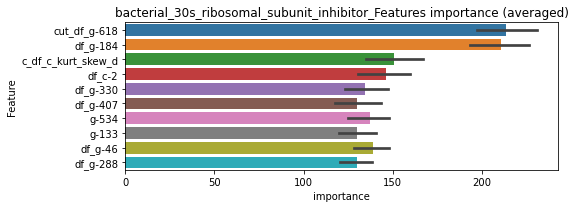

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.00063499	valid_1's binary_logloss: 0.0172813


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000696427	valid_1's binary_logloss: 0.0127225


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000732493	valid_1's binary_logloss: 0.0163842


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.01691935953249065


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00158983	valid_1's binary_logloss: 0.0212894
neg labels: 3289 → selected neg labels: 3277


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3277, target_rate: 0.0033594 → Adj_target_rate: 0.0034820
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834971	valid_1's binary_logloss: 0.0548188
[600]	training's binary_logloss: 0.00134595	valid_1's binary_logloss: 0.0421952
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000809622	valid_1's binary_logloss: 0.0406416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00897906	valid_1's binary_logloss: 0.0417648
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00206344	valid_1's binary_logloss: 0.0312924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927828	valid_1's binary_logloss: 0.0468816
[600]	training's binary_logloss: 0.00141486	valid_1's binary_logloss: 0.03436
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00127175	valid_1's binary_logloss: 0.0334112
Training until validation scores don't improve for 30 rounds
[300]	traini

1 / 3 AUC score:0.999
y_Threshold: 0.0140534, Threshold: 0.0350222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 650/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00336, Num_p_label: 40.0, conf_0:0.02452, conf_1:0.04553
Num_p_label: 40.0, Expected: 13.4, Adj_threshold_1: 0.0350222
Num_p_label: 22.0, Expected: 13.4, Adj_threshold_2: 0.0550222
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_3: 0.0750222
threshold: 0.0750222, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3790, y_label_rate: 0.1715040
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00734599	valid_1's binary_logloss: 0.0371619
[600]	training's binary_logloss: 0.00126637	valid_1's binary_logloss: 0.0234205
[900]	training's binary_logloss: 0.00071035	valid_1's binary_logloss: 0.0219833
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000660104	valid_1's binary_logloss: 0.0217444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00711366	valid_1's binary_logloss: 0.0441764
[600]	training's binary_logloss: 0.00124792	valid_1's binary_logloss: 0.0322763
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00093631	valid_1's binary_logloss: 0.0307781
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00736459	valid_1's binary_logloss: 0.0372406
[600]	training's binary_logloss: 0.00124815	valid_1's binary_logloss: 0.0221677
Early stopping, best iter

2 / 3 AUC score:1.000
y_Threshold: 0.0719634, Threshold: 0.0750222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0062783 Vs.target_rate: 0.00336, Num_p_label: 25.0, conf_0:0.06002, conf_1:0.09003
Num_p_label: 25.0, Expected: 13.4, Adj_threshold_1: 0.0750222
Num_p_label: 21.0, Expected: 13.4, Adj_threshold_2: 0.0950222
Num_p_label: 17.0, Expected: 13.4, Adj_threshold_3: 0.1150222
threshold: 0.1150222, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00702659	valid_1's binary_logloss: 0.046144
[600]	training's binary_logloss: 0.001211	valid_1's binary_logloss: 0.0328964
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000842157	valid_1's binary_logloss: 0.0315005
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0070538	valid_1's binary_logloss: 0.0415405
[600]	training's binary_logloss: 0.00122319	valid_1's binary_logloss: 0.0275255
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000778446	valid_1's binary_logloss: 0.0258052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00709749	valid_1's binary_logloss: 0.0259841
[600]	training's binary_logloss: 0.00123443	valid_1's binary_logloss: 0.0136066
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.00080693	valid_1's binary_logloss: 0.01

3 / 3 AUC score:1.000
y_Threshold: 0.0418868, Threshold: 0.1150222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3772
p_label_rate: 0.0057760 Vs.target_rate: 0.00336, Num_p_label: 23.0, conf_0:0.10352, conf_1:0.12652
Num_p_label: 23.0, Expected: 13.4, Adj_threshold_1: 0.1150222
Num_p_label: 18.0, Expected: 13.4, Adj_threshold_2: 0.1350222
threshold: 0.1350222, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 641.0/3772, y_label_rate: 0.1699364


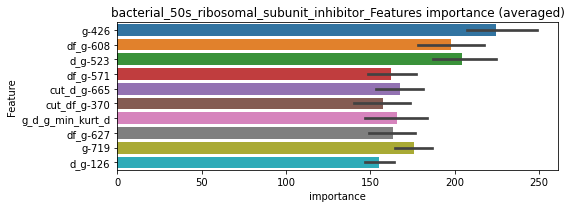

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.00070372	valid_1's binary_logloss: 0.0272125


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00092926	valid_1's binary_logloss: 0.0262732


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.0007384	valid_1's binary_logloss: 0.0143416


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000845943	valid_1's binary_logloss: 0.0187894


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.02165647930836367


neg labels: 3289 → selected neg labels: 3286


bacterial_antifolate, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00290385	valid_1's binary_logloss: 0.0143051
[600]	training's binary_logloss: 0.000623767	valid_1's binary_logloss: 0.00836843
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000569076	valid_1's binary_logloss: 0.00809267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028836	valid_1's binary_logloss: 0.0158813
[600]	training's binary_logloss: 0.000612167	valid_1's binary_logloss: 0.00899608
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000534209	valid_1's binary_logloss: 0.00861664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296079	valid_1's binary_logloss: 0.00911682
[600]	training's binary_logloss: 0.000637542	valid_1's binary_logloss: 0.00449422
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000535673	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0038602, Threshold: 0.0315289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.02207, conf_1:0.04099
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0315289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.0515289
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_3: 0.0715289
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_4: 0.0915289
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_5: 0.1115289
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_6: 0.1315289
threshold: 0.1315289, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267112	valid_1's binary_logloss: 0.0101334
[600]	training's binary_logloss: 0.00058677	valid_1's binary_logloss: 0.00604008
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000626598	valid_1's binary_logloss: 0.00599654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262531	valid_1's binary_logloss: 0.0172128
[600]	training's binary_logloss: 0.000587125	valid_1's binary_logloss: 0.0119182
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000529117	valid_1's binary_logloss: 0.0114535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270419	valid_1's binary_logloss: 0.008854
[600]	training's binary_logloss: 0.000597536	valid_1's binary_logloss: 0.00443445
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000524736	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0525361, Threshold: 0.1315289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00151, Num_p_label: 46.0, conf_0:0.10522, conf_1:0.15783
Num_p_label: 46.0, Expected: 6.0, Adj_threshold_1: 0.1315289
Num_p_label: 41.0, Expected: 6.0, Adj_threshold_2: 0.1515289
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_3: 0.1715289
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_4: 0.1915289
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_5: 0.2115289
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_6: 0.2315289
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_7: 0.2515289
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_8: 0.2715289
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_9: 0.2915289
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_10: 0.3115289
threshold: 0.3315289, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00267112	valid_1's binary_logloss: 0.0101334
[600]	training's binary_logloss: 0.00058677	valid_1's binary_logloss: 0.00604008
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000626598	valid_1's binary_logloss: 0.00599654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262531	valid_1's binary_logloss: 0.0172128
[600]	training's binary_logloss: 0.000587125	valid_1's binary_logloss: 0.0119182
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000529117	valid_1's binary_logloss: 0.0114535
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270419	valid_1's binary_logloss: 0.008854
[600]	training's binary_logloss: 0.000597536	valid_1's binary_logloss: 0.00443445
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000524736	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0525361, Threshold: 0.3315289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00151, Num_p_label: 30.0, conf_0:0.29838, conf_1:0.36468
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_1: 0.3315289
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_2: 0.3515289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_3: 0.3715289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_4: 0.3915289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_5: 0.4115289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_6: 0.4315289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_7: 0.4515289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_8: 0.4715289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_9: 0.4915289
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_10: 0.5115289
threshold: 0.5315289, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


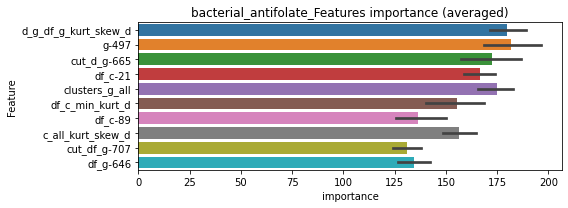

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000527406	valid_1's binary_logloss: 0.00653308


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000566298	valid_1's binary_logloss: 0.0100597


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000548848	valid_1's binary_logloss: 0.00365882


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000547555	valid_1's binary_logloss: 0.00790531


bacterial_antifolate logloss: 0.0070430693355353876


neg labels: 3289 → selected neg labels: 3268


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 3268, target_rate: 0.0080625 → Adj_target_rate: 0.0073283
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0238003	valid_1's binary_logloss: 0.189952
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.0117755	valid_1's binary_logloss: 0.18449
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0246531	valid_1's binary_logloss: 0.158816
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00854187	valid_1's binary_logloss: 0.150644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0260013	valid_1's binary_logloss: 0.155962
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.0067189	valid_1's binary_logloss: 0.143999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.02484	valid_1's binary_logloss: 0.143426
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00525594	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.965
y_Threshold: 0.0440117, Threshold: 0.2054704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 272 → Positive_corect_labels: 583/3649
p_label_rate: 0.0100452 Vs.target_rate: 0.00806, Num_p_label: 40.0, conf_0:0.14383, conf_1:0.26711
threshold: 0.2054704, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 583.0/3649, y_label_rate: 0.1597698
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151808	valid_1's binary_logloss: 0.104904
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00286398	valid_1's binary_logloss: 0.0917907
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0149681	valid_1's binary_logloss: 0.110572
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00576656	valid_1's binary_logloss: 0.102306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152607	valid_1's binary_logloss: 0.0949598
[600]	training's binary_logloss: 0.00252302	valid_1's binary_logloss: 0.0800332
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00219503	valid_1's binary_logloss: 0.0797418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015124	valid_1's binary_logloss: 0.116128
Early stopping, best

2 / 3 AUC score:0.994
y_Threshold: 0.0572272, Threshold: 0.2054704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 549.0/3581
p_label_rate: 0.0203415 Vs.target_rate: 0.00806, Num_p_label: 81.0, conf_0:0.16438, conf_1:0.24656
Num_p_label: 81.0, Expected: 32.1, Adj_threshold_1: 0.2054704
Num_p_label: 74.0, Expected: 32.1, Adj_threshold_2: 0.2254704
Num_p_label: 69.0, Expected: 32.1, Adj_threshold_3: 0.2454704
Num_p_label: 64.0, Expected: 32.1, Adj_threshold_4: 0.2654704
Num_p_label: 61.0, Expected: 32.1, Adj_threshold_5: 0.2854704
Num_p_label: 57.0, Expected: 32.1, Adj_threshold_6: 0.3054704
Num_p_label: 53.0, Expected: 32.1, Adj_threshold_7: 0.3254704
Num_p_label: 51.0, Expected: 32.1, Adj_threshold_8: 0.3454704
Num_p_label: 47.0, Expected: 32.1, Adj_threshold_9: 0.3654704
threshold: 0.3654704, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 549.0/3581, y_label_rate: 0.1533091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120461	valid_1's binary_logloss: 0.0894348
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00237919	valid_1's binary_logloss: 0.0790792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117508	valid_1's binary_logloss: 0.113733
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0072412	valid_1's binary_logloss: 0.111816
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126515	valid_1's binary_logloss: 0.0795163
[600]	training's binary_logloss: 0.00214241	valid_1's binary_logloss: 0.0647352
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00236571	valid_1's binary_logloss: 0.0644288
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124394	valid_1's binary_logloss: 0.102778


3 / 3 AUC score:0.994


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00432421	valid_1's binary_logloss: 0.0928038


y_Threshold: 0.0621735, Threshold: 0.3654704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 519.0/3521
p_label_rate: 0.0168257 Vs.target_rate: 0.00806, Num_p_label: 67.0, conf_0:0.32892, conf_1:0.40202
Num_p_label: 67.0, Expected: 32.1, Adj_threshold_1: 0.3654704
Num_p_label: 64.0, Expected: 32.1, Adj_threshold_2: 0.3854704
Num_p_label: 58.0, Expected: 32.1, Adj_threshold_3: 0.4054704
Num_p_label: 55.0, Expected: 32.1, Adj_threshold_4: 0.4254704
Num_p_label: 54.0, Expected: 32.1, Adj_threshold_5: 0.4454704
Num_p_label: 53.0, Expected: 32.1, Adj_threshold_6: 0.4654704
Num_p_label: 52.0, Expected: 32.1, Adj_threshold_7: 0.4854704
Num_p_label: 50.0, Expected: 32.1, Adj_threshold_8: 0.5054704
Num_p_label: 47.0, Expected: 32.1, Adj_threshold_9: 0.5254704
threshold: 0.5254704, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 519.0/3521, y_label_rate: 0.1474013


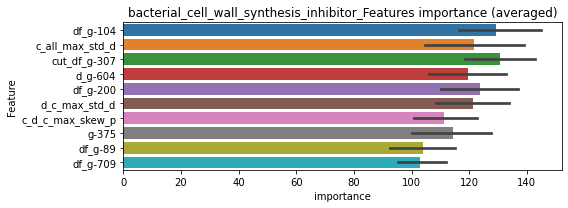

len(train_index) : 2640
len(valid_index) : 881
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00243308	valid_1's binary_logloss: 0.0878683


len(train_index) : 2641
len(valid_index) : 880
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2641
len(valid_index) : 880


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.0030852	valid_1's binary_logloss: 0.0750357


================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0021726	valid_1's binary_logloss: 0.0680143


len(train_index) : 2641
len(valid_index) : 880
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00154393	valid_1's binary_logloss: 0.0629815


bacterial_cell_wall_synthesis_inhibitor logloss: 0.07347903368876851


neg labels: 3289 → selected neg labels: 3279


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3279, target_rate: 0.0037373 → Adj_target_rate: 0.0038122
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104595	valid_1's binary_logloss: 0.052119
[600]	training's binary_logloss: 0.00161058	valid_1's binary_logloss: 0.0327839
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000875693	valid_1's binary_logloss: 0.0294188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00997678	valid_1's binary_logloss: 0.0570447
[600]	training's binary_logloss: 0.00158451	valid_1's binary_logloss: 0.040615
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.00097701	valid_1's binary_logloss: 0.0390058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102859	valid_1's binary_logloss: 0.0615192
[600]	training's binary_logloss: 0.00156279	valid_1's binary_logloss: 0.050013
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00147863	valid_1's binary_logloss: 0.0498

1 / 3 AUC score:0.998
y_Threshold: 0.0118822, Threshold: 0.0320480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374, Num_p_label: 40.0, conf_0:0.02243, conf_1:0.04166
Num_p_label: 40.0, Expected: 14.9, Adj_threshold_1: 0.0320480
Num_p_label: 16.0, Expected: 14.9, Adj_threshold_2: 0.0520480
threshold: 0.0520480, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00810917	valid_1's binary_logloss: 0.0624832
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00153814	valid_1's binary_logloss: 0.0509182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00853175	valid_1's binary_logloss: 0.0452354
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00159291	valid_1's binary_logloss: 0.0327105
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00849367	valid_1's binary_logloss: 0.051714
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00189459	valid_1's binary_logloss: 0.040285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843391	valid_1's binary_logloss: 0.0535922
[600]	training's binary_logloss: 0.001404	valid_1's binary_logloss: 0.0419669
Early stopping,

2 / 3 AUC score:0.999
y_Threshold: 0.0417268, Threshold: 0.0520480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 636.0/3764
p_label_rate: 0.0118031 Vs.target_rate: 0.00374, Num_p_label: 47.0, conf_0:0.04164, conf_1:0.06246
Num_p_label: 47.0, Expected: 14.9, Adj_threshold_1: 0.0520480
Num_p_label: 26.0, Expected: 14.9, Adj_threshold_2: 0.0720480
Num_p_label: 14.0, Expected: 14.9, Adj_threshold_3: 0.0920480
threshold: 0.0920480, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 636.0/3764, y_label_rate: 0.1689692
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00739064	valid_1's binary_logloss: 0.047327
[600]	training's binary_logloss: 0.00130771	valid_1's binary_logloss: 0.0345894
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000803712	valid_1's binary_logloss: 0.0329591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00726032	valid_1's binary_logloss: 0.0393543
[600]	training's binary_logloss: 0.00129491	valid_1's binary_logloss: 0.0294793
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000964273	valid_1's binary_logloss: 0.0283798
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00765714	valid_1's binary_logloss: 0.0430223
[600]	training's binary_logloss: 0.00131502	valid_1's binary_logloss: 0.0298135
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000972675	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0293652, Threshold: 0.0920480, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 628.0/3748
p_label_rate: 0.0037670 Vs.target_rate: 0.00374, Num_p_label: 15.0, conf_0:0.08284, conf_1:0.10125
threshold: 0.0920480, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 628.0/3748, y_label_rate: 0.1675560


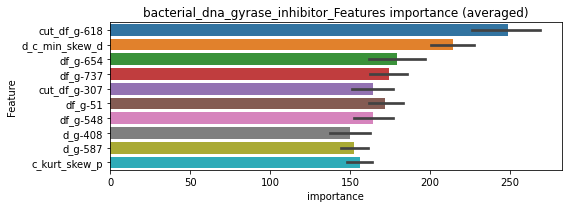

len(train_index) : 2811
len(valid_index) : 937
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000869003	valid_1's binary_logloss: 0.0290854


len(train_index) : 2811
len(valid_index) : 937
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000781757	valid_1's binary_logloss: 0.0273114


len(train_index) : 2811
len(valid_index) : 937
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000737257	valid_1's binary_logloss: 0.0183655


len(train_index) : 2811
len(valid_index) : 937
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00170365	valid_1's binary_logloss: 0.0340286


bacterial_dna_gyrase_inhibitor logloss: 0.027197711914573788


neg labels: 3289 → selected neg labels: 3274


bacterial_dna_inhibitor, len(trt): 115, len(othr): 3274, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115364	valid_1's binary_logloss: 0.114423
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.0024208	valid_1's binary_logloss: 0.106523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130958	valid_1's binary_logloss: 0.0741858
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00230448	valid_1's binary_logloss: 0.0620621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128843	valid_1's binary_logloss: 0.0630755
[600]	training's binary_logloss: 0.00207905	valid_1's binary_logloss: 0.0505549
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00182088	valid_1's binary_logloss: 0.0500257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133611	valid_1's binary_logloss: 0.0820143
Early stopping, be

1 / 3 AUC score:0.991
y_Threshold: 0.0161138, Threshold: 0.0478501, pos_neg_ratio: 0.8000000
Remove_noisy_data: 170 → Positive_corect_labels: 635/3758
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.03350, conf_1:0.06221
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0478501
Num_p_label: 23.0, Expected: 19.2, Adj_threshold_2: 0.0678501
threshold: 0.0678501, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 635.0/3758, y_label_rate: 0.1689729
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00992795	valid_1's binary_logloss: 0.0694122
[600]	training's binary_logloss: 0.00165385	valid_1's binary_logloss: 0.0555017
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.00101803	valid_1's binary_logloss: 0.0538921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010297	valid_1's binary_logloss: 0.057169
[600]	training's binary_logloss: 0.00169402	valid_1's binary_logloss: 0.0425984
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00118569	valid_1's binary_logloss: 0.0401065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00981277	valid_1's binary_logloss: 0.0461068
[600]	training's binary_logloss: 0.0016922	valid_1's binary_logloss: 0.0320989
[900]	training's binary_logloss: 0.000881803	valid_1's binary_logloss: 0.0301039
Early stopping, best iteration

2 / 3 AUC score:0.999
y_Threshold: 0.0343354, Threshold: 0.0678501, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0082873 Vs.target_rate: 0.00483, Num_p_label: 33.0, conf_0:0.05428, conf_1:0.08142
Num_p_label: 33.0, Expected: 19.2, Adj_threshold_1: 0.0678501
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_2: 0.0878501
threshold: 0.0878501, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 623.0/3734, y_label_rate: 0.1668452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00934704	valid_1's binary_logloss: 0.0577178
[600]	training's binary_logloss: 0.00155262	valid_1's binary_logloss: 0.0457085
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00104699	valid_1's binary_logloss: 0.0437889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882477	valid_1's binary_logloss: 0.0644115
[600]	training's binary_logloss: 0.0015266	valid_1's binary_logloss: 0.0504843
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000945526	valid_1's binary_logloss: 0.0481999
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00961528	valid_1's binary_logloss: 0.0371077
[600]	training's binary_logloss: 0.0016332	valid_1's binary_logloss: 0.0192601
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.00090295	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0293573, Threshold: 0.0878501, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 617.0/3722
p_label_rate: 0.0065294 Vs.target_rate: 0.00483, Num_p_label: 26.0, conf_0:0.07907, conf_1:0.09664
threshold: 0.0878501, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 617.0/3722, y_label_rate: 0.1657711


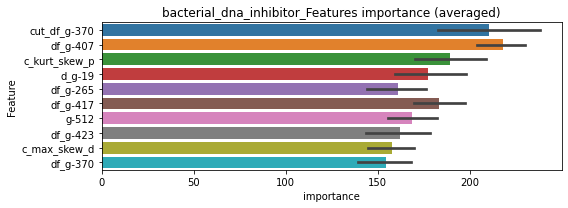

len(train_index) : 2791
len(valid_index) : 931
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.00137187	valid_1's binary_logloss: 0.0409735


len(train_index) : 2791
len(valid_index) : 931
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00119895	valid_1's binary_logloss: 0.0354262


len(train_index) : 2792
len(valid_index) : 930
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000828702	valid_1's binary_logloss: 0.0255514


len(train_index) : 2792
len(valid_index) : 930
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.00183624	valid_1's binary_logloss: 0.0592375


bacterial_dna_inhibitor logloss: 0.04029604016791641


neg labels: 3289 → selected neg labels: 3286


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125342	valid_1's binary_logloss: 0.00326837
[600]	training's binary_logloss: 0.000343901	valid_1's binary_logloss: 0.00129068
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000343363	valid_1's binary_logloss: 0.00128935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122262	valid_1's binary_logloss: 0.00449239
[600]	training's binary_logloss: 0.000349024	valid_1's binary_logloss: 0.00244711
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000345854	valid_1's binary_logloss: 0.00242251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130176	valid_1's binary_logloss: 0.00284428
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00036207	valid_1's binary_logloss: 0.00125233
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0020365, Threshold: 0.0056521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


[600]	training's binary_logloss: 0.000353342	valid_1's binary_logloss: 0.00259912
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000355112	valid_1's binary_logloss: 0.00259433


p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00396, conf_1:0.00735
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0056521
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0256521
threshold: 0.0256521, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118515	valid_1's binary_logloss: 0.00329244
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000348262	valid_1's binary_logloss: 0.00146299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011582	valid_1's binary_logloss: 0.00452065
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000349098	valid_1's binary_logloss: 0.00244409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119302	valid_1's binary_logloss: 0.00200725
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340963	valid_1's binary_logloss: 0.000784257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116313	valid_1's binary_logloss: 0.00516918


2 / 3 AUC score:1.000
y_Threshold: 0.0689812, Threshold: 0.0256521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00080, Num_p_label: 16.0, conf_0:0.02052, conf_1:0.03078


[600]	training's binary_logloss: 0.00033098	valid_1's binary_logloss: 0.00292715
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000331703	valid_1's binary_logloss: 0.00292324


Num_p_label: 16.0, Expected: 3.2, Adj_threshold_1: 0.0256521
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_2: 0.0456521
threshold: 0.0456521, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118515	valid_1's binary_logloss: 0.00329244
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000348262	valid_1's binary_logloss: 0.00146299
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011582	valid_1's binary_logloss: 0.00452065
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000349098	valid_1's binary_logloss: 0.00244409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119302	valid_1's binary_logloss: 0.00200725
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340963	valid_1's binary_logloss: 0.000784257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116313	valid_1's binary_logloss: 0.00516918


3 / 3 AUC score:1.000
y_Threshold: 0.0689812, Threshold: 0.0456521, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


[600]	training's binary_logloss: 0.00033098	valid_1's binary_logloss: 0.00292715
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000331703	valid_1's binary_logloss: 0.00292324


p_label_rate: 0.0017579 Vs.target_rate: 0.00080, Num_p_label: 7.0, conf_0:0.04109, conf_1:0.05022
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_1: 0.0456521
threshold: 0.0456521, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


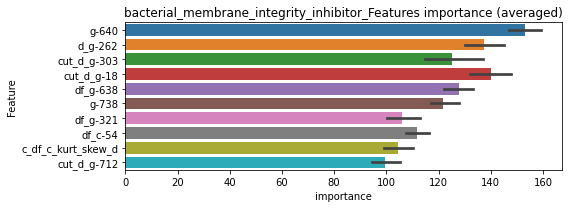

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000352009	valid_1's binary_logloss: 0.00132841
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000336825	valid_1's binary_logloss: 0.00230342
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000343469	valid_1's binary_logloss: 0.000832754
Training until validation scores don't improve for 30 rounds


bacterial_membrane_integrity_inhibitor logloss: 0.0017286414315221563


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000340558	valid_1's binary_logloss: 0.0024505
neg labels: 3289 → selected neg labels: 3282


bcl_inhibitor, len(trt): 31, len(othr): 3282, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024473	valid_1's binary_logloss: 0.0162942
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000569103	valid_1's binary_logloss: 0.0114616
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256915	valid_1's binary_logloss: 0.0052297
[600]	training's binary_logloss: 0.000532165	valid_1's binary_logloss: 0.00166914
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000488191	valid_1's binary_logloss: 0.00158395
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00259297	valid_1's binary_logloss: 0.00535447
[600]	training's binary_logloss: 0.000537859	valid_1's binary_logloss: 0.00180591
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000492814	valid_1's binary_logloss: 0.00169609
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0041318, Threshold: 0.0283844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.01987, conf_1:0.03690
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0283844
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_2: 0.0483844
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.0683844
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_4: 0.0883844
threshold: 0.0883844, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222481	valid_1's binary_logloss: 0.0176305
[600]	training's binary_logloss: 0.000485808	valid_1's binary_logloss: 0.0129838
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000499414	valid_1's binary_logloss: 0.0129285
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237157	valid_1's binary_logloss: 0.00463973
[600]	training's binary_logloss: 0.000507626	valid_1's binary_logloss: 0.00136456
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000447274	valid_1's binary_logloss: 0.00124539
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228511	valid_1's binary_logloss: 0.00372053
[600]	training's binary_logloss: 0.000508001	valid_1's binary_logloss: 0.00104411
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000468831	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0227996, Threshold: 0.0883844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0092918 Vs.target_rate: 0.00130, Num_p_label: 37.0, conf_0:0.07071, conf_1:0.10606
Num_p_label: 37.0, Expected: 5.2, Adj_threshold_1: 0.0883844
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_2: 0.1083844
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_3: 0.1283844
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_4: 0.1483844
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_5: 0.1683844
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_6: 0.1883844
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.2083844
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_8: 0.2283844
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_9: 0.2483844
threshold: 0.2483844, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227035	valid_1's binary_logloss: 0.00489677
[600]	training's binary_logloss: 0.000497355	valid_1's binary_logloss: 0.00172069
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000457095	valid_1's binary_logloss: 0.00163218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231558	valid_1's binary_logloss: 0.00665326
[600]	training's binary_logloss: 0.000494578	valid_1's binary_logloss: 0.00199913
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00045488	valid_1's binary_logloss: 0.00187589
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230792	valid_1's binary_logloss: 0.00767653
[600]	training's binary_logloss: 0.000494468	valid_1's binary_logloss: 0.0044646
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000494468	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0245763, Threshold: 0.2483844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0027624 Vs.target_rate: 0.00130, Num_p_label: 11.0, conf_0:0.22355, conf_1:0.27322
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.2483844
threshold: 0.2483844, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3802, y_label_rate: 0.1720147


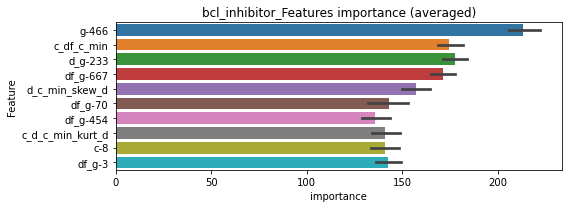

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000465508	valid_1's binary_logloss: 0.00153845


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000457182	valid_1's binary_logloss: 0.00156259


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000481206	valid_1's binary_logloss: 0.00208523


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00046341	valid_1's binary_logloss: 0.00461298


bcl_inhibitor logloss: 0.002449338719736058


neg labels: 3289 → selected neg labels: 3285


bcr-abl_inhibitor, len(trt): 38, len(othr): 3285, target_rate: 0.0015957 → Adj_target_rate: 0.0018493
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00285342	valid_1's binary_logloss: 0.0105335
[600]	training's binary_logloss: 0.000620663	valid_1's binary_logloss: 0.00511644
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000550249	valid_1's binary_logloss: 0.00486425
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277129	valid_1's binary_logloss: 0.0235862
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00063136	valid_1's binary_logloss: 0.0185186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291664	valid_1's binary_logloss: 0.00711885
[600]	training's binary_logloss: 0.000626312	valid_1's binary_logloss: 0.00326196
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000542057	valid_1's binary_logloss: 0.00308632
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0039879, Threshold: 0.0465258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00160, Num_p_label: 40.0, conf_0:0.03257, conf_1:0.06048
Num_p_label: 40.0, Expected: 6.4, Adj_threshold_1: 0.0465258
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_2: 0.0665258
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_3: 0.0865258
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_4: 0.1065258
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_5: 0.1265258
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_6: 0.1465258
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_7: 0.1665258
threshold: 0.1665258, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256912	valid_1's binary_logloss: 0.00846558
[600]	training's binary_logloss: 0.0005783	valid_1's binary_logloss: 0.00399497
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000521256	valid_1's binary_logloss: 0.00383337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241409	valid_1's binary_logloss: 0.0231795
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000635724	valid_1's binary_logloss: 0.0197558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257115	valid_1's binary_logloss: 0.00522767
[600]	training's binary_logloss: 0.000578615	valid_1's binary_logloss: 0.00185496
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000520472	valid_1's binary_logloss: 0.00174741
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0595007, Threshold: 0.1665258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0133099 Vs.target_rate: 0.00160, Num_p_label: 53.0, conf_0:0.13322, conf_1:0.19983
Num_p_label: 53.0, Expected: 6.4, Adj_threshold_1: 0.1665258
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_2: 0.1865258
Num_p_label: 50.0, Expected: 6.4, Adj_threshold_3: 0.2065258
Num_p_label: 49.0, Expected: 6.4, Adj_threshold_4: 0.2265258
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_5: 0.2465258
Num_p_label: 44.0, Expected: 6.4, Adj_threshold_6: 0.2665258
Num_p_label: 42.0, Expected: 6.4, Adj_threshold_7: 0.2865258
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_8: 0.3065258
Num_p_label: 37.0, Expected: 6.4, Adj_threshold_9: 0.3265258
Num_p_label: 35.0, Expected: 6.4, Adj_threshold_10: 0.3465258
threshold: 0.3665258, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00255163	valid_1's binary_logloss: 0.00920924
[600]	training's binary_logloss: 0.000572403	valid_1's binary_logloss: 0.00414916
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000489362	valid_1's binary_logloss: 0.00389639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024837	valid_1's binary_logloss: 0.0148419
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000681575	valid_1's binary_logloss: 0.0117219
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244015	valid_1's binary_logloss: 0.0163254
[600]	training's binary_logloss: 0.000564064	valid_1's binary_logloss: 0.011517
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000561127	valid_1's binary_logloss: 0.0114848
Training until validation scores don't improve for 30 rounds
[300]

3 / 3 AUC score:1.000
y_Threshold: 0.0497506, Threshold: 0.3665258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0092918 Vs.target_rate: 0.00160, Num_p_label: 37.0, conf_0:0.32987, conf_1:0.40318
Num_p_label: 37.0, Expected: 6.4, Adj_threshold_1: 0.3665258
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_2: 0.3865258
Num_p_label: 34.0, Expected: 6.4, Adj_threshold_3: 0.4065258
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_4: 0.4265258
Num_p_label: 31.0, Expected: 6.4, Adj_threshold_5: 0.4465258
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_6: 0.4665258
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_7: 0.4865258
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_8: 0.5065258
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_9: 0.5265258
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.5465258
threshold: 0.5665258, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


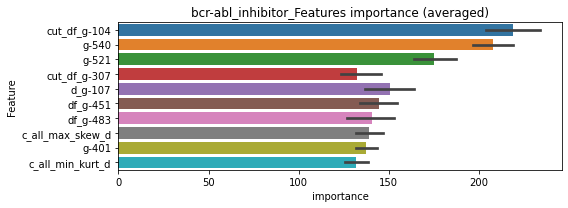

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00058352	valid_1's binary_logloss: 0.0114923


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000522283	valid_1's binary_logloss: 0.00491562


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000511633	valid_1's binary_logloss: 0.0126497


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00051129	valid_1's binary_logloss: 0.00344151


bcr-abl_inhibitor logloss: 0.008131686479266197


neg labels: 3289 → selected neg labels: 3280


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3280, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00647465	valid_1's binary_logloss: 0.0467721
[600]	training's binary_logloss: 0.00106381	valid_1's binary_logloss: 0.0351233
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00087172	valid_1's binary_logloss: 0.0343396
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645769	valid_1's binary_logloss: 0.0323333
[600]	training's binary_logloss: 0.00109094	valid_1's binary_logloss: 0.0187579
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000749546	valid_1's binary_logloss: 0.0173341
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00713979	valid_1's binary_logloss: 0.0333327
[600]	training's binary_logloss: 0.00115731	valid_1's binary_logloss: 0.0247764
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000754198	valid_1's binary_logloss: 

1 / 3 AUC score:0.999
y_Threshold: 0.0076415, Threshold: 0.0206209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.01443, conf_1:0.02681
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.0206209
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_2: 0.0406209
Num_p_label: 8.0, Expected: 11.2, Adj_threshold_3: 0.0606209
threshold: 0.0606209, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588958	valid_1's binary_logloss: 0.0437912
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00168329	valid_1's binary_logloss: 0.0372055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00630446	valid_1's binary_logloss: 0.0370858
[600]	training's binary_logloss: 0.00104734	valid_1's binary_logloss: 0.0251259
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000759898	valid_1's binary_logloss: 0.023797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00632264	valid_1's binary_logloss: 0.0219001
[600]	training's binary_logloss: 0.00107451	valid_1's binary_logloss: 0.0105673
[900]	training's binary_logloss: 0.000660276	valid_1's binary_logloss: 0.00935233
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000666733	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0442010, Threshold: 0.0606209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0060271 Vs.target_rate: 0.00281, Num_p_label: 24.0, conf_0:0.04850, conf_1:0.07275
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_1: 0.0606209
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_2: 0.0806209
threshold: 0.0806209, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00589586	valid_1's binary_logloss: 0.043348
[600]	training's binary_logloss: 0.00101518	valid_1's binary_logloss: 0.031146
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.00065625	valid_1's binary_logloss: 0.0298615
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00586031	valid_1's binary_logloss: 0.0251518
[600]	training's binary_logloss: 0.00102864	valid_1's binary_logloss: 0.0140444
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000709312	valid_1's binary_logloss: 0.0129773
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00594478	valid_1's binary_logloss: 0.027348
[600]	training's binary_logloss: 0.00104389	valid_1's binary_logloss: 0.0191767
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000758754	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0288861, Threshold: 0.0806209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0032647 Vs.target_rate: 0.00281, Num_p_label: 13.0, conf_0:0.07256, conf_1:0.08868
threshold: 0.0806209, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


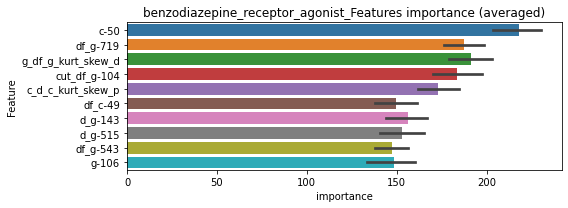

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00080884	valid_1's binary_logloss: 0.0265444


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00065057	valid_1's binary_logloss: 0.0199354


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000691475	valid_1's binary_logloss: 0.0110646


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000908613	valid_1's binary_logloss: 0.0201804


benzodiazepine_receptor_agonist logloss: 0.0194376172414678


neg labels: 3289 → selected neg labels: 3287


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00206876	valid_1's binary_logloss: 0.00414199
[600]	training's binary_logloss: 0.000462439	valid_1's binary_logloss: 0.00138345
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000431819	valid_1's binary_logloss: 0.00132016
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193261	valid_1's binary_logloss: 0.00810499
[600]	training's binary_logloss: 0.000455449	valid_1's binary_logloss: 0.00490565
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000431726	valid_1's binary_logloss: 0.00482063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00201786	valid_1's binary_logloss: 0.00394638
[600]	training's binary_logloss: 0.000458527	valid_1's binary_logloss: 0.00120254
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000437339	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0022778, Threshold: 0.0075872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00531, conf_1:0.00986
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0075872
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.0275872
threshold: 0.0275872, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192431	valid_1's binary_logloss: 0.00381666
[600]	training's binary_logloss: 0.000451213	valid_1's binary_logloss: 0.00132892
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000447168	valid_1's binary_logloss: 0.00131908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180606	valid_1's binary_logloss: 0.00775689
[600]	training's binary_logloss: 0.000442371	valid_1's binary_logloss: 0.00500901
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000450944	valid_1's binary_logloss: 0.00497919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188465	valid_1's binary_logloss: 0.00382652
[600]	training's binary_logloss: 0.000441881	valid_1's binary_logloss: 0.00127435
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000434808	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0237951, Threshold: 0.0275872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00101, Num_p_label: 16.0, conf_0:0.02207, conf_1:0.03310
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_1: 0.0275872
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_2: 0.0475872
threshold: 0.0475872, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192431	valid_1's binary_logloss: 0.00381666
[600]	training's binary_logloss: 0.000451213	valid_1's binary_logloss: 0.00132892
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000447168	valid_1's binary_logloss: 0.00131908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180606	valid_1's binary_logloss: 0.00775689
[600]	training's binary_logloss: 0.000442371	valid_1's binary_logloss: 0.00500901
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000450944	valid_1's binary_logloss: 0.00497919
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188465	valid_1's binary_logloss: 0.00382652
[600]	training's binary_logloss: 0.000441881	valid_1's binary_logloss: 0.00127435
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000434808	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0237951, Threshold: 0.0475872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.04283, conf_1:0.05235
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0475872
threshold: 0.0475872, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


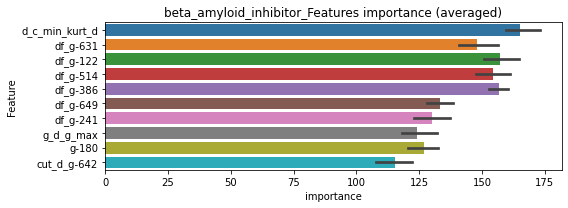

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000425593	valid_1's binary_logloss: 0.001321


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00043528	valid_1's binary_logloss: 0.00419952


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000435059	valid_1's binary_logloss: 0.00144163


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000440197	valid_1's binary_logloss: 0.00503494


beta_amyloid_inhibitor logloss: 0.0030019061850545307


neg labels: 3289 → selected neg labels: 3281


bromodomain_inhibitor, len(trt): 68, len(othr): 3281, target_rate: 0.0028555 → Adj_target_rate: 0.0030327
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00627072	valid_1's binary_logloss: 0.0566324
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00163937	valid_1's binary_logloss: 0.0458201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670192	valid_1's binary_logloss: 0.0379957
[600]	training's binary_logloss: 0.00112722	valid_1's binary_logloss: 0.0250728
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000792099	valid_1's binary_logloss: 0.02384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00758431	valid_1's binary_logloss: 0.0226596
[600]	training's binary_logloss: 0.00121147	valid_1's binary_logloss: 0.00926959
[900]	training's binary_logloss: 0.000706562	valid_1's binary_logloss: 0.00751992
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000710064	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0083219, Threshold: 0.0245721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00286, Num_p_label: 40.0, conf_0:0.01720, conf_1:0.03194
Num_p_label: 40.0, Expected: 11.4, Adj_threshold_1: 0.0245721
Num_p_label: 13.0, Expected: 11.4, Adj_threshold_2: 0.0445721
threshold: 0.0445721, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0060237	valid_1's binary_logloss: 0.0528197
[600]	training's binary_logloss: 0.00109087	valid_1's binary_logloss: 0.0399097
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00096397	valid_1's binary_logloss: 0.0390411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625799	valid_1's binary_logloss: 0.0345344
[600]	training's binary_logloss: 0.00110057	valid_1's binary_logloss: 0.0229297
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000774862	valid_1's binary_logloss: 0.021343
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00693858	valid_1's binary_logloss: 0.0218633
[600]	training's binary_logloss: 0.00116696	valid_1's binary_logloss: 0.0100844
[900]	training's binary_logloss: 0.00069561	valid_1's binary_logloss: 0.00834813
Early stopping, best iterat

2 / 3 AUC score:1.000
y_Threshold: 0.0556017, Threshold: 0.0445721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3799
p_label_rate: 0.0095429 Vs.target_rate: 0.00286, Num_p_label: 38.0, conf_0:0.03566, conf_1:0.05349
Num_p_label: 38.0, Expected: 11.4, Adj_threshold_1: 0.0445721
Num_p_label: 23.0, Expected: 11.4, Adj_threshold_2: 0.0645721
Num_p_label: 19.0, Expected: 11.4, Adj_threshold_3: 0.0845721
Num_p_label: 11.0, Expected: 11.4, Adj_threshold_4: 0.1045721
threshold: 0.1045721, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00610135	valid_1's binary_logloss: 0.0448022
[600]	training's binary_logloss: 0.00105937	valid_1's binary_logloss: 0.0329905
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000876125	valid_1's binary_logloss: 0.0319602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00621126	valid_1's binary_logloss: 0.0334769
[600]	training's binary_logloss: 0.00107419	valid_1's binary_logloss: 0.019451
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.00072681	valid_1's binary_logloss: 0.0176533
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660837	valid_1's binary_logloss: 0.0343051
[600]	training's binary_logloss: 0.00111272	valid_1's binary_logloss: 0.0226046
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000680809	valid_1's binary_logloss: 0

3 / 3 AUC score:1.000
y_Threshold: 0.0302917, Threshold: 0.1045721, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0032647 Vs.target_rate: 0.00286, Num_p_label: 13.0, conf_0:0.09411, conf_1:0.11503
threshold: 0.1045721, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


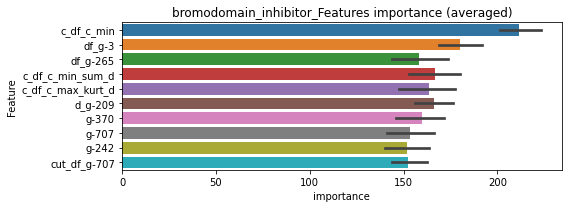

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000751849	valid_1's binary_logloss: 0.0214481


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000865141	valid_1's binary_logloss: 0.0248002


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000797826	valid_1's binary_logloss: 0.0146189


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000795437	valid_1's binary_logloss: 0.0162499


bromodomain_inhibitor logloss: 0.01928005823054477


neg labels: 3289 → selected neg labels: 3286


btk_inhibitor, len(trt): 29, len(othr): 3286, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262586	valid_1's binary_logloss: 0.00773985
[600]	training's binary_logloss: 0.000543208	valid_1's binary_logloss: 0.00334493
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000475536	valid_1's binary_logloss: 0.00317904
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253559	valid_1's binary_logloss: 0.0113963
[600]	training's binary_logloss: 0.000536498	valid_1's binary_logloss: 0.00640479
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000471683	valid_1's binary_logloss: 0.00620984
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270806	valid_1's binary_logloss: 0.0061156
[600]	training's binary_logloss: 0.000550459	valid_1's binary_logloss: 0.00185324
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00047607	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0031256, Threshold: 0.0123803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.00867, conf_1:0.01609
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0123803
Num_p_label: 12.0, Expected: 4.8, Adj_threshold_2: 0.0323803
threshold: 0.0323803, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237879	valid_1's binary_logloss: 0.00726369
[600]	training's binary_logloss: 0.000523077	valid_1's binary_logloss: 0.00335343
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000451281	valid_1's binary_logloss: 0.00312238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229018	valid_1's binary_logloss: 0.00989187
[600]	training's binary_logloss: 0.000513755	valid_1's binary_logloss: 0.00525495
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00046528	valid_1's binary_logloss: 0.0050715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244997	valid_1's binary_logloss: 0.00544667
[600]	training's binary_logloss: 0.000526038	valid_1's binary_logloss: 0.00170494
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000481034	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0848807, Threshold: 0.0323803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0067805 Vs.target_rate: 0.00122, Num_p_label: 27.0, conf_0:0.02590, conf_1:0.03886
Num_p_label: 27.0, Expected: 4.8, Adj_threshold_1: 0.0323803
Num_p_label: 16.0, Expected: 4.8, Adj_threshold_2: 0.0523803
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_3: 0.0723803
threshold: 0.0723803, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237879	valid_1's binary_logloss: 0.00726369
[600]	training's binary_logloss: 0.000523077	valid_1's binary_logloss: 0.00335343
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000451281	valid_1's binary_logloss: 0.00312238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00229018	valid_1's binary_logloss: 0.00989187
[600]	training's binary_logloss: 0.000513755	valid_1's binary_logloss: 0.00525495
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00046528	valid_1's binary_logloss: 0.0050715
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00244997	valid_1's binary_logloss: 0.00544667
[600]	training's binary_logloss: 0.000526038	valid_1's binary_logloss: 0.00170494
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000481034	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0848807, Threshold: 0.0723803, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00122, Num_p_label: 9.0, conf_0:0.06514, conf_1:0.07962
Num_p_label: 9.0, Expected: 4.8, Adj_threshold_1: 0.0723803
threshold: 0.0723803, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


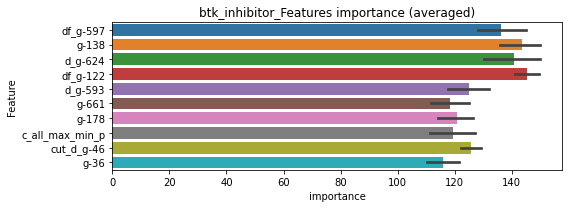

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000512739	valid_1's binary_logloss: 0.00345565


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00047481	valid_1's binary_logloss: 0.00517655


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000467532	valid_1's binary_logloss: 0.00167725


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000473623	valid_1's binary_logloss: 0.0027814


btk_inhibitor logloss: 0.003273537536929921


neg labels: 3289 → selected neg labels: 3288


calcineurin_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000728301	valid_1's binary_logloss: 0.00187294
[600]	training's binary_logloss: 0.00028172	valid_1's binary_logloss: 0.00106659
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00028172	valid_1's binary_logloss: 0.00106659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000710917	valid_1's binary_logloss: 0.002101
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000282768	valid_1's binary_logloss: 0.00128053
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000730954	valid_1's binary_logloss: 0.00107044
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000278699	valid_1's binary_logloss: 0.000431244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000726985	valid_1's binary_logloss: 0.0015918

1 / 3 AUC score:1.000
y_Threshold: 0.0012470, Threshold: 0.0195653, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000292757	valid_1's binary_logloss: 0.000774828


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01370, conf_1:0.02543
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0195653
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_2: 0.0395653
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.0595653
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_4: 0.0795653
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_5: 0.0995653
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1195653
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.1395653
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.1595653
threshold: 0.1595653, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000647351	valid_1's binary_logloss: 0.00188053
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000259275	valid_1's binary_logloss: 0.00111272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000649415	valid_1's binary_logloss: 0.00171733
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000264092	valid_1's binary_logloss: 0.00105847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066708	valid_1's binary_logloss: 0.000822609
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000258293	valid_1's binary_logloss: 0.000336861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661122	valid_1's binary_logloss: 0.00165984


2 / 3 AUC score:1.000
y_Threshold: 0.1261070, Threshold: 0.1595653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.12765, conf_1:0.19148
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.1595653
Num_p_label: 38.0, Expected: 2.0, Adj_threshold_2: 0.1795653
Num_p_label: 37.0, Expected: 2.0, Adj_threshold_3: 0.1995653
Num_p_label: 34.0, Expected: 2.0, Adj_threshold_4: 0.2195653
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_5: 0.2395653


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000260129	valid_1's binary_logloss: 0.000900382


Num_p_label: 30.0, Expected: 2.0, Adj_threshold_6: 0.2595653
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.2795653
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.2995653
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_9: 0.3195653
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_10: 0.3395653
threshold: 0.3595653, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000647351	valid_1's binary_logloss: 0.00188053
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000259275	valid_1's binary_logloss: 0.00111272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000649415	valid_1's binary_logloss: 0.00171733
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000264092	valid_1's binary_logloss: 0.00105847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00066708	valid_1's binary_logloss: 0.000822609
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000258293	valid_1's binary_logloss: 0.000336861
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661122	valid_1's binary_logloss: 0.00165984


3 / 3 AUC score:1.000
y_Threshold: 0.1261070, Threshold: 0.3595653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0052737 Vs.target_rate: 0.00050, Num_p_label: 21.0, conf_0:0.32361, conf_1:0.39552
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_1: 0.3595653
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3795653
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_3: 0.3995653
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_4: 0.4195653
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.4395653
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_6: 0.4595653


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000260129	valid_1's binary_logloss: 0.000900382


Num_p_label: 16.0, Expected: 2.0, Adj_threshold_7: 0.4795653
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_8: 0.4995653
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.5195653
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_10: 0.5395653
threshold: 0.5595653, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


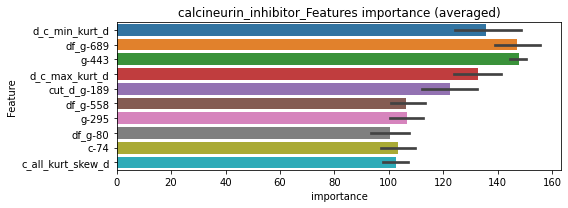

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000267616	valid_1's binary_logloss: 0.001176
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000255418	valid_1's binary_logloss: 0.000979239
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000266326	valid_1's binary_logloss: 0.000335302
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0007993036087809701


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000258496	valid_1's binary_logloss: 0.000706181
neg labels: 3289 → selected neg labels: 3246


calcium_channel_blocker, len(trt): 281, len(othr): 3246, target_rate: 0.0117998 → Adj_target_rate: 0.0101297
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0405919	valid_1's binary_logloss: 0.258458
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.0332168	valid_1's binary_logloss: 0.254786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0507022	valid_1's binary_logloss: 0.266612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0415835	valid_1's binary_logloss: 0.244051
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0352497	valid_1's binary_logloss: 0.242157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0410134	valid_1's binary_logloss: 0.225634
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.0166938	valid_1's binary_logloss: 0.215929


1 / 3 AUC score:0.899
y_Threshold: 0.0972842, Threshold: 0.2703027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 430 → Positive_corect_labels: 499/3465
p_label_rate: 0.0100452 Vs.target_rate: 0.01180, Num_p_label: 40.0, conf_0:0.18921, conf_1:0.35139
threshold: 0.2703027, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 499.0/3465, y_label_rate: 0.1440115
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173148	valid_1's binary_logloss: 0.166351
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00798431	valid_1's binary_logloss: 0.161582
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0183654	valid_1's binary_logloss: 0.125359
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00639841	valid_1's binary_logloss: 0.118423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170786	valid_1's binary_logloss: 0.136041
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00514392	valid_1's binary_logloss: 0.125779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174792	valid_1's binary_logloss: 0.139975


2 / 3 AUC score:0.980
y_Threshold: 0.0755633, Threshold: 0.2703027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 441.0/3349
p_label_rate: 0.0185836 Vs.target_rate: 0.01180, Num_p_label: 74.0, conf_0:0.21624, conf_1:0.32436
Num_p_label: 74.0, Expected: 47.0, Adj_threshold_1: 0.2703027


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00925824	valid_1's binary_logloss: 0.134651


Num_p_label: 70.0, Expected: 47.0, Adj_threshold_2: 0.2903027
threshold: 0.2903027, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 441.0/3349, y_label_rate: 0.1316811
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121779	valid_1's binary_logloss: 0.118474
[600]	training's binary_logloss: 0.00212345	valid_1's binary_logloss: 0.107187
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00223266	valid_1's binary_logloss: 0.106483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124288	valid_1's binary_logloss: 0.115078
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00346329	valid_1's binary_logloss: 0.107092
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124568	valid_1's binary_logloss: 0.0882843
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00254458	valid_1's binary_logloss: 0.0764121
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126381	valid_1's binary_logloss: 0.102966
[600]	training's bina

3 / 3 AUC score:0.994
y_Threshold: 0.0648038, Threshold: 0.2903027, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 406.0/3279
p_label_rate: 0.0220994 Vs.target_rate: 0.01180, Num_p_label: 88.0, conf_0:0.26127, conf_1:0.31933
Num_p_label: 88.0, Expected: 47.0, Adj_threshold_1: 0.2903027
Num_p_label: 83.0, Expected: 47.0, Adj_threshold_2: 0.3103027
Num_p_label: 74.0, Expected: 47.0, Adj_threshold_3: 0.3303027
Num_p_label: 70.0, Expected: 47.0, Adj_threshold_4: 0.3503027
threshold: 0.3503027, positive_p_label: 70.0/3982, p_label_rate: 0.0175791
positive_y_label: 406.0/3279, y_label_rate: 0.1238182


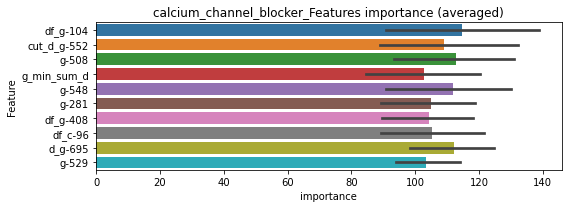

len(train_index) : 2459
len(valid_index) : 820
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.00117522	valid_1's binary_logloss: 0.0618218


len(train_index) : 2459
len(valid_index) : 820
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00181172	valid_1's binary_logloss: 0.0757635


len(train_index) : 2459
len(valid_index) : 820
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00233508	valid_1's binary_logloss: 0.0877819


len(train_index) : 2460
len(valid_index) : 819
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00176866	valid_1's binary_logloss: 0.061974


calcium_channel_blocker logloss: 0.07183830214676443


neg labels: 3289 → selected neg labels: 3281


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336782	valid_1's binary_logloss: 0.0273959
[600]	training's binary_logloss: 0.000665214	valid_1's binary_logloss: 0.018889
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000546931	valid_1's binary_logloss: 0.0185366
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00358939	valid_1's binary_logloss: 0.0139196
[600]	training's binary_logloss: 0.000695057	valid_1's binary_logloss: 0.00857544
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000645767	valid_1's binary_logloss: 0.00851228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00372334	valid_1's binary_logloss: 0.00960086
[600]	training's binary_logloss: 0.000713587	valid_1's binary_logloss: 0.00413994
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000602325	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0048892, Threshold: 0.0254086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.01779, conf_1:0.03303
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0254086
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_2: 0.0454086
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_3: 0.0654086
threshold: 0.0654086, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00309877	valid_1's binary_logloss: 0.0247382
[600]	training's binary_logloss: 0.000639788	valid_1's binary_logloss: 0.0171137
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000551157	valid_1's binary_logloss: 0.01682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00327331	valid_1's binary_logloss: 0.0121926
[600]	training's binary_logloss: 0.000668619	valid_1's binary_logloss: 0.00673004
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000601026	valid_1's binary_logloss: 0.00659998
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346507	valid_1's binary_logloss: 0.00826456
[600]	training's binary_logloss: 0.000689281	valid_1's binary_logloss: 0.00399041
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000563908	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0315050, Threshold: 0.0654086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0090407 Vs.target_rate: 0.00176, Num_p_label: 36.0, conf_0:0.05233, conf_1:0.07849
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_1: 0.0654086
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_2: 0.0854086
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_3: 0.1054086
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_4: 0.1254086
threshold: 0.1254086, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307491	valid_1's binary_logloss: 0.0197112
[600]	training's binary_logloss: 0.000635087	valid_1's binary_logloss: 0.0131921
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000577577	valid_1's binary_logloss: 0.0129542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324504	valid_1's binary_logloss: 0.00902648
[600]	training's binary_logloss: 0.000649859	valid_1's binary_logloss: 0.00313339
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000537208	valid_1's binary_logloss: 0.00287801
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328695	valid_1's binary_logloss: 0.0113765
[600]	training's binary_logloss: 0.000657945	valid_1's binary_logloss: 0.00614811
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000591831	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0468821, Threshold: 0.1254086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00176, Num_p_label: 15.0, conf_0:0.11287, conf_1:0.13795
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_1: 0.1254086
threshold: 0.1254086, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


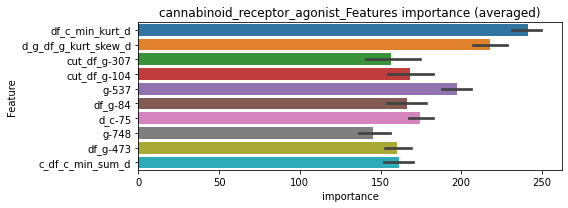

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000582126	valid_1's binary_logloss: 0.0142787


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000555142	valid_1's binary_logloss: 0.00258797


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000536381	valid_1's binary_logloss: 0.00614563


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000526223	valid_1's binary_logloss: 0.00716095


cannabinoid_receptor_agonist logloss: 0.007548473115348972


neg labels: 3289 → selected neg labels: 3280


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3280, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00425999	valid_1's binary_logloss: 0.0358483
[600]	training's binary_logloss: 0.000826816	valid_1's binary_logloss: 0.0300613
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000897339	valid_1's binary_logloss: 0.0299073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448519	valid_1's binary_logloss: 0.0318066
[600]	training's binary_logloss: 0.000854601	valid_1's binary_logloss: 0.0232561
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000706321	valid_1's binary_logloss: 0.0225311
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00489077	valid_1's binary_logloss: 0.0158534
[600]	training's binary_logloss: 0.000902995	valid_1's binary_logloss: 0.00966733
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000667472	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0057567, Threshold: 0.0211976, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.01484, conf_1:0.02756
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0211976
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_2: 0.0411976
threshold: 0.0411976, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418267	valid_1's binary_logloss: 0.0270145
[600]	training's binary_logloss: 0.000824409	valid_1's binary_logloss: 0.0189528
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000648096	valid_1's binary_logloss: 0.0182803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00444709	valid_1's binary_logloss: 0.0165578
[600]	training's binary_logloss: 0.000857873	valid_1's binary_logloss: 0.00890838
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000627188	valid_1's binary_logloss: 0.00823212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428776	valid_1's binary_logloss: 0.0242813
[600]	training's binary_logloss: 0.000830178	valid_1's binary_logloss: 0.018186
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000696624	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0230507, Threshold: 0.0411976, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0077850 Vs.target_rate: 0.00231, Num_p_label: 31.0, conf_0:0.03296, conf_1:0.04944
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_1: 0.0411976
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_2: 0.0611976
threshold: 0.0611976, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408113	valid_1's binary_logloss: 0.0298135
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00112302	valid_1's binary_logloss: 0.0232182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407352	valid_1's binary_logloss: 0.0206252
[600]	training's binary_logloss: 0.000811014	valid_1's binary_logloss: 0.0121821
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000729604	valid_1's binary_logloss: 0.0119975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00398153	valid_1's binary_logloss: 0.0190222
[600]	training's binary_logloss: 0.000812213	valid_1's binary_logloss: 0.0112344
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000622792	valid_1's binary_logloss: 0.0102004
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0339303, Threshold: 0.0611976, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0042692 Vs.target_rate: 0.00231, Num_p_label: 17.0, conf_0:0.05508, conf_1:0.06732
Num_p_label: 17.0, Expected: 9.2, Adj_threshold_1: 0.0611976
threshold: 0.0611976, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


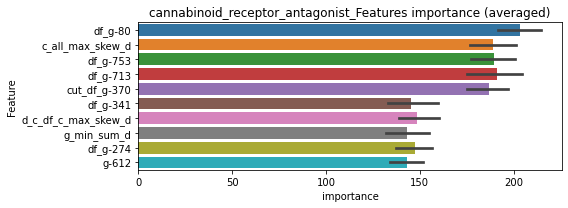

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00107254	valid_1's binary_logloss: 0.0183783


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000892897	valid_1's binary_logloss: 0.0228076


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000602514	valid_1's binary_logloss: 0.00399261


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000614851	valid_1's binary_logloss: 0.0165397


cannabinoid_receptor_antagonist logloss: 0.015436502113250865


neg labels: 3289 → selected neg labels: 3281


carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417764	valid_1's binary_logloss: 0.0156236
[600]	training's binary_logloss: 0.000708573	valid_1's binary_logloss: 0.00576443
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000544761	valid_1's binary_logloss: 0.00511126
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00418103	valid_1's binary_logloss: 0.0126181
[600]	training's binary_logloss: 0.00070234	valid_1's binary_logloss: 0.00521913
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000551467	valid_1's binary_logloss: 0.00486557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00406596	valid_1's binary_logloss: 0.00916338
[600]	training's binary_logloss: 0.000708773	valid_1's binary_logloss: 0.00283337
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000558525	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0047914, Threshold: 0.0732468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.05127, conf_1:0.09522
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0732468
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_2: 0.0932468
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_3: 0.1132468
Num_p_label: 27.0, Expected: 6.0, Adj_threshold_4: 0.1332468
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_5: 0.1532468
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_6: 0.1732468
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_7: 0.1932468
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_8: 0.2132468
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_9: 0.2332468
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_10: 0.2532468
threshold: 0.2532468, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363811	valid_1's binary_logloss: 0.0150098
[600]	training's binary_logloss: 0.000661243	valid_1's binary_logloss: 0.00667994
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00054384	valid_1's binary_logloss: 0.00612348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363913	valid_1's binary_logloss: 0.0106906
[600]	training's binary_logloss: 0.000662395	valid_1's binary_logloss: 0.00468889
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00054656	valid_1's binary_logloss: 0.00436825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003599	valid_1's binary_logloss: 0.00747253
[600]	training's binary_logloss: 0.000667665	valid_1's binary_logloss: 0.00239901
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000547119	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0397898, Threshold: 0.2532468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0090407 Vs.target_rate: 0.00151, Num_p_label: 36.0, conf_0:0.20260, conf_1:0.30390
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_1: 0.2532468
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_2: 0.2732468
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_3: 0.2932468
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_4: 0.3132468
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_5: 0.3332468
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_6: 0.3532468
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_7: 0.3732468
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_8: 0.3932468
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_9: 0.4132468
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_10: 0.4332468
threshold: 0.4532468, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363811	valid_1's binary_logloss: 0.0150098
[600]	training's binary_logloss: 0.000661243	valid_1's binary_logloss: 0.00667994
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00054384	valid_1's binary_logloss: 0.00612348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363913	valid_1's binary_logloss: 0.0106906
[600]	training's binary_logloss: 0.000662395	valid_1's binary_logloss: 0.00468889
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00054656	valid_1's binary_logloss: 0.00436825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003599	valid_1's binary_logloss: 0.00747253
[600]	training's binary_logloss: 0.000667665	valid_1's binary_logloss: 0.00239901
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000547119	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0397898, Threshold: 0.4532468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0040181 Vs.target_rate: 0.00151, Num_p_label: 16.0, conf_0:0.40792, conf_1:0.49857
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.4532468
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.4732468
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.4932468
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.5132468
threshold: 0.5132468, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


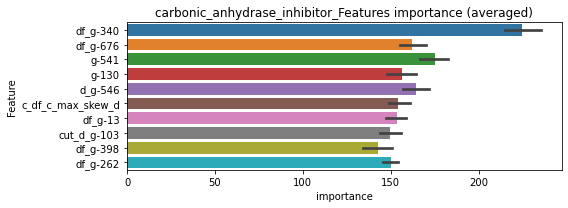

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000542068	valid_1's binary_logloss: 0.0060732


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000544296	valid_1's binary_logloss: 0.00398878


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000547168	valid_1's binary_logloss: 0.00199538


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000544815	valid_1's binary_logloss: 0.0106234


carbonic_anhydrase_inhibitor logloss: 0.005677117878293382


neg labels: 3289 → selected neg labels: 3283


casein_kinase_inhibitor, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275509	valid_1's binary_logloss: 0.0132062
[600]	training's binary_logloss: 0.000564407	valid_1's binary_logloss: 0.00728595
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000473847	valid_1's binary_logloss: 0.00700646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00288993	valid_1's binary_logloss: 0.00744383
[600]	training's binary_logloss: 0.000578853	valid_1's binary_logloss: 0.00247513
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00048735	valid_1's binary_logloss: 0.00223003
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029196	valid_1's binary_logloss: 0.00533639
[600]	training's binary_logloss: 0.000590615	valid_1's binary_logloss: 0.00168365
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000481076	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0041612, Threshold: 0.0103157, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00722, conf_1:0.01341
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0103157
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0303157
threshold: 0.0303157, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257444	valid_1's binary_logloss: 0.0144456
[600]	training's binary_logloss: 0.00053649	valid_1's binary_logloss: 0.0088767
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000563248	valid_1's binary_logloss: 0.00883757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268098	valid_1's binary_logloss: 0.00759794
[600]	training's binary_logloss: 0.000551981	valid_1's binary_logloss: 0.0028149
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000469852	valid_1's binary_logloss: 0.00257186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268075	valid_1's binary_logloss: 0.00437247
[600]	training's binary_logloss: 0.000564969	valid_1's binary_logloss: 0.00115862
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000473078	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0367575, Threshold: 0.0303157, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0060271 Vs.target_rate: 0.00151, Num_p_label: 24.0, conf_0:0.02425, conf_1:0.03638
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.0303157
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0503157
threshold: 0.0503157, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257444	valid_1's binary_logloss: 0.0144456
[600]	training's binary_logloss: 0.00053649	valid_1's binary_logloss: 0.0088767
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000563248	valid_1's binary_logloss: 0.00883757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268098	valid_1's binary_logloss: 0.00759794
[600]	training's binary_logloss: 0.000551981	valid_1's binary_logloss: 0.0028149
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000469852	valid_1's binary_logloss: 0.00257186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268075	valid_1's binary_logloss: 0.00437247
[600]	training's binary_logloss: 0.000564969	valid_1's binary_logloss: 0.00115862
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000473078	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0367575, Threshold: 0.0503157, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00151, Num_p_label: 12.0, conf_0:0.04528, conf_1:0.05535
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0503157
threshold: 0.0503157, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


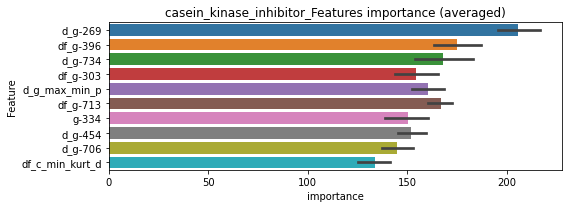

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049664	valid_1's binary_logloss: 0.00768778


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000490688	valid_1's binary_logloss: 0.00259632


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.00048975	valid_1's binary_logloss: 0.00111244


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000484851	valid_1's binary_logloss: 0.0111681


casein_kinase_inhibitor logloss: 0.005644044670581132


neg labels: 3289 → selected neg labels: 3288


caspase_activator, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106759	valid_1's binary_logloss: 0.00240854
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000353049	valid_1's binary_logloss: 0.00124649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108524	valid_1's binary_logloss: 0.00343906
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000354661	valid_1's binary_logloss: 0.00175035
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109578	valid_1's binary_logloss: 0.00218615
[600]	training's binary_logloss: 0.000349709	valid_1's binary_logloss: 0.000981257
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000349709	valid_1's binary_logloss: 0.000981257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108363	valid_1's binary_logloss: 0.002489

1 / 3 AUC score:1.000
y_Threshold: 0.0016302, Threshold: 0.0123023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00861, conf_1:0.01599
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0123023
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.0323023
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0523023
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.0723023
threshold: 0.0723023, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000973534	valid_1's binary_logloss: 0.00204673
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000333679	valid_1's binary_logloss: 0.00105575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100521	valid_1's binary_logloss: 0.00254324
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000330933	valid_1's binary_logloss: 0.00122607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100068	valid_1's binary_logloss: 0.0017153
[600]	training's binary_logloss: 0.000329549	valid_1's binary_logloss: 0.000692757
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000329067	valid_1's binary_logloss: 0.000692364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098084	valid_1's binary_logloss: 0.001855

2 / 3 AUC score:1.000
y_Threshold: 0.1233192, Threshold: 0.0723023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076, Num_p_label: 29.0, conf_0:0.05784, conf_1:0.08676
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.0723023
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0923023
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_3: 0.1123023


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000340125	valid_1's binary_logloss: 0.000816226


Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.1323023
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.1523023
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.1723023
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_7: 0.1923023
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_8: 0.2123023
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.2323023
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.2523023
threshold: 0.2723023, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000973534	valid_1's binary_logloss: 0.00204673
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000333679	valid_1's binary_logloss: 0.00105575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100521	valid_1's binary_logloss: 0.00254324
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000330933	valid_1's binary_logloss: 0.00122607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100068	valid_1's binary_logloss: 0.0017153
[600]	training's binary_logloss: 0.000329549	valid_1's binary_logloss: 0.000692757
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000329067	valid_1's binary_logloss: 0.000692364
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00098084	valid_1's binary_logloss: 0.001855

3 / 3 AUC score:1.000
y_Threshold: 0.1233192, Threshold: 0.2723023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076, Num_p_label: 8.0, conf_0:0.24507, conf_1:0.29953
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.2723023
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.2923023


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000340125	valid_1's binary_logloss: 0.000816226


threshold: 0.2923023, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


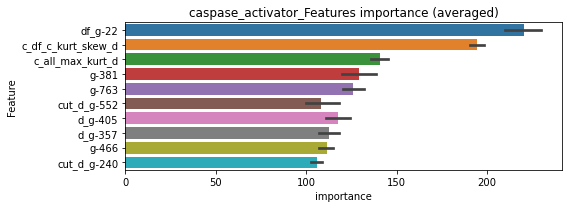

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000341148	valid_1's binary_logloss: 0.00146195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000333803	valid_1's binary_logloss: 0.0013541


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000348302	valid_1's binary_logloss: 0.000772456
Training until validation scores don't improve for 30 rounds


caspase_activator logloss: 0.0011281419912883065


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000338338	valid_1's binary_logloss: 0.000923435
neg labels: 3289 → selected neg labels: 3286


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3286, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012424	valid_1's binary_logloss: 0.00266542
[600]	training's binary_logloss: 0.000364152	valid_1's binary_logloss: 0.00126193
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000363379	valid_1's binary_logloss: 0.00126023
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127063	valid_1's binary_logloss: 0.005014
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000377439	valid_1's binary_logloss: 0.00263955
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125583	valid_1's binary_logloss: 0.00242313
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000379209	valid_1's binary_logloss: 0.00111022
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00128822	valid_1's binary_logloss: 0.00373296


1 / 3 AUC score:1.000
y_Threshold: 0.0018763, Threshold: 0.0082324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00576, conf_1:0.01070
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0082324


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00038094	valid_1's binary_logloss: 0.0016707


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_2: 0.0282324
threshold: 0.0282324, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121864	valid_1's binary_logloss: 0.0019081
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000365287	valid_1's binary_logloss: 0.000704281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117869	valid_1's binary_logloss: 0.00479645
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000360788	valid_1's binary_logloss: 0.00274567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120061	valid_1's binary_logloss: 0.00201042
[600]	training's binary_logloss: 0.000350227	valid_1's binary_logloss: 0.000751145
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000348835	valid_1's binary_logloss: 0.0007481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118383	valid_1's binary_logloss: 0.00342079

2 / 3 AUC score:1.000
y_Threshold: 0.0826193, Threshold: 0.0282324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0067805 Vs.target_rate: 0.00076, Num_p_label: 27.0, conf_0:0.02259, conf_1:0.03388
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_1: 0.0282324
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0482324
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_3: 0.0682324


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000362677	valid_1's binary_logloss: 0.00165047


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.0882324
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.1082324
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_6: 0.1282324
threshold: 0.1282324, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121864	valid_1's binary_logloss: 0.0019081
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000365287	valid_1's binary_logloss: 0.000704281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117869	valid_1's binary_logloss: 0.00479645
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000360788	valid_1's binary_logloss: 0.00274567
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120061	valid_1's binary_logloss: 0.00201042
[600]	training's binary_logloss: 0.000350227	valid_1's binary_logloss: 0.000751145
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000348835	valid_1's binary_logloss: 0.0007481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00118383	valid_1's binary_logloss: 0.00342079

3 / 3 AUC score:1.000
y_Threshold: 0.0826193, Threshold: 0.1282324, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00076, Num_p_label: 3.0, conf_0:0.11541, conf_1:0.14106


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000362677	valid_1's binary_logloss: 0.00165047


threshold: 0.1282324, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


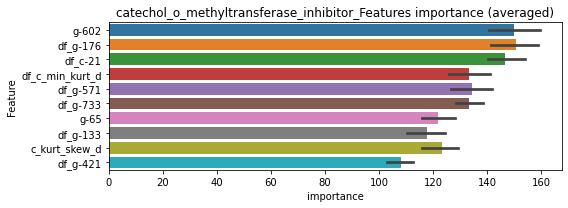

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000366887	valid_1's binary_logloss: 0.000776257
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000365263	valid_1's binary_logloss: 0.00218103
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000360903	valid_1's binary_logloss: 0.000771769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000366698	valid_1's binary_logloss: 0.00186153


catechol_o_methyltransferase_inhibitor logloss: 0.0013978542005508273


neg labels: 3289 → selected neg labels: 3276


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3276, target_rate: 0.0042832 → Adj_target_rate: 0.0042806
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102458	valid_1's binary_logloss: 0.0866598
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00310868	valid_1's binary_logloss: 0.0786281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113337	valid_1's binary_logloss: 0.0670718
[600]	training's binary_logloss: 0.00179457	valid_1's binary_logloss: 0.0508126
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00124808	valid_1's binary_logloss: 0.0490166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110431	valid_1's binary_logloss: 0.0537002
[600]	training's binary_logloss: 0.00181747	valid_1's binary_logloss: 0.0358638
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.00111811	valid_1's binary_logloss: 0.0339478
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.996
y_Threshold: 0.0151869, Threshold: 0.0508936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3787
p_label_rate: 0.0100452 Vs.target_rate: 0.00428, Num_p_label: 40.0, conf_0:0.03563, conf_1:0.06616
Num_p_label: 40.0, Expected: 17.1, Adj_threshold_1: 0.0508936
Num_p_label: 21.0, Expected: 17.1, Adj_threshold_2: 0.0708936
threshold: 0.0708936, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931612	valid_1's binary_logloss: 0.0730331
[600]	training's binary_logloss: 0.0015857	valid_1's binary_logloss: 0.0573609
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00110625	valid_1's binary_logloss: 0.0567909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00975807	valid_1's binary_logloss: 0.0484677
[600]	training's binary_logloss: 0.00163783	valid_1's binary_logloss: 0.030729
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.00102291	valid_1's binary_logloss: 0.0283169
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00916633	valid_1's binary_logloss: 0.0676981
[600]	training's binary_logloss: 0.00158831	valid_1's binary_logloss: 0.0523664
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00119671	valid_1's binary_logloss: 0.05

2 / 3 AUC score:1.000
y_Threshold: 0.0347786, Threshold: 0.0708936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0107986 Vs.target_rate: 0.00428, Num_p_label: 43.0, conf_0:0.05671, conf_1:0.08507
Num_p_label: 43.0, Expected: 17.1, Adj_threshold_1: 0.0708936
Num_p_label: 27.0, Expected: 17.1, Adj_threshold_2: 0.0908936
Num_p_label: 20.0, Expected: 17.1, Adj_threshold_3: 0.1108936
threshold: 0.1108936, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 641.0/3771, y_label_rate: 0.1699814
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00906142	valid_1's binary_logloss: 0.0735013
[600]	training's binary_logloss: 0.00154675	valid_1's binary_logloss: 0.0594465
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00132808	valid_1's binary_logloss: 0.0588093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00876501	valid_1's binary_logloss: 0.0654312
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00191707	valid_1's binary_logloss: 0.0565096
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00877962	valid_1's binary_logloss: 0.0517423
[600]	training's binary_logloss: 0.00151996	valid_1's binary_logloss: 0.0383774
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00164307	valid_1's binary_logloss: 0.0380686
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.998
y_Threshold: 0.0373243, Threshold: 0.1108936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 631.0/3751
p_label_rate: 0.0050226 Vs.target_rate: 0.00428, Num_p_label: 20.0, conf_0:0.09980, conf_1:0.12198
threshold: 0.1108936, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 631.0/3751, y_label_rate: 0.1682218


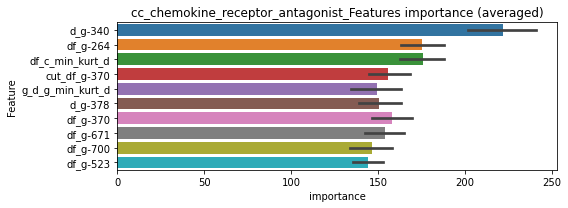

len(train_index) : 2813
len(valid_index) : 938
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000867052	valid_1's binary_logloss: 0.0259478


len(train_index) : 2813
len(valid_index) : 938
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00109788	valid_1's binary_logloss: 0.0424731


len(train_index) : 2813
len(valid_index) : 938
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000999913	valid_1's binary_logloss: 0.0314722


len(train_index) : 2814
len(valid_index) : 937
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00219965	valid_1's binary_logloss: 0.0591132


cc_chemokine_receptor_antagonist logloss: 0.03974641943738305


neg labels: 3289 → selected neg labels: 3288


cck_receptor_antagonist, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139267	valid_1's binary_logloss: 0.00331293
[600]	training's binary_logloss: 0.000373575	valid_1's binary_logloss: 0.00134528
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000370279	valid_1's binary_logloss: 0.00133576
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00136059	valid_1's binary_logloss: 0.00446059
[600]	training's binary_logloss: 0.000374462	valid_1's binary_logloss: 0.00207626
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000374462	valid_1's binary_logloss: 0.00207626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138137	valid_1's binary_logloss: 0.00208909
[600]	training's binary_logloss: 0.000375514	valid_1's binary_logloss: 0.000690939
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000374664	valid_1's bin

1 / 3 AUC score:1.000
y_Threshold: 0.0017329, Threshold: 0.0045812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00321, conf_1:0.00596
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0045812
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_2: 0.0245812
threshold: 0.0245812, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131162	valid_1's binary_logloss: 0.00313486
[600]	training's binary_logloss: 0.000366509	valid_1's binary_logloss: 0.00131987
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000356825	valid_1's binary_logloss: 0.00129495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127546	valid_1's binary_logloss: 0.00515908
[600]	training's binary_logloss: 0.000354338	valid_1's binary_logloss: 0.00275914
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035243	valid_1's binary_logloss: 0.00274667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131059	valid_1's binary_logloss: 0.00204111
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000378264	valid_1's binary_logloss: 0.000704612
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0593476, Threshold: 0.0245812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076, Num_p_label: 4.0, conf_0:0.01966, conf_1:0.02950
threshold: 0.0245812, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131162	valid_1's binary_logloss: 0.00313486
[600]	training's binary_logloss: 0.000366509	valid_1's binary_logloss: 0.00131987
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000356825	valid_1's binary_logloss: 0.00129495
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00127546	valid_1's binary_logloss: 0.00515908
[600]	training's binary_logloss: 0.000354338	valid_1's binary_logloss: 0.00275914
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00035243	valid_1's binary_logloss: 0.00274667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131059	valid_1's binary_logloss: 0.00204111
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000378264	valid_1's binary_logloss: 0.000704612
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0593476, Threshold: 0.0245812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076, Num_p_label: 4.0, conf_0:0.02212, conf_1:0.02704
threshold: 0.0245812, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


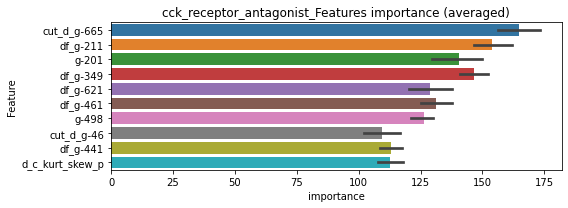

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000365701	valid_1's binary_logloss: 0.00119003
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000359689	valid_1's binary_logloss: 0.00280222
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000364506	valid_1's binary_logloss: 0.000647046
Training until validation scores don't improve for 30 rounds


cck_receptor_antagonist logloss: 0.0013541830404657704


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000359017	valid_1's binary_logloss: 0.000777442
neg labels: 3289 → selected neg labels: 3241


cdk_inhibitor, len(trt): 352, len(othr): 3241, target_rate: 0.0147812 → Adj_target_rate: 0.0122676
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.06177	valid_1's binary_logloss: 0.31246
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.0528552	valid_1's binary_logloss: 0.310247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0608367	valid_1's binary_logloss: 0.32601
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.051653	valid_1's binary_logloss: 0.323847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0588718	valid_1's binary_logloss: 0.33415
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0674844	valid_1's binary_logloss: 0.333404
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.823
y_Threshold: 0.1227735, Threshold: 0.3982427, pos_neg_ratio: 0.8000000
Remove_noisy_data: 578 → Positive_corect_labels: 424/3311
p_label_rate: 0.0100452 Vs.target_rate: 0.01478, Num_p_label: 40.0, conf_0:0.27877, conf_1:0.51772
threshold: 0.3982427, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.0713031	valid_1's binary_logloss: 0.33063


positive_y_label: 424.0/3311, y_label_rate: 0.1280580
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0231632	valid_1's binary_logloss: 0.184717
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0103447	valid_1's binary_logloss: 0.180807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230246	valid_1's binary_logloss: 0.160506
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00938527	valid_1's binary_logloss: 0.151969
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0227427	valid_1's binary_logloss: 0.164591
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00977542	valid_1's binary_logloss: 0.154718
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214579	valid_1's binary_logloss: 0.188453


2 / 3 AUC score:0.959
y_Threshold: 0.0887196, Threshold: 0.3982427, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 344.0/3151
p_label_rate: 0.0328980 Vs.target_rate: 0.01478, Num_p_label: 131.0, conf_0:0.31859, conf_1:0.47789
Num_p_label: 131.0, Expected: 58.9, Adj_threshold_1: 0.3982427
Num_p_label: 126.0, Expected: 58.9, Adj_threshold_2: 0.4182427
Num_p_label: 123.0, Expected: 58.9, Adj_threshold_3: 0.4382427
Num_p_label: 119.0, Expected: 58.9, Adj_threshold_4: 0.4582427
Num_p_label: 117.0, Expected: 58.9, Adj_threshold_5: 0.4782427
Num_p_label: 115.0, Expected: 58.9, Adj_threshold_6: 0.4982427
Num_p_label: 113.0, Expected: 58.9, Adj_threshold_7: 0.5182427
Num_p_label: 111.0, Expected: 58.9, Adj_threshold_8: 0.5382427


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.01845	valid_1's binary_logloss: 0.186685


Num_p_label: 109.0, Expected: 58.9, Adj_threshold_9: 0.5582427
Num_p_label: 105.0, Expected: 58.9, Adj_threshold_10: 0.5782427
threshold: 0.5982427, positive_p_label: 98.0/3982, p_label_rate: 0.0246107
positive_y_label: 344.0/3151, y_label_rate: 0.1091717
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143021	valid_1's binary_logloss: 0.128567
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00543195	valid_1's binary_logloss: 0.121496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139971	valid_1's binary_logloss: 0.10789
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00258464	valid_1's binary_logloss: 0.0889605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123989	valid_1's binary_logloss: 0.159244
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00838105	valid_1's binary_logloss: 0.156212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131823	valid_1's binary_logloss: 0.114392


3 / 3 AUC score:0.982
y_Threshold: 0.0640993, Threshold: 0.5982427, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 308.0/3079
p_label_rate: 0.0328980 Vs.target_rate: 0.01478, Num_p_label: 131.0, conf_0:0.50000, conf_1:0.65807
Num_p_label: 131.0, Expected: 58.9, Adj_threshold_1: 0.5982427
Num_p_label: 128.0, Expected: 58.9, Adj_threshold_2: 0.6182427
Num_p_label: 128.0, Expected: 58.9, Adj_threshold_3: 0.6382427
Num_p_label: 125.0, Expected: 58.9, Adj_threshold_4: 0.6582427
Num_p_label: 122.0, Expected: 58.9, Adj_threshold_5: 0.6782427
Num_p_label: 120.0, Expected: 58.9, Adj_threshold_6: 0.6982427


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00742457	valid_1's binary_logloss: 0.108033


Num_p_label: 116.0, Expected: 58.9, Adj_threshold_7: 0.7182427
Num_p_label: 114.0, Expected: 58.9, Adj_threshold_8: 0.7382427
Num_p_label: 111.0, Expected: 58.9, Adj_threshold_9: 0.7582427
Num_p_label: 107.0, Expected: 58.9, Adj_threshold_10: 0.7782427
threshold: 0.7982427, positive_p_label: 102.0/3982, p_label_rate: 0.0256153
positive_y_label: 308.0/3079, y_label_rate: 0.1000325


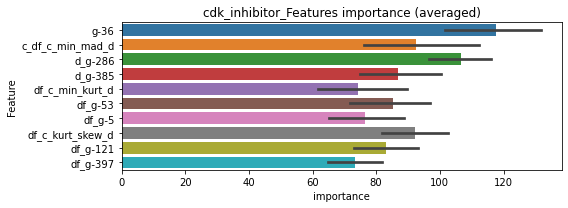

len(train_index) : 2309
len(valid_index) : 770
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2309
len(valid_index) : 770
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00453794	valid_1's binary_logloss: 0.112707
Training until validation scores don't improve for 30 rounds


len(train_index) : 2309
len(valid_index) : 770
================================= fold 3/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00371977	valid_1's binary_logloss: 0.103308
Training until validation scores don't improve for 30 rounds


len(train_index) : 2310
len(valid_index) : 769
================================= fold 4/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00328555	valid_1's binary_logloss: 0.103876
Training until validation scores don't improve for 30 rounds


cdk_inhibitor logloss: 0.10701282464918467


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.0033654	valid_1's binary_logloss: 0.108163
neg labels: 3289 → selected neg labels: 3282


chelating_agent, len(trt): 54, len(othr): 3282, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041883	valid_1's binary_logloss: 0.0357782
[600]	training's binary_logloss: 0.000823234	valid_1's binary_logloss: 0.0270865
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000759111	valid_1's binary_logloss: 0.0269723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461178	valid_1's binary_logloss: 0.024147
[600]	training's binary_logloss: 0.000857254	valid_1's binary_logloss: 0.015322
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000623888	valid_1's binary_logloss: 0.0143724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00478702	valid_1's binary_logloss: 0.0121057
[600]	training's binary_logloss: 0.000890799	valid_1's binary_logloss: 0.00567897
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000703853	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0057417, Threshold: 0.0270618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.01894, conf_1:0.03518
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0270618
Num_p_label: 30.0, Expected: 9.0, Adj_threshold_2: 0.0470618
Num_p_label: 26.0, Expected: 9.0, Adj_threshold_3: 0.0670618
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_4: 0.0870618
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_5: 0.1070618
threshold: 0.1070618, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391271	valid_1's binary_logloss: 0.0341269
[600]	training's binary_logloss: 0.000791551	valid_1's binary_logloss: 0.0260969
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000728021	valid_1's binary_logloss: 0.0257928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00439093	valid_1's binary_logloss: 0.0204792
[600]	training's binary_logloss: 0.000838533	valid_1's binary_logloss: 0.0127447
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000614509	valid_1's binary_logloss: 0.0118335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00437875	valid_1's binary_logloss: 0.0113876
[600]	training's binary_logloss: 0.000852708	valid_1's binary_logloss: 0.00512849
[900]	training's binary_logloss: 0.000587458	valid_1's binary_logloss: 0.00465381
Early stopping, bes

2 / 3 AUC score:1.000
y_Threshold: 0.0287076, Threshold: 0.1070618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0085384 Vs.target_rate: 0.00227, Num_p_label: 34.0, conf_0:0.08565, conf_1:0.12847
Num_p_label: 34.0, Expected: 9.0, Adj_threshold_1: 0.1070618
Num_p_label: 30.0, Expected: 9.0, Adj_threshold_2: 0.1270618
Num_p_label: 28.0, Expected: 9.0, Adj_threshold_3: 0.1470618
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_4: 0.1670618
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_5: 0.1870618
Num_p_label: 22.0, Expected: 9.0, Adj_threshold_6: 0.2070618
threshold: 0.2070618, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00409467	valid_1's binary_logloss: 0.0244409
[600]	training's binary_logloss: 0.000789634	valid_1's binary_logloss: 0.0155082
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000642243	valid_1's binary_logloss: 0.0149991
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00414703	valid_1's binary_logloss: 0.026962
[600]	training's binary_logloss: 0.000810449	valid_1's binary_logloss: 0.0178678
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000630734	valid_1's binary_logloss: 0.017021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00420334	valid_1's binary_logloss: 0.0261535
[600]	training's binary_logloss: 0.000815647	valid_1's binary_logloss: 0.0181332
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000670105	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0251692, Threshold: 0.2070618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0052737 Vs.target_rate: 0.00227, Num_p_label: 21.0, conf_0:0.18636, conf_1:0.22777
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_1: 0.2070618
threshold: 0.2070618, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


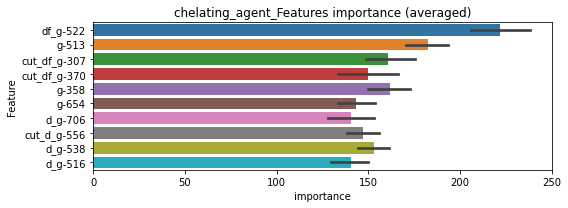

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000654075	valid_1's binary_logloss: 0.0128408


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000635956	valid_1's binary_logloss: 0.0174724


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00058195	valid_1's binary_logloss: 0.00937686


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000669682	valid_1's binary_logloss: 0.021006


chelating_agent logloss: 0.015174744966732311


neg labels: 3289 → selected neg labels: 3285


chk_inhibitor, len(trt): 24, len(othr): 3285, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167011	valid_1's binary_logloss: 0.00360061
[600]	training's binary_logloss: 0.000431208	valid_1's binary_logloss: 0.00134242
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000427992	valid_1's binary_logloss: 0.00133246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167143	valid_1's binary_logloss: 0.00378887
[600]	training's binary_logloss: 0.000434194	valid_1's binary_logloss: 0.00137673
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000427342	valid_1's binary_logloss: 0.00136426
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166143	valid_1's binary_logloss: 0.00424152
[600]	training's binary_logloss: 0.000434491	valid_1's binary_logloss: 0.0015273
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000434491	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0030197, Threshold: 0.0965955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.06762, conf_1:0.12557
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0965955
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_2: 0.1165955
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_3: 0.1365955
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_4: 0.1565955
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_5: 0.1765955
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.1965955
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.2165955
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.2365955
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_9: 0.2565955
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_10: 0.2765955
threshold: 0.2965955, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155502	valid_1's binary_logloss: 0.00303479
[600]	training's binary_logloss: 0.00041079	valid_1's binary_logloss: 0.00110504
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.0004078	valid_1's binary_logloss: 0.001102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154922	valid_1's binary_logloss: 0.00324879
[600]	training's binary_logloss: 0.000407936	valid_1's binary_logloss: 0.00110428
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000401711	valid_1's binary_logloss: 0.00109029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152508	valid_1's binary_logloss: 0.00328302
[600]	training's binary_logloss: 0.000408409	valid_1's binary_logloss: 0.00113633
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000405465	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.1601381, Threshold: 0.2965955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0113009 Vs.target_rate: 0.00101, Num_p_label: 45.0, conf_0:0.23728, conf_1:0.35591
Num_p_label: 45.0, Expected: 4.0, Adj_threshold_1: 0.2965955
Num_p_label: 44.0, Expected: 4.0, Adj_threshold_2: 0.3165955
Num_p_label: 43.0, Expected: 4.0, Adj_threshold_3: 0.3365955
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_4: 0.3565955
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_5: 0.3765955
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_6: 0.3965955
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_7: 0.4165955
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_8: 0.4365955
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_9: 0.4565955
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_10: 0.4765955
threshold: 0.4965955, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155502	valid_1's binary_logloss: 0.00303479
[600]	training's binary_logloss: 0.00041079	valid_1's binary_logloss: 0.00110504
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.0004078	valid_1's binary_logloss: 0.001102
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154922	valid_1's binary_logloss: 0.00324879
[600]	training's binary_logloss: 0.000407936	valid_1's binary_logloss: 0.00110428
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000401711	valid_1's binary_logloss: 0.00109029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00152508	valid_1's binary_logloss: 0.00328302
[600]	training's binary_logloss: 0.000408409	valid_1's binary_logloss: 0.00113633
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000405465	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.1601381, Threshold: 0.4965955, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0080362 Vs.target_rate: 0.00101, Num_p_label: 32.0, conf_0:0.44694, conf_1:0.54626
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_1: 0.4965955
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.5165955
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_3: 0.5365955
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.5565955
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_5: 0.5765955
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_6: 0.5965955
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_7: 0.6165955
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_8: 0.6365955
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_9: 0.6565955
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_10: 0.6765955
threshold: 0.6965955, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


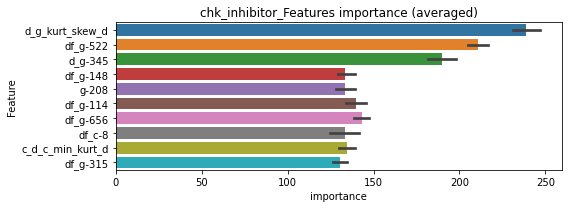

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000403926	valid_1's binary_logloss: 0.00103631


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000405743	valid_1's binary_logloss: 0.0012245


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000404133	valid_1's binary_logloss: 0.00100727


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000403814	valid_1's binary_logloss: 0.00112823


chk_inhibitor logloss: 0.0010990919582498882


neg labels: 3289 → selected neg labels: 3284


chloride_channel_blocker, len(trt): 42, len(othr): 3284, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301258	valid_1's binary_logloss: 0.0194091
[600]	training's binary_logloss: 0.00063306	valid_1's binary_logloss: 0.0127447
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.00056433	valid_1's binary_logloss: 0.0124509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00330549	valid_1's binary_logloss: 0.0151868
[600]	training's binary_logloss: 0.000661649	valid_1's binary_logloss: 0.00933031
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000572224	valid_1's binary_logloss: 0.00918028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0034355	valid_1's binary_logloss: 0.00787737
[600]	training's binary_logloss: 0.000688466	valid_1's binary_logloss: 0.00266867
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000551233	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0049572, Threshold: 0.0495103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.03466, conf_1:0.06436
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0495103
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_2: 0.0695103
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_3: 0.0895103
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_4: 0.1095103
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_5: 0.1295103
threshold: 0.1295103, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00277876	valid_1's binary_logloss: 0.0192929
[600]	training's binary_logloss: 0.000594733	valid_1's binary_logloss: 0.0130771
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000565613	valid_1's binary_logloss: 0.0130416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294979	valid_1's binary_logloss: 0.0127852
[600]	training's binary_logloss: 0.000627356	valid_1's binary_logloss: 0.00825103
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000551899	valid_1's binary_logloss: 0.00803993
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299857	valid_1's binary_logloss: 0.00668615
[600]	training's binary_logloss: 0.000633733	valid_1's binary_logloss: 0.0027006
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000541743	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0534373, Threshold: 0.1295103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0123054 Vs.target_rate: 0.00176, Num_p_label: 49.0, conf_0:0.10361, conf_1:0.15541
Num_p_label: 49.0, Expected: 7.0, Adj_threshold_1: 0.1295103
Num_p_label: 46.0, Expected: 7.0, Adj_threshold_2: 0.1495103
Num_p_label: 39.0, Expected: 7.0, Adj_threshold_3: 0.1695103
Num_p_label: 35.0, Expected: 7.0, Adj_threshold_4: 0.1895103
Num_p_label: 33.0, Expected: 7.0, Adj_threshold_5: 0.2095103
Num_p_label: 29.0, Expected: 7.0, Adj_threshold_6: 0.2295103
Num_p_label: 27.0, Expected: 7.0, Adj_threshold_7: 0.2495103
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_8: 0.2695103
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_9: 0.2895103
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_10: 0.3095103
threshold: 0.3295103, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00297763	valid_1's binary_logloss: 0.0152805
[600]	training's binary_logloss: 0.000616776	valid_1's binary_logloss: 0.0100807
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000559331	valid_1's binary_logloss: 0.00994827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00283995	valid_1's binary_logloss: 0.0118243
[600]	training's binary_logloss: 0.000613673	valid_1's binary_logloss: 0.00611611
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000541984	valid_1's binary_logloss: 0.00583591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289701	valid_1's binary_logloss: 0.0136075
[600]	training's binary_logloss: 0.000612992	valid_1's binary_logloss: 0.00771224
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000553268	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0545420, Threshold: 0.3295103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0055249 Vs.target_rate: 0.00176, Num_p_label: 22.0, conf_0:0.29656, conf_1:0.36246
Num_p_label: 22.0, Expected: 7.0, Adj_threshold_1: 0.3295103
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_2: 0.3495103
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_3: 0.3695103
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_4: 0.3895103
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_5: 0.4095103
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_6: 0.4295103
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_7: 0.4495103
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_8: 0.4695103
threshold: 0.4695103, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


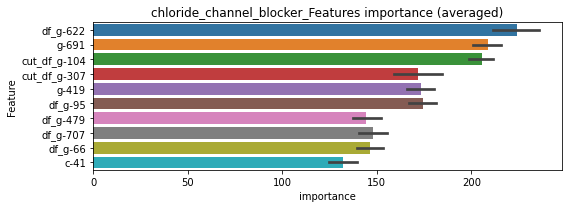

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000547863	valid_1's binary_logloss: 0.00869841


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000559183	valid_1's binary_logloss: 0.00531448


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000540145	valid_1's binary_logloss: 0.00676596


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000559197	valid_1's binary_logloss: 0.00508039


chloride_channel_blocker logloss: 0.0064677022823650355


neg labels: 3289 → selected neg labels: 3288


cholesterol_inhibitor, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004161	valid_1's binary_logloss: 0.0225974
[600]	training's binary_logloss: 0.000761224	valid_1's binary_logloss: 0.0137676
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000668086	valid_1's binary_logloss: 0.0134705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394339	valid_1's binary_logloss: 0.0259253
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000831721	valid_1's binary_logloss: 0.0202465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433007	valid_1's binary_logloss: 0.0107276
[600]	training's binary_logloss: 0.000788209	valid_1's binary_logloss: 0.00402907
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000596293	valid_1's binary_logloss: 0.00357919
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0048093, Threshold: 0.0108729, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.00761, conf_1:0.01413
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0108729
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_2: 0.0308729
threshold: 0.0308729, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381083	valid_1's binary_logloss: 0.0219938
[600]	training's binary_logloss: 0.00073092	valid_1's binary_logloss: 0.0141878
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000590225	valid_1's binary_logloss: 0.0135963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00377108	valid_1's binary_logloss: 0.0234461
[600]	training's binary_logloss: 0.000735614	valid_1's binary_logloss: 0.0173791
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000658068	valid_1's binary_logloss: 0.0170651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041692	valid_1's binary_logloss: 0.0098853
[600]	training's binary_logloss: 0.00077402	valid_1's binary_logloss: 0.0036032
[900]	training's binary_logloss: 0.000562117	valid_1's binary_logloss: 0.00313848
Early stopping, best it

2 / 3 AUC score:1.000
y_Threshold: 0.0266767, Threshold: 0.0308729, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00202, Num_p_label: 24.0, conf_0:0.02470, conf_1:0.03705
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_1: 0.0308729
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_2: 0.0508729
threshold: 0.0508729, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374532	valid_1's binary_logloss: 0.0208805
[600]	training's binary_logloss: 0.000715686	valid_1's binary_logloss: 0.0131972
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000630988	valid_1's binary_logloss: 0.0126033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00368675	valid_1's binary_logloss: 0.0126441
[600]	training's binary_logloss: 0.000729659	valid_1's binary_logloss: 0.00634083
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000593916	valid_1's binary_logloss: 0.0059368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400041	valid_1's binary_logloss: 0.00807455
[600]	training's binary_logloss: 0.000771127	valid_1's binary_logloss: 0.00279037
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000573063	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0319590, Threshold: 0.0508729, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00202, Num_p_label: 12.0, conf_0:0.04579, conf_1:0.05596
threshold: 0.0508729, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


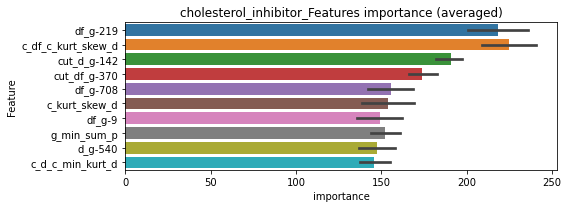

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000570672	valid_1's binary_logloss: 0.0109582


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000585885	valid_1's binary_logloss: 0.00595253


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000573553	valid_1's binary_logloss: 0.00291391


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000645271	valid_1's binary_logloss: 0.0162854


cholesterol_inhibitor logloss: 0.0090258656611058


neg labels: 3289 → selected neg labels: 3281


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3281, target_rate: 0.0022676 → Adj_target_rate: 0.0024931
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00419158	valid_1's binary_logloss: 0.0381265
[600]	training's binary_logloss: 0.000811824	valid_1's binary_logloss: 0.0291387
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.00065245	valid_1's binary_logloss: 0.0282729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427257	valid_1's binary_logloss: 0.0278851
[600]	training's binary_logloss: 0.000840906	valid_1's binary_logloss: 0.0218037
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000683977	valid_1's binary_logloss: 0.021416
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00450851	valid_1's binary_logloss: 0.0104874
[600]	training's binary_logloss: 0.000867197	valid_1's binary_logloss: 0.0043946
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000655185	valid_1's binary_logloss

1 / 3 AUC score:1.000
y_Threshold: 0.0046920, Threshold: 0.0148515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00227, Num_p_label: 40.0, conf_0:0.01040, conf_1:0.01931
Num_p_label: 40.0, Expected: 9.0, Adj_threshold_1: 0.0148515
Num_p_label: 11.0, Expected: 9.0, Adj_threshold_2: 0.0348515
threshold: 0.0348515, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390034	valid_1's binary_logloss: 0.0364733
[600]	training's binary_logloss: 0.000778937	valid_1's binary_logloss: 0.0272306
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000646243	valid_1's binary_logloss: 0.0264428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393781	valid_1's binary_logloss: 0.0264089
[600]	training's binary_logloss: 0.000790209	valid_1's binary_logloss: 0.0201245
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000829168	valid_1's binary_logloss: 0.0200873
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426666	valid_1's binary_logloss: 0.0101753
[600]	training's binary_logloss: 0.000838691	valid_1's binary_logloss: 0.00408522
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000595788	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0230008, Threshold: 0.0348515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0057760 Vs.target_rate: 0.00227, Num_p_label: 23.0, conf_0:0.02788, conf_1:0.04182
Num_p_label: 23.0, Expected: 9.0, Adj_threshold_1: 0.0348515
Num_p_label: 15.0, Expected: 9.0, Adj_threshold_2: 0.0548515
threshold: 0.0548515, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387825	valid_1's binary_logloss: 0.0275314
[600]	training's binary_logloss: 0.000775929	valid_1's binary_logloss: 0.0191208
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000640965	valid_1's binary_logloss: 0.0184237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407273	valid_1's binary_logloss: 0.0174803
[600]	training's binary_logloss: 0.000822334	valid_1's binary_logloss: 0.0109788
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000663281	valid_1's binary_logloss: 0.0104771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390737	valid_1's binary_logloss: 0.0187394
[600]	training's binary_logloss: 0.00079994	valid_1's binary_logloss: 0.0127371
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000639412	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0345275, Threshold: 0.0548515, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0032647 Vs.target_rate: 0.00227, Num_p_label: 13.0, conf_0:0.04937, conf_1:0.06034
threshold: 0.0548515, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


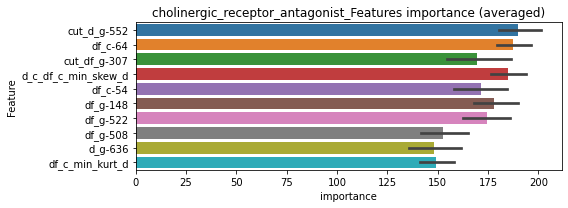

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000659711	valid_1's binary_logloss: 0.018004


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000633803	valid_1's binary_logloss: 0.0106788


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000646617	valid_1's binary_logloss: 0.0133424


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000755075	valid_1's binary_logloss: 0.0100521


cholinergic_receptor_antagonist logloss: 0.013023079411871807


neg labels: 3289 → selected neg labels: 3288


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180246	valid_1's binary_logloss: 0.00438709
[600]	training's binary_logloss: 0.00045236	valid_1's binary_logloss: 0.00173027
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000420014	valid_1's binary_logloss: 0.00165886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182032	valid_1's binary_logloss: 0.00418476
[600]	training's binary_logloss: 0.00044736	valid_1's binary_logloss: 0.00158213
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000413617	valid_1's binary_logloss: 0.00149694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177303	valid_1's binary_logloss: 0.00395817
[600]	training's binary_logloss: 0.000443819	valid_1's binary_logloss: 0.00158528
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000411085	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0029709, Threshold: 0.0176577, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.01236, conf_1:0.02296
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0176577
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.0376577
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.0576577
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.0776577
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_5: 0.0976577
threshold: 0.0976577, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162869	valid_1's binary_logloss: 0.00358989
[600]	training's binary_logloss: 0.000420876	valid_1's binary_logloss: 0.00136636
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000397789	valid_1's binary_logloss: 0.00130501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169079	valid_1's binary_logloss: 0.00381047
[600]	training's binary_logloss: 0.000423556	valid_1's binary_logloss: 0.00136319
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000398687	valid_1's binary_logloss: 0.00131397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160928	valid_1's binary_logloss: 0.00347391
[600]	training's binary_logloss: 0.000416081	valid_1's binary_logloss: 0.0013144
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000398079	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0398880, Threshold: 0.0976577, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0040181 Vs.target_rate: 0.00101, Num_p_label: 16.0, conf_0:0.07813, conf_1:0.11719
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_1: 0.0976577
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_2: 0.1176577
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_3: 0.1376577
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_4: 0.1576577
threshold: 0.1576577, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162869	valid_1's binary_logloss: 0.00358989
[600]	training's binary_logloss: 0.000420876	valid_1's binary_logloss: 0.00136636
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000397789	valid_1's binary_logloss: 0.00130501
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169079	valid_1's binary_logloss: 0.00381047
[600]	training's binary_logloss: 0.000423556	valid_1's binary_logloss: 0.00136319
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000398687	valid_1's binary_logloss: 0.00131397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00160928	valid_1's binary_logloss: 0.00347391
[600]	training's binary_logloss: 0.000416081	valid_1's binary_logloss: 0.0013144
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000398079	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0398880, Threshold: 0.1576577, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00101, Num_p_label: 10.0, conf_0:0.14189, conf_1:0.17342
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.1576577
threshold: 0.1576577, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


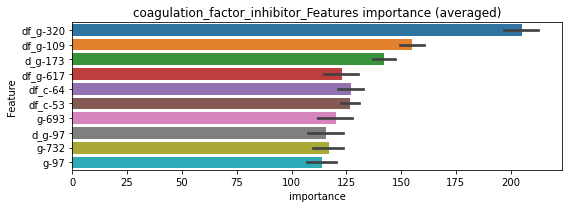

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00039883	valid_1's binary_logloss: 0.00134317


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000405991	valid_1's binary_logloss: 0.00138602


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000392558	valid_1's binary_logloss: 0.00135917


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000408016	valid_1's binary_logloss: 0.00455872


coagulation_factor_inhibitor logloss: 0.0021616432914651163


neg labels: 3289 → selected neg labels: 3285


corticosteroid_agonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00355879	valid_1's binary_logloss: 0.0118874
[600]	training's binary_logloss: 0.000673307	valid_1's binary_logloss: 0.00463323
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000505658	valid_1's binary_logloss: 0.00400516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351015	valid_1's binary_logloss: 0.0154979
[600]	training's binary_logloss: 0.000661646	valid_1's binary_logloss: 0.00779584
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000553959	valid_1's binary_logloss: 0.0073468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00381177	valid_1's binary_logloss: 0.00952223
[600]	training's binary_logloss: 0.000684766	valid_1's binary_logloss: 0.0033082
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.000508856	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0043811, Threshold: 0.0158053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01106, conf_1:0.02055
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0158053
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0358053
threshold: 0.0358053, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323464	valid_1's binary_logloss: 0.0109477
[600]	training's binary_logloss: 0.000638236	valid_1's binary_logloss: 0.00433156
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000489813	valid_1's binary_logloss: 0.00382213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324446	valid_1's binary_logloss: 0.0163904
[600]	training's binary_logloss: 0.000643309	valid_1's binary_logloss: 0.00918081
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00053869	valid_1's binary_logloss: 0.00861681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328324	valid_1's binary_logloss: 0.00908202
[600]	training's binary_logloss: 0.000651647	valid_1's binary_logloss: 0.00391898
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000512339	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0415278, Threshold: 0.0358053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0092918 Vs.target_rate: 0.00151, Num_p_label: 37.0, conf_0:0.02864, conf_1:0.04297
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_1: 0.0358053
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.0558053
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_3: 0.0758053
threshold: 0.0758053, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00323464	valid_1's binary_logloss: 0.0109477
[600]	training's binary_logloss: 0.000638236	valid_1's binary_logloss: 0.00433156
Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000489813	valid_1's binary_logloss: 0.00382213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00324446	valid_1's binary_logloss: 0.0163904
[600]	training's binary_logloss: 0.000643309	valid_1's binary_logloss: 0.00918081
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00053869	valid_1's binary_logloss: 0.00861681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328324	valid_1's binary_logloss: 0.00908202
[600]	training's binary_logloss: 0.000651647	valid_1's binary_logloss: 0.00391898
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000512339	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0415278, Threshold: 0.0758053, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151, Num_p_label: 12.0, conf_0:0.06822, conf_1:0.08339
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0758053
threshold: 0.0758053, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


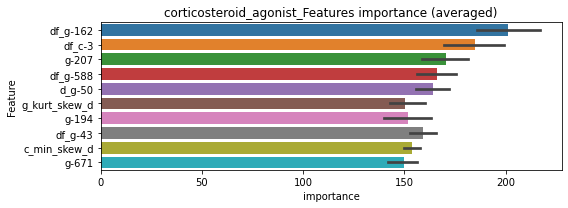

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00050712	valid_1's binary_logloss: 0.00383785


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000501758	valid_1's binary_logloss: 0.00821363


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000513647	valid_1's binary_logloss: 0.00316893


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000540758	valid_1's binary_logloss: 0.00840952


corticosteroid_agonist logloss: 0.005908112285517512


neg labels: 3289 → selected neg labels: 3235


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3235, target_rate: 0.0182666 → Adj_target_rate: 0.0146863
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.0816108	valid_1's binary_logloss: 0.356677
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[180]	training's binary_logloss: 0.12676	valid_1's binary_logloss: 0.379323
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.103868	valid_1's binary_logloss: 0.374197
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.757
y_Threshold: 0.1508955, Threshold: 0.4965236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 726 → Positive_corect_labels: 349/3156
p_label_rate: 0.0100452 Vs.target_rate: 0.01827, Num_p_label: 40.0, conf_0:0.34757, conf_1:0.64548
Num_p_label: 40.0, Expected: 72.7, Adj_threshold_1: 0.4965236
Num_p_label: 49.0, Expected: 72.7, Adj_threshold_2: 0.4765236


[300]	training's binary_logloss: 0.0640813	valid_1's binary_logloss: 0.36771
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0734762	valid_1's binary_logloss: 0.366445


threshold: 0.4765236, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 349.0/3156, y_label_rate: 0.1105830
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0143742	valid_1's binary_logloss: 0.204237
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0119944	valid_1's binary_logloss: 0.203145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167153	valid_1's binary_logloss: 0.167608
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0200553	valid_1's binary_logloss: 0.166115
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174948	valid_1's binary_logloss: 0.192188
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0204577	valid_1's binary_logloss: 0.190206
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.948
y_Threshold: 0.0853156, Threshold: 0.4765236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 262.0/2982
p_label_rate: 0.0266198 Vs.target_rate: 0.01827, Num_p_label: 106.0, conf_0:0.38122, conf_1:0.57183
threshold: 0.4765236, positive_p_label: 106.0/3982, p_label_rate: 0.0266198


[300]	training's binary_logloss: 0.0166794	valid_1's binary_logloss: 0.16959
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.0205966	valid_1's binary_logloss: 0.169056


positive_y_label: 262.0/2982, y_label_rate: 0.0878605
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.0133607	valid_1's binary_logloss: 0.141603
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00803857	valid_1's binary_logloss: 0.15073
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00986712	valid_1's binary_logloss: 0.150298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00797095	valid_1's binary_logloss: 0.10909
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00328416	valid_1's binary_logloss: 0.103315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087239	valid_1's binary_logloss: 0.121188


3 / 3 AUC score:0.978
y_Threshold: 0.0605666, Threshold: 0.4765236, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 216.0/2890
p_label_rate: 0.0354093 Vs.target_rate: 0.01827, Num_p_label: 141.0, conf_0:0.42887, conf_1:0.52418
Num_p_label: 141.0, Expected: 72.7, Adj_threshold_1: 0.4765236
Num_p_label: 139.0, Expected: 72.7, Adj_threshold_2: 0.4965236
Num_p_label: 139.0, Expected: 72.7, Adj_threshold_3: 0.5165236
Num_p_label: 137.0, Expected: 72.7, Adj_threshold_4: 0.5365236
Num_p_label: 135.0, Expected: 72.7, Adj_threshold_5: 0.5565236
Num_p_label: 133.0, Expected: 72.7, Adj_threshold_6: 0.5765236
Num_p_label: 133.0, Expected: 72.7, Adj_threshold_7: 0.5965236


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00529922	valid_1's binary_logloss: 0.118669


Num_p_label: 131.0, Expected: 72.7, Adj_threshold_8: 0.6165236
Num_p_label: 128.0, Expected: 72.7, Adj_threshold_9: 0.6365236
Num_p_label: 127.0, Expected: 72.7, Adj_threshold_10: 0.6565236
threshold: 0.6765236, positive_p_label: 120.0/3982, p_label_rate: 0.0301356
positive_y_label: 216.0/2890, y_label_rate: 0.0747405


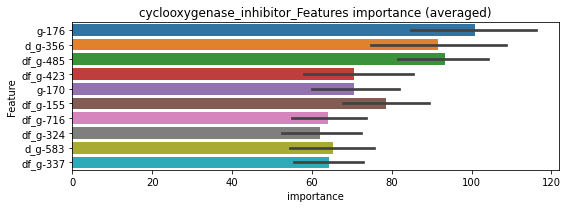

len(train_index) : 2167
len(valid_index) : 723
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2167
len(valid_index) : 723
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.006796	valid_1's binary_logloss: 0.115969
Training until validation scores don't improve for 30 rounds


len(train_index) : 2168
len(valid_index) : 722
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00902222	valid_1's binary_logloss: 0.102691
Training until validation scores don't improve for 30 rounds


len(train_index) : 2168
len(valid_index) : 722
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.0106835	valid_1's binary_logloss: 0.13602
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.11814017125293291


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00468036	valid_1's binary_logloss: 0.117904
neg labels: 3289 → selected neg labels: 3273


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3273, target_rate: 0.0043672 → Adj_target_rate: 0.0043519
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113398	valid_1's binary_logloss: 0.0823931
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00290665	valid_1's binary_logloss: 0.0726897
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112953	valid_1's binary_logloss: 0.0875299
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00304484	valid_1's binary_logloss: 0.0785324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118886	valid_1's binary_logloss: 0.0524905
[600]	training's binary_logloss: 0.0018706	valid_1's binary_logloss: 0.0360554
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00121136	valid_1's binary_logloss: 0.0342086
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0117053	valid_1's binary_logloss: 0.0699882
[600]	training's

1 / 3 AUC score:0.996
y_Threshold: 0.0143283, Threshold: 0.0520124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00437, Num_p_label: 40.0, conf_0:0.03641, conf_1:0.06762
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.0520124
Num_p_label: 21.0, Expected: 17.4, Adj_threshold_2: 0.0720124
threshold: 0.0720124, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 643.0/3773, y_label_rate: 0.1704214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966091	valid_1's binary_logloss: 0.0711748
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00197015	valid_1's binary_logloss: 0.0609124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960651	valid_1's binary_logloss: 0.0610891
[600]	training's binary_logloss: 0.00159659	valid_1's binary_logloss: 0.0464076
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00126716	valid_1's binary_logloss: 0.0453218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108711	valid_1's binary_logloss: 0.0472568
[600]	training's binary_logloss: 0.00173173	valid_1's binary_logloss: 0.0311159
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00119424	valid_1's binary_logloss: 0.0296577
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.999
y_Threshold: 0.0402386, Threshold: 0.0720124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 631.0/3749
p_label_rate: 0.0135610 Vs.target_rate: 0.00437, Num_p_label: 54.0, conf_0:0.05761, conf_1:0.08641
Num_p_label: 54.0, Expected: 17.4, Adj_threshold_1: 0.0720124
Num_p_label: 44.0, Expected: 17.4, Adj_threshold_2: 0.0920124
Num_p_label: 37.0, Expected: 17.4, Adj_threshold_3: 0.1120124
Num_p_label: 33.0, Expected: 17.4, Adj_threshold_4: 0.1320124
Num_p_label: 30.0, Expected: 17.4, Adj_threshold_5: 0.1520124
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_6: 0.1720124
Num_p_label: 24.0, Expected: 17.4, Adj_threshold_7: 0.1920124
threshold: 0.1920124, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 631.0/3749, y_label_rate: 0.1683115
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00894499	valid_1's binary_logloss: 0.0488571
[600]	training's binary_logloss: 0.00150032	valid_1's binary_logloss: 0.0379217
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00100053	valid_1's binary_logloss: 0.0368972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00853412	valid_1's binary_logloss: 0.0565578
[600]	training's binary_logloss: 0.00143416	valid_1's binary_logloss: 0.0448854
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00116459	valid_1's binary_logloss: 0.0439071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00881107	valid_1's binary_logloss: 0.0511479
[600]	training's binary_logloss: 0.00151378	valid_1's binary_logloss: 0.0377486
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00106269	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0309529, Threshold: 0.1920124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 625.0/3737
p_label_rate: 0.0072828 Vs.target_rate: 0.00437, Num_p_label: 29.0, conf_0:0.17281, conf_1:0.21121
Num_p_label: 29.0, Expected: 17.4, Adj_threshold_1: 0.1920124
Num_p_label: 27.0, Expected: 17.4, Adj_threshold_2: 0.2120124
Num_p_label: 25.0, Expected: 17.4, Adj_threshold_3: 0.2320124
threshold: 0.2320124, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 625.0/3737, y_label_rate: 0.1672465


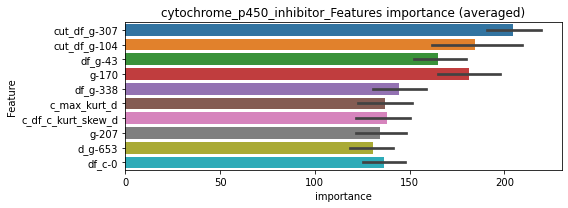

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00113521	valid_1's binary_logloss: 0.0312985


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.00113429	valid_1's binary_logloss: 0.0404312


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000917746	valid_1's binary_logloss: 0.0287868


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.00170727	valid_1's binary_logloss: 0.0646694


cytochrome_p450_inhibitor logloss: 0.04129379930082952


neg labels: 3289 → selected neg labels: 3281


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3281, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0028611	valid_1's binary_logloss: 0.0105794
[600]	training's binary_logloss: 0.000586439	valid_1's binary_logloss: 0.00509607
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000509833	valid_1's binary_logloss: 0.00489174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286852	valid_1's binary_logloss: 0.00626903
[600]	training's binary_logloss: 0.000596772	valid_1's binary_logloss: 0.00203448
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000519921	valid_1's binary_logloss: 0.0018806
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289512	valid_1's binary_logloss: 0.00599293
[600]	training's binary_logloss: 0.000597124	valid_1's binary_logloss: 0.00172439
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000504118	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0041128, Threshold: 0.0122638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00858, conf_1:0.01594
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0122638
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.0322638
threshold: 0.0322638, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260923	valid_1's binary_logloss: 0.00986204
[600]	training's binary_logloss: 0.000558999	valid_1's binary_logloss: 0.00508582
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00050683	valid_1's binary_logloss: 0.00500487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265337	valid_1's binary_logloss: 0.00564352
[600]	training's binary_logloss: 0.000566005	valid_1's binary_logloss: 0.00166485
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000510559	valid_1's binary_logloss: 0.0015462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261264	valid_1's binary_logloss: 0.00488214
[600]	training's binary_logloss: 0.000570575	valid_1's binary_logloss: 0.00135506
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00049344	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0731585, Threshold: 0.0322638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0072828 Vs.target_rate: 0.00151, Num_p_label: 29.0, conf_0:0.02581, conf_1:0.03872
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_1: 0.0322638
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0522638
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.0722638
threshold: 0.0722638, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260923	valid_1's binary_logloss: 0.00986204
[600]	training's binary_logloss: 0.000558999	valid_1's binary_logloss: 0.00508582
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00050683	valid_1's binary_logloss: 0.00500487
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265337	valid_1's binary_logloss: 0.00564352
[600]	training's binary_logloss: 0.000566005	valid_1's binary_logloss: 0.00166485
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000510559	valid_1's binary_logloss: 0.0015462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00261264	valid_1's binary_logloss: 0.00488214
[600]	training's binary_logloss: 0.000570575	valid_1's binary_logloss: 0.00135506
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00049344	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0731585, Threshold: 0.0722638, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00151, Num_p_label: 10.0, conf_0:0.06504, conf_1:0.07949
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0722638
threshold: 0.0722638, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


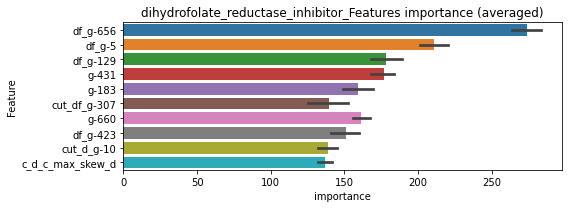

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000504623	valid_1's binary_logloss: 0.00393353


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000483207	valid_1's binary_logloss: 0.00151098


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000505818	valid_1's binary_logloss: 0.0012301


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000482865	valid_1's binary_logloss: 0.00480366


dihydrofolate_reductase_inhibitor logloss: 0.002871355473110966


neg labels: 3289 → selected neg labels: 3285


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00188242	valid_1's binary_logloss: 0.00502615
[600]	training's binary_logloss: 0.000442039	valid_1's binary_logloss: 0.00187542
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000416844	valid_1's binary_logloss: 0.00181468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174658	valid_1's binary_logloss: 0.010532
[600]	training's binary_logloss: 0.000428101	valid_1's binary_logloss: 0.00619204
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000435122	valid_1's binary_logloss: 0.00616154
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187927	valid_1's binary_logloss: 0.00352985
[600]	training's binary_logloss: 0.000441995	valid_1's binary_logloss: 0.0010787
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000437453	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0029423, Threshold: 0.0107626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00753, conf_1:0.01399
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0107626
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_2: 0.0307626
threshold: 0.0307626, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172338	valid_1's binary_logloss: 0.00423157
[600]	training's binary_logloss: 0.000424145	valid_1's binary_logloss: 0.00156281
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000401583	valid_1's binary_logloss: 0.00149542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163865	valid_1's binary_logloss: 0.00852471
[600]	training's binary_logloss: 0.000409538	valid_1's binary_logloss: 0.00461531
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000409538	valid_1's binary_logloss: 0.00461531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173242	valid_1's binary_logloss: 0.00317033
[600]	training's binary_logloss: 0.000425431	valid_1's binary_logloss: 0.00101537
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000404125	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.1510037, Threshold: 0.0307626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0070316 Vs.target_rate: 0.00105, Num_p_label: 28.0, conf_0:0.02461, conf_1:0.03692
Num_p_label: 28.0, Expected: 4.2, Adj_threshold_1: 0.0307626
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_2: 0.0507626
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.0707626
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_4: 0.0907626
threshold: 0.0907626, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172338	valid_1's binary_logloss: 0.00423157
[600]	training's binary_logloss: 0.000424145	valid_1's binary_logloss: 0.00156281
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000401583	valid_1's binary_logloss: 0.00149542
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163865	valid_1's binary_logloss: 0.00852471
[600]	training's binary_logloss: 0.000409538	valid_1's binary_logloss: 0.00461531
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000409538	valid_1's binary_logloss: 0.00461531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173242	valid_1's binary_logloss: 0.00317033
[600]	training's binary_logloss: 0.000425431	valid_1's binary_logloss: 0.00101537
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000404125	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.1510037, Threshold: 0.0907626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00105, Num_p_label: 9.0, conf_0:0.08169, conf_1:0.09984
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0907626
threshold: 0.0907626, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


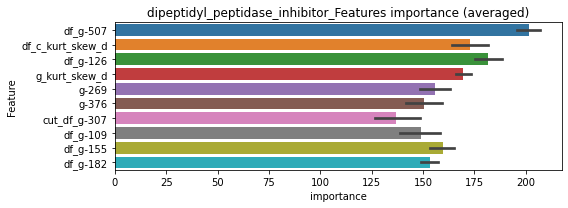

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000431828	valid_1's binary_logloss: 0.00160502


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000417854	valid_1's binary_logloss: 0.0048949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000403337	valid_1's binary_logloss: 0.000897432


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000418123	valid_1's binary_logloss: 0.00127341


dipeptidyl_peptidase_inhibitor logloss: 0.0021682834873605044


neg labels: 3289 → selected neg labels: 3289


diuretic, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000449147	valid_1's binary_logloss: 0.00187032
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000212616	valid_1's binary_logloss: 0.00127716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000437782	valid_1's binary_logloss: 0.00539002
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000218316	valid_1's binary_logloss: 0.00490659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000452084	valid_1's binary_logloss: 0.000505206
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.0002144	valid_1's binary_logloss: 0.000241477
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000437845	valid_1's binary_logloss: 0.00101765


1 / 3 AUC score:1.000
y_Threshold: 0.0006171, Threshold: 0.0021388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00150, conf_1:0.00278
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0021388
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0221388
threshold: 0.0221388, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000218468	valid_1's binary_logloss: 0.000594538


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419929	valid_1's binary_logloss: 0.0016479
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00021878	valid_1's binary_logloss: 0.0012145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413792	valid_1's binary_logloss: 0.00653761
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000210208	valid_1's binary_logloss: 0.00589976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000434472	valid_1's binary_logloss: 0.000434324
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00020639	valid_1's binary_logloss: 0.000210091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000418468	valid_1's binary_logloss: 0.000458884


2 / 3 AUC score:1.000
y_Threshold: 0.0038072, Threshold: 0.0221388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025, Num_p_label: 5.0, conf_0:0.01771, conf_1:0.02657
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0221388
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0421388
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0621388
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.0821388
threshold: 0.0821388, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000207602	valid_1's binary_logloss: 0.000227081


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419929	valid_1's binary_logloss: 0.0016479
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00021878	valid_1's binary_logloss: 0.0012145
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000413792	valid_1's binary_logloss: 0.00653761
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000210208	valid_1's binary_logloss: 0.00589976
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000434472	valid_1's binary_logloss: 0.000434324
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00020639	valid_1's binary_logloss: 0.000210091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000418468	valid_1's binary_logloss: 0.000458884


3 / 3 AUC score:1.000
y_Threshold: 0.0038072, Threshold: 0.0821388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.07392, conf_1:0.09035
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0821388
threshold: 0.0821388, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000207602	valid_1's binary_logloss: 0.000227081


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


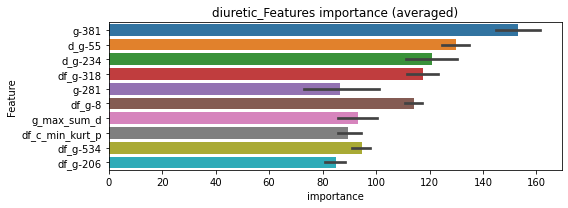

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000204227	valid_1's binary_logloss: 0.00140665
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000207286	valid_1's binary_logloss: 0.00660226
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000204219	valid_1's binary_logloss: 0.000215343
Training until validation scores don't improve for 30 rounds


diuretic logloss: 0.0021156417420188094


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000211283	valid_1's binary_logloss: 0.00023593
neg labels: 3289 → selected neg labels: 3280


dna_alkylating_agent, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00350455	valid_1's binary_logloss: 0.0234708
[600]	training's binary_logloss: 0.000716683	valid_1's binary_logloss: 0.0173795
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000746028	valid_1's binary_logloss: 0.0173298
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00361674	valid_1's binary_logloss: 0.0198411
[600]	training's binary_logloss: 0.00074365	valid_1's binary_logloss: 0.0119086
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00072381	valid_1's binary_logloss: 0.0117988
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00413061	valid_1's binary_logloss: 0.00790238
[600]	training's binary_logloss: 0.000789398	valid_1's binary_logloss: 0.00232376
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000587398	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0049588, Threshold: 0.0974283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.06820, conf_1:0.12666
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0974283
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_2: 0.1174283
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_3: 0.1374283
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_4: 0.1574283
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_5: 0.1774283
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_6: 0.1974283
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_7: 0.2174283
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_8: 0.2374283
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_9: 0.2574283
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_10: 0.2774283
threshold: 0.2974283, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316484	valid_1's binary_logloss: 0.0264967
[600]	training's binary_logloss: 0.000671222	valid_1's binary_logloss: 0.019538
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00055602	valid_1's binary_logloss: 0.0192085
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340714	valid_1's binary_logloss: 0.0143774
[600]	training's binary_logloss: 0.000702752	valid_1's binary_logloss: 0.00886688
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000590506	valid_1's binary_logloss: 0.00844401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00334724	valid_1's binary_logloss: 0.0150688
[600]	training's binary_logloss: 0.000691891	valid_1's binary_logloss: 0.00796017
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000575219	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0510758, Threshold: 0.2974283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0155701 Vs.target_rate: 0.00202, Num_p_label: 62.0, conf_0:0.23794, conf_1:0.35691
Num_p_label: 62.0, Expected: 8.0, Adj_threshold_1: 0.2974283
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_2: 0.3174283
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_3: 0.3374283
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_4: 0.3574283
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_5: 0.3774283
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_6: 0.3974283
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_7: 0.4174283
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4374283
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_9: 0.4574283
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4774283
threshold: 0.4974283, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325115	valid_1's binary_logloss: 0.0169482
[600]	training's binary_logloss: 0.000668564	valid_1's binary_logloss: 0.00992436
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000576103	valid_1's binary_logloss: 0.00950434
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00322601	valid_1's binary_logloss: 0.0216979
[600]	training's binary_logloss: 0.000678353	valid_1's binary_logloss: 0.0155468
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00061816	valid_1's binary_logloss: 0.0153786
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00332889	valid_1's binary_logloss: 0.0152738
[600]	training's binary_logloss: 0.000684665	valid_1's binary_logloss: 0.00909321
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000564845	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0596913, Threshold: 0.4974283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0135610 Vs.target_rate: 0.00202, Num_p_label: 54.0, conf_0:0.44769, conf_1:0.54717
Num_p_label: 54.0, Expected: 8.0, Adj_threshold_1: 0.4974283
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_2: 0.5174283
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_3: 0.5374283
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_4: 0.5574283
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_5: 0.5774283
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_6: 0.5974283
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_7: 0.6174283
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_8: 0.6374283
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_9: 0.6574283
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_10: 0.6774283
threshold: 0.6974283, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


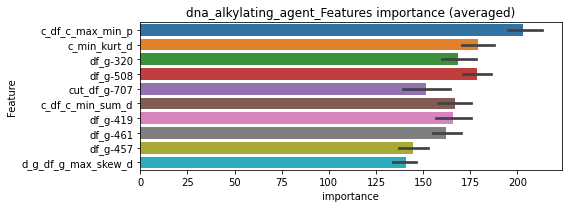

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000578847	valid_1's binary_logloss: 0.00991975


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000563256	valid_1's binary_logloss: 0.0145244


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000547383	valid_1's binary_logloss: 0.00526452


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000562995	valid_1's binary_logloss: 0.00537542


dna_alkylating_agent logloss: 0.008773708006088928


neg labels: 3289 → selected neg labels: 3248


dna_inhibitor, len(trt): 402, len(othr): 3248, target_rate: 0.0168808 → Adj_target_rate: 0.0137338
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.078631	valid_1's binary_logloss: 0.357176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[210]	training's binary_logloss: 0.0955822	valid_1's binary_logloss: 0.338
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0569317	valid_1's binary_logloss: 0.326675
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0599604	valid_1's binary_logloss: 0.325868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0606975	valid_1's binary_logloss: 0.321908
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.0667964	valid_1's binary_logloss: 0.321225


1 / 3 AUC score:0.811
y_Threshold: 0.1339881, Threshold: 0.4901217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 617 → Positive_corect_labels: 406/3280
p_label_rate: 0.0100452 Vs.target_rate: 0.01688, Num_p_label: 40.0, conf_0:0.34309, conf_1:0.63716
Num_p_label: 40.0, Expected: 67.2, Adj_threshold_1: 0.4901217
Num_p_label: 45.0, Expected: 67.2, Adj_threshold_2: 0.4701217
threshold: 0.4701217, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 406.0/3280, y_label_rate: 0.1237805
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0157209	valid_1's binary_logloss: 0.183247
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00944353	valid_1's binary_logloss: 0.180685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156089	valid_1's binary_logloss: 0.195266
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0179245	valid_1's binary_logloss: 0.195135
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155989	valid_1's binary_logloss: 0.171934
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0153546	valid_1's binary_logloss: 0.171357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176689	valid_1's binary_logloss: 0.168262


2 / 3 AUC score:0.958
y_Threshold: 0.0790046, Threshold: 0.4701217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 327.0/3122
p_label_rate: 0.0228528 Vs.target_rate: 0.01688, Num_p_label: 91.0, conf_0:0.37610, conf_1:0.56415


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00884984	valid_1's binary_logloss: 0.163099


threshold: 0.4701217, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 327.0/3122, y_label_rate: 0.1047406
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01012	valid_1's binary_logloss: 0.113645
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.0025815	valid_1's binary_logloss: 0.108512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00931954	valid_1's binary_logloss: 0.151613
Early stopping, best iteration is:
[300]	training's binary_logloss: 0.00931954	valid_1's binary_logloss: 0.151613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.011693	valid_1's binary_logloss: 0.151673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00990025	valid_1's binary_logloss: 0.124853


3 / 3 AUC score:0.978
y_Threshold: 0.0643681, Threshold: 0.4701217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 277.0/3022
p_label_rate: 0.0291311 Vs.target_rate: 0.01688, Num_p_label: 116.0, conf_0:0.42311, conf_1:0.51713
Num_p_label: 116.0, Expected: 67.2, Adj_threshold_1: 0.4701217


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00610126	valid_1's binary_logloss: 0.121664


Num_p_label: 113.0, Expected: 67.2, Adj_threshold_2: 0.4901217
Num_p_label: 108.0, Expected: 67.2, Adj_threshold_3: 0.5101217
Num_p_label: 106.0, Expected: 67.2, Adj_threshold_4: 0.5301217
Num_p_label: 101.0, Expected: 67.2, Adj_threshold_5: 0.5501217
Num_p_label: 101.0, Expected: 67.2, Adj_threshold_6: 0.5701217
Num_p_label: 101.0, Expected: 67.2, Adj_threshold_7: 0.5901217
Num_p_label: 99.0, Expected: 67.2, Adj_threshold_8: 0.6101217
threshold: 0.6101217, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 277.0/3022, y_label_rate: 0.0916612


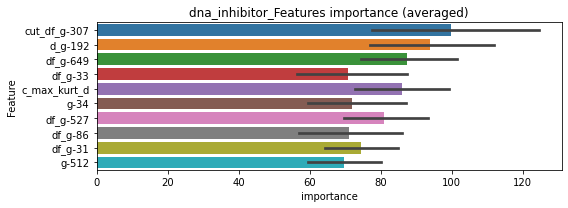

len(train_index) : 2266
len(valid_index) : 756
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2266
len(valid_index) : 756
================================= fold 2/4 dna_inhibitor=================================


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00281547	valid_1's binary_logloss: 0.114
Training until validation scores don't improve for 30 rounds


len(train_index) : 2267
len(valid_index) : 755
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00393051	valid_1's binary_logloss: 0.101665
Training until validation scores don't improve for 30 rounds


len(train_index) : 2267
len(valid_index) : 755
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00435519	valid_1's binary_logloss: 0.0911908
Training until validation scores don't improve for 30 rounds


dna_inhibitor logloss: 0.10611969183214406


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00369727	valid_1's binary_logloss: 0.117618
neg labels: 3289 → selected neg labels: 3272


dopamine_receptor_agonist, len(trt): 121, len(othr): 3272, target_rate: 0.0050810 → Adj_target_rate: 0.0049495
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123792	valid_1's binary_logloss: 0.129245
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00402687	valid_1's binary_logloss: 0.12072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139482	valid_1's binary_logloss: 0.0732441
[600]	training's binary_logloss: 0.00217	valid_1's binary_logloss: 0.0570472
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00242596	valid_1's binary_logloss: 0.0570398
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013385	valid_1's binary_logloss: 0.070015
[600]	training's binary_logloss: 0.00209786	valid_1's binary_logloss: 0.0503114
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.00138202	valid_1's binary_logloss: 0.0487191
Training until validation scores don't improve for 30 rounds
[300]	training's binar

1 / 3 AUC score:0.994
y_Threshold: 0.0229008, Threshold: 0.0950896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 637/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00508, Num_p_label: 40.0, conf_0:0.06656, conf_1:0.12362
Num_p_label: 40.0, Expected: 20.2, Adj_threshold_1: 0.0950896
Num_p_label: 32.0, Expected: 20.2, Adj_threshold_2: 0.1150896
Num_p_label: 23.0, Expected: 20.2, Adj_threshold_3: 0.1350896
threshold: 0.1350896, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 637.0/3760, y_label_rate: 0.1694149
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102562	valid_1's binary_logloss: 0.0841666
[600]	training's binary_logloss: 0.0016805	valid_1's binary_logloss: 0.0699154
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00119336	valid_1's binary_logloss: 0.0686204
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110924	valid_1's binary_logloss: 0.0612722
[600]	training's binary_logloss: 0.00182749	valid_1's binary_logloss: 0.0409451
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00105959	valid_1's binary_logloss: 0.0389411
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0110902	valid_1's binary_logloss: 0.0667919
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00201372	valid_1's binary_logloss: 0.0516028
Training until validation scores don't improve for 30 rounds
[300]	training'

2 / 3 AUC score:0.997
y_Threshold: 0.0466818, Threshold: 0.1350896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0125565 Vs.target_rate: 0.00508, Num_p_label: 50.0, conf_0:0.10807, conf_1:0.16211
Num_p_label: 50.0, Expected: 20.2, Adj_threshold_1: 0.1350896
Num_p_label: 45.0, Expected: 20.2, Adj_threshold_2: 0.1550896
Num_p_label: 41.0, Expected: 20.2, Adj_threshold_3: 0.1750896
Num_p_label: 37.0, Expected: 20.2, Adj_threshold_4: 0.1950896
Num_p_label: 33.0, Expected: 20.2, Adj_threshold_5: 0.2150896
Num_p_label: 30.0, Expected: 20.2, Adj_threshold_6: 0.2350896
threshold: 0.2350896, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 620.0/3726, y_label_rate: 0.1663983
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927792	valid_1's binary_logloss: 0.065816
[600]	training's binary_logloss: 0.00158188	valid_1's binary_logloss: 0.0491896
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00105479	valid_1's binary_logloss: 0.047527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00981462	valid_1's binary_logloss: 0.0496564
[600]	training's binary_logloss: 0.00163318	valid_1's binary_logloss: 0.0319305
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.00102656	valid_1's binary_logloss: 0.0301521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00926231	valid_1's binary_logloss: 0.0577011
[600]	training's binary_logloss: 0.00158552	valid_1's binary_logloss: 0.0426423
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.00107615	valid_1's binary_logloss: 0.04

3 / 3 AUC score:1.000
y_Threshold: 0.0454011, Threshold: 0.2350896, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 615.0/3716
p_label_rate: 0.0067805 Vs.target_rate: 0.00508, Num_p_label: 27.0, conf_0:0.21158, conf_1:0.25860
threshold: 0.2350896, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 615.0/3716, y_label_rate: 0.1655005


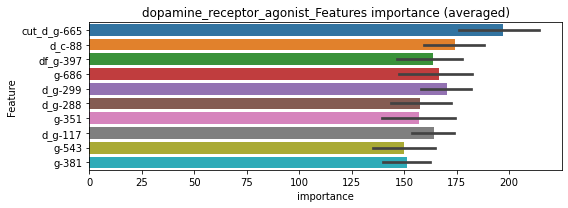

len(train_index) : 2787
len(valid_index) : 929
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000853487	valid_1's binary_logloss: 0.0395358


len(train_index) : 2787
len(valid_index) : 929
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00133448	valid_1's binary_logloss: 0.0515985


len(train_index) : 2787
len(valid_index) : 929
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00119399	valid_1's binary_logloss: 0.0358536


len(train_index) : 2787
len(valid_index) : 929
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000931879	valid_1's binary_logloss: 0.0492187


dopamine_receptor_agonist logloss: 0.044051629715759454


neg labels: 3289 → selected neg labels: 3231


dopamine_receptor_antagonist, len(trt): 424, len(othr): 3231, target_rate: 0.0178047 → Adj_target_rate: 0.0143701
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.10161	valid_1's binary_logloss: 0.38317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.109792	valid_1's binary_logloss: 0.365582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[230]	training's binary_logloss: 0.100211	valid_1's binary_logloss: 0.345064
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.755
y_Threshold: 0.1462014, Threshold: 0.5109251, pos_neg_ratio: 0.8000000
Remove_noisy_data: 720 → Positive_corect_labels: 351/3157
p_label_rate: 0.0100452 Vs.target_rate: 0.01780, Num_p_label: 40.0, conf_0:0.35765, conf_1:0.66420
Num_p_label: 40.0, Expected: 70.9, Adj_threshold_1: 0.5109251
Num_p_label: 50.0, Expected: 70.9, Adj_threshold_2: 0.4909251
threshold: 0.4909251, positive_p_label: 50.0/3982, p_label_rate: 0.0125565


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.105969	valid_1's binary_logloss: 0.37948


positive_y_label: 351.0/3157, y_label_rate: 0.1111815
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.016152	valid_1's binary_logloss: 0.165986
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.01031	valid_1's binary_logloss: 0.164202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0164321	valid_1's binary_logloss: 0.177681
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0136741	valid_1's binary_logloss: 0.176441
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163381	valid_1's binary_logloss: 0.154604
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0201638	valid_1's binary_logloss: 0.154057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156785	valid_1's binary_logloss: 0.161199


2 / 3 AUC score:0.959
y_Threshold: 0.0841730, Threshold: 0.4909251, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 279.0/3013
p_label_rate: 0.0384229 Vs.target_rate: 0.01780, Num_p_label: 153.0, conf_0:0.39274, conf_1:0.58911
Num_p_label: 153.0, Expected: 70.9, Adj_threshold_1: 0.4909251
Num_p_label: 150.0, Expected: 70.9, Adj_threshold_2: 0.5109251
Num_p_label: 146.0, Expected: 70.9, Adj_threshold_3: 0.5309251
Num_p_label: 144.0, Expected: 70.9, Adj_threshold_4: 0.5509251
Num_p_label: 142.0, Expected: 70.9, Adj_threshold_5: 0.5709251
Num_p_label: 138.0, Expected: 70.9, Adj_threshold_6: 0.5909251
Num_p_label: 131.0, Expected: 70.9, Adj_threshold_7: 0.6109251


Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0135139	valid_1's binary_logloss: 0.158736


Num_p_label: 128.0, Expected: 70.9, Adj_threshold_8: 0.6309251
Num_p_label: 126.0, Expected: 70.9, Adj_threshold_9: 0.6509251
Num_p_label: 122.0, Expected: 70.9, Adj_threshold_10: 0.6709251
threshold: 0.6909251, positive_p_label: 115.0/3982, p_label_rate: 0.0288800
positive_y_label: 279.0/3013, y_label_rate: 0.0925987
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00836154	valid_1's binary_logloss: 0.0952004
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00301377	valid_1's binary_logloss: 0.0881652
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00770261	valid_1's binary_logloss: 0.131833
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00598689	valid_1's binary_logloss: 0.130707
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874086	valid_1's binary_logloss: 0.112441
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00354079	valid_1's binary_logloss: 0.108587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00849554	valid_1's binary_logloss: 0.102766


3 / 3 AUC score:0.985


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00265006	valid_1's binary_logloss: 0.0958979


y_Threshold: 0.0546729, Threshold: 0.6909251, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 241.0/2937
p_label_rate: 0.0449523 Vs.target_rate: 0.01780, Num_p_label: 179.0, conf_0:0.50000, conf_1:0.76002
Num_p_label: 179.0, Expected: 70.9, Adj_threshold_1: 0.6909251
Num_p_label: 178.0, Expected: 70.9, Adj_threshold_2: 0.7109251
Num_p_label: 176.0, Expected: 70.9, Adj_threshold_3: 0.7309251
Num_p_label: 172.0, Expected: 70.9, Adj_threshold_4: 0.7509251
Num_p_label: 168.0, Expected: 70.9, Adj_threshold_5: 0.7709251
Num_p_label: 165.0, Expected: 70.9, Adj_threshold_6: 0.7909251
threshold: 0.7909251, positive_p_label: 165.0/3982, p_label_rate: 0.0414365
positive_y_label: 241.0/2937, y_label_rate: 0.0820565


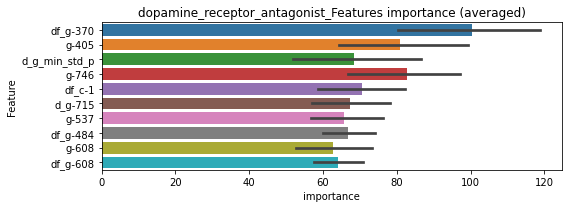

len(train_index) : 2202
len(valid_index) : 735
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2203
len(valid_index) : 734
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00443816	valid_1's binary_logloss: 0.0835904
Training until validation scores don't improve for 30 rounds


len(train_index) : 2203
len(valid_index) : 734
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00473283	valid_1's binary_logloss: 0.0892838
Training until validation scores don't improve for 30 rounds


len(train_index) : 2203
len(valid_index) : 734
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[221]	training's binary_logloss: 0.0112168	valid_1's binary_logloss: 0.135103
Training until validation scores don't improve for 30 rounds


dopamine_receptor_antagonist logloss: 0.1024941632441825


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00413141	valid_1's binary_logloss: 0.102025
neg labels: 3289 → selected neg labels: 3242


egfr_inhibitor, len(trt): 336, len(othr): 3242, target_rate: 0.0141093 → Adj_target_rate: 0.0117920
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0537633	valid_1's binary_logloss: 0.299726
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0376731	valid_1's binary_logloss: 0.296839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0536716	valid_1's binary_logloss: 0.282539
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.0304313	valid_1's binary_logloss: 0.274632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0539066	valid_1's binary_logloss: 0.301829
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.0479545	valid_1's binary_logloss: 0.30052
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0524886	valid_1's binary_logloss: 0.311304


1 / 3 AUC score:0.854
y_Threshold: 0.1024244, Threshold: 0.7538705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 530 → Positive_corect_labels: 448/3360


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.0341757	valid_1's binary_logloss: 0.308444


p_label_rate: 0.0100452 Vs.target_rate: 0.01411, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7538705, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 448.0/3360, y_label_rate: 0.1333333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198226	valid_1's binary_logloss: 0.161428
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00679895	valid_1's binary_logloss: 0.149775
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214003	valid_1's binary_logloss: 0.139398
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00479668	valid_1's binary_logloss: 0.120803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0217045	valid_1's binary_logloss: 0.162047
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00374943	valid_1's binary_logloss: 0.142821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214384	valid_1's binary_logloss: 0.127695


2 / 3 AUC score:0.983
y_Threshold: 0.0764585, Threshold: 0.7538705, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00845427	valid_1's binary_logloss: 0.113437


Remove_noisy_data: 114 → Positive_corect_labels: 391.0/3246
p_label_rate: 0.0306379 Vs.target_rate: 0.01411, Num_p_label: 122.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 122.0, Expected: 56.2, Adj_threshold_1: 0.7538705
Num_p_label: 121.0, Expected: 56.2, Adj_threshold_2: 0.7738705
Num_p_label: 117.0, Expected: 56.2, Adj_threshold_3: 0.7938705
threshold: 0.7938705, positive_p_label: 117.0/3982, p_label_rate: 0.0293822
positive_y_label: 391.0/3246, y_label_rate: 0.1204559
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141054	valid_1's binary_logloss: 0.132587
[600]	training's binary_logloss: 0.00227123	valid_1's binary_logloss: 0.113308
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00241721	valid_1's binary_logloss: 0.112726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140974	valid_1's binary_logloss: 0.119934
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00394749	valid_1's binary_logloss: 0.108334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155672	valid_1's binary_logloss: 0.137002
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00597242	valid_1's binary_logloss: 0.127927
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.014551	valid_1's binary_logloss: 0.135295


3 / 3 AUC score:0.981


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00472558	valid_1's binary_logloss: 0.12799


y_Threshold: 0.0720312, Threshold: 0.7938705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 351.0/3166
p_label_rate: 0.0339026 Vs.target_rate: 0.01411, Num_p_label: 135.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 135.0, Expected: 56.2, Adj_threshold_1: 0.7938705
threshold: 0.7938705, positive_p_label: 135.0/3982, p_label_rate: 0.0339026
positive_y_label: 351.0/3166, y_label_rate: 0.1108654


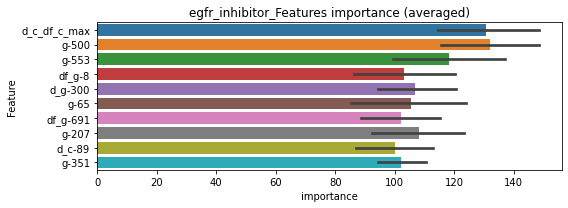

len(train_index) : 2374
len(valid_index) : 792
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00171984	valid_1's binary_logloss: 0.0707038


len(train_index) : 2374
len(valid_index) : 792
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2375
len(valid_index) : 791


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.0036605	valid_1's binary_logloss: 0.103836


================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00214321	valid_1's binary_logloss: 0.0811182


len(train_index) : 2375
len(valid_index) : 791
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


egfr_inhibitor logloss: 0.09125637396463786


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.0040538	valid_1's binary_logloss: 0.109377
neg labels: 3289 → selected neg labels: 3284


elastase_inhibitor, len(trt): 12, len(othr): 3284, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000678175	valid_1's binary_logloss: 0.00367252
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000289583	valid_1's binary_logloss: 0.00282269
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000692526	valid_1's binary_logloss: 0.00229886
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000267704	valid_1's binary_logloss: 0.00139442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000723649	valid_1's binary_logloss: 0.000838702
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000267955	valid_1's binary_logloss: 0.000331743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000706066	valid_1's binary_logloss: 0.00123782


1 / 3 AUC score:1.000
y_Threshold: 0.0011235, Threshold: 0.0034025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00238, conf_1:0.00442
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0034025
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0234025


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000287914	valid_1's binary_logloss: 0.000677549


threshold: 0.0234025, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000656663	valid_1's binary_logloss: 0.00270708
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000269225	valid_1's binary_logloss: 0.00201041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665413	valid_1's binary_logloss: 0.00240734
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000270649	valid_1's binary_logloss: 0.00157312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000688807	valid_1's binary_logloss: 0.000770424
[600]	training's binary_logloss: 0.000253605	valid_1's binary_logloss: 0.000294956
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000252825	valid_1's binary_logloss: 0.000294055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000675891	valid_1's binary_logloss: 0.0

2 / 3 AUC score:1.000
y_Threshold: 0.0620229, Threshold: 0.0234025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0017579 Vs.target_rate: 0.00050, Num_p_label: 7.0, conf_0:0.01872, conf_1:0.02808
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0234025
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_2: 0.0434025


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000271801	valid_1's binary_logloss: 0.000504416


threshold: 0.0434025, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000656663	valid_1's binary_logloss: 0.00270708
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000269225	valid_1's binary_logloss: 0.00201041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000665413	valid_1's binary_logloss: 0.00240734
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000270649	valid_1's binary_logloss: 0.00157312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000688807	valid_1's binary_logloss: 0.000770424
[600]	training's binary_logloss: 0.000253605	valid_1's binary_logloss: 0.000294956
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000252825	valid_1's binary_logloss: 0.000294055
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000675891	valid_1's binary_logloss: 0.0

3 / 3 AUC score:1.000
y_Threshold: 0.0620229, Threshold: 0.0434025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050, Num_p_label: 0.0, conf_0:0.03906, conf_1:0.04774
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0434025
threshold: 0.0434025, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000271801	valid_1's binary_logloss: 0.000504416


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


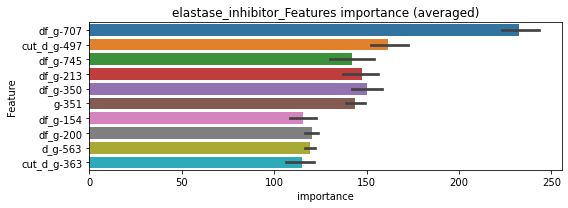

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000264582	valid_1's binary_logloss: 0.003095
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000263012	valid_1's binary_logloss: 0.00157197
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000266543	valid_1's binary_logloss: 0.000314384
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0013693380548442506


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000267422	valid_1's binary_logloss: 0.000495791
neg labels: 3289 → selected neg labels: 3287


erbb2_inhibitor, len(trt): 20, len(othr): 3287, target_rate: 0.0008398 → Adj_target_rate: 0.0010717
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157728	valid_1's binary_logloss: 0.00396952
[600]	training's binary_logloss: 0.000400846	valid_1's binary_logloss: 0.00209269
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000390364	valid_1's binary_logloss: 0.00207929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151545	valid_1's binary_logloss: 0.0048124
[600]	training's binary_logloss: 0.000399774	valid_1's binary_logloss: 0.00225276
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000384723	valid_1's binary_logloss: 0.00220673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159779	valid_1's binary_logloss: 0.00293546
[600]	training's binary_logloss: 0.000411325	valid_1's binary_logloss: 0.000959521
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000393227	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0025122, Threshold: 0.0081698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00084, Num_p_label: 40.0, conf_0:0.00572, conf_1:0.01062
Num_p_label: 40.0, Expected: 3.3, Adj_threshold_1: 0.0081698
Num_p_label: 5.0, Expected: 3.3, Adj_threshold_2: 0.0281698
threshold: 0.0281698, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144094	valid_1's binary_logloss: 0.00321789
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000404167	valid_1's binary_logloss: 0.00180867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147382	valid_1's binary_logloss: 0.00451508
[600]	training's binary_logloss: 0.000391813	valid_1's binary_logloss: 0.00198047
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000379091	valid_1's binary_logloss: 0.0019562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148625	valid_1's binary_logloss: 0.00250726
[600]	training's binary_logloss: 0.000395579	valid_1's binary_logloss: 0.000820474
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000386727	valid_1's binary_logloss: 0.000806422
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0809466, Threshold: 0.0281698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00084, Num_p_label: 17.0, conf_0:0.02254, conf_1:0.03380
Num_p_label: 17.0, Expected: 3.3, Adj_threshold_1: 0.0281698
Num_p_label: 9.0, Expected: 3.3, Adj_threshold_2: 0.0481698
Num_p_label: 3.0, Expected: 3.3, Adj_threshold_3: 0.0681698
threshold: 0.0681698, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00144094	valid_1's binary_logloss: 0.00321789
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000404167	valid_1's binary_logloss: 0.00180867
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147382	valid_1's binary_logloss: 0.00451508
[600]	training's binary_logloss: 0.000391813	valid_1's binary_logloss: 0.00198047
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000379091	valid_1's binary_logloss: 0.0019562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148625	valid_1's binary_logloss: 0.00250726
[600]	training's binary_logloss: 0.000395579	valid_1's binary_logloss: 0.000820474
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000386727	valid_1's binary_logloss: 0.000806422
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0809466, Threshold: 0.0681698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00084, Num_p_label: 3.0, conf_0:0.06135, conf_1:0.07499
threshold: 0.0681698, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


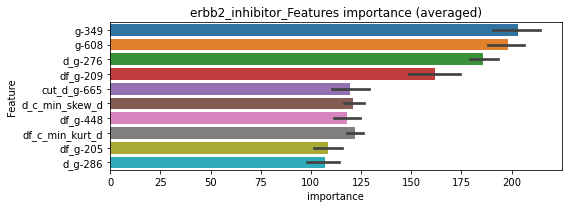

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000382783	valid_1's binary_logloss: 0.00163592
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000385979	valid_1's binary_logloss: 0.00163166
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000388119	valid_1's binary_logloss: 0.000904339
Training until validation scores don't improve for 30 rounds


erbb2_inhibitor logloss: 0.0012847531253729694


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000397627	valid_1's binary_logloss: 0.000965173
neg labels: 3289 → selected neg labels: 3270


estrogen_receptor_agonist, len(trt): 158, len(othr): 3270, target_rate: 0.0066348 → Adj_target_rate: 0.0062095
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0184914	valid_1's binary_logloss: 0.148189
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00583083	valid_1's binary_logloss: 0.139481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192102	valid_1's binary_logloss: 0.143266
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00950672	valid_1's binary_logloss: 0.141104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192827	valid_1's binary_logloss: 0.0970869
[600]	training's binary_logloss: 0.00321904	valid_1's binary_logloss: 0.0837992
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00367621	valid_1's binary_logloss: 0.0834384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0186212	valid_1's binary_logloss: 0.149176


1 / 3 AUC score:0.971
y_Threshold: 0.0318664, Threshold: 0.2792188, pos_neg_ratio: 0.8000000
Remove_noisy_data: 233 → Positive_corect_labels: 603/3691
p_label_rate: 0.0100452 Vs.target_rate: 0.00663, Num_p_label: 40.0, conf_0:0.19545, conf_1:0.36298
Num_p_label: 40.0, Expected: 26.4, Adj_threshold_1: 0.2792188


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.0119533	valid_1's binary_logloss: 0.147046


Num_p_label: 39.0, Expected: 26.4, Adj_threshold_2: 0.2992188
threshold: 0.2992188, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 603.0/3691, y_label_rate: 0.1633704
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0114057	valid_1's binary_logloss: 0.0982919
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.0037145	valid_1's binary_logloss: 0.0912139
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127113	valid_1's binary_logloss: 0.0802703
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.0036301	valid_1's binary_logloss: 0.0706929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132668	valid_1's binary_logloss: 0.0694005
[600]	training's binary_logloss: 0.00210652	valid_1's binary_logloss: 0.0519562
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.00140656	valid_1's binary_logloss: 0.0506264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124945	valid_1's binary_logloss: 0.0763121
Early stopping, b

2 / 3 AUC score:0.997
y_Threshold: 0.0486540, Threshold: 0.2992188, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 578.0/3641
p_label_rate: 0.0198393 Vs.target_rate: 0.00663, Num_p_label: 79.0, conf_0:0.23938, conf_1:0.35906
Num_p_label: 79.0, Expected: 26.4, Adj_threshold_1: 0.2992188
Num_p_label: 70.0, Expected: 26.4, Adj_threshold_2: 0.3192188
Num_p_label: 66.0, Expected: 26.4, Adj_threshold_3: 0.3392188
Num_p_label: 64.0, Expected: 26.4, Adj_threshold_4: 0.3592188
Num_p_label: 59.0, Expected: 26.4, Adj_threshold_5: 0.3792188
Num_p_label: 56.0, Expected: 26.4, Adj_threshold_6: 0.3992188
Num_p_label: 52.0, Expected: 26.4, Adj_threshold_7: 0.4192188
Num_p_label: 50.0, Expected: 26.4, Adj_threshold_8: 0.4392188
Num_p_label: 49.0, Expected: 26.4, Adj_threshold_9: 0.4592188
Num_p_label: 49.0, Expected: 26.4, Adj_threshold_10: 0.4792188
threshold: 0.4992188, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 578.0/3641, y_label_rate: 0.1587476

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0100304	valid_1's binary_logloss: 0.0840341
[600]	training's binary_logloss: 0.00170417	valid_1's binary_logloss: 0.0765455
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.0018081	valid_1's binary_logloss: 0.0763049
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00941981	valid_1's binary_logloss: 0.0680322
[600]	training's binary_logloss: 0.00163152	valid_1's binary_logloss: 0.0554657
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00174322	valid_1's binary_logloss: 0.0552462
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010313	valid_1's binary_logloss: 0.0530724
[600]	training's binary_logloss: 0.00176812	valid_1's binary_logloss: 0.0381095
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000984038	valid_1's binary_logloss: 0.035

3 / 3 AUC score:0.996
y_Threshold: 0.0389763, Threshold: 0.4992188, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 566.0/3617
p_label_rate: 0.0180814 Vs.target_rate: 0.00663, Num_p_label: 72.0, conf_0:0.44930, conf_1:0.54914
Num_p_label: 72.0, Expected: 26.4, Adj_threshold_1: 0.4992188
Num_p_label: 69.0, Expected: 26.4, Adj_threshold_2: 0.5192188
Num_p_label: 65.0, Expected: 26.4, Adj_threshold_3: 0.5392188
Num_p_label: 62.0, Expected: 26.4, Adj_threshold_4: 0.5592188
Num_p_label: 61.0, Expected: 26.4, Adj_threshold_5: 0.5792188
Num_p_label: 56.0, Expected: 26.4, Adj_threshold_6: 0.5992188
Num_p_label: 54.0, Expected: 26.4, Adj_threshold_7: 0.6192188
Num_p_label: 53.0, Expected: 26.4, Adj_threshold_8: 0.6392188
Num_p_label: 50.0, Expected: 26.4, Adj_threshold_9: 0.6592188
Num_p_label: 49.0, Expected: 26.4, Adj_threshold_10: 0.6792188
threshold: 0.6992188, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 566.0/3617, y_label_rate: 0.1564833

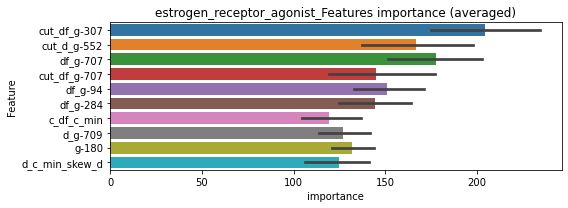

len(train_index) : 2712
len(valid_index) : 905
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2713
len(valid_index) : 904
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[394]	training's binary_logloss: 0.00391659	valid_1's binary_logloss: 0.0600672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00186515	valid_1's binary_logloss: 0.061472


len(train_index) : 2713
len(valid_index) : 904
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000920886	valid_1's binary_logloss: 0.0284561


len(train_index) : 2713
len(valid_index) : 904
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00113984	valid_1's binary_logloss: 0.051216


estrogen_receptor_agonist logloss: 0.050305509220446


neg labels: 3289 → selected neg labels: 3283


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3283, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401974	valid_1's binary_logloss: 0.0201129
[600]	training's binary_logloss: 0.000765891	valid_1's binary_logloss: 0.013418
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000789055	valid_1's binary_logloss: 0.0132691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00407638	valid_1's binary_logloss: 0.0193513
[600]	training's binary_logloss: 0.00077669	valid_1's binary_logloss: 0.0114329
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000836412	valid_1's binary_logloss: 0.0114186
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433854	valid_1's binary_logloss: 0.0132725
[600]	training's binary_logloss: 0.000814612	valid_1's binary_logloss: 0.00578828
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000645633	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0083062, Threshold: 0.1855112, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00164204	valid_1's binary_logloss: 0.0240866


p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.12986, conf_1:0.24116
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.1855112
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_2: 0.2055112
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.2255112
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_4: 0.2455112
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_5: 0.2655112
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_6: 0.2855112
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_7: 0.3055112
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_8: 0.3255112
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_9: 0.3455112
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_10: 0.3655112
threshold: 0.3855112, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00384043	valid_1's binary_logloss: 0.0193117
[600]	training's binary_logloss: 0.000741149	valid_1's binary_logloss: 0.0129467
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000665563	valid_1's binary_logloss: 0.012587
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00393219	valid_1's binary_logloss: 0.016713
[600]	training's binary_logloss: 0.000763406	valid_1's binary_logloss: 0.00963497
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000644668	valid_1's binary_logloss: 0.00934104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00405027	valid_1's binary_logloss: 0.0126076
[600]	training's binary_logloss: 0.000778203	valid_1's binary_logloss: 0.0057154
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000603829	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0383431, Threshold: 0.3855112, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0095429 Vs.target_rate: 0.00202, Num_p_label: 38.0, conf_0:0.30841, conf_1:0.46261
Num_p_label: 38.0, Expected: 8.0, Adj_threshold_1: 0.3855112
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.4055112
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_3: 0.4255112
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_4: 0.4455112
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_5: 0.4655112
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_6: 0.4855112
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_7: 0.5055112
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_8: 0.5255112
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_9: 0.5455112
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_10: 0.5655112
threshold: 0.5655112, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3801, y_label_rate: 0.1717969
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00354575	valid_1's binary_logloss: 0.0341097
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.0010629	valid_1's binary_logloss: 0.0302561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00366519	valid_1's binary_logloss: 0.0115969
[600]	training's binary_logloss: 0.000734993	valid_1's binary_logloss: 0.00580217
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000641812	valid_1's binary_logloss: 0.00560551
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362766	valid_1's binary_logloss: 0.0190194
[600]	training's binary_logloss: 0.000726957	valid_1's binary_logloss: 0.012304
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000669342	valid_1's binary_logloss: 0.0120539
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0313570, Threshold: 0.5655112, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0070316 Vs.target_rate: 0.00202, Num_p_label: 28.0, conf_0:0.50000, conf_1:0.62206
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_1: 0.5655112
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_2: 0.5855112
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_3: 0.6055112
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_4: 0.6255112
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_5: 0.6455112
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_6: 0.6655112
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_7: 0.6855112
threshold: 0.6855112, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3797, y_label_rate: 0.1714511


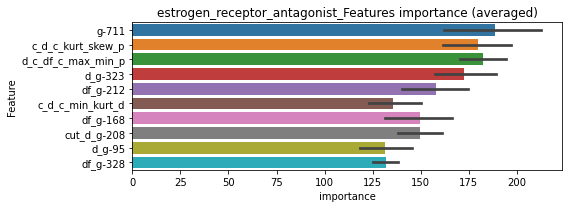

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000621143	valid_1's binary_logloss: 0.0115993


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000615317	valid_1's binary_logloss: 0.00641109


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000624179	valid_1's binary_logloss: 0.00943439


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000711877	valid_1's binary_logloss: 0.0103007


estrogen_receptor_antagonist logloss: 0.009442948391605666


neg labels: 3289 → selected neg labels: 3284


faah_inhibitor, len(trt): 36, len(othr): 3284, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273113	valid_1's binary_logloss: 0.0113614
[600]	training's binary_logloss: 0.000582337	valid_1's binary_logloss: 0.0054717
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000480402	valid_1's binary_logloss: 0.00507136
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270592	valid_1's binary_logloss: 0.00918361
[600]	training's binary_logloss: 0.000575807	valid_1's binary_logloss: 0.00418256
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000502139	valid_1's binary_logloss: 0.00397308
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273342	valid_1's binary_logloss: 0.00859268
[600]	training's binary_logloss: 0.000596871	valid_1's binary_logloss: 0.0039585
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000516614	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0041798, Threshold: 0.0160373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01123, conf_1:0.02085
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0160373
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_2: 0.0360373
threshold: 0.0360373, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250915	valid_1's binary_logloss: 0.00927318
[600]	training's binary_logloss: 0.000554056	valid_1's binary_logloss: 0.00431223
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000466259	valid_1's binary_logloss: 0.00414869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025297	valid_1's binary_logloss: 0.00832181
[600]	training's binary_logloss: 0.000553599	valid_1's binary_logloss: 0.00368654
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000471289	valid_1's binary_logloss: 0.00340489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002557	valid_1's binary_logloss: 0.00784272
[600]	training's binary_logloss: 0.000561786	valid_1's binary_logloss: 0.00387379
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000465927	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0401970, Threshold: 0.0360373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00151, Num_p_label: 31.0, conf_0:0.02883, conf_1:0.04324
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_1: 0.0360373
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0560373
threshold: 0.0560373, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00250915	valid_1's binary_logloss: 0.00927318
[600]	training's binary_logloss: 0.000554056	valid_1's binary_logloss: 0.00431223
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000466259	valid_1's binary_logloss: 0.00414869
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025297	valid_1's binary_logloss: 0.00832181
[600]	training's binary_logloss: 0.000553599	valid_1's binary_logloss: 0.00368654
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000471289	valid_1's binary_logloss: 0.00340489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002557	valid_1's binary_logloss: 0.00784272
[600]	training's binary_logloss: 0.000561786	valid_1's binary_logloss: 0.00387379
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000465927	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0401970, Threshold: 0.0560373, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151, Num_p_label: 15.0, conf_0:0.05043, conf_1:0.06164
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.0560373
threshold: 0.0560373, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


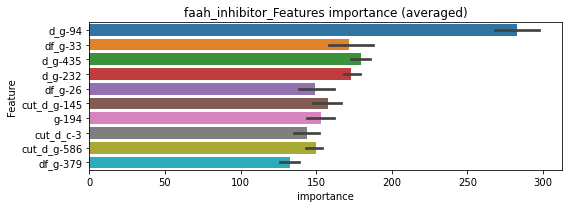

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000495918	valid_1's binary_logloss: 0.00424125


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000484178	valid_1's binary_logloss: 0.00425918


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000484466	valid_1's binary_logloss: 0.00340694


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00048456	valid_1's binary_logloss: 0.00398066


faah_inhibitor logloss: 0.003974297862649347


neg labels: 3289 → selected neg labels: 3288


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001216	valid_1's binary_logloss: 0.00384942
[600]	training's binary_logloss: 0.000358318	valid_1's binary_logloss: 0.0021156
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000363063	valid_1's binary_logloss: 0.00211185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124087	valid_1's binary_logloss: 0.0033974
[600]	training's binary_logloss: 0.000361187	valid_1's binary_logloss: 0.00144259
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000361353	valid_1's binary_logloss: 0.00144218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121903	valid_1's binary_logloss: 0.0024179
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000373148	valid_1's binary_logloss: 0.000919371
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0019161, Threshold: 0.0078872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00552, conf_1:0.01025
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0078872
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0278872


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000383505	valid_1's binary_logloss: 0.00507545


threshold: 0.0278872, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011786	valid_1's binary_logloss: 0.00409975
[600]	training's binary_logloss: 0.000347149	valid_1's binary_logloss: 0.0024734
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000345983	valid_1's binary_logloss: 0.0024647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001142	valid_1's binary_logloss: 0.00215566
[600]	training's binary_logloss: 0.000352137	valid_1's binary_logloss: 0.00084282
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000349523	valid_1's binary_logloss: 0.000835212
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115203	valid_1's binary_logloss: 0.00177203
[600]	training's binary_logloss: 0.000351187	valid_1's binary_logloss: 0.000630132
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000351187	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0107235, Threshold: 0.0278872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0072828 Vs.target_rate: 0.00076, Num_p_label: 29.0, conf_0:0.02231, conf_1:0.03346
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.0278872
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0478872
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0678872
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.0878872
threshold: 0.0878872, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000559414	valid_1's binary_logloss: 0.0072925


positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00106334	valid_1's binary_logloss: 0.00410427
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000361344	valid_1's binary_logloss: 0.00281903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00111785	valid_1's binary_logloss: 0.00251572
[600]	training's binary_logloss: 0.000351142	valid_1's binary_logloss: 0.00115333
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000351526	valid_1's binary_logloss: 0.00115235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110997	valid_1's binary_logloss: 0.00173622
[600]	training's binary_logloss: 0.000346844	valid_1's binary_logloss: 0.000613671
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000345559	valid_1's binary_logloss: 0.000611636
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.0201932, Threshold: 0.0878872, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.07910, conf_1:0.09668
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0878872


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000357458	valid_1's binary_logloss: 0.00345246


threshold: 0.0878872, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


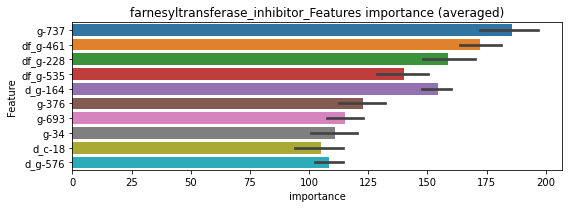

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0003496	valid_1's binary_logloss: 0.00240535


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000352012	valid_1's binary_logloss: 0.00127792
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000345704	valid_1's binary_logloss: 0.000614313
Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.0017237652283780647


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000347773	valid_1's binary_logloss: 0.00259838
neg labels: 3289 → selected neg labels: 3284


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165998	valid_1's binary_logloss: 0.0104744
[600]	training's binary_logloss: 0.000422313	valid_1's binary_logloss: 0.0083317
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000411884	valid_1's binary_logloss: 0.00830334
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166949	valid_1's binary_logloss: 0.00764471
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000551535	valid_1's binary_logloss: 0.00513646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169502	valid_1's binary_logloss: 0.00379052
[600]	training's binary_logloss: 0.000425743	valid_1's binary_logloss: 0.0013875
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.00041561	valid_1's binary_logloss: 0.00136199
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0026428, Threshold: 0.0117837, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00825, conf_1:0.01532
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0117837
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_2: 0.0317837
threshold: 0.0317837, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149331	valid_1's binary_logloss: 0.0117885
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000416213	valid_1's binary_logloss: 0.00836347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156377	valid_1's binary_logloss: 0.00315134
[600]	training's binary_logloss: 0.000415068	valid_1's binary_logloss: 0.00126895
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000412973	valid_1's binary_logloss: 0.00126566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159434	valid_1's binary_logloss: 0.00429932
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000426586	valid_1's binary_logloss: 0.00260198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154294	valid_1's binary_logloss: 0.00818127


2 / 3 AUC score:1.000
y_Threshold: 0.0249342, Threshold: 0.0317837, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000406028	valid_1's binary_logloss: 0.00482969
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000412527	valid_1's binary_logloss: 0.0047863


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0082873 Vs.target_rate: 0.00105, Num_p_label: 33.0, conf_0:0.02543, conf_1:0.03814
Num_p_label: 33.0, Expected: 4.2, Adj_threshold_1: 0.0317837
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_2: 0.0517837
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_3: 0.0717837
threshold: 0.0717837, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00149331	valid_1's binary_logloss: 0.0117885
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000416213	valid_1's binary_logloss: 0.00836347
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00156377	valid_1's binary_logloss: 0.00315134
[600]	training's binary_logloss: 0.000415068	valid_1's binary_logloss: 0.00126895
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000412973	valid_1's binary_logloss: 0.00126566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159434	valid_1's binary_logloss: 0.00429932
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000426586	valid_1's binary_logloss: 0.00260198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154294	valid_1's binary_logloss: 0.00818127


3 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000406028	valid_1's binary_logloss: 0.00482969
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000412527	valid_1's binary_logloss: 0.0047863


y_Threshold: 0.0249342, Threshold: 0.0717837, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0022602 Vs.target_rate: 0.00105, Num_p_label: 9.0, conf_0:0.06461, conf_1:0.07896
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_1: 0.0717837
threshold: 0.0717837, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


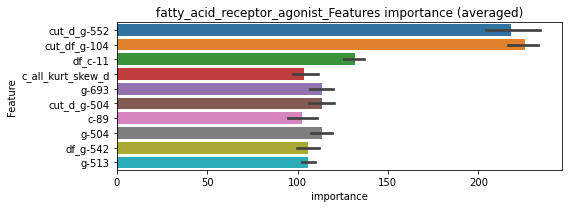

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000407517	valid_1's binary_logloss: 0.00796645


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000410092	valid_1's binary_logloss: 0.00128936


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000425657	valid_1's binary_logloss: 0.00269894


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


fatty_acid_receptor_agonist logloss: 0.004052598758389278


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00041765	valid_1's binary_logloss: 0.00425443
neg labels: 3289 → selected neg labels: 3284


fgfr_inhibitor, len(trt): 50, len(othr): 3284, target_rate: 0.0020996 → Adj_target_rate: 0.0023352
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00461407	valid_1's binary_logloss: 0.0215668
[600]	training's binary_logloss: 0.000825255	valid_1's binary_logloss: 0.0122428
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000618719	valid_1's binary_logloss: 0.0117705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0047854	valid_1's binary_logloss: 0.0178828
[600]	training's binary_logloss: 0.000837194	valid_1's binary_logloss: 0.00799823
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000592618	valid_1's binary_logloss: 0.0070518
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00500045	valid_1's binary_logloss: 0.0113665
[600]	training's binary_logloss: 0.000884698	valid_1's binary_logloss: 0.00404487
Early stopping, best iteration is:
[844]	training's binary_logloss: 0.000607686	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0057171, Threshold: 0.0208381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00210, Num_p_label: 40.0, conf_0:0.01459, conf_1:0.02709
Num_p_label: 40.0, Expected: 8.4, Adj_threshold_1: 0.0208381
Num_p_label: 22.0, Expected: 8.4, Adj_threshold_2: 0.0408381
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_3: 0.0608381
threshold: 0.0608381, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044205	valid_1's binary_logloss: 0.0193505
[600]	training's binary_logloss: 0.000813188	valid_1's binary_logloss: 0.01168
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000669153	valid_1's binary_logloss: 0.0110777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043085	valid_1's binary_logloss: 0.0166363
[600]	training's binary_logloss: 0.000823388	valid_1's binary_logloss: 0.00849079
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000602765	valid_1's binary_logloss: 0.00773019
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432703	valid_1's binary_logloss: 0.0131131
[600]	training's binary_logloss: 0.000811254	valid_1's binary_logloss: 0.00501468
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.00057518	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0233652, Threshold: 0.0608381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0075339 Vs.target_rate: 0.00210, Num_p_label: 30.0, conf_0:0.04867, conf_1:0.07301
Num_p_label: 30.0, Expected: 8.4, Adj_threshold_1: 0.0608381
Num_p_label: 21.0, Expected: 8.4, Adj_threshold_2: 0.0808381
Num_p_label: 13.0, Expected: 8.4, Adj_threshold_3: 0.1008381
threshold: 0.1008381, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00426383	valid_1's binary_logloss: 0.016372
[600]	training's binary_logloss: 0.000796332	valid_1's binary_logloss: 0.00767201
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000601214	valid_1's binary_logloss: 0.00707027
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00423198	valid_1's binary_logloss: 0.0201788
[600]	training's binary_logloss: 0.000789341	valid_1's binary_logloss: 0.0118455
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000646146	valid_1's binary_logloss: 0.0110882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00427262	valid_1's binary_logloss: 0.0215541
[600]	training's binary_logloss: 0.000797633	valid_1's binary_logloss: 0.0119331
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000621866	valid_1's binary_logl

3 / 3 AUC score:1.000
y_Threshold: 0.0391754, Threshold: 0.1008381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00210, Num_p_label: 16.0, conf_0:0.09075, conf_1:0.11092
Num_p_label: 16.0, Expected: 8.4, Adj_threshold_1: 0.1008381
threshold: 0.1008381, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


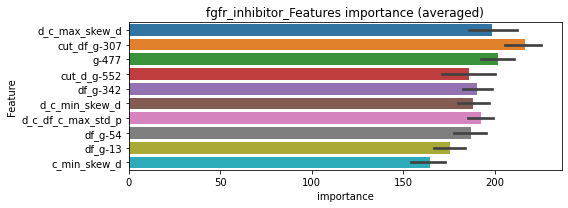

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000603393	valid_1's binary_logloss: 0.00738466


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000609164	valid_1's binary_logloss: 0.0109568


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000597517	valid_1's binary_logloss: 0.0110317


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000587829	valid_1's binary_logloss: 0.00977777


fgfr_inhibitor logloss: 0.00979223376762278


neg labels: 3289 → selected neg labels: 3258


flt3_inhibitor, len(trt): 279, len(othr): 3258, target_rate: 0.0117158 → Adj_target_rate: 0.0100684
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0426258	valid_1's binary_logloss: 0.25517
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.0273391	valid_1's binary_logloss: 0.249671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0503232	valid_1's binary_logloss: 0.261257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0435968	valid_1's binary_logloss: 0.258774
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.0383621	valid_1's binary_logloss: 0.255625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0464905	valid_1's binary_logloss: 0.219172
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.0118396	valid_1's binary_logloss: 0.20408


1 / 3 AUC score:0.895
y_Threshold: 0.0950736, Threshold: 0.7405408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 423 → Positive_corect_labels: 505/3486
p_label_rate: 0.0100452 Vs.target_rate: 0.01172, Num_p_label: 40.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7405408, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 505.0/3486, y_label_rate: 0.1448652
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202812	valid_1's binary_logloss: 0.170914
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00794998	valid_1's binary_logloss: 0.159217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.022245	valid_1's binary_logloss: 0.117338
[600]	training's binary_logloss: 0.00343632	valid_1's binary_logloss: 0.0939166
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00292321	valid_1's binary_logloss: 0.0929324
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0202168	valid_1's binary_logloss: 0.127972
[600]	training's binary_logloss: 0.00325912	valid_1's binary_logloss: 0.112895
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00237376	valid_1's binary_logloss: 0.111289
Training until validation scores don't improve for 30 rounds
[300]	training's bina

2 / 3 AUC score:0.984
y_Threshold: 0.0674157, Threshold: 0.7405408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 454.0/3384
p_label_rate: 0.0173280 Vs.target_rate: 0.01172, Num_p_label: 69.0, conf_0:0.50000, conf_1:0.80000
threshold: 0.7405408, positive_p_label: 69.0/3982, p_label_rate: 0.0173280
positive_y_label: 454.0/3384, y_label_rate: 0.1341608
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0151009	valid_1's binary_logloss: 0.132579
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00494727	valid_1's binary_logloss: 0.123216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156241	valid_1's binary_logloss: 0.108011
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00308572	valid_1's binary_logloss: 0.0954217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0148722	valid_1's binary_logloss: 0.117835
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00285449	valid_1's binary_logloss: 0.102448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015259	valid_1's binary_logloss: 0.101962
[600]	training's binary_logloss: 0.00250062	valid_1's binary_logloss: 0.0841218
Early stopping, best i

3 / 3 AUC score:0.992
y_Threshold: 0.0550564, Threshold: 0.7405408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 421.0/3318
p_label_rate: 0.0226017 Vs.target_rate: 0.01172, Num_p_label: 90.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 90.0, Expected: 46.7, Adj_threshold_1: 0.7405408
Num_p_label: 88.0, Expected: 46.7, Adj_threshold_2: 0.7605408
Num_p_label: 85.0, Expected: 46.7, Adj_threshold_3: 0.7805408
threshold: 0.7805408, positive_p_label: 85.0/3982, p_label_rate: 0.0213461
positive_y_label: 421.0/3318, y_label_rate: 0.1268837


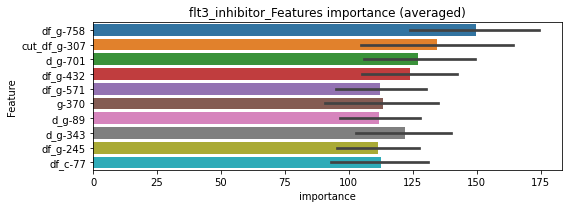

len(train_index) : 2488
len(valid_index) : 830
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00321749	valid_1's binary_logloss: 0.0962263


len(train_index) : 2488
len(valid_index) : 830
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2489
len(valid_index) : 829
================================= fold 3/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.004744	valid_1's binary_logloss: 0.083151
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00278546	valid_1's binary_logloss: 0.0908005


len(train_index) : 2489
len(valid_index) : 829
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00308642	valid_1's binary_logloss: 0.101139


flt3_inhibitor logloss: 0.09282736383880932


neg labels: 3289 → selected neg labels: 3289


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3289, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012366	valid_1's binary_logloss: 0.0028521
[600]	training's binary_logloss: 0.000356705	valid_1's binary_logloss: 0.00120222
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00035293	valid_1's binary_logloss: 0.00119132
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121328	valid_1's binary_logloss: 0.0036907
[600]	training's binary_logloss: 0.000357926	valid_1's binary_logloss: 0.0016945
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000357926	valid_1's binary_logloss: 0.0016945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126811	valid_1's binary_logloss: 0.00213242
[600]	training's binary_logloss: 0.000361263	valid_1's binary_logloss: 0.000806432
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000354494	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0018750, Threshold: 0.0086520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00606, conf_1:0.01125
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0086520
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0286520
threshold: 0.0286520, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112161	valid_1's binary_logloss: 0.00283655
[600]	training's binary_logloss: 0.000339451	valid_1's binary_logloss: 0.00135215
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000336399	valid_1's binary_logloss: 0.00134632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112304	valid_1's binary_logloss: 0.00271985
[600]	training's binary_logloss: 0.000339799	valid_1's binary_logloss: 0.00121107
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000342342	valid_1's binary_logloss: 0.00120645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001146	valid_1's binary_logloss: 0.00189929
[600]	training's binary_logloss: 0.000344924	valid_1's binary_logloss: 0.00068239
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000336422	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.1520281, Threshold: 0.0286520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


[600]	training's binary_logloss: 0.000344957	valid_1's binary_logloss: 0.000892917
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000344957	valid_1's binary_logloss: 0.000892917


p_label_rate: 0.0057760 Vs.target_rate: 0.00076, Num_p_label: 23.0, conf_0:0.02292, conf_1:0.03438
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_1: 0.0286520
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0486520
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.0686520
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.0886520
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1086520
threshold: 0.1086520, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112161	valid_1's binary_logloss: 0.00283655
[600]	training's binary_logloss: 0.000339451	valid_1's binary_logloss: 0.00135215
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000336399	valid_1's binary_logloss: 0.00134632
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112304	valid_1's binary_logloss: 0.00271985
[600]	training's binary_logloss: 0.000339799	valid_1's binary_logloss: 0.00121107
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000342342	valid_1's binary_logloss: 0.00120645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001146	valid_1's binary_logloss: 0.00189929
[600]	training's binary_logloss: 0.000344924	valid_1's binary_logloss: 0.00068239
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000336422	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.1520281, Threshold: 0.1086520, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


[600]	training's binary_logloss: 0.000344957	valid_1's binary_logloss: 0.000892917
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000344957	valid_1's binary_logloss: 0.000892917


p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.09779, conf_1:0.11952
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1086520
threshold: 0.1086520, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


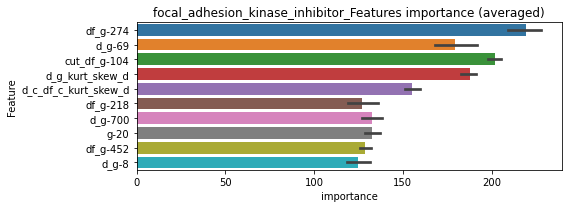

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000338938	valid_1's binary_logloss: 0.00152727
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000348016	valid_1's binary_logloss: 0.00136609
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000342413	valid_1's binary_logloss: 0.000766339
Training until validation scores don't improve for 30 rounds


focal_adhesion_kinase_inhibitor logloss: 0.0011103467637567073


Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000333459	valid_1's binary_logloss: 0.000780715
neg labels: 3289 → selected neg labels: 3288


free_radical_scavenger, len(trt): 18, len(othr): 3288, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00130666	valid_1's binary_logloss: 0.00323834
[600]	training's binary_logloss: 0.000366219	valid_1's binary_logloss: 0.00132266
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000360578	valid_1's binary_logloss: 0.00130486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00131431	valid_1's binary_logloss: 0.00282851
[600]	training's binary_logloss: 0.000366861	valid_1's binary_logloss: 0.000982709
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00035579	valid_1's binary_logloss: 0.000955521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135216	valid_1's binary_logloss: 0.00230609
[600]	training's binary_logloss: 0.000370487	valid_1's binary_logloss: 0.000762415
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000367504	valid_1's bi

1 / 3 AUC score:1.000


[600]	training's binary_logloss: 0.000370199	valid_1's binary_logloss: 0.0020008
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000374214	valid_1's binary_logloss: 0.00199742


y_Threshold: 0.0020881, Threshold: 0.0087965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00616, conf_1:0.01144
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0087965
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0287965
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.0487965
threshold: 0.0487965, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122603	valid_1's binary_logloss: 0.00360782
[600]	training's binary_logloss: 0.00035571	valid_1's binary_logloss: 0.00156659
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000356398	valid_1's binary_logloss: 0.00156591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012449	valid_1's binary_logloss: 0.00230719
[600]	training's binary_logloss: 0.00035512	valid_1's binary_logloss: 0.000831861
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000348633	valid_1's binary_logloss: 0.000826832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001246	valid_1's binary_logloss: 0.00179906
[600]	training's binary_logloss: 0.000363611	valid_1's binary_logloss: 0.000609682
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000363611	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0875814, Threshold: 0.0487965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00076, Num_p_label: 19.0, conf_0:0.03904, conf_1:0.05856
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0487965
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0687965


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00036797	valid_1's binary_logloss: 0.00164478


Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.0887965
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1087965
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.1287965
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.1487965
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_7: 0.1687965
threshold: 0.1687965, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00122603	valid_1's binary_logloss: 0.00360782
[600]	training's binary_logloss: 0.00035571	valid_1's binary_logloss: 0.00156659
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000356398	valid_1's binary_logloss: 0.00156591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0012449	valid_1's binary_logloss: 0.00230719
[600]	training's binary_logloss: 0.00035512	valid_1's binary_logloss: 0.000831861
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000348633	valid_1's binary_logloss: 0.000826832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001246	valid_1's binary_logloss: 0.00179906
[600]	training's binary_logloss: 0.000363611	valid_1's binary_logloss: 0.000609682
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000363611	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0875814, Threshold: 0.1687965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.15192, conf_1:0.18568
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1687965


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00036797	valid_1's binary_logloss: 0.00164478


threshold: 0.1687965, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


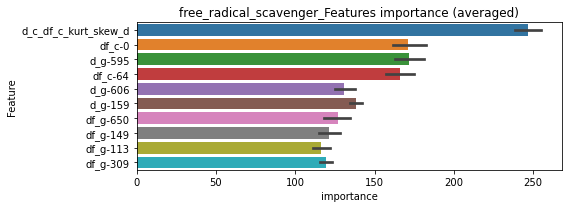

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000360766	valid_1's binary_logloss: 0.00156815


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000360476	valid_1's binary_logloss: 0.000819796
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000368893	valid_1's binary_logloss: 0.000618424
Training until validation scores don't improve for 30 rounds


free_radical_scavenger logloss: 0.0012487103728448879


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000372968	valid_1's binary_logloss: 0.00198813
neg labels: 3289 → selected neg labels: 3287


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3287, target_rate: 0.0009658 → Adj_target_rate: 0.0012069
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182756	valid_1's binary_logloss: 0.00427648
[600]	training's binary_logloss: 0.00043187	valid_1's binary_logloss: 0.0016745
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000424404	valid_1's binary_logloss: 0.00165683
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167871	valid_1's binary_logloss: 0.0108444
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000435623	valid_1's binary_logloss: 0.00763549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017829	valid_1's binary_logloss: 0.00303503
[600]	training's binary_logloss: 0.000432347	valid_1's binary_logloss: 0.000929425
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000421244	valid_1's binary_logloss: 0.000911226
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:1.000
y_Threshold: 0.0028352, Threshold: 0.0103117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00097, Num_p_label: 40.0, conf_0:0.00722, conf_1:0.01341
Num_p_label: 40.0, Expected: 3.8, Adj_threshold_1: 0.0103117
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_2: 0.0303117
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_3: 0.0503117
threshold: 0.0503117, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165543	valid_1's binary_logloss: 0.00358535
[600]	training's binary_logloss: 0.000426341	valid_1's binary_logloss: 0.00139453
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415606	valid_1's binary_logloss: 0.00137673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164109	valid_1's binary_logloss: 0.0108759
[600]	training's binary_logloss: 0.00041554	valid_1's binary_logloss: 0.00739014
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000401176	valid_1's binary_logloss: 0.00730188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164194	valid_1's binary_logloss: 0.0027483
[600]	training's binary_logloss: 0.000421501	valid_1's binary_logloss: 0.000868576
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000410214	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0322681, Threshold: 0.0503117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00097, Num_p_label: 20.0, conf_0:0.04025, conf_1:0.06037
Num_p_label: 20.0, Expected: 3.8, Adj_threshold_1: 0.0503117
Num_p_label: 13.0, Expected: 3.8, Adj_threshold_2: 0.0703117
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_3: 0.0903117
threshold: 0.0903117, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165543	valid_1's binary_logloss: 0.00358535
[600]	training's binary_logloss: 0.000426341	valid_1's binary_logloss: 0.00139453
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415606	valid_1's binary_logloss: 0.00137673
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164109	valid_1's binary_logloss: 0.0108759
[600]	training's binary_logloss: 0.00041554	valid_1's binary_logloss: 0.00739014
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000401176	valid_1's binary_logloss: 0.00730188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164194	valid_1's binary_logloss: 0.0027483
[600]	training's binary_logloss: 0.000421501	valid_1's binary_logloss: 0.000868576
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000410214	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0322681, Threshold: 0.0903117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00097, Num_p_label: 9.0, conf_0:0.08128, conf_1:0.09934
Num_p_label: 9.0, Expected: 3.8, Adj_threshold_1: 0.0903117
threshold: 0.0903117, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


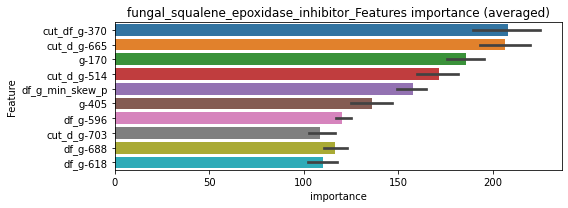

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000427792	valid_1's binary_logloss: 0.00147741
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000411597	valid_1's binary_logloss: 0.0069501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000439257	valid_1's binary_logloss: 0.000896508


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


fungal_squalene_epoxidase_inhibitor logloss: 0.00275860645576479


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000417868	valid_1's binary_logloss: 0.0017104
neg labels: 3289 → selected neg labels: 3271


gaba_receptor_agonist, len(trt): 106, len(othr): 3271, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113857	valid_1's binary_logloss: 0.102078
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00314365	valid_1's binary_logloss: 0.0910223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125302	valid_1's binary_logloss: 0.0661473
[600]	training's binary_logloss: 0.00190975	valid_1's binary_logloss: 0.0495203
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00176328	valid_1's binary_logloss: 0.0493505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129671	valid_1's binary_logloss: 0.0554577
[600]	training's binary_logloss: 0.0019869	valid_1's binary_logloss: 0.0387337
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.00112609	valid_1's binary_logloss: 0.03707
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.997
y_Threshold: 0.0191819, Threshold: 0.1140790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 153 → Positive_corect_labels: 643/3772
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.07986, conf_1:0.14830
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.1140790
Num_p_label: 33.0, Expected: 17.7, Adj_threshold_2: 0.1340790
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_3: 0.1540790
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_4: 0.1740790
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_5: 0.1940790
threshold: 0.1940790, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 643.0/3772, y_label_rate: 0.1704666
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00989465	valid_1's binary_logloss: 0.0638522
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00183122	valid_1's binary_logloss: 0.0501478
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106199	valid_1's binary_logloss: 0.0710143
[600]	training's binary_logloss: 0.00166906	valid_1's binary_logloss: 0.0527837
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000986132	valid_1's binary_logloss: 0.0501924
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0106789	valid_1's binary_logloss: 0.0482664
[600]	training's binary_logloss: 0.00169661	valid_1's binary_logloss: 0.0357044
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.00134062	valid_1's binary_logloss: 0.034614
Training until validation scores don't improve for 30 rounds
[300]	trainin

2 / 3 AUC score:0.999
y_Threshold: 0.0410361, Threshold: 0.1940790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 629.0/3744
p_label_rate: 0.0158212 Vs.target_rate: 0.00445, Num_p_label: 63.0, conf_0:0.15526, conf_1:0.23289
Num_p_label: 63.0, Expected: 17.7, Adj_threshold_1: 0.1940790
Num_p_label: 59.0, Expected: 17.7, Adj_threshold_2: 0.2140790
Num_p_label: 55.0, Expected: 17.7, Adj_threshold_3: 0.2340790
Num_p_label: 54.0, Expected: 17.7, Adj_threshold_4: 0.2540790
Num_p_label: 54.0, Expected: 17.7, Adj_threshold_5: 0.2740790
Num_p_label: 51.0, Expected: 17.7, Adj_threshold_6: 0.2940790
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_7: 0.3140790
Num_p_label: 47.0, Expected: 17.7, Adj_threshold_8: 0.3340790
Num_p_label: 45.0, Expected: 17.7, Adj_threshold_9: 0.3540790
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_10: 0.3740790
threshold: 0.3940790, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 629.0/3744, y_label_rate: 0.1680021

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00909223	valid_1's binary_logloss: 0.0608028
[600]	training's binary_logloss: 0.00149937	valid_1's binary_logloss: 0.0470884
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00121583	valid_1's binary_logloss: 0.0461547
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00903411	valid_1's binary_logloss: 0.0646097
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00171235	valid_1's binary_logloss: 0.0509532
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00995898	valid_1's binary_logloss: 0.0480343
[600]	training's binary_logloss: 0.00154946	valid_1's binary_logloss: 0.0339965
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00102568	valid_1's binary_logloss: 0.0320357
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.999
y_Threshold: 0.0356602, Threshold: 0.3940790, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 621.0/3728
p_label_rate: 0.0110497 Vs.target_rate: 0.00445, Num_p_label: 44.0, conf_0:0.35467, conf_1:0.43349
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_1: 0.3940790
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_2: 0.4140790
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_3: 0.4340790
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_4: 0.4540790
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_5: 0.4740790
Num_p_label: 36.0, Expected: 17.7, Adj_threshold_6: 0.4940790
Num_p_label: 36.0, Expected: 17.7, Adj_threshold_7: 0.5140790
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_8: 0.5340790
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_9: 0.5540790
Num_p_label: 28.0, Expected: 17.7, Adj_threshold_10: 0.5740790
threshold: 0.5940790, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 621.0/3728, y_label_rate: 0.1665773

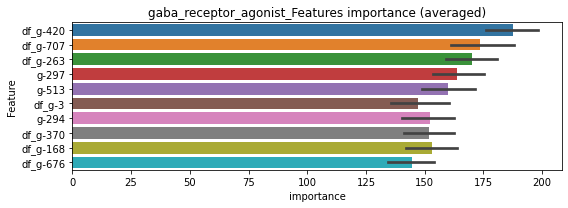

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00108458	valid_1's binary_logloss: 0.0435399


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000998758	valid_1's binary_logloss: 0.0286464


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000877694	valid_1's binary_logloss: 0.0302219


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00154557	valid_1's binary_logloss: 0.0365789


gaba_receptor_agonist logloss: 0.03474677382723654


neg labels: 3289 → selected neg labels: 3266


gaba_receptor_antagonist, len(trt): 165, len(othr): 3266, target_rate: 0.0069287 → Adj_target_rate: 0.0064426
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0214868	valid_1's binary_logloss: 0.139062
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00425024	valid_1's binary_logloss: 0.128313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0191787	valid_1's binary_logloss: 0.125818
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00360262	valid_1's binary_logloss: 0.112109
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021401	valid_1's binary_logloss: 0.133961
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00802934	valid_1's binary_logloss: 0.121691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.020388	valid_1's binary_logloss: 0.137539
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0081719	valid_1's binary_logloss: 

1 / 3 AUC score:0.978
y_Threshold: 0.0345532, Threshold: 0.1221724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 219 → Positive_corect_labels: 609/3700
p_label_rate: 0.0100452 Vs.target_rate: 0.00693, Num_p_label: 40.0, conf_0:0.08552, conf_1:0.15882
threshold: 0.1221724, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 609.0/3700, y_label_rate: 0.1645946
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015047	valid_1's binary_logloss: 0.0975501
[600]	training's binary_logloss: 0.00238022	valid_1's binary_logloss: 0.079979
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00246984	valid_1's binary_logloss: 0.0794006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141362	valid_1's binary_logloss: 0.101046
[600]	training's binary_logloss: 0.0022948	valid_1's binary_logloss: 0.0833215
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00242649	valid_1's binary_logloss: 0.0830983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0153366	valid_1's binary_logloss: 0.0817634
[600]	training's binary_logloss: 0.00250873	valid_1's binary_logloss: 0.06761
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00269961	valid_1's binary_logloss: 0.0674225
T

2 / 3 AUC score:0.997
y_Threshold: 0.0579829, Threshold: 0.1221724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 582.0/3646
p_label_rate: 0.0128076 Vs.target_rate: 0.00693, Num_p_label: 51.0, conf_0:0.09774, conf_1:0.14661
Num_p_label: 51.0, Expected: 27.6, Adj_threshold_1: 0.1221724
Num_p_label: 43.0, Expected: 27.6, Adj_threshold_2: 0.1421724
Num_p_label: 39.0, Expected: 27.6, Adj_threshold_3: 0.1621724
threshold: 0.1621724, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 582.0/3646, y_label_rate: 0.1596270
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124421	valid_1's binary_logloss: 0.081976
[600]	training's binary_logloss: 0.0020187	valid_1's binary_logloss: 0.0672246
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00138476	valid_1's binary_logloss: 0.0654693
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120113	valid_1's binary_logloss: 0.0956553
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00283273	valid_1's binary_logloss: 0.0788331
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126429	valid_1's binary_logloss: 0.0679771
[600]	training's binary_logloss: 0.00206707	valid_1's binary_logloss: 0.0489855
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00145111	valid_1's binary_logloss: 0.0470677
Training until validation scores don't improve for 30 rounds
[300]	training's

3 / 3 AUC score:0.998
y_Threshold: 0.0576383, Threshold: 0.1621724, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 566.0/3614
p_label_rate: 0.0085384 Vs.target_rate: 0.00693, Num_p_label: 34.0, conf_0:0.14596, conf_1:0.17839
threshold: 0.1621724, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 566.0/3614, y_label_rate: 0.1566132


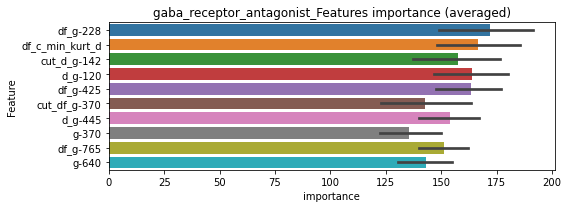

len(train_index) : 2710
len(valid_index) : 904
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00200549	valid_1's binary_logloss: 0.0744646


len(train_index) : 2710
len(valid_index) : 904
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.00168999	valid_1's binary_logloss: 0.0571161


len(train_index) : 2711
len(valid_index) : 903
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00149456	valid_1's binary_logloss: 0.0399595


len(train_index) : 2711
len(valid_index) : 903
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000996542	valid_1's binary_logloss: 0.0522534


gaba_receptor_antagonist logloss: 0.05595385932086365


neg labels: 3289 → selected neg labels: 3284


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3284, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00484253	valid_1's binary_logloss: 0.0386754
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.0015804	valid_1's binary_logloss: 0.0323194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508494	valid_1's binary_logloss: 0.0268473
[600]	training's binary_logloss: 0.00090845	valid_1's binary_logloss: 0.0169724
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000710318	valid_1's binary_logloss: 0.0163117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0055382	valid_1's binary_logloss: 0.0141551
[600]	training's binary_logloss: 0.000948387	valid_1's binary_logloss: 0.00492373
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000711267	valid_1's binary_logloss: 0.00406457
Training until validation scores don't improve for 30 rounds
[300]	tr

1 / 3 AUC score:1.000
y_Threshold: 0.0074556, Threshold: 0.0216069, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.01512, conf_1:0.02809
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0216069
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_2: 0.0416069
threshold: 0.0416069, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455178	valid_1's binary_logloss: 0.0372977
[600]	training's binary_logloss: 0.000839909	valid_1's binary_logloss: 0.0295748
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000877668	valid_1's binary_logloss: 0.0295624
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00509022	valid_1's binary_logloss: 0.0258431
[600]	training's binary_logloss: 0.000890739	valid_1's binary_logloss: 0.0163271
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000698879	valid_1's binary_logloss: 0.0156887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00524937	valid_1's binary_logloss: 0.012225
[600]	training's binary_logloss: 0.000912512	valid_1's binary_logloss: 0.00382913
[900]	training's binary_logloss: 0.000607491	valid_1's binary_logloss: 0.00299932
Early stopping, best

2 / 3 AUC score:1.000
y_Threshold: 0.0271515, Threshold: 0.0416069, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.03329, conf_1:0.04993
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0416069
Num_p_label: 27.0, Expected: 9.4, Adj_threshold_2: 0.0616069
Num_p_label: 17.0, Expected: 9.4, Adj_threshold_3: 0.0816069
threshold: 0.0816069, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00459845	valid_1's binary_logloss: 0.0193316
[600]	training's binary_logloss: 0.000844155	valid_1's binary_logloss: 0.0108151
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.00065766	valid_1's binary_logloss: 0.00998761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463817	valid_1's binary_logloss: 0.0238075
[600]	training's binary_logloss: 0.000850184	valid_1's binary_logloss: 0.0159131
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.00063541	valid_1's binary_logloss: 0.0149918
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498939	valid_1's binary_logloss: 0.0155121
[600]	training's binary_logloss: 0.000884984	valid_1's binary_logloss: 0.00730322
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000613599	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0325808, Threshold: 0.0816069, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0035158 Vs.target_rate: 0.00235, Num_p_label: 14.0, conf_0:0.07345, conf_1:0.08977
threshold: 0.0816069, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


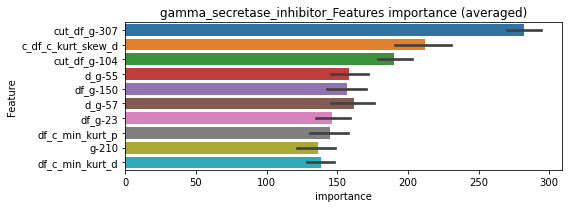

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00074841	valid_1's binary_logloss: 0.0272297


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000668981	valid_1's binary_logloss: 0.0161883


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000925634	valid_1's binary_logloss: 0.0185187


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000685621	valid_1's binary_logloss: 0.0153639


gamma_secretase_inhibitor logloss: 0.01932516798840134


neg labels: 3289 → selected neg labels: 3248


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 3248, target_rate: 0.0111699 → Adj_target_rate: 0.0096682
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.04858	valid_1's binary_logloss: 0.235518
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.0196198	valid_1's binary_logloss: 0.224674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0421686	valid_1's binary_logloss: 0.247072
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.0264073	valid_1's binary_logloss: 0.243811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0460899	valid_1's binary_logloss: 0.201704
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.012349	valid_1's binary_logloss: 0.182972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0439709	valid_1's binary_logloss: 0.246275


1 / 3 AUC score:0.918
y_Threshold: 0.0842304, Threshold: 0.3210009, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.0246923	valid_1's binary_logloss: 0.236834


Remove_noisy_data: 383 → Positive_corect_labels: 523/3514
p_label_rate: 0.0100452 Vs.target_rate: 0.01117, Num_p_label: 40.0, conf_0:0.22470, conf_1:0.41730
threshold: 0.3210009, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 523.0/3514, y_label_rate: 0.1488332
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0226901	valid_1's binary_logloss: 0.133459
[600]	training's binary_logloss: 0.00351246	valid_1's binary_logloss: 0.104411
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.0022964	valid_1's binary_logloss: 0.101599
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0223576	valid_1's binary_logloss: 0.13488
[600]	training's binary_logloss: 0.00352444	valid_1's binary_logloss: 0.113859
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00311702	valid_1's binary_logloss: 0.113271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0230869	valid_1's binary_logloss: 0.150781
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00609	valid_1's binary_logloss: 0.134273
Training until validation scores don't improve for 30 rounds
[300]	training's binary_log

2 / 3 AUC score:0.988
y_Threshold: 0.0666744, Threshold: 0.3210009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 481.0/3430
p_label_rate: 0.0173280 Vs.target_rate: 0.01117, Num_p_label: 69.0, conf_0:0.25680, conf_1:0.38520
Num_p_label: 69.0, Expected: 44.5, Adj_threshold_1: 0.3210009
Num_p_label: 65.0, Expected: 44.5, Adj_threshold_2: 0.3410009
threshold: 0.3410009, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 481.0/3430, y_label_rate: 0.1402332
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187928	valid_1's binary_logloss: 0.115023
[600]	training's binary_logloss: 0.00294072	valid_1's binary_logloss: 0.0889546
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00158708	valid_1's binary_logloss: 0.0858247
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.017976	valid_1's binary_logloss: 0.115671
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00333065	valid_1's binary_logloss: 0.0952333
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174855	valid_1's binary_logloss: 0.149551
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00422196	valid_1's binary_logloss: 0.135959
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179778	valid_1's binary_logloss: 0.121378
[600]	training's bina

3 / 3 AUC score:0.992
y_Threshold: 0.0547132, Threshold: 0.3410009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 448.0/3364
p_label_rate: 0.0193370 Vs.target_rate: 0.01117, Num_p_label: 77.0, conf_0:0.30690, conf_1:0.37510
Num_p_label: 77.0, Expected: 44.5, Adj_threshold_1: 0.3410009
Num_p_label: 74.0, Expected: 44.5, Adj_threshold_2: 0.3610009
Num_p_label: 69.0, Expected: 44.5, Adj_threshold_3: 0.3810009
Num_p_label: 67.0, Expected: 44.5, Adj_threshold_4: 0.4010009
Num_p_label: 65.0, Expected: 44.5, Adj_threshold_5: 0.4210009
threshold: 0.4210009, positive_p_label: 65.0/3982, p_label_rate: 0.0163235
positive_y_label: 448.0/3364, y_label_rate: 0.1331748


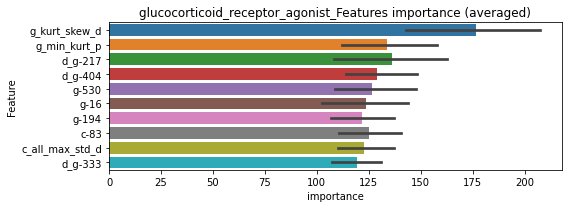

len(train_index) : 2523
len(valid_index) : 841
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00310482	valid_1's binary_logloss: 0.0927713


len(train_index) : 2523
len(valid_index) : 841
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00125404	valid_1's binary_logloss: 0.0624179


len(train_index) : 2523
len(valid_index) : 841
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00269484	valid_1's binary_logloss: 0.0961733


len(train_index) : 2523
len(valid_index) : 841
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00367813	valid_1's binary_logloss: 0.109134


glucocorticoid_receptor_agonist logloss: 0.09012424412509101


neg labels: 3289 → selected neg labels: 3285


glutamate_inhibitor, len(trt): 13, len(othr): 3285, target_rate: 0.0005459 → Adj_target_rate: 0.0007431
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000911481	valid_1's binary_logloss: 0.00220465
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000320042	valid_1's binary_logloss: 0.00100822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000946258	valid_1's binary_logloss: 0.00193804
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000317136	valid_1's binary_logloss: 0.00084531
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00089841	valid_1's binary_logloss: 0.00166378
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000312488	valid_1's binary_logloss: 0.00067177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0009136	valid_1's binary_logloss: 0.00186592
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000317638	

1 / 3 AUC score:1.000
y_Threshold: 0.0013496, Threshold: 0.0044461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00055, Num_p_label: 40.0, conf_0:0.00311, conf_1:0.00578
Num_p_label: 40.0, Expected: 2.2, Adj_threshold_1: 0.0044461
Num_p_label: 6.0, Expected: 2.2, Adj_threshold_2: 0.0244461
Num_p_label: 4.0, Expected: 2.2, Adj_threshold_3: 0.0444461
threshold: 0.0444461, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000847352	valid_1's binary_logloss: 0.0018607
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00031587	valid_1's binary_logloss: 0.000926659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860582	valid_1's binary_logloss: 0.0015025
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000303041	valid_1's binary_logloss: 0.00061106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000847915	valid_1's binary_logloss: 0.0012438
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000310358	valid_1's binary_logloss: 0.000475686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000849105	valid_1's binary_logloss: 0.00183218


2 / 3 AUC score:1.000
y_Threshold: 0.1313975, Threshold: 0.0444461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00055, Num_p_label: 9.0, conf_0:0.03556, conf_1:0.05334
Num_p_label: 9.0, Expected: 2.2, Adj_threshold_1: 0.0444461
Num_p_label: 8.0, Expected: 2.2, Adj_threshold_2: 0.0644461
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_3: 0.0844461


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00030651	valid_1's binary_logloss: 0.000898163


threshold: 0.0844461, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000847352	valid_1's binary_logloss: 0.0018607
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00031587	valid_1's binary_logloss: 0.000926659
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000860582	valid_1's binary_logloss: 0.0015025
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000303041	valid_1's binary_logloss: 0.00061106
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000847915	valid_1's binary_logloss: 0.0012438
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000310358	valid_1's binary_logloss: 0.000475686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000849105	valid_1's binary_logloss: 0.00183218


3 / 3 AUC score:1.000
y_Threshold: 0.1313975, Threshold: 0.0844461, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00055, Num_p_label: 5.0, conf_0:0.07600, conf_1:0.09289
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0844461
threshold: 0.0844461, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00030651	valid_1's binary_logloss: 0.000898163


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


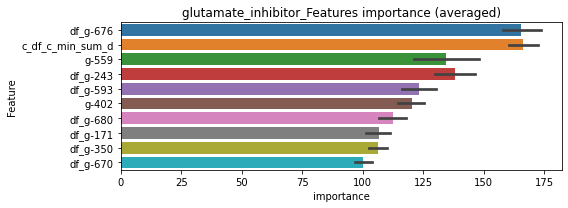

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000311354	valid_1's binary_logloss: 0.000923173
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000310926	valid_1's binary_logloss: 0.000569863
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000308392	valid_1's binary_logloss: 0.000450289
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.0006929478260297963


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000311044	valid_1's binary_logloss: 0.000827833
neg labels: 3289 → selected neg labels: 3283


glutamate_receptor_agonist, len(trt): 74, len(othr): 3283, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00723369	valid_1's binary_logloss: 0.0488787
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00152205	valid_1's binary_logloss: 0.0382405
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00730547	valid_1's binary_logloss: 0.0475191
[600]	training's binary_logloss: 0.00119044	valid_1's binary_logloss: 0.0373836
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00124623	valid_1's binary_logloss: 0.0371748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00778044	valid_1's binary_logloss: 0.0243953
[600]	training's binary_logloss: 0.00126926	valid_1's binary_logloss: 0.0133773
[900]	training's binary_logloss: 0.000727101	valid_1's binary_logloss: 0.0122095
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.00072994	valid_1's binary_logloss: 0

1 / 3 AUC score:0.999
y_Threshold: 0.0115595, Threshold: 0.2257263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.15801, conf_1:0.29344
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.2257263
Num_p_label: 36.0, Expected: 12.4, Adj_threshold_2: 0.2457263
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_3: 0.2657263
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_4: 0.2857263
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_5: 0.3057263
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_6: 0.3257263
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_7: 0.3457263
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_8: 0.3657263
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_9: 0.3857263
Num_p_label: 22.0, Expected: 12.4, Adj_threshold_10: 0.4057263
threshold: 0.4257263, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645117	valid_1's binary_logloss: 0.0368379
[600]	training's binary_logloss: 0.00109941	valid_1's binary_logloss: 0.0256547
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000864021	valid_1's binary_logloss: 0.0248561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00656047	valid_1's binary_logloss: 0.0409719
[600]	training's binary_logloss: 0.0010896	valid_1's binary_logloss: 0.0295592
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000823288	valid_1's binary_logloss: 0.0289128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00648244	valid_1's binary_logloss: 0.0328401
[600]	training's binary_logloss: 0.00109978	valid_1's binary_logloss: 0.0214604
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000900781	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0388876, Threshold: 0.4257263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 644.0/3783
p_label_rate: 0.0150678 Vs.target_rate: 0.00311, Num_p_label: 60.0, conf_0:0.34058, conf_1:0.51087
Num_p_label: 60.0, Expected: 12.4, Adj_threshold_1: 0.4257263
Num_p_label: 56.0, Expected: 12.4, Adj_threshold_2: 0.4457263
Num_p_label: 53.0, Expected: 12.4, Adj_threshold_3: 0.4657263
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_4: 0.4857263
Num_p_label: 48.0, Expected: 12.4, Adj_threshold_5: 0.5057263
Num_p_label: 48.0, Expected: 12.4, Adj_threshold_6: 0.5257263
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_7: 0.5457263
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_8: 0.5657263
Num_p_label: 41.0, Expected: 12.4, Adj_threshold_9: 0.5857263
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_10: 0.6057263
threshold: 0.6257263, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 644.0/3783, y_label_rate: 0.1702353

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00539178	valid_1's binary_logloss: 0.0463574
[600]	training's binary_logloss: 0.000982385	valid_1's binary_logloss: 0.0380476
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00106224	valid_1's binary_logloss: 0.0379908
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604093	valid_1's binary_logloss: 0.0242358
[600]	training's binary_logloss: 0.0010381	valid_1's binary_logloss: 0.0117301
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00069766	valid_1's binary_logloss: 0.010447
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00635037	valid_1's binary_logloss: 0.0251418
[600]	training's binary_logloss: 0.00107835	valid_1's binary_logloss: 0.0144971
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000826724	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0436672, Threshold: 0.6257263, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 638.0/3771
p_label_rate: 0.0115520 Vs.target_rate: 0.00311, Num_p_label: 46.0, conf_0:0.50000, conf_1:0.68830
Num_p_label: 46.0, Expected: 12.4, Adj_threshold_1: 0.6257263
Num_p_label: 42.0, Expected: 12.4, Adj_threshold_2: 0.6457263
Num_p_label: 39.0, Expected: 12.4, Adj_threshold_3: 0.6657263
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_4: 0.6857263
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_5: 0.7057263
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_6: 0.7257263
Num_p_label: 32.0, Expected: 12.4, Adj_threshold_7: 0.7457263
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_8: 0.7657263
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_9: 0.7857263
threshold: 0.7857263, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 638.0/3771, y_label_rate: 0.1691859


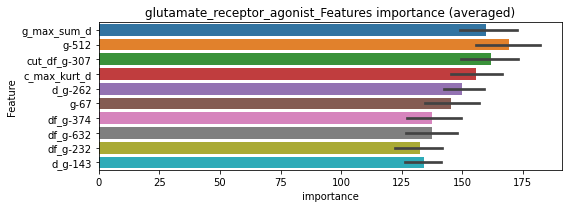

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00139994	valid_1's binary_logloss: 0.0370651


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000647132	valid_1's binary_logloss: 0.0147828


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000707068	valid_1's binary_logloss: 0.0230767


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00071469	valid_1's binary_logloss: 0.0177863


glutamate_receptor_agonist logloss: 0.023179154201201667


neg labels: 3289 → selected neg labels: 3235


glutamate_receptor_antagonist, len(trt): 367, len(othr): 3235, target_rate: 0.0154111 → Adj_target_rate: 0.0127105
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0742819	valid_1's binary_logloss: 0.333442
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.059071	valid_1's binary_logloss: 0.328996
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.0522135	valid_1's binary_logloss: 0.327489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0561232	valid_1's binary_logloss: 0.330933
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.0664749	valid_1's binary_logloss: 0.330015
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0598114	valid_1's binary_logloss: 0.300696


1 / 3 AUC score:0.825
y_Threshold: 0.1216681, Threshold: 0.3403412, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.0364784	valid_1's binary_logloss: 0.293272


Remove_noisy_data: 578 → Positive_corect_labels: 423/3304
p_label_rate: 0.0100452 Vs.target_rate: 0.01541, Num_p_label: 40.0, conf_0:0.23824, conf_1:0.44244
Num_p_label: 40.0, Expected: 61.4, Adj_threshold_1: 0.3403412
Num_p_label: 50.0, Expected: 61.4, Adj_threshold_2: 0.3203412
threshold: 0.3203412, positive_p_label: 50.0/3982, p_label_rate: 0.0125565
positive_y_label: 423.0/3304, y_label_rate: 0.1280266
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.021081	valid_1's binary_logloss: 0.177815
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.0085864	valid_1's binary_logloss: 0.168384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0211903	valid_1's binary_logloss: 0.185769
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0227806	valid_1's binary_logloss: 0.185737
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208204	valid_1's binary_logloss: 0.162078
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0135983	valid_1's binary_logloss: 0.1566
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.954
y_Threshold: 0.0792366, Threshold: 0.3203412, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 341.0/3140
p_label_rate: 0.0228528 Vs.target_rate: 0.01541, Num_p_label: 91.0, conf_0:0.25627, conf_1:0.38441


[300]	training's binary_logloss: 0.0189503	valid_1's binary_logloss: 0.214027
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0231499	valid_1's binary_logloss: 0.212153


threshold: 0.3203412, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 341.0/3140, y_label_rate: 0.1085987
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123256	valid_1's binary_logloss: 0.129412
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00453074	valid_1's binary_logloss: 0.1249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123281	valid_1's binary_logloss: 0.115784
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00424113	valid_1's binary_logloss: 0.106944
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121971	valid_1's binary_logloss: 0.148394
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.008537	valid_1's binary_logloss: 0.145777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120135	valid_1's binary_logloss: 0.130274


3 / 3 AUC score:0.976


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.00473366	valid_1's binary_logloss: 0.126554


y_Threshold: 0.0491124, Threshold: 0.3203412, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 307.0/3072
p_label_rate: 0.0256153 Vs.target_rate: 0.01541, Num_p_label: 102.0, conf_0:0.28831, conf_1:0.35238
Num_p_label: 102.0, Expected: 61.4, Adj_threshold_1: 0.3203412
Num_p_label: 96.0, Expected: 61.4, Adj_threshold_2: 0.3403412
Num_p_label: 95.0, Expected: 61.4, Adj_threshold_3: 0.3603412
Num_p_label: 91.0, Expected: 61.4, Adj_threshold_4: 0.3803412
threshold: 0.3803412, positive_p_label: 91.0/3982, p_label_rate: 0.0228528
positive_y_label: 307.0/3072, y_label_rate: 0.0999349


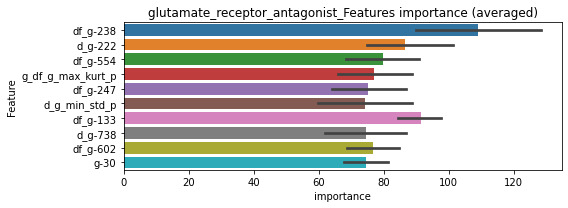

len(train_index) : 2304
len(valid_index) : 768
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00193303	valid_1's binary_logloss: 0.0943914


len(train_index) : 2304
len(valid_index) : 768
================================= fold 2/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00247551	valid_1's binary_logloss: 0.0883379


len(train_index) : 2304
len(valid_index) : 768
================================= fold 3/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2304
len(valid_index) : 768
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00596781	valid_1's binary_logloss: 0.125435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.0022122	valid_1's binary_logloss: 0.0835816


glutamate_receptor_antagonist logloss: 0.09793642024095021


neg labels: 3289 → selected neg labels: 3287


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148654	valid_1's binary_logloss: 0.00749152
[600]	training's binary_logloss: 0.000382607	valid_1's binary_logloss: 0.00450665
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00038301	valid_1's binary_logloss: 0.00450362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148677	valid_1's binary_logloss: 0.00470187
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000402288	valid_1's binary_logloss: 0.0027141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145136	valid_1's binary_logloss: 0.00418696
[600]	training's binary_logloss: 0.00037145	valid_1's binary_logloss: 0.00218979
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000375807	valid_1's binary_logloss: 0.00217873
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0020511, Threshold: 0.0086264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00604, conf_1:0.01121
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0086264
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0286264
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.0486264
threshold: 0.0486264, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135868	valid_1's binary_logloss: 0.0065751
[600]	training's binary_logloss: 0.00036717	valid_1's binary_logloss: 0.00433901
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036913	valid_1's binary_logloss: 0.00433626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134106	valid_1's binary_logloss: 0.00392803
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000371028	valid_1's binary_logloss: 0.00207584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134184	valid_1's binary_logloss: 0.00338706
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00037881	valid_1's binary_logloss: 0.00163122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134733	valid_1's binary_logloss: 0.00337641


2 / 3 AUC score:1.000
y_Threshold: 0.0361459, Threshold: 0.0486264, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0042692 Vs.target_rate: 0.00076, Num_p_label: 17.0, conf_0:0.03890, conf_1:0.05835
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0486264


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000379343	valid_1's binary_logloss: 0.00157823


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0686264
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0886264
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_4: 0.1086264
threshold: 0.1086264, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135868	valid_1's binary_logloss: 0.0065751
[600]	training's binary_logloss: 0.00036717	valid_1's binary_logloss: 0.00433901
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036913	valid_1's binary_logloss: 0.00433626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134106	valid_1's binary_logloss: 0.00392803
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000371028	valid_1's binary_logloss: 0.00207584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134184	valid_1's binary_logloss: 0.00338706
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00037881	valid_1's binary_logloss: 0.00163122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134733	valid_1's binary_logloss: 0.00337641


3 / 3 AUC score:1.000
y_Threshold: 0.0361459, Threshold: 0.1086264, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000379343	valid_1's binary_logloss: 0.00157823


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076, Num_p_label: 5.0, conf_0:0.09776, conf_1:0.11949
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.1086264
threshold: 0.1086264, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


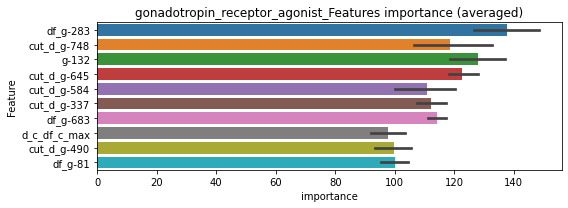

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000380653	valid_1's binary_logloss: 0.00436687
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000381042	valid_1's binary_logloss: 0.00263181


================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000378609	valid_1's binary_logloss: 0.00161826
Training until validation scores don't improve for 30 rounds


gonadotropin_receptor_agonist logloss: 0.002542372079608992


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000372823	valid_1's binary_logloss: 0.00155109
neg labels: 3289 → selected neg labels: 3281


gsk_inhibitor, len(trt): 60, len(othr): 3281, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00604411	valid_1's binary_logloss: 0.0371154
[600]	training's binary_logloss: 0.00105038	valid_1's binary_logloss: 0.0238594
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00069701	valid_1's binary_logloss: 0.0221431
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00625149	valid_1's binary_logloss: 0.0272869
[600]	training's binary_logloss: 0.00106229	valid_1's binary_logloss: 0.0158877
Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000677625	valid_1's binary_logloss: 0.0144803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671806	valid_1's binary_logloss: 0.0158068
[600]	training's binary_logloss: 0.00110625	valid_1's binary_logloss: 0.00431109
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000699775	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0080822, Threshold: 0.0431341, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.03019, conf_1:0.05607
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0431341
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_2: 0.0631341
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_3: 0.0831341
threshold: 0.0831341, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00546938	valid_1's binary_logloss: 0.0350217
[600]	training's binary_logloss: 0.00100307	valid_1's binary_logloss: 0.0232906
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000677149	valid_1's binary_logloss: 0.0224189
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552605	valid_1's binary_logloss: 0.0244851
[600]	training's binary_logloss: 0.00101246	valid_1's binary_logloss: 0.0142371
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000723722	valid_1's binary_logloss: 0.0134792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593611	valid_1's binary_logloss: 0.0133329
[600]	training's binary_logloss: 0.00104967	valid_1's binary_logloss: 0.00364349
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000667933	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0532648, Threshold: 0.0831341, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0118031 Vs.target_rate: 0.00252, Num_p_label: 47.0, conf_0:0.06651, conf_1:0.09976
Num_p_label: 47.0, Expected: 10.0, Adj_threshold_1: 0.0831341
Num_p_label: 39.0, Expected: 10.0, Adj_threshold_2: 0.1031341
Num_p_label: 23.0, Expected: 10.0, Adj_threshold_3: 0.1231341
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_4: 0.1431341
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_5: 0.1631341
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_6: 0.1831341
threshold: 0.1831341, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00508259	valid_1's binary_logloss: 0.0304387
[600]	training's binary_logloss: 0.00096626	valid_1's binary_logloss: 0.0204481
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000706402	valid_1's binary_logloss: 0.0196865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00563761	valid_1's binary_logloss: 0.018959
[600]	training's binary_logloss: 0.00103134	valid_1's binary_logloss: 0.00728656
[900]	training's binary_logloss: 0.000637312	valid_1's binary_logloss: 0.00571519
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000630996	valid_1's binary_logloss: 0.00567028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560058	valid_1's binary_logloss: 0.0215731
[600]	training's binary_logloss: 0.00101264	valid_1's binary_logloss: 0.0111456
Early stopping, best i

3 / 3 AUC score:1.000
y_Threshold: 0.0659921, Threshold: 0.1831341, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0042692 Vs.target_rate: 0.00252, Num_p_label: 17.0, conf_0:0.16482, conf_1:0.20145
Num_p_label: 17.0, Expected: 10.0, Adj_threshold_1: 0.1831341
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_2: 0.2031341
threshold: 0.2031341, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


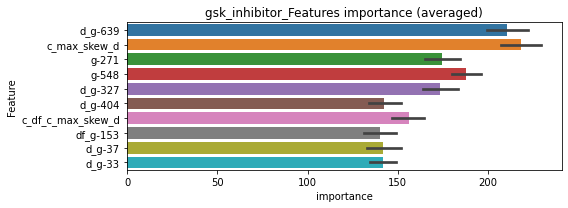

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000675866	valid_1's binary_logloss: 0.0189878


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000667113	valid_1's binary_logloss: 0.00587449


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000715332	valid_1's binary_logloss: 0.0110444


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000686741	valid_1's binary_logloss: 0.00940978


gsk_inhibitor logloss: 0.011331126381258319


neg labels: 3289 → selected neg labels: 3273


hcv_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00657279	valid_1's binary_logloss: 0.0514862
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.00154087	valid_1's binary_logloss: 0.043368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00663008	valid_1's binary_logloss: 0.0325948
[600]	training's binary_logloss: 0.00116857	valid_1's binary_logloss: 0.0195098
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000950397	valid_1's binary_logloss: 0.0186368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00670844	valid_1's binary_logloss: 0.0359767
[600]	training's binary_logloss: 0.00118225	valid_1's binary_logloss: 0.0239786
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000791265	valid_1's binary_logloss: 0.0228297
Training until validation scores don't improve for 30 rounds
[300]	trai

1 / 3 AUC score:0.999
y_Threshold: 0.0090895, Threshold: 0.0333466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.02334, conf_1:0.04335
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0333466
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_2: 0.0533466
threshold: 0.0533466, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3789, y_label_rate: 0.1718131
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598297	valid_1's binary_logloss: 0.0274311
[600]	training's binary_logloss: 0.00109766	valid_1's binary_logloss: 0.0163231
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000700424	valid_1's binary_logloss: 0.0146406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00576124	valid_1's binary_logloss: 0.0411234
[600]	training's binary_logloss: 0.00106923	valid_1's binary_logloss: 0.0302534
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000805793	valid_1's binary_logloss: 0.0292748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00593462	valid_1's binary_logloss: 0.03392
[600]	training's binary_logloss: 0.00110308	valid_1's binary_logloss: 0.0204221
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000827774	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0309964, Threshold: 0.0533466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3783
p_label_rate: 0.0155701 Vs.target_rate: 0.00302, Num_p_label: 62.0, conf_0:0.04268, conf_1:0.06402
Num_p_label: 62.0, Expected: 12.0, Adj_threshold_1: 0.0533466
Num_p_label: 53.0, Expected: 12.0, Adj_threshold_2: 0.0733466
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_3: 0.0933466
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_4: 0.1133466
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_5: 0.1333466
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_6: 0.1533466
threshold: 0.1533466, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00584732	valid_1's binary_logloss: 0.0371221
[600]	training's binary_logloss: 0.0010731	valid_1's binary_logloss: 0.024883
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000952031	valid_1's binary_logloss: 0.0245059
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00570096	valid_1's binary_logloss: 0.0293865
[600]	training's binary_logloss: 0.0010662	valid_1's binary_logloss: 0.0192792
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000734662	valid_1's binary_logloss: 0.0185159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572762	valid_1's binary_logloss: 0.0329787
[600]	training's binary_logloss: 0.00106432	valid_1's binary_logloss: 0.0238816
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000777104	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0481898, Threshold: 0.1533466, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3779
p_label_rate: 0.0052737 Vs.target_rate: 0.00302, Num_p_label: 21.0, conf_0:0.13801, conf_1:0.16868
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_1: 0.1533466
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.1733466
threshold: 0.1733466, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 646.0/3779, y_label_rate: 0.1709447


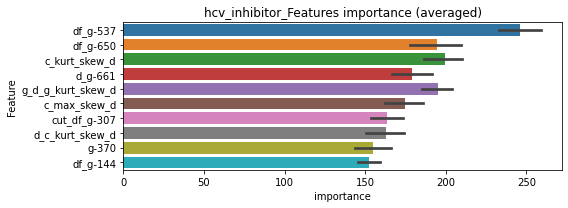

len(train_index) : 2834
len(valid_index) : 945
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.00082586	valid_1's binary_logloss: 0.024654


len(train_index) : 2834
len(valid_index) : 945
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000891721	valid_1's binary_logloss: 0.0246879


len(train_index) : 2834
len(valid_index) : 945
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000810761	valid_1's binary_logloss: 0.0238179


len(train_index) : 2835
len(valid_index) : 944
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.0013224	valid_1's binary_logloss: 0.0174688


hcv_inhibitor logloss: 0.022658530813042487


neg labels: 3289 → selected neg labels: 3275


hdac_inhibitor, len(trt): 106, len(othr): 3275, target_rate: 0.0044512 → Adj_target_rate: 0.0044229
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120808	valid_1's binary_logloss: 0.0978159
[600]	training's binary_logloss: 0.00181953	valid_1's binary_logloss: 0.0797394
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.00121378	valid_1's binary_logloss: 0.078197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115379	valid_1's binary_logloss: 0.0803785
[600]	training's binary_logloss: 0.00181921	valid_1's binary_logloss: 0.0652361
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00201036	valid_1's binary_logloss: 0.0647698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125172	valid_1's binary_logloss: 0.0805308
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.00225183	valid_1's binary_logloss: 0.0712948
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.992
y_Threshold: 0.0171801, Threshold: 0.0970780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 163 → Positive_corect_labels: 639/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00445, Num_p_label: 40.0, conf_0:0.06795, conf_1:0.12620
Num_p_label: 40.0, Expected: 17.7, Adj_threshold_1: 0.0970780
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_2: 0.1170780
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_3: 0.1370780
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_4: 0.1570780
threshold: 0.1570780, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 639.0/3767, y_label_rate: 0.1696310
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00916369	valid_1's binary_logloss: 0.0663801
[600]	training's binary_logloss: 0.00156399	valid_1's binary_logloss: 0.0495271
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000887476	valid_1's binary_logloss: 0.0470731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00937288	valid_1's binary_logloss: 0.0713582
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00215319	valid_1's binary_logloss: 0.0632201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00981841	valid_1's binary_logloss: 0.0476332
[600]	training's binary_logloss: 0.00164747	valid_1's binary_logloss: 0.0333134
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.00145362	valid_1's binary_logloss: 0.0326096
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:0.998
y_Threshold: 0.0434656, Threshold: 0.1570780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 624.0/3737
p_label_rate: 0.0128076 Vs.target_rate: 0.00445, Num_p_label: 51.0, conf_0:0.12566, conf_1:0.18849
Num_p_label: 51.0, Expected: 17.7, Adj_threshold_1: 0.1570780
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_2: 0.1770780
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_3: 0.1970780
Num_p_label: 34.0, Expected: 17.7, Adj_threshold_4: 0.2170780
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_5: 0.2370780
threshold: 0.2370780, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 624.0/3737, y_label_rate: 0.1669789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0087085	valid_1's binary_logloss: 0.0489592
[600]	training's binary_logloss: 0.00147882	valid_1's binary_logloss: 0.0344189
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.00100092	valid_1's binary_logloss: 0.032696
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00865301	valid_1's binary_logloss: 0.0504507
[600]	training's binary_logloss: 0.00150513	valid_1's binary_logloss: 0.0356837
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00117289	valid_1's binary_logloss: 0.0348605
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0086992	valid_1's binary_logloss: 0.0494356
[600]	training's binary_logloss: 0.00152287	valid_1's binary_logloss: 0.0358178
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.00117197	valid_1's binary_logloss: 0.034

3 / 3 AUC score:0.998
y_Threshold: 0.0410542, Threshold: 0.2370780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 612.0/3713
p_label_rate: 0.0097941 Vs.target_rate: 0.00445, Num_p_label: 39.0, conf_0:0.21337, conf_1:0.26079
Num_p_label: 39.0, Expected: 17.7, Adj_threshold_1: 0.2370780
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.2570780
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_3: 0.2770780
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_4: 0.2970780
threshold: 0.2970780, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 612.0/3713, y_label_rate: 0.1648263


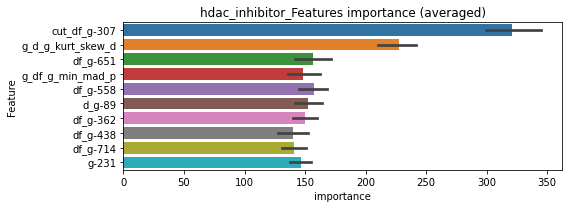

len(train_index) : 2784
len(valid_index) : 929
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[877]	training's binary_logloss: 0.000824835	valid_1's binary_logloss: 0.0251383


len(train_index) : 2785
len(valid_index) : 928
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00103114	valid_1's binary_logloss: 0.0482005


len(train_index) : 2785
len(valid_index) : 928
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000854951	valid_1's binary_logloss: 0.0405616


len(train_index) : 2785
len(valid_index) : 928
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000820209	valid_1's binary_logloss: 0.033068


hdac_inhibitor logloss: 0.03674751240152783


neg labels: 3289 → selected neg labels: 3283


histamine_receptor_agonist, len(trt): 59, len(othr): 3283, target_rate: 0.0024775 → Adj_target_rate: 0.0026880
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048432	valid_1's binary_logloss: 0.0425421
[600]	training's binary_logloss: 0.000865884	valid_1's binary_logloss: 0.0325327
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000680508	valid_1's binary_logloss: 0.0316839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00485315	valid_1's binary_logloss: 0.0375457
[600]	training's binary_logloss: 0.000884097	valid_1's binary_logloss: 0.0299911
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000830955	valid_1's binary_logloss: 0.0295987
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564867	valid_1's binary_logloss: 0.0154385
[600]	training's binary_logloss: 0.00095036	valid_1's binary_logloss: 0.00914728
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000791659	valid_1's binary_loglos

1 / 3 AUC score:1.000
y_Threshold: 0.0060143, Threshold: 0.0155682, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00248, Num_p_label: 40.0, conf_0:0.01090, conf_1:0.02024
Num_p_label: 40.0, Expected: 9.9, Adj_threshold_1: 0.0155682
Num_p_label: 9.0, Expected: 9.9, Adj_threshold_2: 0.0355682
threshold: 0.0355682, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00468133	valid_1's binary_logloss: 0.0281464
[600]	training's binary_logloss: 0.000850993	valid_1's binary_logloss: 0.0197409
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000702657	valid_1's binary_logloss: 0.019097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473836	valid_1's binary_logloss: 0.0301461
[600]	training's binary_logloss: 0.000867367	valid_1's binary_logloss: 0.022068
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000737492	valid_1's binary_logloss: 0.0213357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457162	valid_1's binary_logloss: 0.0215703
[600]	training's binary_logloss: 0.000856164	valid_1's binary_logloss: 0.0146665
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000693318	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0289914, Threshold: 0.0355682, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3797
p_label_rate: 0.0092918 Vs.target_rate: 0.00248, Num_p_label: 37.0, conf_0:0.02845, conf_1:0.04268
Num_p_label: 37.0, Expected: 9.9, Adj_threshold_1: 0.0355682
Num_p_label: 20.0, Expected: 9.9, Adj_threshold_2: 0.0555682
threshold: 0.0555682, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3797, y_label_rate: 0.1714511
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457521	valid_1's binary_logloss: 0.0221754
[600]	training's binary_logloss: 0.000846989	valid_1's binary_logloss: 0.0151367
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000622576	valid_1's binary_logloss: 0.0144237
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00438937	valid_1's binary_logloss: 0.027355
[600]	training's binary_logloss: 0.000810752	valid_1's binary_logloss: 0.0204391
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000690044	valid_1's binary_logloss: 0.0200257
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00447071	valid_1's binary_logloss: 0.0263908
[600]	training's binary_logloss: 0.000832689	valid_1's binary_logloss: 0.0184312
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000593584	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0277142, Threshold: 0.0555682, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3791
p_label_rate: 0.0035158 Vs.target_rate: 0.00248, Num_p_label: 14.0, conf_0:0.05001, conf_1:0.06113
threshold: 0.0555682, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3791, y_label_rate: 0.1709312


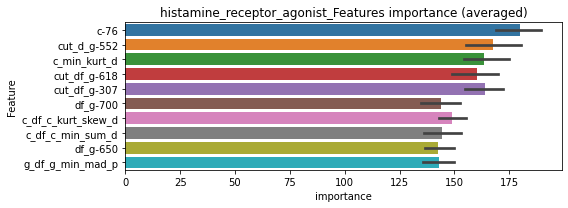

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000630308	valid_1's binary_logloss: 0.0156328


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000623713	valid_1's binary_logloss: 0.00903802


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000620727	valid_1's binary_logloss: 0.0148768


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000743472	valid_1's binary_logloss: 0.0209786


histamine_receptor_agonist logloss: 0.01513002010044574


neg labels: 3289 → selected neg labels: 3255


histamine_receptor_antagonist, len(trt): 241, len(othr): 3255, target_rate: 0.0101201 → Adj_target_rate: 0.0088902
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0326291	valid_1's binary_logloss: 0.215174
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0296896	valid_1's binary_logloss: 0.214243
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0287504	valid_1's binary_logloss: 0.216568
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0320413	valid_1's binary_logloss: 0.216362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0294989	valid_1's binary_logloss: 0.172475
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.0183577	valid_1's binary_logloss: 0.166488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0332915	valid_1's binary_logloss: 0.169413
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.0146008	valid_1's binary_logloss: 0

1 / 3 AUC score:0.943
y_Threshold: 0.0698053, Threshold: 0.3514393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 323 → Positive_corect_labels: 555/3583
p_label_rate: 0.0100452 Vs.target_rate: 0.01012, Num_p_label: 40.0, conf_0:0.24601, conf_1:0.45687
threshold: 0.3514393, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 555.0/3583, y_label_rate: 0.1548981
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0147384	valid_1's binary_logloss: 0.143749
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00843268	valid_1's binary_logloss: 0.139172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176409	valid_1's binary_logloss: 0.117375
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00531004	valid_1's binary_logloss: 0.10602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161857	valid_1's binary_logloss: 0.145319
Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0101574	valid_1's binary_logloss: 0.142363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0167899	valid_1's binary_logloss: 0.117683
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00340071	valid_1's binary_logloss:

2 / 3 AUC score:0.988
y_Threshold: 0.0630558, Threshold: 0.3514393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 510.0/3493
p_label_rate: 0.0203415 Vs.target_rate: 0.01012, Num_p_label: 81.0, conf_0:0.28115, conf_1:0.42173
Num_p_label: 81.0, Expected: 40.3, Adj_threshold_1: 0.3514393
Num_p_label: 73.0, Expected: 40.3, Adj_threshold_2: 0.3714393
Num_p_label: 69.0, Expected: 40.3, Adj_threshold_3: 0.3914393
Num_p_label: 65.0, Expected: 40.3, Adj_threshold_4: 0.4114393
Num_p_label: 59.0, Expected: 40.3, Adj_threshold_5: 0.4314393
threshold: 0.4314393, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 510.0/3493, y_label_rate: 0.1460063
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123305	valid_1's binary_logloss: 0.107081
[600]	training's binary_logloss: 0.00212855	valid_1's binary_logloss: 0.0966211
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00223956	valid_1's binary_logloss: 0.0962812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0115958	valid_1's binary_logloss: 0.0951313
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00655924	valid_1's binary_logloss: 0.090577
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122002	valid_1's binary_logloss: 0.0985996
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00418728	valid_1's binary_logloss: 0.0913078
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123682	valid_1's binary_logloss: 0.101755
Early stopping, be

3 / 3 AUC score:0.992
y_Threshold: 0.0538168, Threshold: 0.4314393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 483.0/3439
p_label_rate: 0.0188348 Vs.target_rate: 0.01012, Num_p_label: 75.0, conf_0:0.38830, conf_1:0.47458
Num_p_label: 75.0, Expected: 40.3, Adj_threshold_1: 0.4314393
Num_p_label: 73.0, Expected: 40.3, Adj_threshold_2: 0.4514393
Num_p_label: 68.0, Expected: 40.3, Adj_threshold_3: 0.4714393
Num_p_label: 64.0, Expected: 40.3, Adj_threshold_4: 0.4914393
Num_p_label: 63.0, Expected: 40.3, Adj_threshold_5: 0.5114393
Num_p_label: 57.0, Expected: 40.3, Adj_threshold_6: 0.5314393
threshold: 0.5314393, positive_p_label: 57.0/3982, p_label_rate: 0.0143144
positive_y_label: 483.0/3439, y_label_rate: 0.1404478


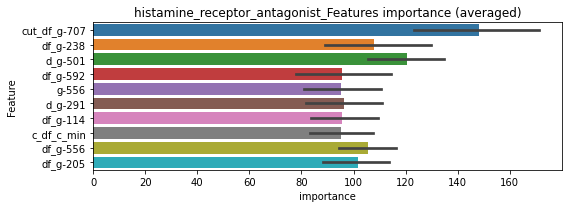

len(train_index) : 2579
len(valid_index) : 860
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2579
len(valid_index) : 860
================================= fold 2/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.0040235	valid_1's binary_logloss: 0.0837092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00137359	valid_1's binary_logloss: 0.0561972


len(train_index) : 2579
len(valid_index) : 860
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.00138188	valid_1's binary_logloss: 0.0556275


len(train_index) : 2580
len(valid_index) : 859
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


histamine_receptor_antagonist logloss: 0.06860583775556969


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00343652	valid_1's binary_logloss: 0.0789013
neg labels: 3289 → selected neg labels: 3283


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3283, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211488	valid_1's binary_logloss: 0.00565948
[600]	training's binary_logloss: 0.000480169	valid_1's binary_logloss: 0.00206134
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000452854	valid_1's binary_logloss: 0.00199847
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214173	valid_1's binary_logloss: 0.00788865
[600]	training's binary_logloss: 0.000480893	valid_1's binary_logloss: 0.00386625
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000456866	valid_1's binary_logloss: 0.00380667
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211872	valid_1's binary_logloss: 0.0055379
[600]	training's binary_logloss: 0.000478309	valid_1's binary_logloss: 0.00258991
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000454723	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026436, Threshold: 0.0403840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.02827, conf_1:0.05250
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0403840
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_2: 0.0603840
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_3: 0.0803840
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_4: 0.1003840
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_5: 0.1203840
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_6: 0.1403840
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_7: 0.1603840
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_8: 0.1803840
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_9: 0.2003840
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_10: 0.2203840
threshold: 0.2403840, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195751	valid_1's binary_logloss: 0.00497802
[600]	training's binary_logloss: 0.000462961	valid_1's binary_logloss: 0.00180895
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000437042	valid_1's binary_logloss: 0.00177083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194224	valid_1's binary_logloss: 0.00551089
[600]	training's binary_logloss: 0.000467272	valid_1's binary_logloss: 0.00249223
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000442654	valid_1's binary_logloss: 0.00243703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196983	valid_1's binary_logloss: 0.00486406
[600]	training's binary_logloss: 0.000458289	valid_1's binary_logloss: 0.0018295
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00043773	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0939730, Threshold: 0.2403840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0095429 Vs.target_rate: 0.00101, Num_p_label: 38.0, conf_0:0.19231, conf_1:0.28846
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_1: 0.2403840
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_2: 0.2603840
Num_p_label: 35.0, Expected: 4.0, Adj_threshold_3: 0.2803840
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_4: 0.3003840
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_5: 0.3203840
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_6: 0.3403840
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_7: 0.3603840
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_8: 0.3803840
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_9: 0.4003840
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_10: 0.4203840
threshold: 0.4403840, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00195751	valid_1's binary_logloss: 0.00497802
[600]	training's binary_logloss: 0.000462961	valid_1's binary_logloss: 0.00180895
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000437042	valid_1's binary_logloss: 0.00177083
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194224	valid_1's binary_logloss: 0.00551089
[600]	training's binary_logloss: 0.000467272	valid_1's binary_logloss: 0.00249223
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000442654	valid_1's binary_logloss: 0.00243703
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196983	valid_1's binary_logloss: 0.00486406
[600]	training's binary_logloss: 0.000458289	valid_1's binary_logloss: 0.0018295
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00043773	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0939730, Threshold: 0.4403840, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0072828 Vs.target_rate: 0.00101, Num_p_label: 29.0, conf_0:0.39635, conf_1:0.48442
Num_p_label: 29.0, Expected: 4.0, Adj_threshold_1: 0.4403840
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_2: 0.4603840
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_3: 0.4803840
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_4: 0.5003840
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_5: 0.5203840
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_6: 0.5403840
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_7: 0.5603840
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_8: 0.5803840
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_9: 0.6003840
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_10: 0.6203840
threshold: 0.6403840, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


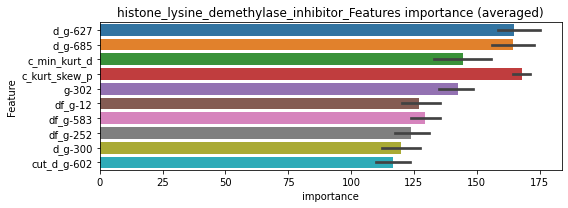

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000469283	valid_1's binary_logloss: 0.00214205


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000440423	valid_1's binary_logloss: 0.00268243


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000453321	valid_1's binary_logloss: 0.00153055


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000447245	valid_1's binary_logloss: 0.00265833


histone_lysine_demethylase_inhibitor logloss: 0.002254759656524014


neg labels: 3289 → selected neg labels: 3284


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3284, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00228058	valid_1's binary_logloss: 0.0100584
[600]	training's binary_logloss: 0.000511271	valid_1's binary_logloss: 0.00644986
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000463163	valid_1's binary_logloss: 0.00624146
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00238166	valid_1's binary_logloss: 0.00834271
[600]	training's binary_logloss: 0.000516125	valid_1's binary_logloss: 0.00491434
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000453929	valid_1's binary_logloss: 0.00479089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248077	valid_1's binary_logloss: 0.0047139
[600]	training's binary_logloss: 0.000523829	valid_1's binary_logloss: 0.00140923
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000458611	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0031128, Threshold: 0.0114604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.00802, conf_1:0.01490
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0114604
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_2: 0.0314604
threshold: 0.0314604, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219984	valid_1's binary_logloss: 0.00508227
[600]	training's binary_logloss: 0.000497199	valid_1's binary_logloss: 0.00179828
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000438424	valid_1's binary_logloss: 0.00169409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022256	valid_1's binary_logloss: 0.00892896
[600]	training's binary_logloss: 0.000496323	valid_1's binary_logloss: 0.00576256
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000481062	valid_1's binary_logloss: 0.00574778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221115	valid_1's binary_logloss: 0.00839877
[600]	training's binary_logloss: 0.00049701	valid_1's binary_logloss: 0.00431726
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000453911	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0208438, Threshold: 0.0314604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0072828 Vs.target_rate: 0.00134, Num_p_label: 29.0, conf_0:0.02517, conf_1:0.03775
Num_p_label: 29.0, Expected: 5.4, Adj_threshold_1: 0.0314604
Num_p_label: 16.0, Expected: 5.4, Adj_threshold_2: 0.0514604
Num_p_label: 12.0, Expected: 5.4, Adj_threshold_3: 0.0714604
threshold: 0.0714604, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219984	valid_1's binary_logloss: 0.00508227
[600]	training's binary_logloss: 0.000497199	valid_1's binary_logloss: 0.00179828
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000438424	valid_1's binary_logloss: 0.00169409
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0022256	valid_1's binary_logloss: 0.00892896
[600]	training's binary_logloss: 0.000496323	valid_1's binary_logloss: 0.00576256
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000481062	valid_1's binary_logloss: 0.00574778
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221115	valid_1's binary_logloss: 0.00839877
[600]	training's binary_logloss: 0.00049701	valid_1's binary_logloss: 0.00431726
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000453911	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0208438, Threshold: 0.0714604, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0030136 Vs.target_rate: 0.00134, Num_p_label: 12.0, conf_0:0.06431, conf_1:0.07861
Num_p_label: 12.0, Expected: 5.4, Adj_threshold_1: 0.0714604
threshold: 0.0714604, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


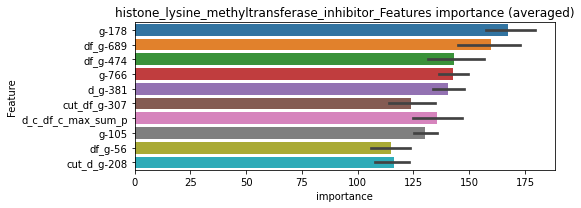

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000462249	valid_1's binary_logloss: 0.00191132


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000506348	valid_1's binary_logloss: 0.0053921


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000461411	valid_1's binary_logloss: 0.00422334


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000448438	valid_1's binary_logloss: 0.0093004


histone_lysine_methyltransferase_inhibitor logloss: 0.0052111325204007184


neg labels: 3289 → selected neg labels: 3280


hiv_inhibitor, len(trt): 72, len(othr): 3280, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00633238	valid_1's binary_logloss: 0.05832
[600]	training's binary_logloss: 0.00108416	valid_1's binary_logloss: 0.0495918
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00114675	valid_1's binary_logloss: 0.0491761
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00685664	valid_1's binary_logloss: 0.0293244
[600]	training's binary_logloss: 0.00116679	valid_1's binary_logloss: 0.0144887
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000824593	valid_1's binary_logloss: 0.0131279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00680705	valid_1's binary_logloss: 0.0233364
[600]	training's binary_logloss: 0.00117201	valid_1's binary_logloss: 0.0132876
Early stopping, best iteration is:
[863]	training's binary_logloss: 0.00073323	valid_1's binary_logloss: 0.0

1 / 3 AUC score:0.999
y_Threshold: 0.0084850, Threshold: 0.1003854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.07027, conf_1:0.13050
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.1003854
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_2: 0.1203854
Num_p_label: 34.0, Expected: 12.0, Adj_threshold_3: 0.1403854
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_4: 0.1603854
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_5: 0.1803854
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_6: 0.2003854
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_7: 0.2203854
threshold: 0.2203854, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0057751	valid_1's binary_logloss: 0.048501
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00138332	valid_1's binary_logloss: 0.0395283
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00601393	valid_1's binary_logloss: 0.0238338
[600]	training's binary_logloss: 0.00108275	valid_1's binary_logloss: 0.0125887
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000803248	valid_1's binary_logloss: 0.0116313
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00609915	valid_1's binary_logloss: 0.0353727
[600]	training's binary_logloss: 0.00108551	valid_1's binary_logloss: 0.0232067
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000854492	valid_1's binary_logloss: 0.0221406
Training until validation scores don't improve for 30 rounds
[300]	train

2 / 3 AUC score:1.000
y_Threshold: 0.0460175, Threshold: 0.2203854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0145655 Vs.target_rate: 0.00302, Num_p_label: 58.0, conf_0:0.17631, conf_1:0.26446
Num_p_label: 58.0, Expected: 12.0, Adj_threshold_1: 0.2203854
Num_p_label: 55.0, Expected: 12.0, Adj_threshold_2: 0.2403854
Num_p_label: 52.0, Expected: 12.0, Adj_threshold_3: 0.2603854
Num_p_label: 50.0, Expected: 12.0, Adj_threshold_4: 0.2803854
Num_p_label: 46.0, Expected: 12.0, Adj_threshold_5: 0.3003854
Num_p_label: 42.0, Expected: 12.0, Adj_threshold_6: 0.3203854
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_7: 0.3403854
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_8: 0.3603854
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_9: 0.3803854
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_10: 0.4003854
threshold: 0.4203854, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 650.0/3792, y_label_rate: 0.1714135


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00607321	valid_1's binary_logloss: 0.0225082
[600]	training's binary_logloss: 0.00107596	valid_1's binary_logloss: 0.0126988
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000727584	valid_1's binary_logloss: 0.0117885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00574321	valid_1's binary_logloss: 0.031861
[600]	training's binary_logloss: 0.00104097	valid_1's binary_logloss: 0.0193073
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000852423	valid_1's binary_logloss: 0.0183777
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059666	valid_1's binary_logloss: 0.037789
[600]	training's binary_logloss: 0.00104021	valid_1's binary_logloss: 0.0234942
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000714008	valid_1's binary_logloss: 0.

3 / 3 AUC score:1.000
y_Threshold: 0.0428143, Threshold: 0.4203854, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0090407 Vs.target_rate: 0.00302, Num_p_label: 36.0, conf_0:0.37835, conf_1:0.46242
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_1: 0.4203854
Num_p_label: 36.0, Expected: 12.0, Adj_threshold_2: 0.4403854
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_3: 0.4603854
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_4: 0.4803854
Num_p_label: 30.0, Expected: 12.0, Adj_threshold_5: 0.5003854
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_6: 0.5203854
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_7: 0.5403854
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_8: 0.5603854
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_9: 0.5803854
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_10: 0.6003854
threshold: 0.6203854, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


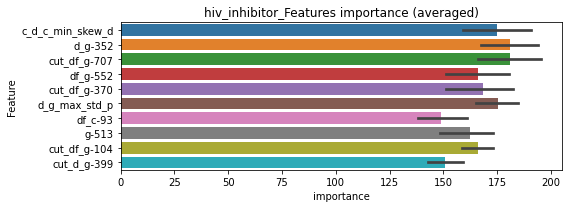

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000677524	valid_1's binary_logloss: 0.0166914


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000718382	valid_1's binary_logloss: 0.0151068


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000833934	valid_1's binary_logloss: 0.0169284


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000736096	valid_1's binary_logloss: 0.0170545


hiv_inhibitor logloss: 0.01645579525913984


neg labels: 3289 → selected neg labels: 3246


hmgcr_inhibitor, len(trt): 283, len(othr): 3246, target_rate: 0.0118838 → Adj_target_rate: 0.0101910
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0480843	valid_1's binary_logloss: 0.238107
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.010426	valid_1's binary_logloss: 0.220807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0461915	valid_1's binary_logloss: 0.277279
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0343411	valid_1's binary_logloss: 0.273089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0487581	valid_1's binary_logloss: 0.249277
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.0162608	valid_1's binary_logloss: 0.238236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0493667	valid_1's binary_logloss: 0.251858
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.022455	valid_1's binary_logloss: 0.2

1 / 3 AUC score:0.902
y_Threshold: 0.0826902, Threshold: 0.4174891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 410 → Positive_corect_labels: 509/3485
p_label_rate: 0.0100452 Vs.target_rate: 0.01188, Num_p_label: 40.0, conf_0:0.29224, conf_1:0.54274
threshold: 0.4174891, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 509.0/3485, y_label_rate: 0.1460545
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025245	valid_1's binary_logloss: 0.181075
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00510641	valid_1's binary_logloss: 0.162272
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0243401	valid_1's binary_logloss: 0.1472
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00826321	valid_1's binary_logloss: 0.133525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.025166	valid_1's binary_logloss: 0.168035
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00450587	valid_1's binary_logloss: 0.150097
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0252341	valid_1's binary_logloss: 0.174905
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00557106	valid_1's binary_logloss: 0

2 / 3 AUC score:0.978
y_Threshold: 0.0654494, Threshold: 0.4174891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 450.0/3367
p_label_rate: 0.0128076 Vs.target_rate: 0.01188, Num_p_label: 51.0, conf_0:0.33399, conf_1:0.50099
threshold: 0.4174891, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 450.0/3367, y_label_rate: 0.1336501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182374	valid_1's binary_logloss: 0.158431
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00700531	valid_1's binary_logloss: 0.148436
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0182948	valid_1's binary_logloss: 0.155139
[600]	training's binary_logloss: 0.00300538	valid_1's binary_logloss: 0.138696
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00335371	valid_1's binary_logloss: 0.137891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187138	valid_1's binary_logloss: 0.139938
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00547962	valid_1's binary_logloss: 0.128111
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194609	valid_1's binary_logloss: 0.140106
Early stopping, best it

3 / 3 AUC score:0.979
y_Threshold: 0.0574556, Threshold: 0.4174891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 401.0/3269
p_label_rate: 0.0130588 Vs.target_rate: 0.01188, Num_p_label: 52.0, conf_0:0.37574, conf_1:0.45924
threshold: 0.4174891, positive_p_label: 52.0/3982, p_label_rate: 0.0130588
positive_y_label: 401.0/3269, y_label_rate: 0.1226675


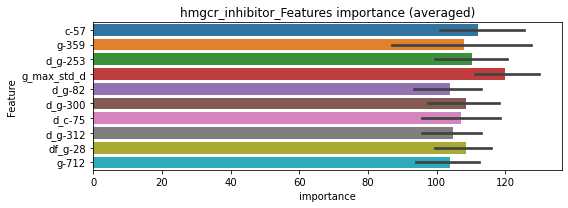

len(train_index) : 2451
len(valid_index) : 818
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00242762	valid_1's binary_logloss: 0.116283


len(train_index) : 2452
len(valid_index) : 817
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2452
len(valid_index) : 817
================================= fold 3/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00500012	valid_1's binary_logloss: 0.108518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.00159567	valid_1's binary_logloss: 0.0714963


len(train_index) : 2452
len(valid_index) : 817
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00312327	valid_1's binary_logloss: 0.0940191


hmgcr_inhibitor logloss: 0.09758489262099852


neg labels: 3289 → selected neg labels: 3272


hsp_inhibitor, len(trt): 93, len(othr): 3272, target_rate: 0.0039053 → Adj_target_rate: 0.0039574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105607	valid_1's binary_logloss: 0.0686747
[600]	training's binary_logloss: 0.00162455	valid_1's binary_logloss: 0.0536763
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00119123	valid_1's binary_logloss: 0.0526653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102315	valid_1's binary_logloss: 0.046761
[600]	training's binary_logloss: 0.00162924	valid_1's binary_logloss: 0.0278754
[900]	training's binary_logloss: 0.000874033	valid_1's binary_logloss: 0.0252925
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000857026	valid_1's binary_logloss: 0.0252812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0104286	valid_1's binary_logloss: 0.0431626
[600]	training's binary_logloss: 0.00166054	valid_1's binary_logloss: 0.0221906
Early stopping, best iteratio

1 / 3 AUC score:0.998
y_Threshold: 0.0137038, Threshold: 0.1751636, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3784
p_label_rate: 0.0100452 Vs.target_rate: 0.00391, Num_p_label: 40.0, conf_0:0.12261, conf_1:0.22771
Num_p_label: 40.0, Expected: 15.6, Adj_threshold_1: 0.1751636
Num_p_label: 38.0, Expected: 15.6, Adj_threshold_2: 0.1951636
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_3: 0.2151636
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_4: 0.2351636
Num_p_label: 30.0, Expected: 15.6, Adj_threshold_5: 0.2551636
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_6: 0.2751636
Num_p_label: 23.0, Expected: 15.6, Adj_threshold_7: 0.2951636
threshold: 0.2951636, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 649.0/3784, y_label_rate: 0.1715116
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00950735	valid_1's binary_logloss: 0.0592471
[600]	training's binary_logloss: 0.00152342	valid_1's binary_logloss: 0.0407518
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000850334	valid_1's binary_logloss: 0.0383521
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00884261	valid_1's binary_logloss: 0.0570373
[600]	training's binary_logloss: 0.00144795	valid_1's binary_logloss: 0.0443395
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00128932	valid_1's binary_logloss: 0.0435815
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00966938	valid_1's binary_logloss: 0.0337726
[600]	training's binary_logloss: 0.00155224	valid_1's binary_logloss: 0.0138111
[900]	training's binary_logloss: 0.000836316	valid_1's binary_logloss: 0.0110962
Early stopping, best iter

2 / 3 AUC score:1.000
y_Threshold: 0.0776644, Threshold: 0.2951636, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 638.0/3762
p_label_rate: 0.0246107 Vs.target_rate: 0.00391, Num_p_label: 98.0, conf_0:0.23613, conf_1:0.35420
Num_p_label: 98.0, Expected: 15.6, Adj_threshold_1: 0.2951636
Num_p_label: 94.0, Expected: 15.6, Adj_threshold_2: 0.3151636
Num_p_label: 85.0, Expected: 15.6, Adj_threshold_3: 0.3351636
Num_p_label: 83.0, Expected: 15.6, Adj_threshold_4: 0.3551636
Num_p_label: 79.0, Expected: 15.6, Adj_threshold_5: 0.3751636
Num_p_label: 76.0, Expected: 15.6, Adj_threshold_6: 0.3951636
Num_p_label: 74.0, Expected: 15.6, Adj_threshold_7: 0.4151636
Num_p_label: 72.0, Expected: 15.6, Adj_threshold_8: 0.4351636
Num_p_label: 69.0, Expected: 15.6, Adj_threshold_9: 0.4551636
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_10: 0.4751636
threshold: 0.4951636, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 638.0/3762, y_label_rate: 0.1695906

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00813031	valid_1's binary_logloss: 0.040961
[600]	training's binary_logloss: 0.00138188	valid_1's binary_logloss: 0.0255219
[900]	training's binary_logloss: 0.000777181	valid_1's binary_logloss: 0.0237381
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000786311	valid_1's binary_logloss: 0.0236221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00808058	valid_1's binary_logloss: 0.0350034
[600]	training's binary_logloss: 0.00139017	valid_1's binary_logloss: 0.0189293
[900]	training's binary_logloss: 0.000783778	valid_1's binary_logloss: 0.0170287
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000792514	valid_1's binary_logloss: 0.0170213
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00860849	valid_1's binary_logloss: 0.0396042
[600]	training's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0897634, Threshold: 0.4951636, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 632.0/3750
p_label_rate: 0.0178302 Vs.target_rate: 0.00391, Num_p_label: 71.0, conf_0:0.44565, conf_1:0.54468
Num_p_label: 71.0, Expected: 15.6, Adj_threshold_1: 0.4951636
Num_p_label: 67.0, Expected: 15.6, Adj_threshold_2: 0.5151636
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_3: 0.5351636
Num_p_label: 63.0, Expected: 15.6, Adj_threshold_4: 0.5551636
Num_p_label: 60.0, Expected: 15.6, Adj_threshold_5: 0.5751636
Num_p_label: 55.0, Expected: 15.6, Adj_threshold_6: 0.5951636
Num_p_label: 54.0, Expected: 15.6, Adj_threshold_7: 0.6151636
Num_p_label: 52.0, Expected: 15.6, Adj_threshold_8: 0.6351636
Num_p_label: 48.0, Expected: 15.6, Adj_threshold_9: 0.6551636
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_10: 0.6751636
threshold: 0.6951636, positive_p_label: 43.0/3982, p_label_rate: 0.0107986
positive_y_label: 632.0/3750, y_label_rate: 0.1685333

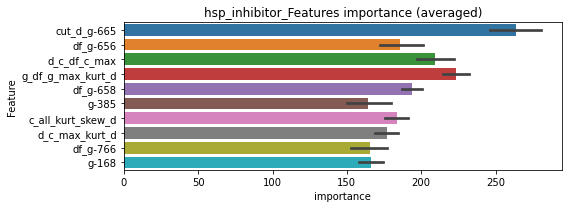

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.0012034	valid_1's binary_logloss: 0.0300634


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00088729	valid_1's binary_logloss: 0.0174132


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00128044	valid_1's binary_logloss: 0.0442167


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000972061	valid_1's binary_logloss: 0.023789


hsp_inhibitor logloss: 0.028867818504354773


neg labels: 3289 → selected neg labels: 3283


igf-1_inhibitor, len(trt): 37, len(othr): 3283, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00300188	valid_1's binary_logloss: 0.0256955
[600]	training's binary_logloss: 0.000604288	valid_1's binary_logloss: 0.0192944
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000593911	valid_1's binary_logloss: 0.0191712
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318629	valid_1's binary_logloss: 0.0132812
[600]	training's binary_logloss: 0.000635989	valid_1's binary_logloss: 0.00806533
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000575758	valid_1's binary_logloss: 0.00796256
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328022	valid_1's binary_logloss: 0.00813703
[600]	training's binary_logloss: 0.000624317	valid_1's binary_logloss: 0.00316652
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000526748	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0036002, Threshold: 0.0246381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01725, conf_1:0.03203
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0246381
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_2: 0.0446381
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_3: 0.0646381
threshold: 0.0646381, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274261	valid_1's binary_logloss: 0.0248131
[600]	training's binary_logloss: 0.000564974	valid_1's binary_logloss: 0.0186902
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000523071	valid_1's binary_logloss: 0.0184549
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00295605	valid_1's binary_logloss: 0.0136921
[600]	training's binary_logloss: 0.00060215	valid_1's binary_logloss: 0.00867339
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000517317	valid_1's binary_logloss: 0.0084164
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00291381	valid_1's binary_logloss: 0.00744993
[600]	training's binary_logloss: 0.000593645	valid_1's binary_logloss: 0.00277618
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000502665	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0341885, Threshold: 0.0646381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0143144 Vs.target_rate: 0.00155, Num_p_label: 57.0, conf_0:0.05171, conf_1:0.07757
Num_p_label: 57.0, Expected: 6.2, Adj_threshold_1: 0.0646381
Num_p_label: 46.0, Expected: 6.2, Adj_threshold_2: 0.0846381
Num_p_label: 39.0, Expected: 6.2, Adj_threshold_3: 0.1046381
Num_p_label: 32.0, Expected: 6.2, Adj_threshold_4: 0.1246381
Num_p_label: 28.0, Expected: 6.2, Adj_threshold_5: 0.1446381
Num_p_label: 25.0, Expected: 6.2, Adj_threshold_6: 0.1646381
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_7: 0.1846381
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_8: 0.2046381
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_9: 0.2246381
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_10: 0.2446381
threshold: 0.2446381, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271585	valid_1's binary_logloss: 0.0170195
[600]	training's binary_logloss: 0.000577562	valid_1's binary_logloss: 0.0121458
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000570245	valid_1's binary_logloss: 0.0120688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293214	valid_1's binary_logloss: 0.00657795
[600]	training's binary_logloss: 0.000592645	valid_1's binary_logloss: 0.00248278
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000502785	valid_1's binary_logloss: 0.00226648
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00286196	valid_1's binary_logloss: 0.0178948
[600]	training's binary_logloss: 0.000586383	valid_1's binary_logloss: 0.0136646
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000537455	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0457474, Threshold: 0.2446381, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00155, Num_p_label: 16.0, conf_0:0.22017, conf_1:0.26910
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_1: 0.2446381
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_2: 0.2646381
threshold: 0.2646381, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


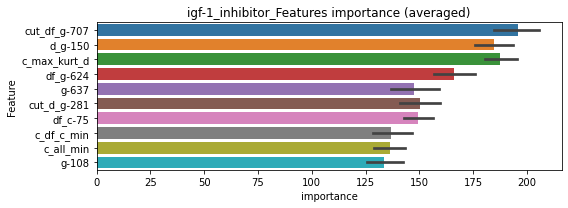

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00051135	valid_1's binary_logloss: 0.00902203


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000539988	valid_1's binary_logloss: 0.00705585


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000515776	valid_1's binary_logloss: 0.00763085


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000541803	valid_1's binary_logloss: 0.00353384


igf-1_inhibitor logloss: 0.006817602620118726


neg labels: 3289 → selected neg labels: 3285


ikk_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019594	valid_1's binary_logloss: 0.0133405
[600]	training's binary_logloss: 0.000461021	valid_1's binary_logloss: 0.00858198
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000466772	valid_1's binary_logloss: 0.00857743
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00194563	valid_1's binary_logloss: 0.00631123
[600]	training's binary_logloss: 0.000471655	valid_1's binary_logloss: 0.00269875
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000437426	valid_1's binary_logloss: 0.00259391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00199438	valid_1's binary_logloss: 0.00525384
[600]	training's binary_logloss: 0.000470252	valid_1's binary_logloss: 0.00207728
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000436823	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0036320, Threshold: 0.0123340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00863, conf_1:0.01603
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0123340
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0323340
threshold: 0.0323340, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170902	valid_1's binary_logloss: 0.0136785
[600]	training's binary_logloss: 0.000435396	valid_1's binary_logloss: 0.00937035
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000415332	valid_1's binary_logloss: 0.0092705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001815	valid_1's binary_logloss: 0.00538752
[600]	training's binary_logloss: 0.000454711	valid_1's binary_logloss: 0.00226569
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000417816	valid_1's binary_logloss: 0.00216194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182461	valid_1's binary_logloss: 0.00385108
[600]	training's binary_logloss: 0.000447457	valid_1's binary_logloss: 0.00125613
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000410532	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0491011, Threshold: 0.0323340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0095429 Vs.target_rate: 0.00126, Num_p_label: 38.0, conf_0:0.02587, conf_1:0.03880
Num_p_label: 38.0, Expected: 5.0, Adj_threshold_1: 0.0323340
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_2: 0.0523340
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_3: 0.0723340
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_4: 0.0923340
threshold: 0.0923340, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00170902	valid_1's binary_logloss: 0.0136785
[600]	training's binary_logloss: 0.000435396	valid_1's binary_logloss: 0.00937035
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000415332	valid_1's binary_logloss: 0.0092705
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.001815	valid_1's binary_logloss: 0.00538752
[600]	training's binary_logloss: 0.000454711	valid_1's binary_logloss: 0.00226569
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000417816	valid_1's binary_logloss: 0.00216194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182461	valid_1's binary_logloss: 0.00385108
[600]	training's binary_logloss: 0.000447457	valid_1's binary_logloss: 0.00125613
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000410532	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0491011, Threshold: 0.0923340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0022602 Vs.target_rate: 0.00126, Num_p_label: 9.0, conf_0:0.08310, conf_1:0.10157
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0923340
threshold: 0.0923340, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


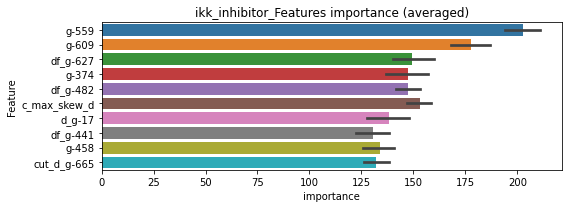

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000447303	valid_1's binary_logloss: 0.00930111


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000419763	valid_1's binary_logloss: 0.00229753


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000422873	valid_1's binary_logloss: 0.00124535


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000428629	valid_1's binary_logloss: 0.00111686


ikk_inhibitor logloss: 0.0034916994697190918


neg labels: 3289 → selected neg labels: 3286


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179582	valid_1's binary_logloss: 0.00768712
[600]	training's binary_logloss: 0.000446138	valid_1's binary_logloss: 0.00468572
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000427368	valid_1's binary_logloss: 0.00454577
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173938	valid_1's binary_logloss: 0.0132846
[600]	training's binary_logloss: 0.000435344	valid_1's binary_logloss: 0.00992285
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000435861	valid_1's binary_logloss: 0.00991423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186542	valid_1's binary_logloss: 0.00343545
[600]	training's binary_logloss: 0.000455811	valid_1's binary_logloss: 0.00138947
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000432668	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0029522, Threshold: 0.0188442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.01319, conf_1:0.02450
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0188442
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_2: 0.0388442
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_3: 0.0588442
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_4: 0.0788442
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_5: 0.0988442
threshold: 0.0988442, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165453	valid_1's binary_logloss: 0.00800886
[600]	training's binary_logloss: 0.000425188	valid_1's binary_logloss: 0.00482151
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.0004198	valid_1's binary_logloss: 0.00481785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163747	valid_1's binary_logloss: 0.0119786
[600]	training's binary_logloss: 0.000417379	valid_1's binary_logloss: 0.00901567
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420292	valid_1's binary_logloss: 0.00900137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168954	valid_1's binary_logloss: 0.00301603
[600]	training's binary_logloss: 0.000432355	valid_1's binary_logloss: 0.00126084
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000410252	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0487592, Threshold: 0.0988442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00130, Num_p_label: 22.0, conf_0:0.07908, conf_1:0.11861
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_1: 0.0988442
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_2: 0.1188442
Num_p_label: 16.0, Expected: 5.2, Adj_threshold_3: 0.1388442
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_4: 0.1588442
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.1788442
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.1988442
threshold: 0.1988442, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165453	valid_1's binary_logloss: 0.00800886
[600]	training's binary_logloss: 0.000425188	valid_1's binary_logloss: 0.00482151
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.0004198	valid_1's binary_logloss: 0.00481785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00163747	valid_1's binary_logloss: 0.0119786
[600]	training's binary_logloss: 0.000417379	valid_1's binary_logloss: 0.00901567
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420292	valid_1's binary_logloss: 0.00900137
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168954	valid_1's binary_logloss: 0.00301603
[600]	training's binary_logloss: 0.000432355	valid_1's binary_logloss: 0.00126084
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000410252	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0487592, Threshold: 0.1988442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00130, Num_p_label: 12.0, conf_0:0.17896, conf_1:0.21873
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.1988442
threshold: 0.1988442, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


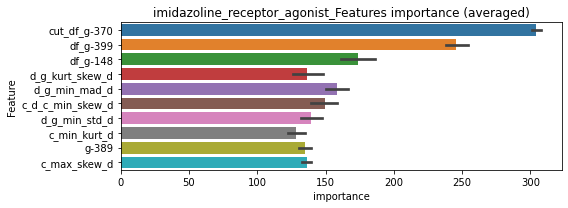

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000419629	valid_1's binary_logloss: 0.00426219


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00045447	valid_1's binary_logloss: 0.0101752


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000404825	valid_1's binary_logloss: 0.00137936


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000424144	valid_1's binary_logloss: 0.00268191


imidazoline_receptor_agonist logloss: 0.004625176124533127


neg labels: 3289 → selected neg labels: 3279


immunosuppressant, len(trt): 73, len(othr): 3279, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00673979	valid_1's binary_logloss: 0.0372181
[600]	training's binary_logloss: 0.0011687	valid_1's binary_logloss: 0.0251482
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00110399	valid_1's binary_logloss: 0.0248235
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00737026	valid_1's binary_logloss: 0.03867
[600]	training's binary_logloss: 0.00122565	valid_1's binary_logloss: 0.0266288
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000864425	valid_1's binary_logloss: 0.0258238
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00725199	valid_1's binary_logloss: 0.0349576
[600]	training's binary_logloss: 0.00120847	valid_1's binary_logloss: 0.0214894
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000963217	valid_1's binary_logloss: 0.0

1 / 3 AUC score:1.000
y_Threshold: 0.0081049, Threshold: 0.0234546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.01642, conf_1:0.03049
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0234546
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_2: 0.0434546
threshold: 0.0434546, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645245	valid_1's binary_logloss: 0.0371608
[600]	training's binary_logloss: 0.00113544	valid_1's binary_logloss: 0.0275906
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000759237	valid_1's binary_logloss: 0.0262117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065466	valid_1's binary_logloss: 0.0352782
[600]	training's binary_logloss: 0.00113851	valid_1's binary_logloss: 0.0235819
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000977925	valid_1's binary_logloss: 0.0229397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675	valid_1's binary_logloss: 0.034176
[600]	training's binary_logloss: 0.00116875	valid_1's binary_logloss: 0.0217101
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000747075	valid_1's binary_logloss: 0.02

2 / 3 AUC score:1.000
y_Threshold: 0.0277939, Threshold: 0.0434546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0082873 Vs.target_rate: 0.00307, Num_p_label: 33.0, conf_0:0.03476, conf_1:0.05215
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.0434546
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.0634546
threshold: 0.0634546, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00616169	valid_1's binary_logloss: 0.0394413
[600]	training's binary_logloss: 0.00108684	valid_1's binary_logloss: 0.0282476
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000860445	valid_1's binary_logloss: 0.0268883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00622199	valid_1's binary_logloss: 0.0414462
[600]	training's binary_logloss: 0.00111806	valid_1's binary_logloss: 0.0292388
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000793242	valid_1's binary_logloss: 0.0281118
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00636463	valid_1's binary_logloss: 0.0326795
[600]	training's binary_logloss: 0.00111019	valid_1's binary_logloss: 0.0203627
[900]	training's binary_logloss: 0.000667279	valid_1's binary_logloss: 0.0188062
Early stopping, best ite

3 / 3 AUC score:1.000
y_Threshold: 0.0290511, Threshold: 0.0634546, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0040181 Vs.target_rate: 0.00307, Num_p_label: 16.0, conf_0:0.05711, conf_1:0.06980
threshold: 0.0634546, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


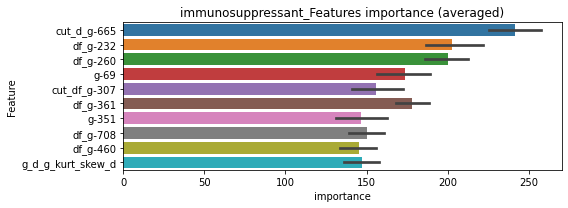

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000820937	valid_1's binary_logloss: 0.0331248


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000749032	valid_1's binary_logloss: 0.0300579


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000831563	valid_1's binary_logloss: 0.0159139


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000892058	valid_1's binary_logloss: 0.0161134


immunosuppressant logloss: 0.02380250765414894


neg labels: 3289 → selected neg labels: 3284


insulin_secretagogue, len(trt): 30, len(othr): 3284, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00214277	valid_1's binary_logloss: 0.0116254
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000715092	valid_1's binary_logloss: 0.00836287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002253	valid_1's binary_logloss: 0.00783064
[600]	training's binary_logloss: 0.000528297	valid_1's binary_logloss: 0.00396189
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000494251	valid_1's binary_logloss: 0.0039303
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239645	valid_1's binary_logloss: 0.00417438
[600]	training's binary_logloss: 0.000532415	valid_1's binary_logloss: 0.00136448
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000485593	valid_1's binary_logloss: 0.00128746
Training until validation scores don't improve for 30 rounds
[3

1 / 3 AUC score:1.000
y_Threshold: 0.0031084, Threshold: 0.0106270, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00744, conf_1:0.01382
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0106270
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0306270
Num_p_label: 8.0, Expected: 5.0, Adj_threshold_3: 0.0506270
threshold: 0.0506270, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00193917	valid_1's binary_logloss: 0.0126538
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000637071	valid_1's binary_logloss: 0.00935275
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00210503	valid_1's binary_logloss: 0.00740058
[600]	training's binary_logloss: 0.000508927	valid_1's binary_logloss: 0.0041992
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000482795	valid_1's binary_logloss: 0.00417821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221314	valid_1's binary_logloss: 0.00363272
[600]	training's binary_logloss: 0.00051695	valid_1's binary_logloss: 0.00117249
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000482331	valid_1's binary_logloss: 0.0011179
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0171078, Threshold: 0.0506270, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0057760 Vs.target_rate: 0.00126, Num_p_label: 23.0, conf_0:0.04050, conf_1:0.06075
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_1: 0.0506270
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0706270
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.0906270
threshold: 0.0906270, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00198375	valid_1's binary_logloss: 0.0141212
[600]	training's binary_logloss: 0.00049876	valid_1's binary_logloss: 0.010466
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000486096	valid_1's binary_logloss: 0.0103748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218527	valid_1's binary_logloss: 0.00424659
[600]	training's binary_logloss: 0.00051622	valid_1's binary_logloss: 0.00158019
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000458271	valid_1's binary_logloss: 0.00149466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211148	valid_1's binary_logloss: 0.00581341
[600]	training's binary_logloss: 0.000510384	valid_1's binary_logloss: 0.00243853
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000512286	valid_1's binary_log

3 / 3 AUC score:1.000
y_Threshold: 0.0336367, Threshold: 0.0906270, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00126, Num_p_label: 13.0, conf_0:0.08156, conf_1:0.09969
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_1: 0.0906270
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.1106270
threshold: 0.1106270, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


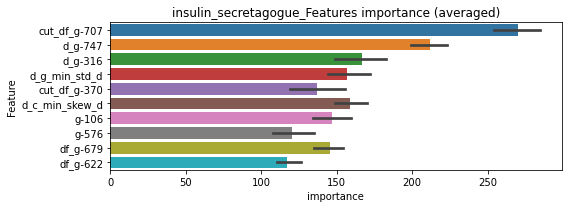

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000521555	valid_1's binary_logloss: 0.00969633


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000486115	valid_1's binary_logloss: 0.0016193


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000487816	valid_1's binary_logloss: 0.00220922


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000509565	valid_1's binary_logloss: 0.00517782


insulin_secretagogue logloss: 0.004676640170141684


neg labels: 3289 → selected neg labels: 3284


insulin_sensitizer, len(trt): 51, len(othr): 3284, target_rate: 0.0021416 → Adj_target_rate: 0.0023748
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0041145	valid_1's binary_logloss: 0.0353008
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000845321	valid_1's binary_logloss: 0.0286342
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0043897	valid_1's binary_logloss: 0.0191973
[600]	training's binary_logloss: 0.000795403	valid_1's binary_logloss: 0.0110885
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000655893	valid_1's binary_logloss: 0.0103267
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00432966	valid_1's binary_logloss: 0.0121691
[600]	training's binary_logloss: 0.000804134	valid_1's binary_logloss: 0.00504203
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000604863	valid_1's binary_logloss: 0.00441101
Training until validation scores don't improve for 30 rounds
[300]	

1 / 3 AUC score:1.000
y_Threshold: 0.0059832, Threshold: 0.0192209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00214, Num_p_label: 40.0, conf_0:0.01345, conf_1:0.02499
Num_p_label: 40.0, Expected: 8.5, Adj_threshold_1: 0.0192209
Num_p_label: 9.0, Expected: 8.5, Adj_threshold_2: 0.0392209
threshold: 0.0392209, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399265	valid_1's binary_logloss: 0.0190593
[600]	training's binary_logloss: 0.000761991	valid_1's binary_logloss: 0.0127926
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000594487	valid_1's binary_logloss: 0.0122792
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394794	valid_1's binary_logloss: 0.0133821
[600]	training's binary_logloss: 0.000754155	valid_1's binary_logloss: 0.00515739
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000565649	valid_1's binary_logloss: 0.00451654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00386629	valid_1's binary_logloss: 0.0141268
[600]	training's binary_logloss: 0.000758947	valid_1's binary_logloss: 0.00764484
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000553362	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0263749, Threshold: 0.0392209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0075339 Vs.target_rate: 0.00214, Num_p_label: 30.0, conf_0:0.03138, conf_1:0.04707
Num_p_label: 30.0, Expected: 8.5, Adj_threshold_1: 0.0392209
Num_p_label: 11.0, Expected: 8.5, Adj_threshold_2: 0.0592209
threshold: 0.0592209, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401532	valid_1's binary_logloss: 0.0225044
[600]	training's binary_logloss: 0.000742986	valid_1's binary_logloss: 0.0140652
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000566387	valid_1's binary_logloss: 0.0134178
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392121	valid_1's binary_logloss: 0.0114086
[600]	training's binary_logloss: 0.000759814	valid_1's binary_logloss: 0.0044355
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000581624	valid_1's binary_logloss: 0.00378839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00382991	valid_1's binary_logloss: 0.0204858
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000860786	valid_1's binary_logloss: 0.015186
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3 AUC score:1.000
y_Threshold: 0.0344455, Threshold: 0.0592209, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00214, Num_p_label: 11.0, conf_0:0.05330, conf_1:0.06514
threshold: 0.0592209, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


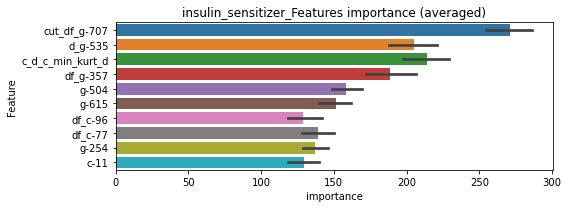

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000642175	valid_1's binary_logloss: 0.012564


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000557161	valid_1's binary_logloss: 0.0034919


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000590098	valid_1's binary_logloss: 0.0162763


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000583271	valid_1's binary_logloss: 0.0103715


insulin_sensitizer logloss: 0.010675940250690269


neg labels: 3289 → selected neg labels: 3281


integrin_inhibitor, len(trt): 42, len(othr): 3281, target_rate: 0.0017637 → Adj_target_rate: 0.0020135
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00375063	valid_1's binary_logloss: 0.0230103
[600]	training's binary_logloss: 0.000683768	valid_1's binary_logloss: 0.015349
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000559578	valid_1's binary_logloss: 0.0149879
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00401939	valid_1's binary_logloss: 0.0151406
[600]	training's binary_logloss: 0.000697347	valid_1's binary_logloss: 0.00883907
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000556473	valid_1's binary_logloss: 0.00849183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00434531	valid_1's binary_logloss: 0.010588
[600]	training's binary_logloss: 0.000738137	valid_1's binary_logloss: 0.00416971
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00058953	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0048267, Threshold: 0.0125405, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176, Num_p_label: 40.0, conf_0:0.00878, conf_1:0.01630
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_1: 0.0125405
Num_p_label: 7.0, Expected: 7.0, Adj_threshold_2: 0.0325405
threshold: 0.0325405, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00339468	valid_1's binary_logloss: 0.0206504
[600]	training's binary_logloss: 0.000662153	valid_1's binary_logloss: 0.0151399
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000592568	valid_1's binary_logloss: 0.0146744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00362546	valid_1's binary_logloss: 0.0146519
[600]	training's binary_logloss: 0.000680197	valid_1's binary_logloss: 0.00919703
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000618284	valid_1's binary_logloss: 0.00893306
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00385627	valid_1's binary_logloss: 0.00848337
[600]	training's binary_logloss: 0.000686682	valid_1's binary_logloss: 0.0029064
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.00054971	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0508822, Threshold: 0.0325405, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0057760 Vs.target_rate: 0.00176, Num_p_label: 23.0, conf_0:0.02603, conf_1:0.03905
Num_p_label: 23.0, Expected: 7.0, Adj_threshold_1: 0.0325405
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_2: 0.0525405
threshold: 0.0525405, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00360552	valid_1's binary_logloss: 0.0133957
[600]	training's binary_logloss: 0.000676431	valid_1's binary_logloss: 0.00716405
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00060422	valid_1's binary_logloss: 0.00690981
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00352139	valid_1's binary_logloss: 0.0201462
[600]	training's binary_logloss: 0.00066922	valid_1's binary_logloss: 0.0139472
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000594352	valid_1's binary_logloss: 0.013614
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370723	valid_1's binary_logloss: 0.0096716
[600]	training's binary_logloss: 0.000683731	valid_1's binary_logloss: 0.00376308
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000541789	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0372465, Threshold: 0.0525405, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0022602 Vs.target_rate: 0.00176, Num_p_label: 9.0, conf_0:0.04729, conf_1:0.05779
threshold: 0.0525405, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


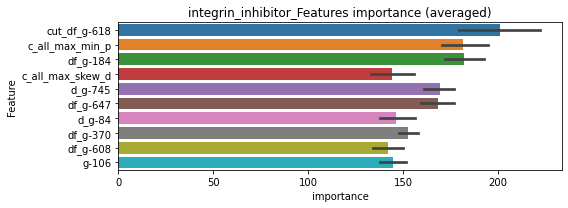

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000536088	valid_1's binary_logloss: 0.00668915


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000596382	valid_1's binary_logloss: 0.0150722


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000550146	valid_1's binary_logloss: 0.00346658


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000541979	valid_1's binary_logloss: 0.00444431


integrin_inhibitor logloss: 0.007419348649287024


neg labels: 3289 → selected neg labels: 3273


jak_inhibitor, len(trt): 92, len(othr): 3273, target_rate: 0.0038633 → Adj_target_rate: 0.0039212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00993024	valid_1's binary_logloss: 0.0664653
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.00207095	valid_1's binary_logloss: 0.0554242
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00970269	valid_1's binary_logloss: 0.0644585
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00190153	valid_1's binary_logloss: 0.0548565
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00960188	valid_1's binary_logloss: 0.0399833
[600]	training's binary_logloss: 0.00154084	valid_1's binary_logloss: 0.0236923
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.00109452	valid_1's binary_logloss: 0.0223983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00991094	valid_1's binary_logloss: 0.0512281
[600]	train

1 / 3 AUC score:0.996
y_Threshold: 0.0141481, Threshold: 0.0894278, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00386, Num_p_label: 40.0, conf_0:0.06260, conf_1:0.11626
Num_p_label: 40.0, Expected: 15.4, Adj_threshold_1: 0.0894278
Num_p_label: 36.0, Expected: 15.4, Adj_threshold_2: 0.1094278
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.1294278
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_4: 0.1494278
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_5: 0.1694278
threshold: 0.1694278, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 646.0/3779, y_label_rate: 0.1709447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00921526	valid_1's binary_logloss: 0.0358874
[600]	training's binary_logloss: 0.00144389	valid_1's binary_logloss: 0.018041
[900]	training's binary_logloss: 0.000799336	valid_1's binary_logloss: 0.0158522
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000746939	valid_1's binary_logloss: 0.0156757
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791877	valid_1's binary_logloss: 0.0575312
[600]	training's binary_logloss: 0.00133316	valid_1's binary_logloss: 0.0462785
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00117537	valid_1's binary_logloss: 0.0457123
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00837388	valid_1's binary_logloss: 0.0440006
[600]	training's binary_logloss: 0.00139582	valid_1's binary_logloss: 0.0307125
Early stopping, best itera

2 / 3 AUC score:0.999
y_Threshold: 0.0364504, Threshold: 0.1694278, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 638.0/3763
p_label_rate: 0.0133099 Vs.target_rate: 0.00386, Num_p_label: 53.0, conf_0:0.13554, conf_1:0.20331
Num_p_label: 53.0, Expected: 15.4, Adj_threshold_1: 0.1694278
Num_p_label: 50.0, Expected: 15.4, Adj_threshold_2: 0.1894278
Num_p_label: 44.0, Expected: 15.4, Adj_threshold_3: 0.2094278
Num_p_label: 42.0, Expected: 15.4, Adj_threshold_4: 0.2294278
Num_p_label: 38.0, Expected: 15.4, Adj_threshold_5: 0.2494278
Num_p_label: 37.0, Expected: 15.4, Adj_threshold_6: 0.2694278
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_7: 0.2894278
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_8: 0.3094278
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_9: 0.3294278
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_10: 0.3494278
threshold: 0.3694278, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 638.0/3763, y_label_rate: 0.1695456

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0076682	valid_1's binary_logloss: 0.0376686
[600]	training's binary_logloss: 0.00130996	valid_1's binary_logloss: 0.0263723
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.0010312	valid_1's binary_logloss: 0.0258943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0077736	valid_1's binary_logloss: 0.0381996
[600]	training's binary_logloss: 0.00133661	valid_1's binary_logloss: 0.0254441
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000920518	valid_1's binary_logloss: 0.0242427
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00834769	valid_1's binary_logloss: 0.0399538
[600]	training's binary_logloss: 0.00134996	valid_1's binary_logloss: 0.024061
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000990482	valid_1's binary_logloss: 0.02

3 / 3 AUC score:0.999
y_Threshold: 0.0486160, Threshold: 0.3694278, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 634.0/3755
p_label_rate: 0.0085384 Vs.target_rate: 0.00386, Num_p_label: 34.0, conf_0:0.33248, conf_1:0.40637
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_1: 0.3694278
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_2: 0.3894278
Num_p_label: 30.0, Expected: 15.4, Adj_threshold_3: 0.4094278
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.4294278
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_5: 0.4494278
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_6: 0.4694278
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_7: 0.4894278
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_8: 0.5094278
threshold: 0.5094278, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 634.0/3755, y_label_rate: 0.1688415


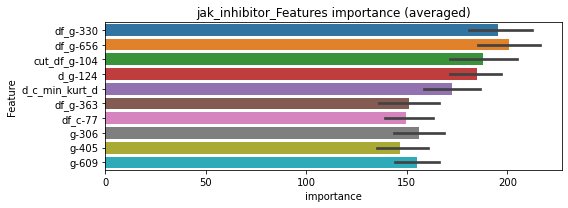

len(train_index) : 2816
len(valid_index) : 939
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000806714	valid_1's binary_logloss: 0.0189905


len(train_index) : 2816
len(valid_index) : 939
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.0008473	valid_1's binary_logloss: 0.0267654


len(train_index) : 2816
len(valid_index) : 939
================================= fold 3/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000753979	valid_1's binary_logloss: 0.0267657


len(train_index) : 2817
len(valid_index) : 938
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000902196	valid_1's binary_logloss: 0.0214475


jak_inhibitor logloss: 0.02349281493775346


neg labels: 3289 → selected neg labels: 3248


kit_inhibitor, len(trt): 273, len(othr): 3248, target_rate: 0.0114638 → Adj_target_rate: 0.0098841
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0417511	valid_1's binary_logloss: 0.251902
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0482582	valid_1's binary_logloss: 0.251863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0390825	valid_1's binary_logloss: 0.263845
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0446645	valid_1's binary_logloss: 0.262653
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0452076	valid_1's binary_logloss: 0.2236
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.0109853	valid_1's binary_logloss: 0.20807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0406893	valid_1's binary_logloss: 0.221025


1 / 3 AUC score:0.908
y_Threshold: 0.0901414, Threshold: 0.6995882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 405 → Positive_corect_labels: 512/3492


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0275211	valid_1's binary_logloss: 0.21253


p_label_rate: 0.0100452 Vs.target_rate: 0.01146, Num_p_label: 40.0, conf_0:0.48971, conf_1:0.80000
threshold: 0.6995882, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 512.0/3492, y_label_rate: 0.1466208
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0194429	valid_1's binary_logloss: 0.141761
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.00982942	valid_1's binary_logloss: 0.132681
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0181203	valid_1's binary_logloss: 0.172429
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0219175	valid_1's binary_logloss: 0.171834
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187146	valid_1's binary_logloss: 0.1387
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.0111031	valid_1's binary_logloss: 0.134562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0187216	valid_1's binary_logloss: 0.140246


2 / 3 AUC score:0.973
y_Threshold: 0.0899956, Threshold: 0.6995882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 126 → Positive_corect_labels: 449.0/3366


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.0119423	valid_1's binary_logloss: 0.135483


p_label_rate: 0.0193370 Vs.target_rate: 0.01146, Num_p_label: 77.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 77.0, Expected: 45.6, Adj_threshold_1: 0.6995882
Num_p_label: 75.0, Expected: 45.6, Adj_threshold_2: 0.7195882
Num_p_label: 68.0, Expected: 45.6, Adj_threshold_3: 0.7395882
threshold: 0.7395882, positive_p_label: 68.0/3982, p_label_rate: 0.0170768
positive_y_label: 449.0/3366, y_label_rate: 0.1333928
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0112117	valid_1's binary_logloss: 0.12418
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00726324	valid_1's binary_logloss: 0.121685
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139844	valid_1's binary_logloss: 0.0762667
[600]	training's binary_logloss: 0.00233075	valid_1's binary_logloss: 0.0619331
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00225361	valid_1's binary_logloss: 0.0616694
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0125073	valid_1's binary_logloss: 0.0843608
[600]	training's binary_logloss: 0.00209985	valid_1's binary_logloss: 0.0711063
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00223841	valid_1's binary_logloss: 0.070651
Training until validation scores don't improve for 30 rounds
[300]	training's b

3 / 3 AUC score:0.995
y_Threshold: 0.0617913, Threshold: 0.7395882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 423.0/3314
p_label_rate: 0.0203415 Vs.target_rate: 0.01146, Num_p_label: 81.0, conf_0:0.50000, conf_1:0.80000
Num_p_label: 81.0, Expected: 45.6, Adj_threshold_1: 0.7395882
Num_p_label: 79.0, Expected: 45.6, Adj_threshold_2: 0.7595882
Num_p_label: 76.0, Expected: 45.6, Adj_threshold_3: 0.7795882
Num_p_label: 73.0, Expected: 45.6, Adj_threshold_4: 0.7995882
threshold: 0.7995882, positive_p_label: 73.0/3982, p_label_rate: 0.0183325
positive_y_label: 423.0/3314, y_label_rate: 0.1276403


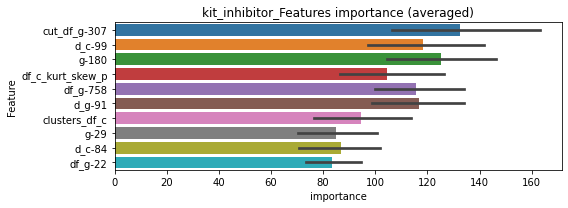

len(train_index) : 2485
len(valid_index) : 829
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00252236	valid_1's binary_logloss: 0.091767


len(train_index) : 2485
len(valid_index) : 829
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.00192848	valid_1's binary_logloss: 0.0770427


len(train_index) : 2486
len(valid_index) : 828
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00196375	valid_1's binary_logloss: 0.0595212


len(train_index) : 2486
len(valid_index) : 828
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00193952	valid_1's binary_logloss: 0.072591


kit_inhibitor logloss: 0.0752360102784299


neg labels: 3289 → selected neg labels: 3289


laxative, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386754	valid_1's binary_logloss: 0.000552198
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000188534	valid_1's binary_logloss: 0.000287071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390217	valid_1's binary_logloss: 0.000847952
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000192663	valid_1's binary_logloss: 0.000553748
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390581	valid_1's binary_logloss: 0.00061964
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000194676	valid_1's binary_logloss: 0.000351382
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000392719	valid_1's binary_logloss: 0.00047824


1 / 3 AUC score:1.000
y_Threshold: 0.0005160, Threshold: 0.0017240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00121, conf_1:0.00224
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0017240
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0217240


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000191023	valid_1's binary_logloss: 0.000243622


threshold: 0.0217240, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359189	valid_1's binary_logloss: 0.000462439
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000179876	valid_1's binary_logloss: 0.00023928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359448	valid_1's binary_logloss: 0.000562137
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000178384	valid_1's binary_logloss: 0.000348498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362923	valid_1's binary_logloss: 0.000381477
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000173414	valid_1's binary_logloss: 0.000181853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000363313	valid_1's binary_logloss: 0.000621908


2 / 3 AUC score:1.000
y_Threshold: 0.1508390, Threshold: 0.0217240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.01738, conf_1:0.02607
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0217240
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0417240
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0617240
threshold: 0.0617240, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[600]	training's binary_logloss: 0.000175005	valid_1's binary_logloss: 0.000340804
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000175005	valid_1's binary_logloss: 0.000340804


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359189	valid_1's binary_logloss: 0.000462439
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000179876	valid_1's binary_logloss: 0.00023928
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000359448	valid_1's binary_logloss: 0.000562137
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000178384	valid_1's binary_logloss: 0.000348498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362923	valid_1's binary_logloss: 0.000381477
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000173414	valid_1's binary_logloss: 0.000181853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000363313	valid_1's binary_logloss: 0.000621908


3 / 3 AUC score:1.000
y_Threshold: 0.1508390, Threshold: 0.0617240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.05555, conf_1:0.06790
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0617240
threshold: 0.0617240, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


[600]	training's binary_logloss: 0.000175005	valid_1's binary_logloss: 0.000340804
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000175005	valid_1's binary_logloss: 0.000340804


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


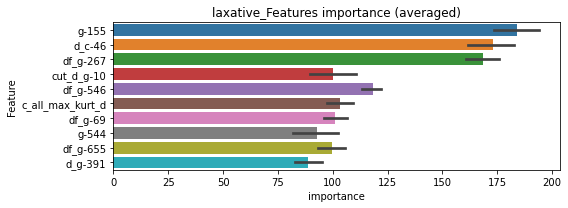

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000176318	valid_1's binary_logloss: 0.000244901
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000176831	valid_1's binary_logloss: 0.000409099
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000179924	valid_1's binary_logloss: 0.000191817
Training until validation scores don't improve for 30 rounds


laxative logloss: 0.00029075857487573036


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00017663	valid_1's binary_logloss: 0.00031619
neg labels: 3289 → selected neg labels: 3289


leukotriene_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000411271	valid_1's binary_logloss: 0.000647788
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000202032	valid_1's binary_logloss: 0.000362402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000404481	valid_1's binary_logloss: 0.00408913
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000197278	valid_1's binary_logloss: 0.00357114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419368	valid_1's binary_logloss: 0.000447454
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000200398	valid_1's binary_logloss: 0.000216246
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000406245	valid_1's binary_logloss: 0.000890834


1 / 3 AUC score:1.000
y_Threshold: 0.0006283, Threshold: 0.0016318, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00114, conf_1:0.00212
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0016318
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_2: 0.0216318
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_3: 0.0416318
threshold: 0.0416318, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000199316	valid_1's binary_logloss: 0.000525569


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000379512	valid_1's binary_logloss: 0.000498768
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000191686	valid_1's binary_logloss: 0.000266901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038276	valid_1's binary_logloss: 0.00152604
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00019208	valid_1's binary_logloss: 0.00105492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000381726	valid_1's binary_logloss: 0.000430527
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00019217	valid_1's binary_logloss: 0.000218152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000381946	valid_1's binary_logloss: 0.000449287


2 / 3 AUC score:1.000
y_Threshold: 0.1069092, Threshold: 0.0416318, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025, Num_p_label: 9.0, conf_0:0.03331, conf_1:0.04996
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0416318
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.0616318
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.0816318
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.1016318
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1216318
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_6: 0.1416318
threshold: 0.1416318, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000192342	valid_1's binary_logloss: 0.000230551


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000379512	valid_1's binary_logloss: 0.000498768
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000191686	valid_1's binary_logloss: 0.000266901
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00038276	valid_1's binary_logloss: 0.00152604
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00019208	valid_1's binary_logloss: 0.00105492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000381726	valid_1's binary_logloss: 0.000430527
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00019217	valid_1's binary_logloss: 0.000218152
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000381946	valid_1's binary_logloss: 0.000449287


3 / 3 AUC score:1.000
y_Threshold: 0.1069092, Threshold: 0.1416318, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.12747, conf_1:0.15579
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1416318
threshold: 0.1416318, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000192342	valid_1's binary_logloss: 0.000230551


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


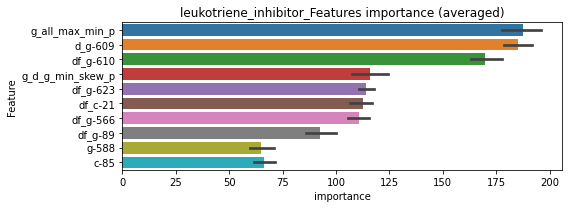

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000185438	valid_1's binary_logloss: 0.000292185
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000183836	valid_1's binary_logloss: 0.00083391
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000186472	valid_1's binary_logloss: 0.000210908
Training until validation scores don't improve for 30 rounds


leukotriene_inhibitor logloss: 0.00038933014737311806


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000183909	valid_1's binary_logloss: 0.000219789
neg labels: 3289 → selected neg labels: 3282


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3282, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449973	valid_1's binary_logloss: 0.0393206
[600]	training's binary_logloss: 0.000885503	valid_1's binary_logloss: 0.0306999
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000945643	valid_1's binary_logloss: 0.0305846
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445199	valid_1's binary_logloss: 0.0445163
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00100884	valid_1's binary_logloss: 0.0388929
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527027	valid_1's binary_logloss: 0.0126495
[600]	training's binary_logloss: 0.000956581	valid_1's binary_logloss: 0.00436112
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000671165	valid_1's binary_logloss: 0.00363163
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:0.999
y_Threshold: 0.0058281, Threshold: 0.0126102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.00883, conf_1:0.01639
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0126102
Num_p_label: 9.0, Expected: 10.4, Adj_threshold_2: 0.0326102
threshold: 0.0326102, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.004329	valid_1's binary_logloss: 0.0330734
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000964112	valid_1's binary_logloss: 0.026415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448717	valid_1's binary_logloss: 0.0277361
[600]	training's binary_logloss: 0.000881722	valid_1's binary_logloss: 0.0192966
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000931335	valid_1's binary_logloss: 0.0190602
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00435693	valid_1's binary_logloss: 0.0266961
[600]	training's binary_logloss: 0.000866883	valid_1's binary_logloss: 0.0193977
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000735555	valid_1's binary_logloss: 0.0189394
Training until validation scores don't improve for 30 rounds
[300]	tra

2 / 3 AUC score:1.000
y_Threshold: 0.0243306, Threshold: 0.0326102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0055249 Vs.target_rate: 0.00260, Num_p_label: 22.0, conf_0:0.02609, conf_1:0.03913
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0326102
Num_p_label: 7.0, Expected: 10.4, Adj_threshold_2: 0.0526102
threshold: 0.0526102, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0044794	valid_1's binary_logloss: 0.0294233
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00142033	valid_1's binary_logloss: 0.0249674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00411365	valid_1's binary_logloss: 0.0341889
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000941878	valid_1's binary_logloss: 0.0270309
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00436057	valid_1's binary_logloss: 0.0286467
[600]	training's binary_logloss: 0.000866467	valid_1's binary_logloss: 0.0209432
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000662989	valid_1's binary_logloss: 0.0202656
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00433291	valid_1's binary_logloss: 0.0380625
Early sto

3 / 3 AUC score:0.999
y_Threshold: 0.0194390, Threshold: 0.0526102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0027624 Vs.target_rate: 0.00260, Num_p_label: 11.0, conf_0:0.04735, conf_1:0.05787
threshold: 0.0526102, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


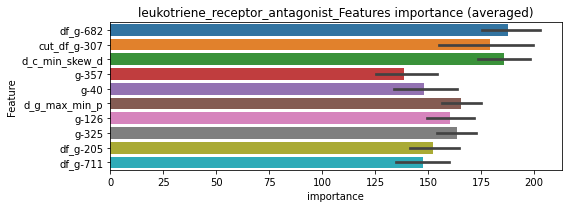

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000712513	valid_1's binary_logloss: 0.0137677


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000690568	valid_1's binary_logloss: 0.0181836


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.000629911	valid_1's binary_logloss: 0.0125703


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000639366	valid_1's binary_logloss: 0.013776


leukotriene_receptor_antagonist logloss: 0.014586028274532668


neg labels: 3289 → selected neg labels: 3288


lipase_inhibitor, len(trt): 12, len(othr): 3288, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000682874	valid_1's binary_logloss: 0.00711741
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000275672	valid_1's binary_logloss: 0.00637469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701043	valid_1's binary_logloss: 0.00220802
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000264397	valid_1's binary_logloss: 0.00113065
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000716584	valid_1's binary_logloss: 0.000934071
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000267018	valid_1's binary_logloss: 0.000379432
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000708825	valid_1's binary_logloss: 0.00286911


1 / 3 AUC score:1.000
y_Threshold: 0.0009685, Threshold: 0.0031780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00222, conf_1:0.00413
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031780
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_2: 0.0231780
threshold: 0.0231780, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000264452	valid_1's binary_logloss: 0.0019191


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626068	valid_1's binary_logloss: 0.00933745
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000252923	valid_1's binary_logloss: 0.00832244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662923	valid_1's binary_logloss: 0.00172101
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000250856	valid_1's binary_logloss: 0.000854438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671504	valid_1's binary_logloss: 0.000754357
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000255892	valid_1's binary_logloss: 0.000290234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000658938	valid_1's binary_logloss: 0.00321077


2 / 3 AUC score:1.000
y_Threshold: 0.0052190, Threshold: 0.0231780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0025113 Vs.target_rate: 0.00050, Num_p_label: 10.0, conf_0:0.01854, conf_1:0.02781
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.0231780
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0431780
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.0631780


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000244559	valid_1's binary_logloss: 0.00222111


threshold: 0.0631780, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000626068	valid_1's binary_logloss: 0.00933745
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000252923	valid_1's binary_logloss: 0.00832244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000662923	valid_1's binary_logloss: 0.00172101
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000250856	valid_1's binary_logloss: 0.000854438
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000671504	valid_1's binary_logloss: 0.000754357
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000255892	valid_1's binary_logloss: 0.000290234
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000658938	valid_1's binary_logloss: 0.00321077


3 / 3 AUC score:1.000
y_Threshold: 0.0052190, Threshold: 0.0631780, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050, Num_p_label: 4.0, conf_0:0.05686, conf_1:0.06950
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0631780
threshold: 0.0631780, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000244559	valid_1's binary_logloss: 0.00222111


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


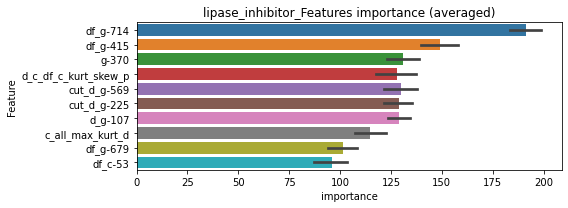

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000288867	valid_1's binary_logloss: 0.0085808
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000256537	valid_1's binary_logloss: 0.000869408


================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000255561	valid_1's binary_logloss: 0.000291572
Training until validation scores don't improve for 30 rounds


lipase_inhibitor logloss: 0.0030020848490030874


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000255299	valid_1's binary_logloss: 0.00226071
neg labels: 3289 → selected neg labels: 3284


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3284, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531368	valid_1's binary_logloss: 0.0350828
[600]	training's binary_logloss: 0.000950224	valid_1's binary_logloss: 0.0263434
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000890761	valid_1's binary_logloss: 0.0260113
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052607	valid_1's binary_logloss: 0.0255843
[600]	training's binary_logloss: 0.000952154	valid_1's binary_logloss: 0.0154769
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000699369	valid_1's binary_logloss: 0.0147265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560903	valid_1's binary_logloss: 0.0173412
[600]	training's binary_logloss: 0.0010017	valid_1's binary_logloss: 0.0092545
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000735098	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0066070, Threshold: 0.0374514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.02622, conf_1:0.04869
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0374514
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.0574514
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_3: 0.0774514
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_4: 0.0974514
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_5: 0.1174514
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_6: 0.1374514
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_7: 0.1574514
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_8: 0.1774514
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_9: 0.1974514
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_10: 0.2174514
threshold: 0.2374514, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481051	valid_1's binary_logloss: 0.0272217
[600]	training's binary_logloss: 0.000919297	valid_1's binary_logloss: 0.0166813
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000891238	valid_1's binary_logloss: 0.0163591
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00473723	valid_1's binary_logloss: 0.024147
[600]	training's binary_logloss: 0.00090479	valid_1's binary_logloss: 0.0154431
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000736547	valid_1's binary_logloss: 0.0148166
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472383	valid_1's binary_logloss: 0.0206408
[600]	training's binary_logloss: 0.000917396	valid_1's binary_logloss: 0.0131233
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000662405	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0289544, Threshold: 0.2374514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0062783 Vs.target_rate: 0.00256, Num_p_label: 25.0, conf_0:0.18996, conf_1:0.28494
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_1: 0.2374514
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_2: 0.2574514
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_3: 0.2774514
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_4: 0.2974514
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_5: 0.3174514
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_6: 0.3374514
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_7: 0.3574514
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_8: 0.3774514
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_9: 0.3974514
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_10: 0.4174514
threshold: 0.4374514, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00474337	valid_1's binary_logloss: 0.0273709
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.0016912	valid_1's binary_logloss: 0.0215041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00472283	valid_1's binary_logloss: 0.0202037
[600]	training's binary_logloss: 0.000914453	valid_1's binary_logloss: 0.0124357
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000719609	valid_1's binary_logloss: 0.0119481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481766	valid_1's binary_logloss: 0.0229073
[600]	training's binary_logloss: 0.000901401	valid_1's binary_logloss: 0.0127194
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.000704636	valid_1's binary_logloss: 0.0118329
Training until validation scores don't improve for 30 rounds
[300]	tr

3 / 3 AUC score:1.000
y_Threshold: 0.0593011, Threshold: 0.4374514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0037670 Vs.target_rate: 0.00256, Num_p_label: 15.0, conf_0:0.39371, conf_1:0.48120
threshold: 0.4374514, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


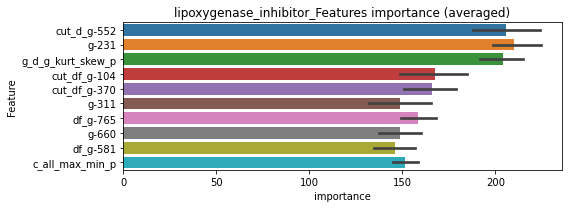

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000650182	valid_1's binary_logloss: 0.0112793


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000649818	valid_1's binary_logloss: 0.0176818


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000733919	valid_1's binary_logloss: 0.0119647


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000764186	valid_1's binary_logloss: 0.017493


lipoxygenase_inhibitor logloss: 0.014604641851827626


neg labels: 3289 → selected neg labels: 3287


lxr_agonist, len(trt): 6, len(othr): 3287, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000436073	valid_1's binary_logloss: 0.000613358
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000219815	valid_1's binary_logloss: 0.00033094
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000425995	valid_1's binary_logloss: 0.00196079
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000214403	valid_1's binary_logloss: 0.00146253
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000440122	valid_1's binary_logloss: 0.000680389
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000222001	valid_1's binary_logloss: 0.000367088
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000434489	valid_1's binary_logloss: 0.00255192


1 / 3 AUC score:1.000
y_Threshold: 0.0006635, Threshold: 0.0031340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00219, conf_1:0.00407
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0031340
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0231340
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0431340
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.0631340
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_5: 0.0831340
threshold: 0.0831340, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000218615	valid_1's binary_logloss: 0.00196135


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393991	valid_1's binary_logloss: 0.000475204
[600]	training's binary_logloss: 0.000194851	valid_1's binary_logloss: 0.000241113
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000194291	valid_1's binary_logloss: 0.000240473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000394352	valid_1's binary_logloss: 0.000771991
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000197204	valid_1's binary_logloss: 0.000458011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390558	valid_1's binary_logloss: 0.000472887
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000194707	valid_1's binary_logloss: 0.000243428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390561	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0843766, Threshold: 0.0831340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00025, Num_p_label: 11.0, conf_0:0.06651, conf_1:0.09976
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0831340
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_2: 0.1031340
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.1231340
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.1431340
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_5: 0.1631340


[600]	training's binary_logloss: 0.00019577	valid_1's binary_logloss: 0.00106714
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000195609	valid_1's binary_logloss: 0.00106697


Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.1831340
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.2031340
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_8: 0.2231340
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.2431340
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.2631340
threshold: 0.2831340, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000393991	valid_1's binary_logloss: 0.000475204
[600]	training's binary_logloss: 0.000194851	valid_1's binary_logloss: 0.000241113
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000194291	valid_1's binary_logloss: 0.000240473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000394352	valid_1's binary_logloss: 0.000771991
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000197204	valid_1's binary_logloss: 0.000458011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390558	valid_1's binary_logloss: 0.000472887
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000194707	valid_1's binary_logloss: 0.000243428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390561	valid_1's binary_logloss:

3 / 3 AUC score:1.000
y_Threshold: 0.0843766, Threshold: 0.2831340, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025, Num_p_label: 5.0, conf_0:0.25482, conf_1:0.31145
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.2831340
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3031340
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.3231340
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.3431340
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.3631340


[600]	training's binary_logloss: 0.00019577	valid_1's binary_logloss: 0.00106714
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000195609	valid_1's binary_logloss: 0.00106697


Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.3831340
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.4031340
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_8: 0.4231340
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_9: 0.4431340
threshold: 0.4431340, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


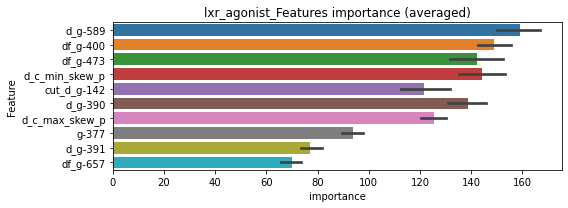

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000198295	valid_1's binary_logloss: 0.000243471
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000199014	valid_1's binary_logloss: 0.000455505
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000197849	valid_1's binary_logloss: 0.000252801
Training until validation scores don't improve for 30 rounds


lxr_agonist logloss: 0.0005035784165249475


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000196451	valid_1's binary_logloss: 0.00106254
neg labels: 3289 → selected neg labels: 3284


mdm_inhibitor, len(trt): 31, len(othr): 3284, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252415	valid_1's binary_logloss: 0.0131369
[600]	training's binary_logloss: 0.000550499	valid_1's binary_logloss: 0.00835011
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.0004878	valid_1's binary_logloss: 0.00814481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270648	valid_1's binary_logloss: 0.00782043
[600]	training's binary_logloss: 0.000555556	valid_1's binary_logloss: 0.00343944
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000504663	valid_1's binary_logloss: 0.00328883
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268135	valid_1's binary_logloss: 0.00616964
[600]	training's binary_logloss: 0.000565026	valid_1's binary_logloss: 0.00255947
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000508268	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0041815, Threshold: 0.0661748, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.04632, conf_1:0.08603
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0661748
Num_p_label: 37.0, Expected: 5.2, Adj_threshold_2: 0.0861748
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_3: 0.1061748
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_4: 0.1261748
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_5: 0.1461748
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_6: 0.1661748
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_7: 0.1861748
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_8: 0.2061748
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_9: 0.2261748
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_10: 0.2461748
threshold: 0.2661748, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227761	valid_1's binary_logloss: 0.0120713
[600]	training's binary_logloss: 0.000514004	valid_1's binary_logloss: 0.00804454
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000483306	valid_1's binary_logloss: 0.0080192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232922	valid_1's binary_logloss: 0.00552366
[600]	training's binary_logloss: 0.000521728	valid_1's binary_logloss: 0.00206794
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000490162	valid_1's binary_logloss: 0.00199866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024143	valid_1's binary_logloss: 0.00469858
[600]	training's binary_logloss: 0.00053308	valid_1's binary_logloss: 0.00143502
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000490015	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0247901, Threshold: 0.2661748, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0080362 Vs.target_rate: 0.00130, Num_p_label: 32.0, conf_0:0.21294, conf_1:0.31941
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_1: 0.2661748
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_2: 0.2861748
Num_p_label: 31.0, Expected: 5.2, Adj_threshold_3: 0.3061748
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_4: 0.3261748
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_5: 0.3461748
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_6: 0.3661748
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_7: 0.3861748
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_8: 0.4061748
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_9: 0.4261748
Num_p_label: 27.0, Expected: 5.2, Adj_threshold_10: 0.4461748
threshold: 0.4661748, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227761	valid_1's binary_logloss: 0.0120713
[600]	training's binary_logloss: 0.000514004	valid_1's binary_logloss: 0.00804454
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000483306	valid_1's binary_logloss: 0.0080192
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232922	valid_1's binary_logloss: 0.00552366
[600]	training's binary_logloss: 0.000521728	valid_1's binary_logloss: 0.00206794
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000490162	valid_1's binary_logloss: 0.00199866
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0024143	valid_1's binary_logloss: 0.00469858
[600]	training's binary_logloss: 0.00053308	valid_1's binary_logloss: 0.00143502
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000490015	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0247901, Threshold: 0.4661748, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0065294 Vs.target_rate: 0.00130, Num_p_label: 26.0, conf_0:0.41956, conf_1:0.51279
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_1: 0.4661748
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.4861748
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_3: 0.5061748
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_4: 0.5261748
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_5: 0.5461748
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_6: 0.5661748
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_7: 0.5861748
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_8: 0.6061748
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_9: 0.6261748
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_10: 0.6461748
threshold: 0.6661748, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


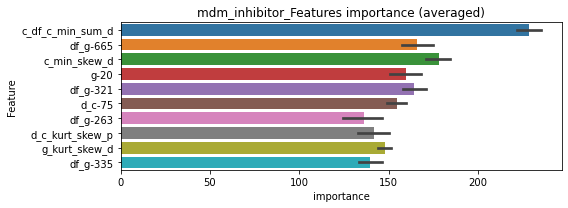

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000533602	valid_1's binary_logloss: 0.00772694


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00049441	valid_1's binary_logloss: 0.00235931


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000509236	valid_1's binary_logloss: 0.00147989


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000509805	valid_1's binary_logloss: 0.00208701


mdm_inhibitor logloss: 0.0034133688685286977


neg labels: 3289 → selected neg labels: 3273


mek_inhibitor, len(trt): 72, len(othr): 3273, target_rate: 0.0030234 → Adj_target_rate: 0.0031837
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00815013	valid_1's binary_logloss: 0.0449642
[600]	training's binary_logloss: 0.00125637	valid_1's binary_logloss: 0.0299797
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000739226	valid_1's binary_logloss: 0.0282389
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00874692	valid_1's binary_logloss: 0.03916
[600]	training's binary_logloss: 0.0012777	valid_1's binary_logloss: 0.0225086
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000790333	valid_1's binary_logloss: 0.0205537
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00878229	valid_1's binary_logloss: 0.0253736
[600]	training's binary_logloss: 0.00130626	valid_1's binary_logloss: 0.00867855
[900]	training's binary_logloss: 0.000735345	valid_1's binary_logloss: 0.00668991
Early stopping, best iter

1 / 3 AUC score:1.000
y_Threshold: 0.0089772, Threshold: 0.0268707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 652/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00302, Num_p_label: 40.0, conf_0:0.01881, conf_1:0.03493
Num_p_label: 40.0, Expected: 12.0, Adj_threshold_1: 0.0268707
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.0468707
threshold: 0.0468707, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00751418	valid_1's binary_logloss: 0.0366588
[600]	training's binary_logloss: 0.00119909	valid_1's binary_logloss: 0.0232175
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000820393	valid_1's binary_logloss: 0.0220629
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00771375	valid_1's binary_logloss: 0.0326197
[600]	training's binary_logloss: 0.00119464	valid_1's binary_logloss: 0.0163723
[900]	training's binary_logloss: 0.000693419	valid_1's binary_logloss: 0.0144483
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000675677	valid_1's binary_logloss: 0.0143362
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00759032	valid_1's binary_logloss: 0.0417684
[600]	training's binary_logloss: 0.00119279	valid_1's binary_logloss: 0.0312343
Early stopping, best ite

2 / 3 AUC score:1.000
y_Threshold: 0.0356235, Threshold: 0.0468707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0097941 Vs.target_rate: 0.00302, Num_p_label: 39.0, conf_0:0.03750, conf_1:0.05624
Num_p_label: 39.0, Expected: 12.0, Adj_threshold_1: 0.0468707
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.0668707
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_3: 0.0868707
Num_p_label: 15.0, Expected: 12.0, Adj_threshold_4: 0.1068707
threshold: 0.1068707, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00754036	valid_1's binary_logloss: 0.03367
[600]	training's binary_logloss: 0.00119701	valid_1's binary_logloss: 0.0187284
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00080731	valid_1's binary_logloss: 0.017508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00712663	valid_1's binary_logloss: 0.0265472
[600]	training's binary_logloss: 0.00118435	valid_1's binary_logloss: 0.0122817
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00070823	valid_1's binary_logloss: 0.0100114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00741506	valid_1's binary_logloss: 0.038484
[600]	training's binary_logloss: 0.00119019	valid_1's binary_logloss: 0.0273499
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000818609	valid_1's binary_logloss: 0.026

3 / 3 AUC score:1.000
y_Threshold: 0.0390069, Threshold: 0.1068707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3777
p_label_rate: 0.0037670 Vs.target_rate: 0.00302, Num_p_label: 15.0, conf_0:0.09618, conf_1:0.11756
threshold: 0.1068707, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 645.0/3777, y_label_rate: 0.1707705


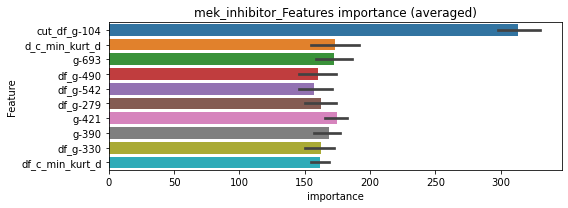

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000775901	valid_1's binary_logloss: 0.0193927


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000695325	valid_1's binary_logloss: 0.0155272


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000771225	valid_1's binary_logloss: 0.0176004


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000896065	valid_1's binary_logloss: 0.0219744


mek_inhibitor logloss: 0.018627406347100604


neg labels: 3289 → selected neg labels: 3276


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3276, target_rate: 0.0031074 → Adj_target_rate: 0.0032587
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00699972	valid_1's binary_logloss: 0.0316647
[600]	training's binary_logloss: 0.00117321	valid_1's binary_logloss: 0.018971
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000840368	valid_1's binary_logloss: 0.0177876
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00658176	valid_1's binary_logloss: 0.0378454
[600]	training's binary_logloss: 0.00113849	valid_1's binary_logloss: 0.0267302
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000791992	valid_1's binary_logloss: 0.0255617
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00676389	valid_1's binary_logloss: 0.0425343
[600]	training's binary_logloss: 0.00116184	valid_1's binary_logloss: 0.034946
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.00109712	valid_1's binary_logloss: 0.

1 / 3 AUC score:0.999
y_Threshold: 0.0084859, Threshold: 0.0224517, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00311, Num_p_label: 40.0, conf_0:0.01572, conf_1:0.02919
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_1: 0.0224517
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_2: 0.0424517
threshold: 0.0424517, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3791, y_label_rate: 0.1717225
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00579855	valid_1's binary_logloss: 0.0325194
[600]	training's binary_logloss: 0.00105581	valid_1's binary_logloss: 0.0206352
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000659375	valid_1's binary_logloss: 0.0190608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00573227	valid_1's binary_logloss: 0.0431992
[600]	training's binary_logloss: 0.00104952	valid_1's binary_logloss: 0.032728
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000832614	valid_1's binary_logloss: 0.0317369
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598748	valid_1's binary_logloss: 0.0325421
[600]	training's binary_logloss: 0.0010672	valid_1's binary_logloss: 0.0234958
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000871186	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0353897, Threshold: 0.0424517, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0115520 Vs.target_rate: 0.00311, Num_p_label: 46.0, conf_0:0.03396, conf_1:0.05094
Num_p_label: 46.0, Expected: 12.4, Adj_threshold_1: 0.0424517
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_2: 0.0624517
Num_p_label: 15.0, Expected: 12.4, Adj_threshold_3: 0.0824517
threshold: 0.0824517, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559682	valid_1's binary_logloss: 0.0325025
[600]	training's binary_logloss: 0.00101836	valid_1's binary_logloss: 0.022495
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00110058	valid_1's binary_logloss: 0.0224456
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554562	valid_1's binary_logloss: 0.0347069
[600]	training's binary_logloss: 0.00101192	valid_1's binary_logloss: 0.024137
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000722012	valid_1's binary_logloss: 0.0227197
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00567832	valid_1's binary_logloss: 0.0299478
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.001206	valid_1's binary_logloss: 0.022293
Training until validation scores don't improve for 30 rounds
[300]	training'

3 / 3 AUC score:1.000
y_Threshold: 0.0397938, Threshold: 0.0824517, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0042692 Vs.target_rate: 0.00311, Num_p_label: 17.0, conf_0:0.07421, conf_1:0.09070
threshold: 0.0824517, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


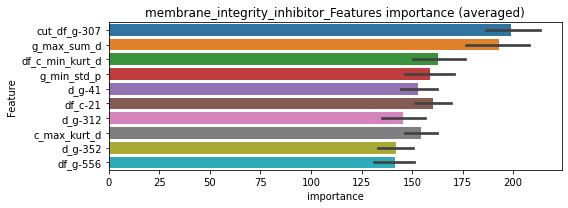

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000721974	valid_1's binary_logloss: 0.0248376


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000652184	valid_1's binary_logloss: 0.0253234


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000748147	valid_1's binary_logloss: 0.022807


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.0006641	valid_1's binary_logloss: 0.0108005


membrane_integrity_inhibitor logloss: 0.02095517090758555


neg labels: 3289 → selected neg labels: 3283


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3283, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177102	valid_1's binary_logloss: 0.00552597
[600]	training's binary_logloss: 0.00043002	valid_1's binary_logloss: 0.00241844
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000409955	valid_1's binary_logloss: 0.00233465
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018115	valid_1's binary_logloss: 0.00536852
[600]	training's binary_logloss: 0.000432227	valid_1's binary_logloss: 0.00255877
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000421791	valid_1's binary_logloss: 0.00252392
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186773	valid_1's binary_logloss: 0.00530363
[600]	training's binary_logloss: 0.000437189	valid_1's binary_logloss: 0.00253852
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000420195	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026160, Threshold: 0.0078912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807


[600]	training's binary_logloss: 0.000422425	valid_1's binary_logloss: 0.00747442
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000440548	valid_1's binary_logloss: 0.0074609


p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00552, conf_1:0.01026
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0078912
Num_p_label: 9.0, Expected: 4.2, Adj_threshold_2: 0.0278912
threshold: 0.0278912, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016759	valid_1's binary_logloss: 0.00460346
[600]	training's binary_logloss: 0.000417466	valid_1's binary_logloss: 0.00190422
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000405319	valid_1's binary_logloss: 0.00186037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169622	valid_1's binary_logloss: 0.00491819
[600]	training's binary_logloss: 0.000413877	valid_1's binary_logloss: 0.00259642
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000417908	valid_1's binary_logloss: 0.00258607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176969	valid_1's binary_logloss: 0.00384461
[600]	training's binary_logloss: 0.000414841	valid_1's binary_logloss: 0.00147399
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000411923	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0335716, Threshold: 0.0278912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0042692 Vs.target_rate: 0.00105, Num_p_label: 17.0, conf_0:0.02231, conf_1:0.03347
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_1: 0.0278912
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0478912
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_3: 0.0678912


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000507228	valid_1's binary_logloss: 0.00715666


threshold: 0.0678912, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016759	valid_1's binary_logloss: 0.00460346
[600]	training's binary_logloss: 0.000417466	valid_1's binary_logloss: 0.00190422
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000405319	valid_1's binary_logloss: 0.00186037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169622	valid_1's binary_logloss: 0.00491819
[600]	training's binary_logloss: 0.000413877	valid_1's binary_logloss: 0.00259642
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000417908	valid_1's binary_logloss: 0.00258607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176969	valid_1's binary_logloss: 0.00384461
[600]	training's binary_logloss: 0.000414841	valid_1's binary_logloss: 0.00147399
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000411923	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0335716, Threshold: 0.0678912, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00105, Num_p_label: 7.0, conf_0:0.06110, conf_1:0.07468
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0678912
threshold: 0.0678912, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


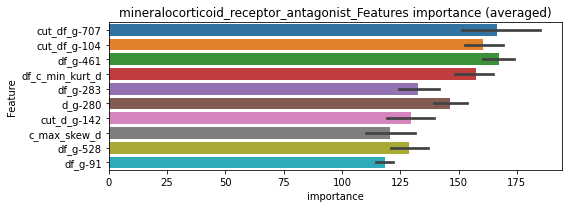

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000407857	valid_1's binary_logloss: 0.00208396


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000412896	valid_1's binary_logloss: 0.00245698
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000418291	valid_1's binary_logloss: 0.00151729
Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.0032073336830046326


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000410815	valid_1's binary_logloss: 0.00677106
neg labels: 3289 → selected neg labels: 3289


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000695495	valid_1's binary_logloss: 0.001896
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000264052	valid_1's binary_logloss: 0.00100917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000705235	valid_1's binary_logloss: 0.00543567
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000267871	valid_1's binary_logloss: 0.00359011
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000701177	valid_1's binary_logloss: 0.00131969
[600]	training's binary_logloss: 0.000257735	valid_1's binary_logloss: 0.000570466
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000257735	valid_1's binary_logloss: 0.000570466
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0007072	valid_1's binary_logloss: 0.001467

1 / 3 AUC score:1.000
y_Threshold: 0.0010152, Threshold: 0.0031222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000265227	valid_1's binary_logloss: 0.000702852


p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00219, conf_1:0.00406
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0031222
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0231222
threshold: 0.0231222, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00063423	valid_1's binary_logloss: 0.00153523
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000249723	valid_1's binary_logloss: 0.000881726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000639932	valid_1's binary_logloss: 0.00597074
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000258987	valid_1's binary_logloss: 0.00446058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655838	valid_1's binary_logloss: 0.000721586
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000249379	valid_1's binary_logloss: 0.000279963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643293	valid_1's binary_logloss: 0.00120019


2 / 3 AUC score:1.000
y_Threshold: 0.0292475, Threshold: 0.0231222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050, Num_p_label: 8.0, conf_0:0.01850, conf_1:0.02775
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0231222
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.0431222
threshold: 0.0431222, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000249957	valid_1's binary_logloss: 0.000583113


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00063423	valid_1's binary_logloss: 0.00153523
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000249723	valid_1's binary_logloss: 0.000881726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000639932	valid_1's binary_logloss: 0.00597074
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000258987	valid_1's binary_logloss: 0.00446058
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000655838	valid_1's binary_logloss: 0.000721586
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000249379	valid_1's binary_logloss: 0.000279963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000643293	valid_1's binary_logloss: 0.00120019


3 / 3 AUC score:1.000
y_Threshold: 0.0292475, Threshold: 0.0431222, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00050, Num_p_label: 3.0, conf_0:0.03881, conf_1:0.04743
threshold: 0.0431222, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000249957	valid_1's binary_logloss: 0.000583113


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


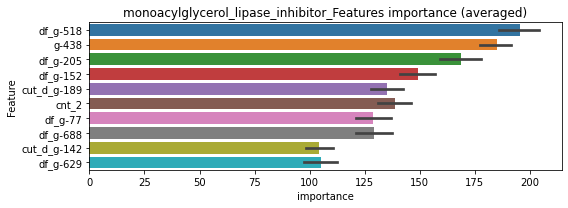

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000252996	valid_1's binary_logloss: 0.000988305
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000257479	valid_1's binary_logloss: 0.00366874
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000255257	valid_1's binary_logloss: 0.000297389
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0013710529744873758


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000249431	valid_1's binary_logloss: 0.000528207
neg labels: 3289 → selected neg labels: 3280


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3280, target_rate: 0.0035693 → Adj_target_rate: 0.0036661
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00822219	valid_1's binary_logloss: 0.0757781
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00222287	valid_1's binary_logloss: 0.0677643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00977895	valid_1's binary_logloss: 0.0661373
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00195549	valid_1's binary_logloss: 0.056077
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102786	valid_1's binary_logloss: 0.0366207
[600]	training's binary_logloss: 0.00160274	valid_1's binary_logloss: 0.0248102
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00139218	valid_1's binary_logloss: 0.0242397
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00911677	valid_1's binary_logloss: 0.0667209
[600]	trainin

1 / 3 AUC score:0.997
y_Threshold: 0.0117518, Threshold: 0.0287863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 648/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00357, Num_p_label: 40.0, conf_0:0.02015, conf_1:0.03742
Num_p_label: 40.0, Expected: 14.2, Adj_threshold_1: 0.0287863
Num_p_label: 19.0, Expected: 14.2, Adj_threshold_2: 0.0487863
threshold: 0.0487863, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 648.0/3788, y_label_rate: 0.1710665
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00845411	valid_1's binary_logloss: 0.0516838
[600]	training's binary_logloss: 0.00137123	valid_1's binary_logloss: 0.0403112
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00144098	valid_1's binary_logloss: 0.0399104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00854654	valid_1's binary_logloss: 0.049215
[600]	training's binary_logloss: 0.00140307	valid_1's binary_logloss: 0.0363677
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.00108516	valid_1's binary_logloss: 0.0353274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00829551	valid_1's binary_logloss: 0.046992
[600]	training's binary_logloss: 0.00137365	valid_1's binary_logloss: 0.0363039
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00149897	valid_1's binary_logloss: 0.03

2 / 3 AUC score:0.998
y_Threshold: 0.0335097, Threshold: 0.0487863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 640.0/3772
p_label_rate: 0.0090407 Vs.target_rate: 0.00357, Num_p_label: 36.0, conf_0:0.03903, conf_1:0.05854
Num_p_label: 36.0, Expected: 14.2, Adj_threshold_1: 0.0487863
Num_p_label: 21.0, Expected: 14.2, Adj_threshold_2: 0.0687863
threshold: 0.0687863, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3772, y_label_rate: 0.1696713
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742443	valid_1's binary_logloss: 0.0498633
[600]	training's binary_logloss: 0.00128059	valid_1's binary_logloss: 0.0372704
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000870243	valid_1's binary_logloss: 0.0359888
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00699104	valid_1's binary_logloss: 0.0507527
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.00166175	valid_1's binary_logloss: 0.0423198
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00791957	valid_1's binary_logloss: 0.046898
[600]	training's binary_logloss: 0.00132547	valid_1's binary_logloss: 0.0374421
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.00114761	valid_1's binary_logloss: 0.0366622
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:1.000
y_Threshold: 0.0306020, Threshold: 0.0687863, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0040181 Vs.target_rate: 0.00357, Num_p_label: 16.0, conf_0:0.06191, conf_1:0.07566
threshold: 0.0687863, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 635.0/3762, y_label_rate: 0.1687932


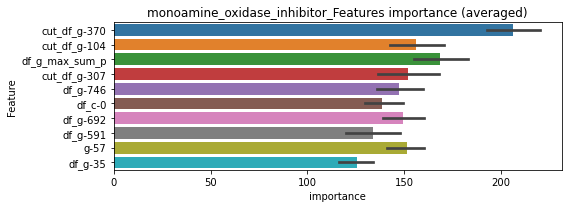

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00123763	valid_1's binary_logloss: 0.0466194


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00161042	valid_1's binary_logloss: 0.0380655


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00126995	valid_1's binary_logloss: 0.031436


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00142352	valid_1's binary_logloss: 0.0329505


monoamine_oxidase_inhibitor logloss: 0.037270552509307116


neg labels: 3289 → selected neg labels: 3287


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011913	valid_1's binary_logloss: 0.00501583
[600]	training's binary_logloss: 0.000354393	valid_1's binary_logloss: 0.00372418
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000353841	valid_1's binary_logloss: 0.00372318
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120151	valid_1's binary_logloss: 0.00508514
[600]	training's binary_logloss: 0.00035445	valid_1's binary_logloss: 0.00290096
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000353323	valid_1's binary_logloss: 0.00289484
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00121425	valid_1's binary_logloss: 0.00245085
[600]	training's binary_logloss: 0.00035798	valid_1's binary_logloss: 0.00102797
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000361073	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0017440, Threshold: 0.0277537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.01943, conf_1:0.03608
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0277537
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.0477537
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.0677537
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.0877537
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.1077537
threshold: 0.1077537, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011238	valid_1's binary_logloss: 0.00249763
[600]	training's binary_logloss: 0.000341599	valid_1's binary_logloss: 0.00103386
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000342137	valid_1's binary_logloss: 0.00103315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115404	valid_1's binary_logloss: 0.00474361
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00035806	valid_1's binary_logloss: 0.00285345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116838	valid_1's binary_logloss: 0.00199707
[600]	training's binary_logloss: 0.000347977	valid_1's binary_logloss: 0.000728213
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000346693	valid_1's binary_logloss: 0.000727175
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.0781638, Threshold: 0.1077537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0077850 Vs.target_rate: 0.00076, Num_p_label: 31.0, conf_0:0.08620, conf_1:0.12930
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_1: 0.1077537
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_2: 0.1277537
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1477537
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_4: 0.1677537
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_5: 0.1877537
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_6: 0.2077537
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_7: 0.2277537
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_8: 0.2477537
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_9: 0.2677537
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_10: 0.2877537
threshold: 0.3077537, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0011238	valid_1's binary_logloss: 0.00249763
[600]	training's binary_logloss: 0.000341599	valid_1's binary_logloss: 0.00103386
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000342137	valid_1's binary_logloss: 0.00103315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115404	valid_1's binary_logloss: 0.00474361
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00035806	valid_1's binary_logloss: 0.00285345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116838	valid_1's binary_logloss: 0.00199707
[600]	training's binary_logloss: 0.000347977	valid_1's binary_logloss: 0.000728213
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000346693	valid_1's binary_logloss: 0.000727175
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.0781638, Threshold: 0.3077537, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00076, Num_p_label: 10.0, conf_0:0.27698, conf_1:0.33853
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_1: 0.3077537
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.3277537
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.3477537
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.3677537
threshold: 0.3677537, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


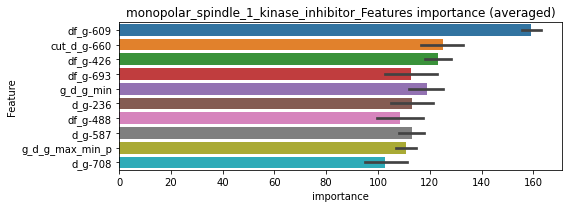

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000350555	valid_1's binary_logloss: 0.000916138
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344067	valid_1's binary_logloss: 0.00203675


================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000351078	valid_1's binary_logloss: 0.000830228


================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


monopolar_spindle_1_kinase_inhibitor logloss: 0.0011836705291644852


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000354097	valid_1's binary_logloss: 0.000951567
neg labels: 3289 → selected neg labels: 3269


mtor_inhibitor, len(trt): 130, len(othr): 3269, target_rate: 0.0054590 → Adj_target_rate: 0.0052608
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195936	valid_1's binary_logloss: 0.122847
[600]	training's binary_logloss: 0.00291705	valid_1's binary_logloss: 0.100718
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00204686	valid_1's binary_logloss: 0.097658
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0195248	valid_1's binary_logloss: 0.100808
[600]	training's binary_logloss: 0.00276732	valid_1's binary_logloss: 0.0780503
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00167349	valid_1's binary_logloss: 0.0763886
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193378	valid_1's binary_logloss: 0.110883
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00330861	valid_1's binary_logloss: 0.0851997
Training until validation scores don't improve for 30 rounds
[300]	training's bi

1 / 3 AUC score:0.989
y_Threshold: 0.0246069, Threshold: 0.3688151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 630/3744
p_label_rate: 0.0100452 Vs.target_rate: 0.00546, Num_p_label: 40.0, conf_0:0.25817, conf_1:0.47946
Num_p_label: 40.0, Expected: 21.7, Adj_threshold_1: 0.3688151
Num_p_label: 36.0, Expected: 21.7, Adj_threshold_2: 0.3888151
Num_p_label: 32.0, Expected: 21.7, Adj_threshold_3: 0.4088151
threshold: 0.4088151, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 630.0/3744, y_label_rate: 0.1682692
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0158072	valid_1's binary_logloss: 0.0742595
[600]	training's binary_logloss: 0.00235989	valid_1's binary_logloss: 0.0509703
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.00130233	valid_1's binary_logloss: 0.0479833
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156666	valid_1's binary_logloss: 0.087261
[600]	training's binary_logloss: 0.0023247	valid_1's binary_logloss: 0.0597523
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00125511	valid_1's binary_logloss: 0.0563945
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0163161	valid_1's binary_logloss: 0.0878068
[600]	training's binary_logloss: 0.00238123	valid_1's binary_logloss: 0.0643069
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00164774	valid_1's binary_logloss: 0.06272

2 / 3 AUC score:0.994
y_Threshold: 0.0524888, Threshold: 0.4088151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 607.0/3698
p_label_rate: 0.0148167 Vs.target_rate: 0.00546, Num_p_label: 59.0, conf_0:0.32705, conf_1:0.49058
Num_p_label: 59.0, Expected: 21.7, Adj_threshold_1: 0.4088151
Num_p_label: 58.0, Expected: 21.7, Adj_threshold_2: 0.4288151
Num_p_label: 57.0, Expected: 21.7, Adj_threshold_3: 0.4488151
Num_p_label: 56.0, Expected: 21.7, Adj_threshold_4: 0.4688151
Num_p_label: 53.0, Expected: 21.7, Adj_threshold_5: 0.4888151
Num_p_label: 52.0, Expected: 21.7, Adj_threshold_6: 0.5088151
Num_p_label: 52.0, Expected: 21.7, Adj_threshold_7: 0.5288151
Num_p_label: 50.0, Expected: 21.7, Adj_threshold_8: 0.5488151
Num_p_label: 48.0, Expected: 21.7, Adj_threshold_9: 0.5688151
Num_p_label: 46.0, Expected: 21.7, Adj_threshold_10: 0.5888151
threshold: 0.6088151, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 607.0/3698, y_label_rate: 0.1641428

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0134471	valid_1's binary_logloss: 0.072746
[600]	training's binary_logloss: 0.00207076	valid_1's binary_logloss: 0.0468796
[900]	training's binary_logloss: 0.00101431	valid_1's binary_logloss: 0.0427496
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.00104054	valid_1's binary_logloss: 0.0426647
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140509	valid_1's binary_logloss: 0.0656307
[600]	training's binary_logloss: 0.00208746	valid_1's binary_logloss: 0.0369713
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.00108185	valid_1's binary_logloss: 0.0329177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137939	valid_1's binary_logloss: 0.0575486
[600]	training's binary_logloss: 0.00207368	valid_1's binary_logloss: 0.0345085
Early stopping, best iteration 

3 / 3 AUC score:0.999
y_Threshold: 0.0551686, Threshold: 0.6088151, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 597.0/3678
p_label_rate: 0.0115520 Vs.target_rate: 0.00546, Num_p_label: 46.0, conf_0:0.50000, conf_1:0.66970
Num_p_label: 46.0, Expected: 21.7, Adj_threshold_1: 0.6088151
Num_p_label: 43.0, Expected: 21.7, Adj_threshold_2: 0.6288151
Num_p_label: 42.0, Expected: 21.7, Adj_threshold_3: 0.6488151
Num_p_label: 41.0, Expected: 21.7, Adj_threshold_4: 0.6688151
Num_p_label: 39.0, Expected: 21.7, Adj_threshold_5: 0.6888151
Num_p_label: 37.0, Expected: 21.7, Adj_threshold_6: 0.7088151
Num_p_label: 35.0, Expected: 21.7, Adj_threshold_7: 0.7288151
Num_p_label: 34.0, Expected: 21.7, Adj_threshold_8: 0.7488151
Num_p_label: 32.0, Expected: 21.7, Adj_threshold_9: 0.7688151
threshold: 0.7688151, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 597.0/3678, y_label_rate: 0.1623165


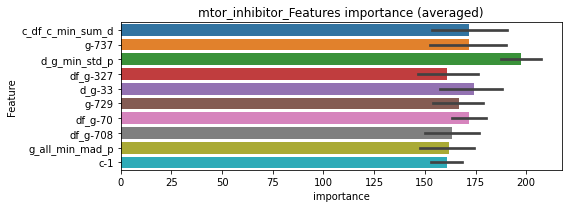

len(train_index) : 2758
len(valid_index) : 920
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000885488	valid_1's binary_logloss: 0.0283233
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000901889	valid_1's binary_logloss: 0.0282589


len(train_index) : 2758
len(valid_index) : 920
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000995235	valid_1's binary_logloss: 0.0484685


len(train_index) : 2759
len(valid_index) : 919
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00136192	valid_1's binary_logloss: 0.0485394


len(train_index) : 2759
len(valid_index) : 919
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000996961	valid_1's binary_logloss: 0.0398129


mtor_inhibitor logloss: 0.04126831561105704


neg labels: 3289 → selected neg labels: 3288


mucolytic_agent, len(trt): 48, len(othr): 3288, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00408592	valid_1's binary_logloss: 0.0155688
[600]	training's binary_logloss: 0.000789386	valid_1's binary_logloss: 0.00666318
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000569434	valid_1's binary_logloss: 0.00582989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00422435	valid_1's binary_logloss: 0.0206285
[600]	training's binary_logloss: 0.000788897	valid_1's binary_logloss: 0.0112976
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000612883	valid_1's binary_logloss: 0.0109433
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00428567	valid_1's binary_logloss: 0.0156742
[600]	training's binary_logloss: 0.000803538	valid_1's binary_logloss: 0.00726287
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000582485	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0053495, Threshold: 0.0879372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.06156, conf_1:0.11432
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0879372
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_2: 0.1079372
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_3: 0.1279372
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_4: 0.1479372
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_5: 0.1679372
threshold: 0.1679372, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037672	valid_1's binary_logloss: 0.0131191
[600]	training's binary_logloss: 0.000741597	valid_1's binary_logloss: 0.00518962
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000567523	valid_1's binary_logloss: 0.00447368
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0037933	valid_1's binary_logloss: 0.0168371
[600]	training's binary_logloss: 0.000746411	valid_1's binary_logloss: 0.00943061
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000572323	valid_1's binary_logloss: 0.00878554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0038935	valid_1's binary_logloss: 0.0161569
[600]	training's binary_logloss: 0.000749288	valid_1's binary_logloss: 0.00732743
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000553322	valid_1's binary_log

2 / 3 AUC score:1.000
y_Threshold: 0.0856181, Threshold: 0.1679372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0213461 Vs.target_rate: 0.00202, Num_p_label: 85.0, conf_0:0.13435, conf_1:0.20152
Num_p_label: 85.0, Expected: 8.0, Adj_threshold_1: 0.1679372
Num_p_label: 80.0, Expected: 8.0, Adj_threshold_2: 0.1879372
Num_p_label: 76.0, Expected: 8.0, Adj_threshold_3: 0.2079372
Num_p_label: 71.0, Expected: 8.0, Adj_threshold_4: 0.2279372
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_5: 0.2479372
Num_p_label: 63.0, Expected: 8.0, Adj_threshold_6: 0.2679372
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_7: 0.2879372
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_8: 0.3079372
Num_p_label: 51.0, Expected: 8.0, Adj_threshold_9: 0.3279372
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_10: 0.3479372
threshold: 0.3679372, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00378336	valid_1's binary_logloss: 0.0180187
[600]	training's binary_logloss: 0.000730066	valid_1's binary_logloss: 0.00943623
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000570845	valid_1's binary_logloss: 0.00865312
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00387944	valid_1's binary_logloss: 0.0118433
[600]	training's binary_logloss: 0.000758089	valid_1's binary_logloss: 0.00438819
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000549193	valid_1's binary_logloss: 0.00372245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00394324	valid_1's binary_logloss: 0.0115241
[600]	training's binary_logloss: 0.000748685	valid_1's binary_logloss: 0.00382495
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000541829	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0728865, Threshold: 0.3679372, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0125565 Vs.target_rate: 0.00202, Num_p_label: 50.0, conf_0:0.33114, conf_1:0.40473
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_1: 0.3679372
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_2: 0.3879372
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_3: 0.4079372
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_4: 0.4279372
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_5: 0.4479372
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_6: 0.4679372
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_7: 0.4879372
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_8: 0.5079372
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_9: 0.5279372
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_10: 0.5479372
threshold: 0.5679372, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


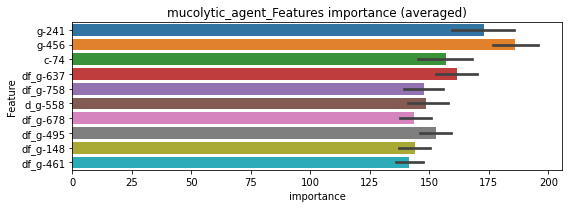

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000550242	valid_1's binary_logloss: 0.00692069


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[832]	training's binary_logloss: 0.000549682	valid_1's binary_logloss: 0.00320836


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000580131	valid_1's binary_logloss: 0.00322543


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000570181	valid_1's binary_logloss: 0.00809135


mucolytic_agent logloss: 0.005361599909334941


neg labels: 3289 → selected neg labels: 3281


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3281, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00256022	valid_1's binary_logloss: 0.0184552
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000629933	valid_1's binary_logloss: 0.0137401
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027984	valid_1's binary_logloss: 0.0100643
[600]	training's binary_logloss: 0.000604158	valid_1's binary_logloss: 0.00501637
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000521202	valid_1's binary_logloss: 0.00475575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.002873	valid_1's binary_logloss: 0.0120085
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000868469	valid_1's binary_logloss: 0.00768894
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00274388	valid_1's binary_logloss: 0.0124746
[600]	t

1 / 3 AUC score:1.000
y_Threshold: 0.0040509, Threshold: 0.0174911, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01224, conf_1:0.02274
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0174911
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0374911
threshold: 0.0374911, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242148	valid_1's binary_logloss: 0.0155979
[600]	training's binary_logloss: 0.000554315	valid_1's binary_logloss: 0.0111476
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00057985	valid_1's binary_logloss: 0.0110072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265605	valid_1's binary_logloss: 0.0097769
[600]	training's binary_logloss: 0.000581746	valid_1's binary_logloss: 0.00470417
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000555405	valid_1's binary_logloss: 0.00457585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258708	valid_1's binary_logloss: 0.0110566
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000810512	valid_1's binary_logloss: 0.007625
Training until validation scores don't improve for 30 rounds
[300]	

2 / 3 AUC score:1.000
y_Threshold: 0.0478024, Threshold: 0.0374911, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0087896 Vs.target_rate: 0.00155, Num_p_label: 35.0, conf_0:0.02999, conf_1:0.04499
Num_p_label: 35.0, Expected: 6.2, Adj_threshold_1: 0.0374911
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_2: 0.0574911
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.0774911
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_4: 0.0974911
threshold: 0.0974911, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00242148	valid_1's binary_logloss: 0.0155979
[600]	training's binary_logloss: 0.000554315	valid_1's binary_logloss: 0.0111476
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00057985	valid_1's binary_logloss: 0.0110072
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00265605	valid_1's binary_logloss: 0.0097769
[600]	training's binary_logloss: 0.000581746	valid_1's binary_logloss: 0.00470417
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000555405	valid_1's binary_logloss: 0.00457585
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00258708	valid_1's binary_logloss: 0.0110566
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000810512	valid_1's binary_logloss: 0.007625
Training until validation scores don't improve for 30 rounds
[300]	

3 / 3 AUC score:1.000
y_Threshold: 0.0478024, Threshold: 0.0974911, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00155, Num_p_label: 12.0, conf_0:0.08774, conf_1:0.10724
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0974911
threshold: 0.0974911, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


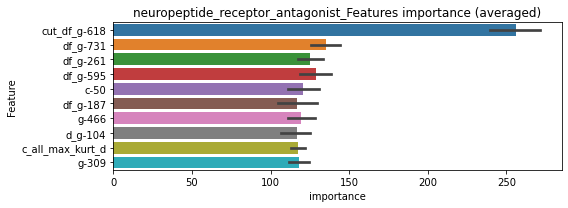

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000561493	valid_1's binary_logloss: 0.0107366


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000521634	valid_1's binary_logloss: 0.004279


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000555049	valid_1's binary_logloss: 0.00637128


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000517975	valid_1's binary_logloss: 0.00902947


neuropeptide_receptor_antagonist logloss: 0.007604910543868743


neg labels: 3289 → selected neg labels: 3173


nfkb_inhibitor, len(trt): 832, len(othr): 3173, target_rate: 0.0349374 → Adj_target_rate: 0.0254860
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[22]	training's binary_logloss: 0.449751	valid_1's binary_logloss: 0.508169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[39]	training's binary_logloss: 0.407035	valid_1's binary_logloss: 0.508455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[51]	training's binary_logloss: 0.385726	valid_1's binary_logloss: 0.505895
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.535
y_Threshold: 0.2171062, Threshold: 0.4670210, pos_neg_ratio: 0.7377876
Remove_noisy_data: 1370 → Positive_corect_labels: 256/2635
p_label_rate: 0.0100452 Vs.target_rate: 0.03494, Num_p_label: 40.0, conf_0:0.32691, conf_1:0.60713
Num_p_label: 40.0, Expected: 139.1, Adj_threshold_1: 0.4670210
Num_p_label: 75.0, Expected: 139.1, Adj_threshold_2: 0.4470210
Num_p_label: 102.0, Expected: 139.1, Adj_threshold_3: 0.4270210
Num_p_label: 121.0, Expected: 139.1, Adj_threshold_4: 0.4070210
Num_p_label: 132.0, Expected: 139.1, Adj_threshold_5: 0.3870210
Num_p_label: 139.0, Expected: 139.1, Adj_threshold_6: 0.3670210
Num_p_label: 143.0, Expected: 139.1, Adj_threshold_7: 0.3470210
Num_p_label: 145.0, Expected: 139.1, Adj_threshold_8: 0.3270210
Num_p_label: 152.0, Expected: 139.1, Adj_threshold_9: 0.3070210
Num_p_label: 165.0, Expected: 139.1, Adj_threshold_10: 0.2870210
threshold: 0.2670210, positive_p_label: 207.0/3982, p_label_rate: 0.0519839


Early stopping, best iteration is:
[13]	training's binary_logloss: 0.479435	valid_1's binary_logloss: 0.507758


positive_y_label: 256.0/2635, y_label_rate: 0.0971537
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[88]	training's binary_logloss: 0.0975794	valid_1's binary_logloss: 0.250552
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[99]	training's binary_logloss: 0.0845836	valid_1's binary_logloss: 0.23724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[59]	training's binary_logloss: 0.13755	valid_1's binary_logloss: 0.268265
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.809
y_Threshold: 0.1307862, Threshold: 0.2670210, pos_neg_ratio: 0.7377876
Remove_noisy_data: 288 → Positive_corect_labels: 112.0/2347
p_label_rate: 0.0838774 Vs.target_rate: 0.03494, Num_p_label: 334.0, conf_0:0.21362, conf_1:0.32043
Num_p_label: 334.0, Expected: 139.1, Adj_threshold_1: 0.2670210
Num_p_label: 310.0, Expected: 139.1, Adj_threshold_2: 0.2870210
Num_p_label: 289.0, Expected: 139.1, Adj_threshold_3: 0.3070210
Num_p_label: 269.0, Expected: 139.1, Adj_threshold_4: 0.3270210
Num_p_label: 263.0, Expected: 139.1, Adj_threshold_5: 0.3470210
Num_p_label: 251.0, Expected: 139.1, Adj_threshold_6: 0.3670210
Num_p_label: 236.0, Expected: 139.1, Adj_threshold_7: 0.3870210
Num_p_label: 228.0, Expected: 139.1, Adj_threshold_8: 0.4070210
Num_p_label: 220.0, Expected: 139.1, Adj_threshold_9: 0.4270210
Num_p_label: 214.0, Expected: 139.1, Adj_threshold_10: 0.4470210
threshold: 0.4670210, positive_p_label: 207.0/3982, p_label_rate: 0.0519839


Early stopping, best iteration is:
[71]	training's binary_logloss: 0.119927	valid_1's binary_logloss: 0.257857


positive_y_label: 112.0/2347, y_label_rate: 0.0477205
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[106]	training's binary_logloss: 0.0169541	valid_1's binary_logloss: 0.0755427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[126]	training's binary_logloss: 0.0128228	valid_1's binary_logloss: 0.0734059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[136]	training's binary_logloss: 0.011103	valid_1's binary_logloss: 0.0686034
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.973
y_Threshold: 0.0892152, Threshold: 0.4670210, pos_neg_ratio: 0.7377876
Remove_noisy_data: 60 → Positive_corect_labels: 82.0/2287
p_label_rate: 0.0775992 Vs.target_rate: 0.03494, Num_p_label: 309.0, conf_0:0.42032, conf_1:0.51372
Num_p_label: 309.0, Expected: 139.1, Adj_threshold_1: 0.4670210
Num_p_label: 299.0, Expected: 139.1, Adj_threshold_2: 0.4870210
Num_p_label: 296.0, Expected: 139.1, Adj_threshold_3: 0.5070210
Num_p_label: 292.0, Expected: 139.1, Adj_threshold_4: 0.5270210
Num_p_label: 289.0, Expected: 139.1, Adj_threshold_5: 0.5470210
Num_p_label: 287.0, Expected: 139.1, Adj_threshold_6: 0.5670210
Num_p_label: 284.0, Expected: 139.1, Adj_threshold_7: 0.5870210
Num_p_label: 278.0, Expected: 139.1, Adj_threshold_8: 0.6070210
Num_p_label: 270.0, Expected: 139.1, Adj_threshold_9: 0.6270210
Num_p_label: 262.0, Expected: 139.1, Adj_threshold_10: 0.6470210
threshold: 0.6670210, positive_p_label: 255.0/3982, p_label_rate: 0.0640382


Early stopping, best iteration is:
[109]	training's binary_logloss: 0.016543	valid_1's binary_logloss: 0.0822651


positive_y_label: 82.0/2287, y_label_rate: 0.0358548


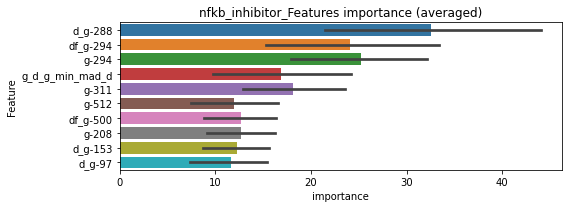

len(train_index) : 1715
len(valid_index) : 572
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1715
len(valid_index) : 572
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[143]	training's binary_logloss: 0.00465068	valid_1's binary_logloss: 0.0213157
Training until validation scores don't improve for 30 rounds


len(train_index) : 1715
len(valid_index) : 572
================================= fold 3/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00223884	valid_1's binary_logloss: 0.0354274
Training until validation scores don't improve for 30 rounds


len(train_index) : 1716
len(valid_index) : 571
================================= fold 4/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00128277	valid_1's binary_logloss: 0.0254947
Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.029443198145380527


Early stopping, best iteration is:
[167]	training's binary_logloss: 0.003212	valid_1's binary_logloss: 0.0355456
neg labels: 3289 → selected neg labels: 3289


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000843878	valid_1's binary_logloss: 0.00421463
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00030377	valid_1's binary_logloss: 0.00266917
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000822063	valid_1's binary_logloss: 0.00187319
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000305638	valid_1's binary_logloss: 0.0012089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000863242	valid_1's binary_logloss: 0.00119349
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000303854	valid_1's binary_logloss: 0.000450489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000851765	valid_1's binary_logloss: 0.00246547


1 / 3 AUC score:1.000
y_Threshold: 0.0012915, Threshold: 0.0036247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00254, conf_1:0.00471
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0036247
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0236247


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000302004	valid_1's binary_logloss: 0.00140719


threshold: 0.0236247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078227	valid_1's binary_logloss: 0.00403619
[600]	training's binary_logloss: 0.000287064	valid_1's binary_logloss: 0.00271306
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000284528	valid_1's binary_logloss: 0.00269948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000785433	valid_1's binary_logloss: 0.00131527
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00030111	valid_1's binary_logloss: 0.000689245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080222	valid_1's binary_logloss: 0.00104674
[600]	training's binary_logloss: 0.00028617	valid_1's binary_logloss: 0.000400517
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00028617	valid_1's binary_logloss: 0.000400517
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0625834, Threshold: 0.0236247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00050, Num_p_label: 14.0, conf_0:0.01890, conf_1:0.02835
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_1: 0.0236247
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0436247
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.0636247
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_4: 0.0836247
threshold: 0.0836247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00078227	valid_1's binary_logloss: 0.00403619
[600]	training's binary_logloss: 0.000287064	valid_1's binary_logloss: 0.00271306
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000284528	valid_1's binary_logloss: 0.00269948
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000785433	valid_1's binary_logloss: 0.00131527
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00030111	valid_1's binary_logloss: 0.000689245
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00080222	valid_1's binary_logloss: 0.00104674
[600]	training's binary_logloss: 0.00028617	valid_1's binary_logloss: 0.000400517
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00028617	valid_1's binary_logloss: 0.000400517
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0625834, Threshold: 0.0836247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050, Num_p_label: 2.0, conf_0:0.07526, conf_1:0.09199
threshold: 0.0836247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


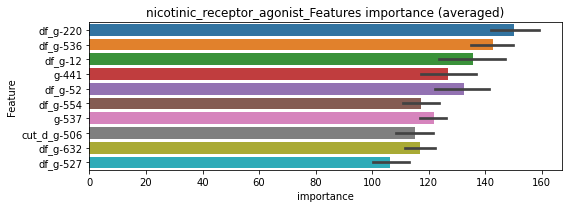

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000298373	valid_1's binary_logloss: 0.00275823
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000301041	valid_1's binary_logloss: 0.00068091
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297126	valid_1's binary_logloss: 0.000406703
Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.001342550507324343


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000293426	valid_1's binary_logloss: 0.00152288
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_donor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182206	valid_1's binary_logloss: 0.0108487
[600]	training's binary_logloss: 0.000449748	valid_1's binary_logloss: 0.00756111
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000457838	valid_1's binary_logloss: 0.00754488
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192962	valid_1's binary_logloss: 0.00702654
[600]	training's binary_logloss: 0.000453988	valid_1's binary_logloss: 0.00378538
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000433903	valid_1's binary_logloss: 0.00374233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00196776	valid_1's binary_logloss: 0.00528687
[600]	training's binary_logloss: 0.000469671	valid_1's binary_logloss: 0.00227057
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000455004	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0031978, Threshold: 0.0532858, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.03730, conf_1:0.06927
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0532858
Num_p_label: 31.0, Expected: 4.3, Adj_threshold_2: 0.0732858
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_3: 0.0932858
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_4: 0.1132858
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_5: 0.1332858
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.1532858
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_7: 0.1732858
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.1932858
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_9: 0.2132858
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_10: 0.2332858
threshold: 0.2332858, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168855	valid_1's binary_logloss: 0.0100978
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000449457	valid_1's binary_logloss: 0.0070921
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00176046	valid_1's binary_logloss: 0.00558769
[600]	training's binary_logloss: 0.000430439	valid_1's binary_logloss: 0.00294463
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000430845	valid_1's binary_logloss: 0.0029418
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00178124	valid_1's binary_logloss: 0.00546392
[600]	training's binary_logloss: 0.000441766	valid_1's binary_logloss: 0.00246869
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000439862	valid_1's binary_logloss: 0.00245457
Training until validation scores don't improve for 30 rounds
[

2 / 3 AUC score:1.000
y_Threshold: 0.0719825, Threshold: 0.2332858, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00109, Num_p_label: 34.0, conf_0:0.18663, conf_1:0.27994
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.2332858
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_2: 0.2532858


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000469659	valid_1's binary_logloss: 0.00281279


Num_p_label: 30.0, Expected: 4.3, Adj_threshold_3: 0.2732858
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_4: 0.2932858
Num_p_label: 26.0, Expected: 4.3, Adj_threshold_5: 0.3132858
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_6: 0.3332858
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_7: 0.3532858
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_8: 0.3732858
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_9: 0.3932858
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_10: 0.4132858
threshold: 0.4332858, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165769	valid_1's binary_logloss: 0.00631405
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000441743	valid_1's binary_logloss: 0.00420808
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172354	valid_1's binary_logloss: 0.00323935
[600]	training's binary_logloss: 0.000442861	valid_1's binary_logloss: 0.00112044
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000429788	valid_1's binary_logloss: 0.00109954
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177068	valid_1's binary_logloss: 0.00552964
[600]	training's binary_logloss: 0.000438133	valid_1's binary_logloss: 0.00303066
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.00043415	valid_1's binary_logloss: 0.00301706
Training until validation scores don't improve for 30 rounds

3 / 3 AUC score:1.000
y_Threshold: 0.0570600, Threshold: 0.4332858, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000419194	valid_1's binary_logloss: 0.00540454
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00043411	valid_1's binary_logloss: 0.00536674


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00109, Num_p_label: 16.0, conf_0:0.38996, conf_1:0.47661
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_1: 0.4332858
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.4532858
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_3: 0.4732858
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_4: 0.4932858
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_5: 0.5132858
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_6: 0.5332858
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_7: 0.5532858
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.5732858
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.5932858
threshold: 0.5932858, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


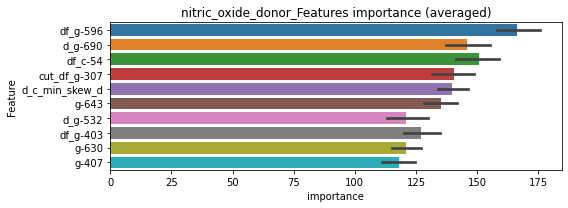

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000442534	valid_1's binary_logloss: 0.00408327
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000439543	valid_1's binary_logloss: 0.00121707
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000446887	valid_1's binary_logloss: 0.00199875
Training until validation scores don't improve for 30 rounds


nitric_oxide_donor logloss: 0.003201904444531184


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000443212	valid_1's binary_logloss: 0.00550309
neg labels: 3289 → selected neg labels: 3285


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285, target_rate: 0.0012178 → Adj_target_rate: 0.0014697
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00191714	valid_1's binary_logloss: 0.00953296
[600]	training's binary_logloss: 0.000448229	valid_1's binary_logloss: 0.0061519
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000433551	valid_1's binary_logloss: 0.00611481
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187101	valid_1's binary_logloss: 0.0107415
[600]	training's binary_logloss: 0.000442535	valid_1's binary_logloss: 0.00699825
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000431397	valid_1's binary_logloss: 0.00694989
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208274	valid_1's binary_logloss: 0.0048417
[600]	training's binary_logloss: 0.000469728	valid_1's binary_logloss: 0.00188766
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000446929	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0027760, Threshold: 0.0074426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122, Num_p_label: 40.0, conf_0:0.00521, conf_1:0.00968
Num_p_label: 40.0, Expected: 4.8, Adj_threshold_1: 0.0074426
Num_p_label: 4.0, Expected: 4.8, Adj_threshold_2: 0.0274426
threshold: 0.0274426, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183038	valid_1's binary_logloss: 0.00802243
[600]	training's binary_logloss: 0.00044071	valid_1's binary_logloss: 0.00585055
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000455154	valid_1's binary_logloss: 0.0058128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180062	valid_1's binary_logloss: 0.00932039
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000518612	valid_1's binary_logloss: 0.00610863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019571	valid_1's binary_logloss: 0.0044533
[600]	training's binary_logloss: 0.000450437	valid_1's binary_logloss: 0.00154925
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000445809	valid_1's binary_logloss: 0.00153208
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0298944, Threshold: 0.0274426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00122, Num_p_label: 13.0, conf_0:0.02195, conf_1:0.03293
Num_p_label: 13.0, Expected: 4.8, Adj_threshold_1: 0.0274426
Num_p_label: 6.0, Expected: 4.8, Adj_threshold_2: 0.0474426
threshold: 0.0474426, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183038	valid_1's binary_logloss: 0.00802243
[600]	training's binary_logloss: 0.00044071	valid_1's binary_logloss: 0.00585055
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000455154	valid_1's binary_logloss: 0.0058128
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180062	valid_1's binary_logloss: 0.00932039
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000518612	valid_1's binary_logloss: 0.00610863
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0019571	valid_1's binary_logloss: 0.0044533
[600]	training's binary_logloss: 0.000450437	valid_1's binary_logloss: 0.00154925
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000445809	valid_1's binary_logloss: 0.00153208
Training until validation scores don't improve for 30 rounds
[3

3 / 3 AUC score:1.000
y_Threshold: 0.0298944, Threshold: 0.0474426, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00122, Num_p_label: 6.0, conf_0:0.04270, conf_1:0.05219
threshold: 0.0474426, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


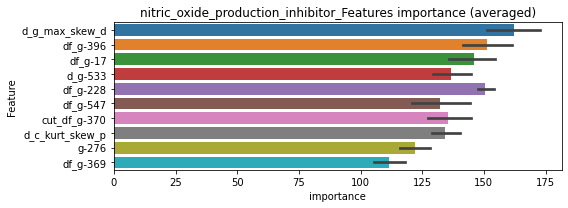

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000495138	valid_1's binary_logloss: 0.00597619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000423299	valid_1's binary_logloss: 0.00522525


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000450095	valid_1's binary_logloss: 0.00159067


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000444304	valid_1's binary_logloss: 0.00150978


nitric_oxide_production_inhibitor logloss: 0.0035776722166637348


neg labels: 3289 → selected neg labels: 3285


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3285, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217093	valid_1's binary_logloss: 0.00711861
[600]	training's binary_logloss: 0.000500611	valid_1's binary_logloss: 0.00365005
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000492126	valid_1's binary_logloss: 0.00363461
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00203651	valid_1's binary_logloss: 0.00777898
[600]	training's binary_logloss: 0.00048457	valid_1's binary_logloss: 0.00340406
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000464743	valid_1's binary_logloss: 0.00334956
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217453	valid_1's binary_logloss: 0.00460578
[600]	training's binary_logloss: 0.000503243	valid_1's binary_logloss: 0.00172691
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000478818	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0032138, Threshold: 0.0216900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.01518, conf_1:0.02820
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0216900
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_2: 0.0416900
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_3: 0.0616900
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_4: 0.0816900
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_5: 0.1016900
threshold: 0.1016900, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189439	valid_1's binary_logloss: 0.00547061
[600]	training's binary_logloss: 0.000478419	valid_1's binary_logloss: 0.00283912
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000489312	valid_1's binary_logloss: 0.00282721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192414	valid_1's binary_logloss: 0.00544153
[600]	training's binary_logloss: 0.000465758	valid_1's binary_logloss: 0.00227796
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000450829	valid_1's binary_logloss: 0.00223108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186865	valid_1's binary_logloss: 0.00437496
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000503963	valid_1's binary_logloss: 0.00186205
Training until validation scores don't improve for 30 round

2 / 3 AUC score:1.000
y_Threshold: 0.1123276, Threshold: 0.1016900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0085384 Vs.target_rate: 0.00109, Num_p_label: 34.0, conf_0:0.08135, conf_1:0.12203
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_1: 0.1016900
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.1216900
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_3: 0.1416900
Num_p_label: 20.0, Expected: 4.3, Adj_threshold_4: 0.1616900
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_5: 0.1816900
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2016900
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_7: 0.2216900
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_8: 0.2416900
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.2616900
threshold: 0.2616900, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00189439	valid_1's binary_logloss: 0.00547061
[600]	training's binary_logloss: 0.000478419	valid_1's binary_logloss: 0.00283912
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000489312	valid_1's binary_logloss: 0.00282721
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00192414	valid_1's binary_logloss: 0.00544153
[600]	training's binary_logloss: 0.000465758	valid_1's binary_logloss: 0.00227796
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000450829	valid_1's binary_logloss: 0.00223108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186865	valid_1's binary_logloss: 0.00437496
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000503963	valid_1's binary_logloss: 0.00186205
Training until validation scores don't improve for 30 round

3 / 3 AUC score:1.000
y_Threshold: 0.1123276, Threshold: 0.2616900, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00109, Num_p_label: 10.0, conf_0:0.23552, conf_1:0.28786
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_1: 0.2616900
threshold: 0.2616900, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


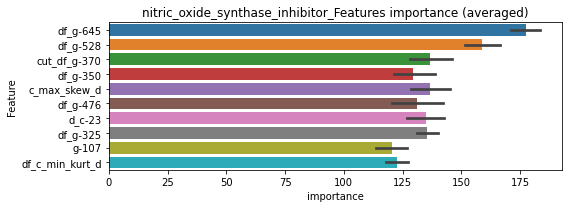

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000467037	valid_1's binary_logloss: 0.00351902


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00046778	valid_1's binary_logloss: 0.00256269


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000462347	valid_1's binary_logloss: 0.00156671


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000460562	valid_1's binary_logloss: 0.00185877


nitric_oxide_synthase_inhibitor logloss: 0.002377144483515279


neg labels: 3289 → selected neg labels: 3286


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3286, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000453389	valid_1's binary_logloss: 0.00322933
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000220128	valid_1's binary_logloss: 0.00263104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00044301	valid_1's binary_logloss: 0.00357083
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000216884	valid_1's binary_logloss: 0.00290259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000459879	valid_1's binary_logloss: 0.00056229
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000218728	valid_1's binary_logloss: 0.000284108
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00045394	valid_1's binary_logloss: 0.000669819


1 / 3 AUC score:1.000
y_Threshold: 0.0006751, Threshold: 0.0028169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00197, conf_1:0.00366
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0028169
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.0228169
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.0428169
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_4: 0.0628169
threshold: 0.0628169, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000219261	valid_1's binary_logloss: 0.000366198


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427612	valid_1's binary_logloss: 0.00411885
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000207467	valid_1's binary_logloss: 0.00343903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000418543	valid_1's binary_logloss: 0.00289686
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000199964	valid_1's binary_logloss: 0.00227963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000431998	valid_1's binary_logloss: 0.000436037
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00020899	valid_1's binary_logloss: 0.00021218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419215	valid_1's binary_logloss: 0.000510883


2 / 3 AUC score:1.000
y_Threshold: 0.0138685, Threshold: 0.0628169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00029, Num_p_label: 9.0, conf_0:0.05025, conf_1:0.07538
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_1: 0.0628169
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_2: 0.0828169
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_3: 0.1028169
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_4: 0.1228169
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.1428169
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.1628169
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.1828169
threshold: 0.1828169, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000208843	valid_1's binary_logloss: 0.000261137


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000427612	valid_1's binary_logloss: 0.00411885
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000207467	valid_1's binary_logloss: 0.00343903
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000418543	valid_1's binary_logloss: 0.00289686
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000199964	valid_1's binary_logloss: 0.00227963
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000431998	valid_1's binary_logloss: 0.000436037
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00020899	valid_1's binary_logloss: 0.00021218
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000419215	valid_1's binary_logloss: 0.000510883


3 / 3 AUC score:1.000
y_Threshold: 0.0138685, Threshold: 0.1828169, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.16454, conf_1:0.20110
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.1828169
threshold: 0.1828169, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000208843	valid_1's binary_logloss: 0.000261137


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


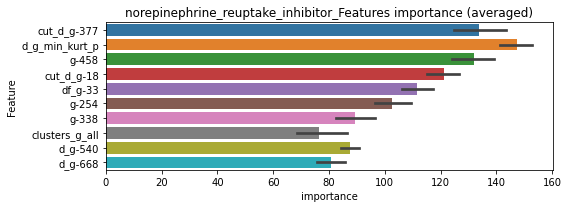

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000210271	valid_1's binary_logloss: 0.00315158
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000201292	valid_1's binary_logloss: 0.00163857
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000205566	valid_1's binary_logloss: 0.000213221
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0013179571042471027


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000208521	valid_1's binary_logloss: 0.000265263
neg labels: 3289 → selected neg labels: 3287


nrf2_activator, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112937	valid_1's binary_logloss: 0.0019066
[600]	training's binary_logloss: 0.000336165	valid_1's binary_logloss: 0.00068476
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.0003281	valid_1's binary_logloss: 0.000671143
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109841	valid_1's binary_logloss: 0.00348383
[600]	training's binary_logloss: 0.000334006	valid_1's binary_logloss: 0.00152955
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000324473	valid_1's binary_logloss: 0.00150471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113328	valid_1's binary_logloss: 0.00192487
[600]	training's binary_logloss: 0.00033995	valid_1's binary_logloss: 0.000649124
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000329023	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0018683, Threshold: 0.0086140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00603, conf_1:0.01120
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0086140
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0286140
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0486140
threshold: 0.0486140, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100806	valid_1's binary_logloss: 0.00169659
[600]	training's binary_logloss: 0.000321738	valid_1's binary_logloss: 0.000618823
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000321738	valid_1's binary_logloss: 0.000618823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974541	valid_1's binary_logloss: 0.00257343
[600]	training's binary_logloss: 0.000315953	valid_1's binary_logloss: 0.00118411
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000315983	valid_1's binary_logloss: 0.00118391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102046	valid_1's binary_logloss: 0.00138116
[600]	training's binary_logloss: 0.000320797	valid_1's binary_logloss: 0.000459082
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000319656	valid_1's 

2 / 3 AUC score:1.000
y_Threshold: 0.1423499, Threshold: 0.0486140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076, Num_p_label: 25.0, conf_0:0.03889, conf_1:0.05834
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.0486140
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.0686140
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.0886140
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.1086140
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_5: 0.1286140
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.1486140
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_7: 0.1686140
threshold: 0.1686140, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00100806	valid_1's binary_logloss: 0.00169659
[600]	training's binary_logloss: 0.000321738	valid_1's binary_logloss: 0.000618823
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000321738	valid_1's binary_logloss: 0.000618823
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000974541	valid_1's binary_logloss: 0.00257343
[600]	training's binary_logloss: 0.000315953	valid_1's binary_logloss: 0.00118411
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000315983	valid_1's binary_logloss: 0.00118391
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00102046	valid_1's binary_logloss: 0.00138116
[600]	training's binary_logloss: 0.000320797	valid_1's binary_logloss: 0.000459082
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000319656	valid_1's 

3 / 3 AUC score:1.000
y_Threshold: 0.1423499, Threshold: 0.1686140, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076, Num_p_label: 7.0, conf_0:0.15175, conf_1:0.18548
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.1686140
threshold: 0.1686140, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


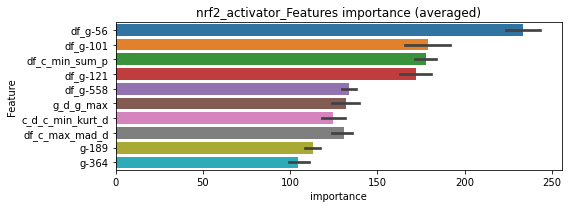

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nrf2_activator=================================


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00032341	valid_1's binary_logloss: 0.000644019
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nrf2_activator=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000315253	valid_1's binary_logloss: 0.00111326
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nrf2_activator=================================


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000330114	valid_1's binary_logloss: 0.000490469
Training until validation scores don't improve for 30 rounds


nrf2_activator logloss: 0.0007589931728279135


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00032655	valid_1's binary_logloss: 0.000788179
neg labels: 3289 → selected neg labels: 3280


opioid_receptor_agonist, len(trt): 61, len(othr): 3280, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490901	valid_1's binary_logloss: 0.0400229
[600]	training's binary_logloss: 0.000925734	valid_1's binary_logloss: 0.0296556
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000765733	valid_1's binary_logloss: 0.0286674
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00516614	valid_1's binary_logloss: 0.0361236
[600]	training's binary_logloss: 0.000950225	valid_1's binary_logloss: 0.0276418
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000695858	valid_1's binary_logloss: 0.0269266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00579876	valid_1's binary_logloss: 0.0153889
[600]	training's binary_logloss: 0.00101765	valid_1's binary_logloss: 0.00735859
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000687079	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0061181, Threshold: 0.0178504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.01250, conf_1:0.02321
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0178504
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_2: 0.0378504
threshold: 0.0378504, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00449938	valid_1's binary_logloss: 0.0365258
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00139307	valid_1's binary_logloss: 0.0284645
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00463351	valid_1's binary_logloss: 0.0360197
[600]	training's binary_logloss: 0.000897442	valid_1's binary_logloss: 0.0292026
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.00075412	valid_1's binary_logloss: 0.0286216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00519971	valid_1's binary_logloss: 0.0138288
[600]	training's binary_logloss: 0.000959345	valid_1's binary_logloss: 0.00619261
[900]	training's binary_logloss: 0.000634987	valid_1's binary_logloss: 0.00542438
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000639203	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0408722, Threshold: 0.0378504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0190859 Vs.target_rate: 0.00256, Num_p_label: 76.0, conf_0:0.03028, conf_1:0.04542
Num_p_label: 76.0, Expected: 10.2, Adj_threshold_1: 0.0378504
Num_p_label: 51.0, Expected: 10.2, Adj_threshold_2: 0.0578504
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_3: 0.0778504
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_4: 0.0978504
Num_p_label: 27.0, Expected: 10.2, Adj_threshold_5: 0.1178504
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_6: 0.1378504
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_7: 0.1578504
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_8: 0.1778504
threshold: 0.1778504, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00457939	valid_1's binary_logloss: 0.0216185
[600]	training's binary_logloss: 0.000877054	valid_1's binary_logloss: 0.0135586
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000662645	valid_1's binary_logloss: 0.0126287
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00459351	valid_1's binary_logloss: 0.0417615
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00109299	valid_1's binary_logloss: 0.0346216
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00448014	valid_1's binary_logloss: 0.025614
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00113458	valid_1's binary_logloss: 0.0191544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440145	valid_1's binary_logloss: 0.0339657
Early stop

3 / 3 AUC score:1.000
y_Threshold: 0.0356283, Threshold: 0.1778504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3776
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.16007, conf_1:0.19564
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.1778504
Num_p_label: 37.0, Expected: 10.2, Adj_threshold_2: 0.1978504
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_3: 0.2178504
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_4: 0.2378504
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_5: 0.2578504
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_6: 0.2778504
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_7: 0.2978504
threshold: 0.2978504, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 642.0/3776, y_label_rate: 0.1700212


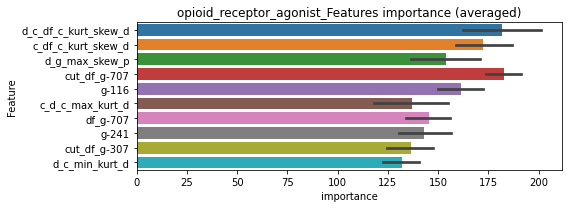

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00115461	valid_1's binary_logloss: 0.031268


================================= fold 2/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000632856	valid_1's binary_logloss: 0.0125833


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000624906	valid_1's binary_logloss: 0.00578003


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00097782	valid_1's binary_logloss: 0.026418


opioid_receptor_agonist logloss: 0.019015142582074818


neg labels: 3289 → selected neg labels: 3274


opioid_receptor_antagonist, len(trt): 96, len(othr): 3274, target_rate: 0.0040312 → Adj_target_rate: 0.0040656
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00903133	valid_1's binary_logloss: 0.0666365
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00237085	valid_1's binary_logloss: 0.055666
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00955128	valid_1's binary_logloss: 0.0575847
[600]	training's binary_logloss: 0.00159102	valid_1's binary_logloss: 0.0463445
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00171817	valid_1's binary_logloss: 0.0461263
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105698	valid_1's binary_logloss: 0.0466307
[600]	training's binary_logloss: 0.0016968	valid_1's binary_logloss: 0.0314299
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.0015785	valid_1's binary_logloss: 0.0309459
Training until validation scores don't improve for 30 rounds
[300]	training'

1 / 3 AUC score:0.997
y_Threshold: 0.0150601, Threshold: 0.0604777, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00403, Num_p_label: 40.0, conf_0:0.04233, conf_1:0.07862
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_1: 0.0604777
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_2: 0.0804777
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_3: 0.1004777
threshold: 0.1004777, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00730203	valid_1's binary_logloss: 0.0692169
[600]	training's binary_logloss: 0.00133959	valid_1's binary_logloss: 0.0593022
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00142081	valid_1's binary_logloss: 0.0589635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00798585	valid_1's binary_logloss: 0.068406
[600]	training's binary_logloss: 0.00137773	valid_1's binary_logloss: 0.0574535
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.0010208	valid_1's binary_logloss: 0.0568588
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00882612	valid_1's binary_logloss: 0.0411483
[600]	training's binary_logloss: 0.00150698	valid_1's binary_logloss: 0.0268079
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00133517	valid_1's binary_logloss: 0.02

2 / 3 AUC score:0.999
y_Threshold: 0.0490035, Threshold: 0.1004777, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0183325 Vs.target_rate: 0.00403, Num_p_label: 73.0, conf_0:0.08038, conf_1:0.12057
Num_p_label: 73.0, Expected: 16.1, Adj_threshold_1: 0.1004777
Num_p_label: 63.0, Expected: 16.1, Adj_threshold_2: 0.1204777
Num_p_label: 59.0, Expected: 16.1, Adj_threshold_3: 0.1404777
Num_p_label: 54.0, Expected: 16.1, Adj_threshold_4: 0.1604777
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_5: 0.1804777
Num_p_label: 46.0, Expected: 16.1, Adj_threshold_6: 0.2004777
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_7: 0.2204777
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_8: 0.2404777
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_9: 0.2604777
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_10: 0.2804777
threshold: 0.3004777, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 639.0/3766, y_label_rate: 0.1696760

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00760679	valid_1's binary_logloss: 0.0636204
[600]	training's binary_logloss: 0.00135381	valid_1's binary_logloss: 0.0499499
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.00116829	valid_1's binary_logloss: 0.049448
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00745644	valid_1's binary_logloss: 0.0499816
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00203023	valid_1's binary_logloss: 0.0414217
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00779841	valid_1's binary_logloss: 0.0437769
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00212333	valid_1's binary_logloss: 0.0351471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00762961	valid_1's binary_logloss: 0.0633474
Early stoppi

3 / 3 AUC score:1.000
y_Threshold: 0.0388800, Threshold: 0.3004777, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0110497 Vs.target_rate: 0.00403, Num_p_label: 44.0, conf_0:0.27043, conf_1:0.33053
Num_p_label: 44.0, Expected: 16.1, Adj_threshold_1: 0.3004777
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_2: 0.3204777
Num_p_label: 39.0, Expected: 16.1, Adj_threshold_3: 0.3404777
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_4: 0.3604777
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_5: 0.3804777
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_6: 0.4004777
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_7: 0.4204777
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_8: 0.4404777
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_9: 0.4604777
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_10: 0.4804777
threshold: 0.4804777, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 628.0/3744, y_label_rate: 0.1677350

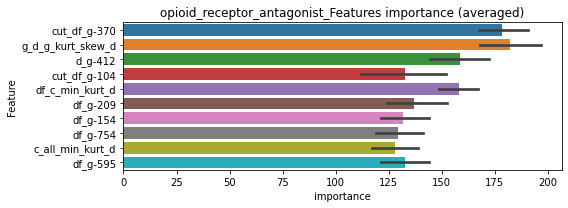

len(train_index) : 2808
len(valid_index) : 936
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00190646	valid_1's binary_logloss: 0.0398389


len(train_index) : 2808
len(valid_index) : 936
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.00144069	valid_1's binary_logloss: 0.0495245


len(train_index) : 2808
len(valid_index) : 936
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000978744	valid_1's binary_logloss: 0.0215811


len(train_index) : 2808
len(valid_index) : 936
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00179882	valid_1's binary_logloss: 0.048978


opioid_receptor_antagonist logloss: 0.03998063515759563


neg labels: 3289 → selected neg labels: 3286


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268656	valid_1's binary_logloss: 0.014969
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000666321	valid_1's binary_logloss: 0.0106183
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0025633	valid_1's binary_logloss: 0.0156032
[600]	training's binary_logloss: 0.000560093	valid_1's binary_logloss: 0.00990348
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000491091	valid_1's binary_logloss: 0.00965508
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289192	valid_1's binary_logloss: 0.00647494
[600]	training's binary_logloss: 0.000590029	valid_1's binary_logloss: 0.00222779
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.0004901	valid_1's binary_logloss: 0.00203977
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0036806, Threshold: 0.0108116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.00757, conf_1:0.01406
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0108116
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_2: 0.0308116
threshold: 0.0308116, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00254405	valid_1's binary_logloss: 0.0146991
[600]	training's binary_logloss: 0.000548081	valid_1's binary_logloss: 0.0106402
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000497237	valid_1's binary_logloss: 0.0104887
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00247969	valid_1's binary_logloss: 0.0158905
[600]	training's binary_logloss: 0.000540758	valid_1's binary_logloss: 0.0103077
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000474145	valid_1's binary_logloss: 0.0100349
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00270239	valid_1's binary_logloss: 0.00651036
[600]	training's binary_logloss: 0.00057048	valid_1's binary_logloss: 0.00248654
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000488463	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0293561, Threshold: 0.0308116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0082873 Vs.target_rate: 0.00155, Num_p_label: 33.0, conf_0:0.02465, conf_1:0.03697
Num_p_label: 33.0, Expected: 6.2, Adj_threshold_1: 0.0308116
Num_p_label: 19.0, Expected: 6.2, Adj_threshold_2: 0.0508116
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_3: 0.0708116
threshold: 0.0708116, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241024	valid_1's binary_logloss: 0.0150503
[600]	training's binary_logloss: 0.000528828	valid_1's binary_logloss: 0.0102787
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000554891	valid_1's binary_logloss: 0.010228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248479	valid_1's binary_logloss: 0.00766777
[600]	training's binary_logloss: 0.000550949	valid_1's binary_logloss: 0.00421141
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000497317	valid_1's binary_logloss: 0.00405543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00262201	valid_1's binary_logloss: 0.00559507
[600]	training's binary_logloss: 0.000557677	valid_1's binary_logloss: 0.00183924
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000495587	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0304517, Threshold: 0.0708116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00155, Num_p_label: 12.0, conf_0:0.06373, conf_1:0.07789
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0708116
threshold: 0.0708116, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


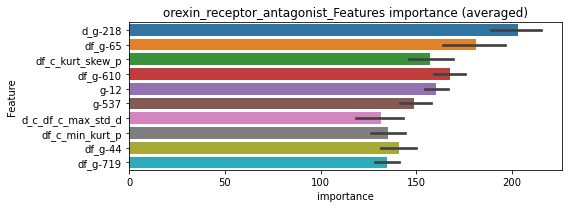

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000502977	valid_1's binary_logloss: 0.0100147


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000515776	valid_1's binary_logloss: 0.00335639


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000496078	valid_1's binary_logloss: 0.0014811


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000479754	valid_1's binary_logloss: 0.00289971


orexin_receptor_antagonist logloss: 0.004439632496166729


neg labels: 3289 → selected neg labels: 3281


p38_mapk_inhibitor, len(trt): 62, len(othr): 3281, target_rate: 0.0026035 → Adj_target_rate: 0.0028037
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00559213	valid_1's binary_logloss: 0.0382102
[600]	training's binary_logloss: 0.000962095	valid_1's binary_logloss: 0.0260963
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000796923	valid_1's binary_logloss: 0.0253177
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00627306	valid_1's binary_logloss: 0.0279603
[600]	training's binary_logloss: 0.00103453	valid_1's binary_logloss: 0.0157118
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000743875	valid_1's binary_logloss: 0.0146633
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00598835	valid_1's binary_logloss: 0.0228763
[600]	training's binary_logloss: 0.00103153	valid_1's binary_logloss: 0.0127135
[900]	training's binary_logloss: 0.000636134	valid_1's binary_logloss: 0.0114932
Early stopping, best it

1 / 3 AUC score:1.000
y_Threshold: 0.0085004, Threshold: 0.0384039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00260, Num_p_label: 40.0, conf_0:0.02688, conf_1:0.04993
Num_p_label: 40.0, Expected: 10.4, Adj_threshold_1: 0.0384039
Num_p_label: 21.0, Expected: 10.4, Adj_threshold_2: 0.0584039
Num_p_label: 12.0, Expected: 10.4, Adj_threshold_3: 0.0784039
threshold: 0.0784039, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052017	valid_1's binary_logloss: 0.032884
[600]	training's binary_logloss: 0.000944866	valid_1's binary_logloss: 0.0221795
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000775417	valid_1's binary_logloss: 0.0212805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00542832	valid_1's binary_logloss: 0.0248738
[600]	training's binary_logloss: 0.000964768	valid_1's binary_logloss: 0.0148127
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00072589	valid_1's binary_logloss: 0.0141584
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00531481	valid_1's binary_logloss: 0.0203607
[600]	training's binary_logloss: 0.000975438	valid_1's binary_logloss: 0.0117647
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000679762	valid_1's binary_logloss:

2 / 3 AUC score:1.000
y_Threshold: 0.0352379, Threshold: 0.0784039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0080362 Vs.target_rate: 0.00260, Num_p_label: 32.0, conf_0:0.06272, conf_1:0.09408
Num_p_label: 32.0, Expected: 10.4, Adj_threshold_1: 0.0784039
Num_p_label: 26.0, Expected: 10.4, Adj_threshold_2: 0.0984039
Num_p_label: 17.0, Expected: 10.4, Adj_threshold_3: 0.1184039
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_4: 0.1384039
threshold: 0.1384039, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525056	valid_1's binary_logloss: 0.0261649
[600]	training's binary_logloss: 0.000948004	valid_1's binary_logloss: 0.0148998
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000675553	valid_1's binary_logloss: 0.0138811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00512828	valid_1's binary_logloss: 0.0233848
[600]	training's binary_logloss: 0.00094582	valid_1's binary_logloss: 0.0118502
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000631087	valid_1's binary_logloss: 0.0106473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527742	valid_1's binary_logloss: 0.0222001
[600]	training's binary_logloss: 0.000965919	valid_1's binary_logloss: 0.0129092
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000737423	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0495970, Threshold: 0.1384039, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3791
p_label_rate: 0.0030136 Vs.target_rate: 0.00260, Num_p_label: 12.0, conf_0:0.12456, conf_1:0.15224
threshold: 0.1384039, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3791, y_label_rate: 0.1711949


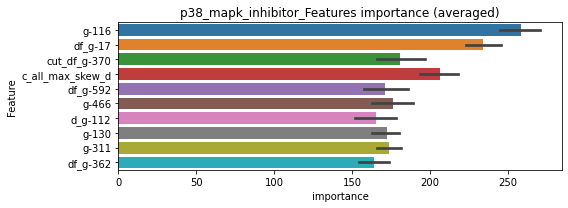

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000619475	valid_1's binary_logloss: 0.00893553


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000637804	valid_1's binary_logloss: 0.0119507


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000673832	valid_1's binary_logloss: 0.0119002


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.0006358	valid_1's binary_logloss: 0.0155666


p38_mapk_inhibitor logloss: 0.01208959479885642


neg labels: 3289 → selected neg labels: 3288


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3288, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174408	valid_1's binary_logloss: 0.00428249
[600]	training's binary_logloss: 0.000418179	valid_1's binary_logloss: 0.00161318
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000420269	valid_1's binary_logloss: 0.00161067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00168039	valid_1's binary_logloss: 0.0110599
[600]	training's binary_logloss: 0.000413739	valid_1's binary_logloss: 0.00834884
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000414385	valid_1's binary_logloss: 0.00834339
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00175227	valid_1's binary_logloss: 0.00335217
[600]	training's binary_logloss: 0.000415765	valid_1's binary_logloss: 0.00102489
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000396163	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0026311, Threshold: 0.0115970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00812, conf_1:0.01508
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0115970
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_2: 0.0315970
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_3: 0.0515970
threshold: 0.0515970, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00159495	valid_1's binary_logloss: 0.00362749
[600]	training's binary_logloss: 0.000397145	valid_1's binary_logloss: 0.00140302
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000387981	valid_1's binary_logloss: 0.00136414
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157926	valid_1's binary_logloss: 0.0111355
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000406924	valid_1's binary_logloss: 0.00841179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00161254	valid_1's binary_logloss: 0.00275995
[600]	training's binary_logloss: 0.000392295	valid_1's binary_logloss: 0.000848842
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000391314	valid_1's binary_logloss: 0.000847546
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0094685, Threshold: 0.0515970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0070316 Vs.target_rate: 0.00101, Num_p_label: 28.0, conf_0:0.04128, conf_1:0.06192
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0515970
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_2: 0.0715970
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_3: 0.0915970
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_4: 0.1115970
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_5: 0.1315970
threshold: 0.1315970, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158283	valid_1's binary_logloss: 0.00534642
[600]	training's binary_logloss: 0.000393867	valid_1's binary_logloss: 0.00273821
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000400579	valid_1's binary_logloss: 0.00272289
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00158568	valid_1's binary_logloss: 0.0058794
[600]	training's binary_logloss: 0.000393783	valid_1's binary_logloss: 0.00308872
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000381317	valid_1's binary_logloss: 0.00305271
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00157155	valid_1's binary_logloss: 0.00297558
[600]	training's binary_logloss: 0.000392392	valid_1's binary_logloss: 0.000922708
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000384235	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0606306, Threshold: 0.1315970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00101, Num_p_label: 6.0, conf_0:0.11844, conf_1:0.14476
threshold: 0.1315970, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


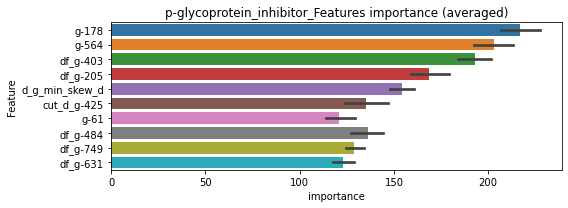

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000392101	valid_1's binary_logloss: 0.0023929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000397439	valid_1's binary_logloss: 0.00316922


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000394403	valid_1's binary_logloss: 0.000947083


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p-glycoprotein_inhibitor logloss: 0.0021131569829630974


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000390061	valid_1's binary_logloss: 0.00194324
neg labels: 3289 → selected neg labels: 3281


parp_inhibitor, len(trt): 61, len(othr): 3281, target_rate: 0.0025615 → Adj_target_rate: 0.0027652
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00498515	valid_1's binary_logloss: 0.0513387
[600]	training's binary_logloss: 0.000933054	valid_1's binary_logloss: 0.0433744
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00100755	valid_1's binary_logloss: 0.0430279
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00505645	valid_1's binary_logloss: 0.0246989
[600]	training's binary_logloss: 0.000967673	valid_1's binary_logloss: 0.015546
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000787139	valid_1's binary_logloss: 0.0149566
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00551636	valid_1's binary_logloss: 0.019714
[600]	training's binary_logloss: 0.00101568	valid_1's binary_logloss: 0.0119003
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000923692	valid_1's binary_logloss: 

1 / 3 AUC score:1.000
y_Threshold: 0.0063143, Threshold: 0.0209972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256, Num_p_label: 40.0, conf_0:0.01470, conf_1:0.02730
Num_p_label: 40.0, Expected: 10.2, Adj_threshold_1: 0.0209972
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_2: 0.0409972
threshold: 0.0409972, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0048299	valid_1's binary_logloss: 0.0253945
[600]	training's binary_logloss: 0.000931643	valid_1's binary_logloss: 0.0147678
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000668546	valid_1's binary_logloss: 0.0140025
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00490511	valid_1's binary_logloss: 0.0217334
[600]	training's binary_logloss: 0.000940262	valid_1's binary_logloss: 0.0141242
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000784279	valid_1's binary_logloss: 0.0134262
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00496468	valid_1's binary_logloss: 0.0182235
[600]	training's binary_logloss: 0.000955607	valid_1's binary_logloss: 0.00994375
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00075467	valid_1's binary_loglos

2 / 3 AUC score:1.000
y_Threshold: 0.0453887, Threshold: 0.0409972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0160723 Vs.target_rate: 0.00256, Num_p_label: 64.0, conf_0:0.03280, conf_1:0.04920
Num_p_label: 64.0, Expected: 10.2, Adj_threshold_1: 0.0409972
Num_p_label: 42.0, Expected: 10.2, Adj_threshold_2: 0.0609972
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_3: 0.0809972
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_4: 0.1009972
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_5: 0.1209972
threshold: 0.1209972, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00455294	valid_1's binary_logloss: 0.0343192
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00140716	valid_1's binary_logloss: 0.0284839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00481686	valid_1's binary_logloss: 0.0339628
[600]	training's binary_logloss: 0.000923989	valid_1's binary_logloss: 0.0250698
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000910459	valid_1's binary_logloss: 0.0249975
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00475707	valid_1's binary_logloss: 0.0183926
[600]	training's binary_logloss: 0.000919499	valid_1's binary_logloss: 0.0105305
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000698658	valid_1's binary_logloss: 0.0100303
Training until validation scores don't improve for 30 rounds
[300]	t

3 / 3 AUC score:1.000
y_Threshold: 0.0411251, Threshold: 0.1209972, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0042692 Vs.target_rate: 0.00256, Num_p_label: 17.0, conf_0:0.10890, conf_1:0.13310
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_1: 0.1209972
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_2: 0.1409972
threshold: 0.1409972, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


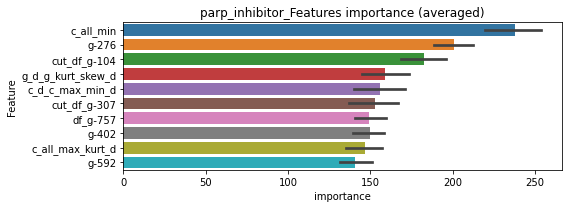

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00125131	valid_1's binary_logloss: 0.015715


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000653267	valid_1's binary_logloss: 0.016281


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000734061	valid_1's binary_logloss: 0.00953114


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000948016	valid_1's binary_logloss: 0.0212558


parp_inhibitor logloss: 0.015701463885639297


neg labels: 3289 → selected neg labels: 3245


pdgfr_inhibitor, len(trt): 297, len(othr): 3245, target_rate: 0.0124717 → Adj_target_rate: 0.0106179
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0538262	valid_1's binary_logloss: 0.256057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0445277	valid_1's binary_logloss: 0.25499
Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0506422	valid_1's binary_logloss: 0.254274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0427613	valid_1's binary_logloss: 0.272967
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.0397229	valid_1's binary_logloss: 0.27171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0462107	valid_1's binary_logloss: 0.259289


1 / 3 AUC score:0.891
y_Threshold: 0.1028779, Threshold: 0.5854718, pos_neg_ratio: 0.8000000
Remove_noisy_data: 442 → Positive_corect_labels: 493/3452
p_label_rate: 0.0100452 Vs.target_rate: 0.01247, Num_p_label: 40.0, conf_0:0.40983, conf_1:0.76111


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0310226	valid_1's binary_logloss: 0.256257


threshold: 0.5854718, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 493.0/3452, y_label_rate: 0.1428158
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0193323	valid_1's binary_logloss: 0.17199
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00641762	valid_1's binary_logloss: 0.161322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201348	valid_1's binary_logloss: 0.145503
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00715645	valid_1's binary_logloss: 0.139562
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0203055	valid_1's binary_logloss: 0.151586
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00613277	valid_1's binary_logloss: 0.139626
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.973
y_Threshold: 0.0698112, Threshold: 0.5854718, pos_neg_ratio: 0.8000000


[300]	training's binary_logloss: 0.0180984	valid_1's binary_logloss: 0.180947
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0210355	valid_1's binary_logloss: 0.179777


Remove_noisy_data: 132 → Positive_corect_labels: 427.0/3320
p_label_rate: 0.0233551 Vs.target_rate: 0.01247, Num_p_label: 93.0, conf_0:0.46838, conf_1:0.70257
Num_p_label: 93.0, Expected: 49.7, Adj_threshold_1: 0.5854718
Num_p_label: 89.0, Expected: 49.7, Adj_threshold_2: 0.6054718
Num_p_label: 87.0, Expected: 49.7, Adj_threshold_3: 0.6254718
Num_p_label: 82.0, Expected: 49.7, Adj_threshold_4: 0.6454718
Num_p_label: 74.0, Expected: 49.7, Adj_threshold_5: 0.6654718
threshold: 0.6654718, positive_p_label: 74.0/3982, p_label_rate: 0.0185836
positive_y_label: 427.0/3320, y_label_rate: 0.1286145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0126075	valid_1's binary_logloss: 0.118068
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00503463	valid_1's binary_logloss: 0.110586
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0130905	valid_1's binary_logloss: 0.104394
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.002904	valid_1's binary_logloss: 0.0915205
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131886	valid_1's binary_logloss: 0.110927
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00286028	valid_1's binary_logloss: 0.100859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129563	valid_1's binary_logloss: 0.125681


3 / 3 AUC score:0.988
y_Threshold: 0.0580158, Threshold: 0.6654718, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00508549	valid_1's binary_logloss: 0.117673


Remove_noisy_data: 56 → Positive_corect_labels: 399.0/3264
p_label_rate: 0.0268709 Vs.target_rate: 0.01247, Num_p_label: 107.0, conf_0:0.50000, conf_1:0.73202
Num_p_label: 107.0, Expected: 49.7, Adj_threshold_1: 0.6654718
Num_p_label: 105.0, Expected: 49.7, Adj_threshold_2: 0.6854718
Num_p_label: 102.0, Expected: 49.7, Adj_threshold_3: 0.7054718
Num_p_label: 96.0, Expected: 49.7, Adj_threshold_4: 0.7254718
Num_p_label: 92.0, Expected: 49.7, Adj_threshold_5: 0.7454718
Num_p_label: 88.0, Expected: 49.7, Adj_threshold_6: 0.7654718
Num_p_label: 82.0, Expected: 49.7, Adj_threshold_7: 0.7854718
threshold: 0.7854718, positive_p_label: 82.0/3982, p_label_rate: 0.0205927
positive_y_label: 399.0/3264, y_label_rate: 0.1222426


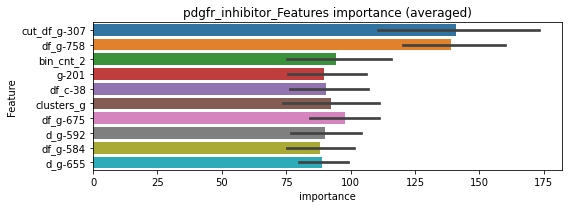

len(train_index) : 2448
len(valid_index) : 816
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2448
len(valid_index) : 816
================================= fold 2/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00959055	valid_1's binary_logloss: 0.118951
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00293033	valid_1's binary_logloss: 0.0807467


len(train_index) : 2448
len(valid_index) : 816
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00225898	valid_1's binary_logloss: 0.0997046


len(train_index) : 2448
len(valid_index) : 816
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.0028902	valid_1's binary_logloss: 0.0789787


pdgfr_inhibitor logloss: 0.09459519945781214


neg labels: 3289 → selected neg labels: 3284


pdk_inhibitor, len(trt): 18, len(othr): 3284, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123355	valid_1's binary_logloss: 0.0091636
[600]	training's binary_logloss: 0.000364281	valid_1's binary_logloss: 0.00605736
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000367454	valid_1's binary_logloss: 0.00603868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123483	valid_1's binary_logloss: 0.00379802
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00037216	valid_1's binary_logloss: 0.00180716
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00124413	valid_1's binary_logloss: 0.00207171
[600]	training's binary_logloss: 0.000365663	valid_1's binary_logloss: 0.000756944
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000361964	valid_1's binary_logloss: 0.000753081
Training until validation scores don't improve for 30 round

1 / 3 AUC score:1.000
y_Threshold: 0.0019737, Threshold: 0.0111102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00778, conf_1:0.01444
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0111102
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0311102
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0511102
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.0711102
threshold: 0.0711102, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112264	valid_1's binary_logloss: 0.0120191
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000356714	valid_1's binary_logloss: 0.00913543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115913	valid_1's binary_logloss: 0.00324928
[600]	training's binary_logloss: 0.000353588	valid_1's binary_logloss: 0.00171967
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000354372	valid_1's binary_logloss: 0.00171803
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116638	valid_1's binary_logloss: 0.00171504
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000358653	valid_1's binary_logloss: 0.00059699
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119792	valid_1's binary_logloss: 0.00441113


2 / 3 AUC score:1.000
y_Threshold: 0.0113953, Threshold: 0.0711102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0052737 Vs.target_rate: 0.00076, Num_p_label: 21.0, conf_0:0.05689, conf_1:0.08533
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0711102
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.0911102


[600]	training's binary_logloss: 0.000358368	valid_1's binary_logloss: 0.00285886
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000359333	valid_1's binary_logloss: 0.00285103


Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1111102
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.1311102
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.1511102
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.1711102
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_7: 0.1911102
threshold: 0.1911102, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00109956	valid_1's binary_logloss: 0.00383442
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000355015	valid_1's binary_logloss: 0.00208832
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113511	valid_1's binary_logloss: 0.00333136
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000363339	valid_1's binary_logloss: 0.0022513
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00113054	valid_1's binary_logloss: 0.00216098
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00036034	valid_1's binary_logloss: 0.000937779
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00112482	valid_1's binary_logloss: 0.00431469


3 / 3 AUC score:1.000
y_Threshold: 0.0492734, Threshold: 0.1911102, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00076, Num_p_label: 6.0, conf_0:0.17200, conf_1:0.21022
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.1911102


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000362504	valid_1's binary_logloss: 0.00234501


threshold: 0.1911102, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


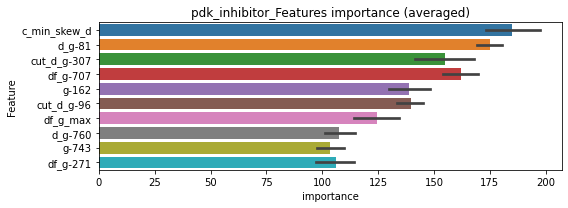

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000347758	valid_1's binary_logloss: 0.00218566
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000356774	valid_1's binary_logloss: 0.00234965
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000361717	valid_1's binary_logloss: 0.00100194
Training until validation scores don't improve for 30 rounds


pdk_inhibitor logloss: 0.0018275831021398062


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000369848	valid_1's binary_logloss: 0.00177215
neg labels: 3289 → selected neg labels: 3248


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 3248, target_rate: 0.0110859 → Adj_target_rate: 0.0096064
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.036999	valid_1's binary_logloss: 0.266152
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.043377	valid_1's binary_logloss: 0.265206
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0370397	valid_1's binary_logloss: 0.240023
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.032562	valid_1's binary_logloss: 0.238622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0402581	valid_1's binary_logloss: 0.223611
Early stopping, best iteration is:
[372]	training's binary_logloss: 0.0252344	valid_1's binary_logloss: 0.219229
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0385273	valid_1's binary_logloss: 0.215312


1 / 3 AUC score:0.903
y_Threshold: 0.0803518, Threshold: 0.2459422, pos_neg_ratio: 0.8000000
Remove_noisy_data: 413 → Positive_corect_labels: 508/3484
p_label_rate: 0.0100452 Vs.target_rate: 0.01109, Num_p_label: 40.0, conf_0:0.17216, conf_1:0.31972


Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0333037	valid_1's binary_logloss: 0.21203


threshold: 0.2459422, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 508.0/3484, y_label_rate: 0.1458094
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01753	valid_1's binary_logloss: 0.128877
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00753614	valid_1's binary_logloss: 0.123625
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01736	valid_1's binary_logloss: 0.111578
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.010355	valid_1's binary_logloss: 0.105561
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0170353	valid_1's binary_logloss: 0.124106
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00596576	valid_1's binary_logloss: 0.116865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0161334	valid_1's binary_logloss: 0.147827
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00839445	valid_1's binary_logloss: 0.1

2 / 3 AUC score:0.984
y_Threshold: 0.0671204, Threshold: 0.2459422, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 466.0/3400
p_label_rate: 0.0158212 Vs.target_rate: 0.01109, Num_p_label: 63.0, conf_0:0.19675, conf_1:0.29513
threshold: 0.2459422, positive_p_label: 63.0/3982, p_label_rate: 0.0158212
positive_y_label: 466.0/3400, y_label_rate: 0.1370588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120188	valid_1's binary_logloss: 0.110318
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00465864	valid_1's binary_logloss: 0.104774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137382	valid_1's binary_logloss: 0.0893774
[600]	training's binary_logloss: 0.00234936	valid_1's binary_logloss: 0.0729202
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00251163	valid_1's binary_logloss: 0.072498
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013678	valid_1's binary_logloss: 0.106185
[600]	training's binary_logloss: 0.00231995	valid_1's binary_logloss: 0.0971838
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00256678	valid_1's binary_logloss: 0.0967595
Training until validation scores don't improve for 30 rounds
[300]	training's bi

3 / 3 AUC score:0.997
y_Threshold: 0.0464781, Threshold: 0.2459422, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 438.0/3344
p_label_rate: 0.0200904 Vs.target_rate: 0.01109, Num_p_label: 80.0, conf_0:0.22135, conf_1:0.27054
Num_p_label: 80.0, Expected: 44.1, Adj_threshold_1: 0.2459422
Num_p_label: 73.0, Expected: 44.1, Adj_threshold_2: 0.2659422
Num_p_label: 72.0, Expected: 44.1, Adj_threshold_3: 0.2859422
Num_p_label: 67.0, Expected: 44.1, Adj_threshold_4: 0.3059422
Num_p_label: 64.0, Expected: 44.1, Adj_threshold_5: 0.3259422
threshold: 0.3259422, positive_p_label: 64.0/3982, p_label_rate: 0.0160723
positive_y_label: 438.0/3344, y_label_rate: 0.1309809


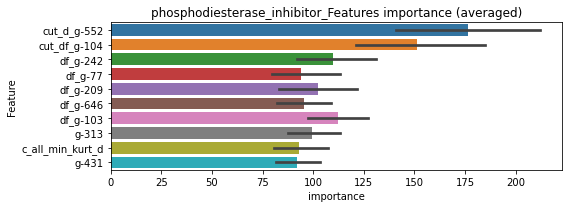

len(train_index) : 2508
len(valid_index) : 836
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.00192821	valid_1's binary_logloss: 0.0726294


len(train_index) : 2508
len(valid_index) : 836
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.002141	valid_1's binary_logloss: 0.0581579


len(train_index) : 2508
len(valid_index) : 836
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00152205	valid_1's binary_logloss: 0.0533926


len(train_index) : 2508
len(valid_index) : 836
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00237512	valid_1's binary_logloss: 0.0859381


phosphodiesterase_inhibitor logloss: 0.06752951630796374


neg labels: 3289 → selected neg labels: 3286


phospholipase_inhibitor, len(trt): 25, len(othr): 3286, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184191	valid_1's binary_logloss: 0.00964826
[600]	training's binary_logloss: 0.000448062	valid_1's binary_logloss: 0.00651886
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00046021	valid_1's binary_logloss: 0.00647782
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00182685	valid_1's binary_logloss: 0.00879507
[600]	training's binary_logloss: 0.000435802	valid_1's binary_logloss: 0.00517874
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000411356	valid_1's binary_logloss: 0.00504671
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0018973	valid_1's binary_logloss: 0.00466168
[600]	training's binary_logloss: 0.000449047	valid_1's binary_logloss: 0.00183584
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000419447	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0026220, Threshold: 0.0132756, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00929, conf_1:0.01726
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0132756
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_2: 0.0332756
threshold: 0.0332756, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171529	valid_1's binary_logloss: 0.00891131
[600]	training's binary_logloss: 0.000425398	valid_1's binary_logloss: 0.00597023
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00043402	valid_1's binary_logloss: 0.00594496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169801	valid_1's binary_logloss: 0.00775704
[600]	training's binary_logloss: 0.000422897	valid_1's binary_logloss: 0.00449766
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000412054	valid_1's binary_logloss: 0.00444254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174627	valid_1's binary_logloss: 0.00355992
[600]	training's binary_logloss: 0.000428092	valid_1's binary_logloss: 0.00129903
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000408362	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0197027, Threshold: 0.0332756, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0072828 Vs.target_rate: 0.00105, Num_p_label: 29.0, conf_0:0.02662, conf_1:0.03993
Num_p_label: 29.0, Expected: 4.2, Adj_threshold_1: 0.0332756
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_2: 0.0532756
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_3: 0.0732756
threshold: 0.0732756, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00171529	valid_1's binary_logloss: 0.00891131
[600]	training's binary_logloss: 0.000425398	valid_1's binary_logloss: 0.00597023
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00043402	valid_1's binary_logloss: 0.00594496
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00169801	valid_1's binary_logloss: 0.00775704
[600]	training's binary_logloss: 0.000422897	valid_1's binary_logloss: 0.00449766
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000412054	valid_1's binary_logloss: 0.00444254
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00174627	valid_1's binary_logloss: 0.00355992
[600]	training's binary_logloss: 0.000428092	valid_1's binary_logloss: 0.00129903
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000408362	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0197027, Threshold: 0.0732756, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00105, Num_p_label: 8.0, conf_0:0.06595, conf_1:0.08060
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0732756
threshold: 0.0732756, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


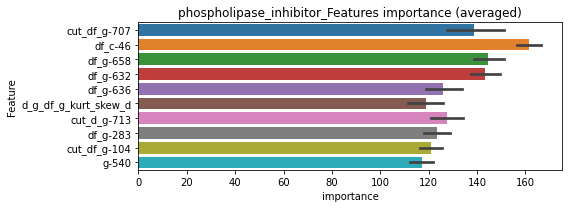

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000433082	valid_1's binary_logloss: 0.00534051


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000410585	valid_1's binary_logloss: 0.00602445


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000441858	valid_1's binary_logloss: 0.00166424


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000413187	valid_1's binary_logloss: 0.00256774


phospholipase_inhibitor logloss: 0.0039028006341524997


neg labels: 3289 → selected neg labels: 3262


pi3k_inhibitor, len(trt): 151, len(othr): 3262, target_rate: 0.0063408 → Adj_target_rate: 0.0059749
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0180084	valid_1's binary_logloss: 0.142761
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.0041196	valid_1's binary_logloss: 0.134157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207771	valid_1's binary_logloss: 0.103445
[600]	training's binary_logloss: 0.00305106	valid_1's binary_logloss: 0.0840519
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.00154656	valid_1's binary_logloss: 0.0816486
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0188449	valid_1's binary_logloss: 0.123795
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00381178	valid_1's binary_logloss: 0.108439
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0192791	valid_1's binary_logloss: 0.126727
Early stopping, best i

1 / 3 AUC score:0.980
y_Threshold: 0.0262742, Threshold: 0.0750057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 219 → Positive_corect_labels: 608/3695
p_label_rate: 0.0100452 Vs.target_rate: 0.00634, Num_p_label: 40.0, conf_0:0.05250, conf_1:0.09751
Num_p_label: 40.0, Expected: 25.2, Adj_threshold_1: 0.0750057
Num_p_label: 24.0, Expected: 25.2, Adj_threshold_2: 0.0950057
threshold: 0.0950057, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 608.0/3695, y_label_rate: 0.1645467
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136077	valid_1's binary_logloss: 0.084101
[600]	training's binary_logloss: 0.00212819	valid_1's binary_logloss: 0.0688205
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00201353	valid_1's binary_logloss: 0.0682325
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128926	valid_1's binary_logloss: 0.0933701
[600]	training's binary_logloss: 0.00209532	valid_1's binary_logloss: 0.078027
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00184009	valid_1's binary_logloss: 0.0772827
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0139217	valid_1's binary_logloss: 0.0685178
[600]	training's binary_logloss: 0.002179	valid_1's binary_logloss: 0.0493744
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.00152813	valid_1's binary_logloss: 0.0472657

2 / 3 AUC score:0.997
y_Threshold: 0.0512309, Threshold: 0.0950057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 592.0/3663
p_label_rate: 0.0097941 Vs.target_rate: 0.00634, Num_p_label: 39.0, conf_0:0.07600, conf_1:0.11401
Num_p_label: 39.0, Expected: 25.2, Adj_threshold_1: 0.0950057
Num_p_label: 25.0, Expected: 25.2, Adj_threshold_2: 0.1150057
threshold: 0.1150057, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 592.0/3663, y_label_rate: 0.1616162
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0124329	valid_1's binary_logloss: 0.0701828
[600]	training's binary_logloss: 0.00202628	valid_1's binary_logloss: 0.050954
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00179377	valid_1's binary_logloss: 0.0502114
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120548	valid_1's binary_logloss: 0.0698703
[600]	training's binary_logloss: 0.00197803	valid_1's binary_logloss: 0.0510071
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.00119586	valid_1's binary_logloss: 0.0478423
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116409	valid_1's binary_logloss: 0.0840137
[600]	training's binary_logloss: 0.00195849	valid_1's binary_logloss: 0.0680786
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.00180129	valid_1's binary_logloss: 0.0675

3 / 3 AUC score:0.999
y_Threshold: 0.0416185, Threshold: 0.1150057, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 580.0/3639
p_label_rate: 0.0070316 Vs.target_rate: 0.00634, Num_p_label: 28.0, conf_0:0.10351, conf_1:0.12651
threshold: 0.1150057, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 580.0/3639, y_label_rate: 0.1593844


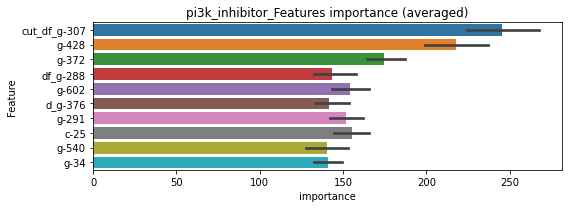

len(train_index) : 2729
len(valid_index) : 910
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.00138344	valid_1's binary_logloss: 0.0596501


len(train_index) : 2729
len(valid_index) : 910
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00186555	valid_1's binary_logloss: 0.062131


len(train_index) : 2729
len(valid_index) : 910
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.0017421	valid_1's binary_logloss: 0.0514948


len(train_index) : 2730
len(valid_index) : 909
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[838]	training's binary_logloss: 0.00105826	valid_1's binary_logloss: 0.0476588


pi3k_inhibitor logloss: 0.05523574667949873


neg labels: 3289 → selected neg labels: 3286


pkc_inhibitor, len(trt): 31, len(othr): 3286, target_rate: 0.0013018 → Adj_target_rate: 0.0015554
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223534	valid_1's binary_logloss: 0.00650509
[600]	training's binary_logloss: 0.000532189	valid_1's binary_logloss: 0.00268987
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000468938	valid_1's binary_logloss: 0.00250644
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215378	valid_1's binary_logloss: 0.0166387
[600]	training's binary_logloss: 0.000516083	valid_1's binary_logloss: 0.0111585
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000491739	valid_1's binary_logloss: 0.0110646
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227627	valid_1's binary_logloss: 0.00458436
[600]	training's binary_logloss: 0.000536543	valid_1's binary_logloss: 0.00184168
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000498503	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0030948, Threshold: 0.0092273, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130, Num_p_label: 40.0, conf_0:0.00646, conf_1:0.01200
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_1: 0.0092273
Num_p_label: 7.0, Expected: 5.2, Adj_threshold_2: 0.0292273
threshold: 0.0292273, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216102	valid_1's binary_logloss: 0.00595131
[600]	training's binary_logloss: 0.000507926	valid_1's binary_logloss: 0.00248513
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000461339	valid_1's binary_logloss: 0.00233787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020455	valid_1's binary_logloss: 0.016725
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000584826	valid_1's binary_logloss: 0.0117244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212405	valid_1's binary_logloss: 0.00368712
[600]	training's binary_logloss: 0.00051526	valid_1's binary_logloss: 0.00118816
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000466469	valid_1's binary_logloss: 0.00110247
Training until validation scores don't improve for 30 rounds
[30

2 / 3 AUC score:1.000
y_Threshold: 0.0454506, Threshold: 0.0292273, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0055249 Vs.target_rate: 0.00130, Num_p_label: 22.0, conf_0:0.02338, conf_1:0.03507
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_1: 0.0292273
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.0492273
threshold: 0.0492273, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216102	valid_1's binary_logloss: 0.00595131
[600]	training's binary_logloss: 0.000507926	valid_1's binary_logloss: 0.00248513
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000461339	valid_1's binary_logloss: 0.00233787
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020455	valid_1's binary_logloss: 0.016725
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000584826	valid_1's binary_logloss: 0.0117244
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00212405	valid_1's binary_logloss: 0.00368712
[600]	training's binary_logloss: 0.00051526	valid_1's binary_logloss: 0.00118816
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000466469	valid_1's binary_logloss: 0.00110247
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.0454506, Threshold: 0.0492273, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00130, Num_p_label: 9.0, conf_0:0.04430, conf_1:0.05415
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.0492273
threshold: 0.0492273, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


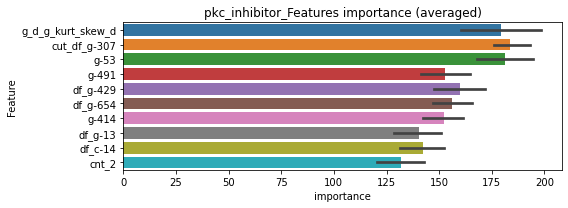

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000468501	valid_1's binary_logloss: 0.0021188


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000470262	valid_1's binary_logloss: 0.0129995


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000467989	valid_1's binary_logloss: 0.00106074


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000464786	valid_1's binary_logloss: 0.00358409


pkc_inhibitor logloss: 0.004941327551695935


neg labels: 3289 → selected neg labels: 3281


potassium_channel_activator, len(trt): 55, len(othr): 3281, target_rate: 0.0023096 → Adj_target_rate: 0.0025322
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395729	valid_1's binary_logloss: 0.0411156
[600]	training's binary_logloss: 0.000794189	valid_1's binary_logloss: 0.0342775
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000853232	valid_1's binary_logloss: 0.0341724
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00440135	valid_1's binary_logloss: 0.0199658
[600]	training's binary_logloss: 0.000846194	valid_1's binary_logloss: 0.0114854
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.0007204	valid_1's binary_logloss: 0.0107265
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00445598	valid_1's binary_logloss: 0.0120659
[600]	training's binary_logloss: 0.000869443	valid_1's binary_logloss: 0.00473761
[900]	training's binary_logloss: 0.000605664	valid_1's binary_logloss: 0.00404823
Early stopping, best 

1 / 3 AUC score:1.000
y_Threshold: 0.0062977, Threshold: 0.0404181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00231, Num_p_label: 40.0, conf_0:0.02829, conf_1:0.05254
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0404181
Num_p_label: 22.0, Expected: 9.2, Adj_threshold_2: 0.0604181
threshold: 0.0604181, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00400136	valid_1's binary_logloss: 0.0381244
[600]	training's binary_logloss: 0.000789482	valid_1's binary_logloss: 0.0298359
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000666567	valid_1's binary_logloss: 0.0291375
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00415212	valid_1's binary_logloss: 0.0180829
[600]	training's binary_logloss: 0.000819729	valid_1's binary_logloss: 0.0102227
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000631812	valid_1's binary_logloss: 0.00966874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00417964	valid_1's binary_logloss: 0.0106335
[600]	training's binary_logloss: 0.000846456	valid_1's binary_logloss: 0.00369264
[900]	training's binary_logloss: 0.000587101	valid_1's binary_logloss: 0.00299851
Early stopping, be

2 / 3 AUC score:1.000
y_Threshold: 0.0274522, Threshold: 0.0604181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0190859 Vs.target_rate: 0.00231, Num_p_label: 76.0, conf_0:0.04833, conf_1:0.07250
Num_p_label: 76.0, Expected: 9.2, Adj_threshold_1: 0.0604181
Num_p_label: 65.0, Expected: 9.2, Adj_threshold_2: 0.0804181
Num_p_label: 59.0, Expected: 9.2, Adj_threshold_3: 0.1004181
Num_p_label: 50.0, Expected: 9.2, Adj_threshold_4: 0.1204181
Num_p_label: 47.0, Expected: 9.2, Adj_threshold_5: 0.1404181
Num_p_label: 44.0, Expected: 9.2, Adj_threshold_6: 0.1604181
Num_p_label: 39.0, Expected: 9.2, Adj_threshold_7: 0.1804181
Num_p_label: 33.0, Expected: 9.2, Adj_threshold_8: 0.2004181
Num_p_label: 29.0, Expected: 9.2, Adj_threshold_9: 0.2204181
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_10: 0.2404181
threshold: 0.2604181, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00395364	valid_1's binary_logloss: 0.0270318
[600]	training's binary_logloss: 0.00079143	valid_1's binary_logloss: 0.0182935
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00063926	valid_1's binary_logloss: 0.0174619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00391463	valid_1's binary_logloss: 0.0192856
[600]	training's binary_logloss: 0.000794933	valid_1's binary_logloss: 0.0117567
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000621626	valid_1's binary_logloss: 0.0109259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00397982	valid_1's binary_logloss: 0.0156471
[600]	training's binary_logloss: 0.000797828	valid_1's binary_logloss: 0.00726121
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.00060126	valid_1's binary_logloss

3 / 3 AUC score:1.000
y_Threshold: 0.0422419, Threshold: 0.2604181, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0045203 Vs.target_rate: 0.00231, Num_p_label: 18.0, conf_0:0.23438, conf_1:0.28646
Num_p_label: 18.0, Expected: 9.2, Adj_threshold_1: 0.2604181
threshold: 0.2604181, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


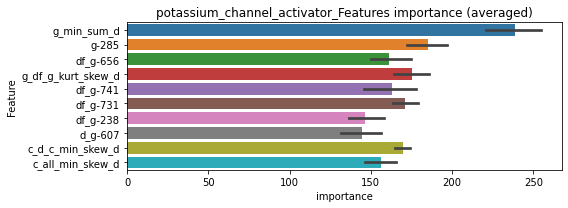

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000883559	valid_1's binary_logloss: 0.0245673


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000647363	valid_1's binary_logloss: 0.00988051


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000601047	valid_1's binary_logloss: 0.0183549


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000632755	valid_1's binary_logloss: 0.0114553


potassium_channel_activator logloss: 0.016069977771458816


neg labels: 3289 → selected neg labels: 3278


potassium_channel_antagonist, len(trt): 98, len(othr): 3278, target_rate: 0.0041152 → Adj_target_rate: 0.0041375
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00947897	valid_1's binary_logloss: 0.079413
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.0018531	valid_1's binary_logloss: 0.0662868
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0107632	valid_1's binary_logloss: 0.0679824
[600]	training's binary_logloss: 0.00166428	valid_1's binary_logloss: 0.0571826
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.0014389	valid_1's binary_logloss: 0.0567621
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108258	valid_1's binary_logloss: 0.0516197
[600]	training's binary_logloss: 0.00170096	valid_1's binary_logloss: 0.0400841
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00184584	valid_1's binary_logloss: 0.0399087
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.995
y_Threshold: 0.0115064, Threshold: 0.0339796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 647/3785
p_label_rate: 0.0100452 Vs.target_rate: 0.00412, Num_p_label: 40.0, conf_0:0.02379, conf_1:0.04417
Num_p_label: 40.0, Expected: 16.4, Adj_threshold_1: 0.0339796
Num_p_label: 26.0, Expected: 16.4, Adj_threshold_2: 0.0539796
Num_p_label: 18.0, Expected: 16.4, Adj_threshold_3: 0.0739796
threshold: 0.0739796, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3785, y_label_rate: 0.1709379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00950317	valid_1's binary_logloss: 0.0573263
[600]	training's binary_logloss: 0.00152411	valid_1's binary_logloss: 0.0445606
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000959227	valid_1's binary_logloss: 0.0424082
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00897169	valid_1's binary_logloss: 0.0608425
[600]	training's binary_logloss: 0.00146224	valid_1's binary_logloss: 0.0473722
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.00103946	valid_1's binary_logloss: 0.0459722
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00940778	valid_1's binary_logloss: 0.0605983
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00183567	valid_1's binary_logloss: 0.0514934
Training until validation scores don't improve for 30 rounds
[300]	trai

2 / 3 AUC score:0.998
y_Threshold: 0.0297298, Threshold: 0.0739796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0072828 Vs.target_rate: 0.00412, Num_p_label: 29.0, conf_0:0.05918, conf_1:0.08878
Num_p_label: 29.0, Expected: 16.4, Adj_threshold_1: 0.0739796
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_2: 0.0939796
threshold: 0.0939796, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3771, y_label_rate: 0.1697163
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00808676	valid_1's binary_logloss: 0.0632283
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00156157	valid_1's binary_logloss: 0.0497509
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00837173	valid_1's binary_logloss: 0.0517563
[600]	training's binary_logloss: 0.00141995	valid_1's binary_logloss: 0.0391854
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.00124763	valid_1's binary_logloss: 0.0383936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00887215	valid_1's binary_logloss: 0.0428498
[600]	training's binary_logloss: 0.00145669	valid_1's binary_logloss: 0.0293426
[900]	training's binary_logloss: 0.000800972	valid_1's binary_logloss: 0.0273788
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000809529	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0333503, Threshold: 0.0939796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0052737 Vs.target_rate: 0.00412, Num_p_label: 21.0, conf_0:0.08458, conf_1:0.10338
threshold: 0.0939796, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 635.0/3761, y_label_rate: 0.1688381


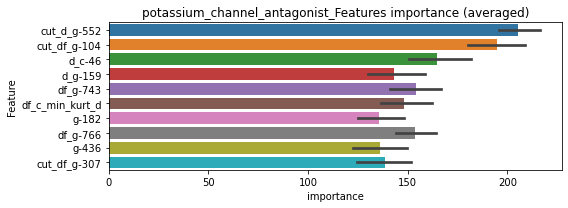

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00181114	valid_1's binary_logloss: 0.0432337


len(train_index) : 2821
len(valid_index) : 940
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000909508	valid_1's binary_logloss: 0.0299549


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000773785	valid_1's binary_logloss: 0.0253414


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00108803	valid_1's binary_logloss: 0.0408851


potassium_channel_antagonist logloss: 0.03485599923853115


neg labels: 3289 → selected neg labels: 3278


ppar_receptor_agonist, len(trt): 115, len(othr): 3278, target_rate: 0.0048291 → Adj_target_rate: 0.0047401
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011803	valid_1's binary_logloss: 0.0932869
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00350648	valid_1's binary_logloss: 0.0836412
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141209	valid_1's binary_logloss: 0.0891718
[600]	training's binary_logloss: 0.0021253	valid_1's binary_logloss: 0.0771572
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00234221	valid_1's binary_logloss: 0.0768315
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0137925	valid_1's binary_logloss: 0.0610531
[600]	training's binary_logloss: 0.00213954	valid_1's binary_logloss: 0.0466889
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00183181	valid_1's binary_logloss: 0.0460974
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.992
y_Threshold: 0.0188611, Threshold: 0.0587425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 638/3767
p_label_rate: 0.0100452 Vs.target_rate: 0.00483, Num_p_label: 40.0, conf_0:0.04112, conf_1:0.07637
Num_p_label: 40.0, Expected: 19.2, Adj_threshold_1: 0.0587425
Num_p_label: 21.0, Expected: 19.2, Adj_threshold_2: 0.0787425
threshold: 0.0787425, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 638.0/3767, y_label_rate: 0.1693655
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0108462	valid_1's binary_logloss: 0.0797324
[600]	training's binary_logloss: 0.00172434	valid_1's binary_logloss: 0.0662465
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.0016252	valid_1's binary_logloss: 0.0659731
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105381	valid_1's binary_logloss: 0.0585922
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00373044	valid_1's binary_logloss: 0.0495967
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105336	valid_1's binary_logloss: 0.0587595
[600]	training's binary_logloss: 0.0017214	valid_1's binary_logloss: 0.0447229
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.00135294	valid_1's binary_logloss: 0.0440038
Training until validation scores don't improve for 30 rounds
[300]	training's

2 / 3 AUC score:0.999


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00315699	valid_1's binary_logloss: 0.0874137


y_Threshold: 0.0430397, Threshold: 0.0787425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 621.0/3733
p_label_rate: 0.0158212 Vs.target_rate: 0.00483, Num_p_label: 63.0, conf_0:0.06299, conf_1:0.09449
Num_p_label: 63.0, Expected: 19.2, Adj_threshold_1: 0.0787425
Num_p_label: 43.0, Expected: 19.2, Adj_threshold_2: 0.0987425
Num_p_label: 28.0, Expected: 19.2, Adj_threshold_3: 0.1187425
threshold: 0.1187425, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 621.0/3733, y_label_rate: 0.1663541
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00897848	valid_1's binary_logloss: 0.0533519
[600]	training's binary_logloss: 0.00157786	valid_1's binary_logloss: 0.0417612
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00134063	valid_1's binary_logloss: 0.0406075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00900069	valid_1's binary_logloss: 0.048015
[600]	training's binary_logloss: 0.00155224	valid_1's binary_logloss: 0.0351749
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000981294	valid_1's binary_logloss: 0.0334843
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00924996	valid_1's binary_logloss: 0.0675255
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00299164	valid_1's binary_logloss: 0.0621903
Training until validation scores don't improve for 30 rounds
[300]	train

3 / 3 AUC score:0.998
y_Threshold: 0.0401192, Threshold: 0.1187425, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 610.0/3711
p_label_rate: 0.0050226 Vs.target_rate: 0.00483, Num_p_label: 20.0, conf_0:0.10687, conf_1:0.13062
threshold: 0.1187425, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 610.0/3711, y_label_rate: 0.1643762


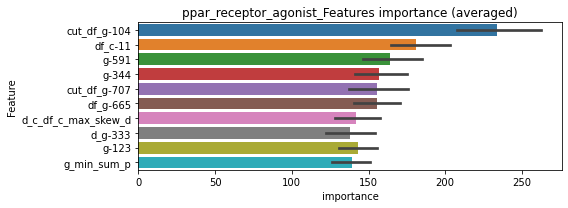

len(train_index) : 2783
len(valid_index) : 928
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00104853	valid_1's binary_logloss: 0.03475


len(train_index) : 2783
len(valid_index) : 928
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00140832	valid_1's binary_logloss: 0.054523


len(train_index) : 2783
len(valid_index) : 928
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.00151823	valid_1's binary_logloss: 0.0238463


len(train_index) : 2784
len(valid_index) : 927
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00117749	valid_1's binary_logloss: 0.0355229


ppar_receptor_agonist logloss: 0.037160993092381876


neg labels: 3289 → selected neg labels: 3282


ppar_receptor_antagonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00225665	valid_1's binary_logloss: 0.00977078
[600]	training's binary_logloss: 0.000499367	valid_1's binary_logloss: 0.00541474
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000441793	valid_1's binary_logloss: 0.00535365
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235211	valid_1's binary_logloss: 0.00714378
[600]	training's binary_logloss: 0.000503972	valid_1's binary_logloss: 0.0029526
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000455233	valid_1's binary_logloss: 0.0028181
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237898	valid_1's binary_logloss: 0.00657742
[600]	training's binary_logloss: 0.000516591	valid_1's binary_logloss: 0.00360656
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000481251	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0027981, Threshold: 0.0077707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00544, conf_1:0.01010
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0077707
Num_p_label: 5.0, Expected: 5.0, Adj_threshold_2: 0.0277707
threshold: 0.0277707, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00208526	valid_1's binary_logloss: 0.00932716
[600]	training's binary_logloss: 0.000479276	valid_1's binary_logloss: 0.00574956
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000433252	valid_1's binary_logloss: 0.00561348
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00221213	valid_1's binary_logloss: 0.00608093
[600]	training's binary_logloss: 0.000489047	valid_1's binary_logloss: 0.0024836
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000458922	valid_1's binary_logloss: 0.00241327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219917	valid_1's binary_logloss: 0.00610302
[600]	training's binary_logloss: 0.000490975	valid_1's binary_logloss: 0.00311551
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000449077	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0250271, Threshold: 0.0277707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0045203 Vs.target_rate: 0.00126, Num_p_label: 18.0, conf_0:0.02222, conf_1:0.03332
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_1: 0.0277707
Num_p_label: 6.0, Expected: 5.0, Adj_threshold_2: 0.0477707


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00111446	valid_1's binary_logloss: 0.0195489


threshold: 0.0477707, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0020644	valid_1's binary_logloss: 0.0123292
[600]	training's binary_logloss: 0.000475992	valid_1's binary_logloss: 0.00767721
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000498969	valid_1's binary_logloss: 0.00764028
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00220215	valid_1's binary_logloss: 0.00558759
[600]	training's binary_logloss: 0.00048438	valid_1's binary_logloss: 0.00248067
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000439018	valid_1's binary_logloss: 0.00239884
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215743	valid_1's binary_logloss: 0.00760679
[600]	training's binary_logloss: 0.000488008	valid_1's binary_logloss: 0.00409161
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000473753	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0174683, Threshold: 0.0477707, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0017579 Vs.target_rate: 0.00126, Num_p_label: 7.0, conf_0:0.04299, conf_1:0.05255
threshold: 0.0477707, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


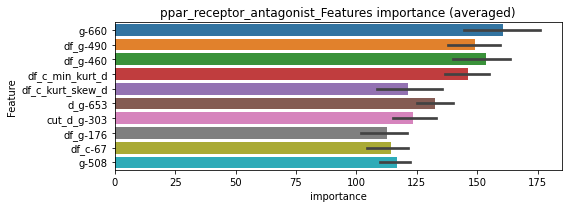

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000453422	valid_1's binary_logloss: 0.00718848


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000441889	valid_1's binary_logloss: 0.0021746


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000459505	valid_1's binary_logloss: 0.00477615


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000461963	valid_1's binary_logloss: 0.00579665


ppar_receptor_antagonist logloss: 0.004984019001732913


neg labels: 3289 → selected neg labels: 3270


progesterone_receptor_agonist, len(trt): 119, len(othr): 3270, target_rate: 0.0049971 → Adj_target_rate: 0.0048799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122258	valid_1's binary_logloss: 0.126429
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00364291	valid_1's binary_logloss: 0.121127
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123114	valid_1's binary_logloss: 0.0757689
[600]	training's binary_logloss: 0.00202026	valid_1's binary_logloss: 0.0613964
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00175926	valid_1's binary_logloss: 0.0605573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132162	valid_1's binary_logloss: 0.0680965
[600]	training's binary_logloss: 0.00210462	valid_1's binary_logloss: 0.054343
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.00123022	valid_1's binary_logloss: 0.0526604
Training until validation scores don't improve for 30 rounds
[300]	training's 

1 / 3 AUC score:0.992
y_Threshold: 0.0175164, Threshold: 0.1834417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 175 → Positive_corect_labels: 632/3749
p_label_rate: 0.0100452 Vs.target_rate: 0.00500, Num_p_label: 40.0, conf_0:0.12841, conf_1:0.23847
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_1: 0.1834417
Num_p_label: 34.0, Expected: 19.9, Adj_threshold_2: 0.2034417
Num_p_label: 32.0, Expected: 19.9, Adj_threshold_3: 0.2234417
Num_p_label: 30.0, Expected: 19.9, Adj_threshold_4: 0.2434417
Num_p_label: 28.0, Expected: 19.9, Adj_threshold_5: 0.2634417
threshold: 0.2634417, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 632.0/3749, y_label_rate: 0.1685783
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0102346	valid_1's binary_logloss: 0.0661513
[600]	training's binary_logloss: 0.00169233	valid_1's binary_logloss: 0.0523437
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00123789	valid_1's binary_logloss: 0.0508468
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00927999	valid_1's binary_logloss: 0.0835491
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00296279	valid_1's binary_logloss: 0.0773033
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00996588	valid_1's binary_logloss: 0.0589491
[600]	training's binary_logloss: 0.00171439	valid_1's binary_logloss: 0.0477634
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.00114613	valid_1's binary_logloss: 0.0463988
Training until validation scores don't improve for 30 rounds
[300]	traini

2 / 3 AUC score:0.998
y_Threshold: 0.0385159, Threshold: 0.2634417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 615.0/3715
p_label_rate: 0.0185836 Vs.target_rate: 0.00500, Num_p_label: 74.0, conf_0:0.21075, conf_1:0.31613
Num_p_label: 74.0, Expected: 19.9, Adj_threshold_1: 0.2634417
Num_p_label: 69.0, Expected: 19.9, Adj_threshold_2: 0.2834417
Num_p_label: 66.0, Expected: 19.9, Adj_threshold_3: 0.3034417
Num_p_label: 63.0, Expected: 19.9, Adj_threshold_4: 0.3234417
Num_p_label: 62.0, Expected: 19.9, Adj_threshold_5: 0.3434417
Num_p_label: 55.0, Expected: 19.9, Adj_threshold_6: 0.3634417
Num_p_label: 47.0, Expected: 19.9, Adj_threshold_7: 0.3834417
Num_p_label: 43.0, Expected: 19.9, Adj_threshold_8: 0.4034417
Num_p_label: 42.0, Expected: 19.9, Adj_threshold_9: 0.4234417
Num_p_label: 38.0, Expected: 19.9, Adj_threshold_10: 0.4434417
threshold: 0.4634417, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 615.0/3715, y_label_rate: 0.1655451

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00843214	valid_1's binary_logloss: 0.0709376
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00169915	valid_1's binary_logloss: 0.0616853
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00792274	valid_1's binary_logloss: 0.0842094
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00237511	valid_1's binary_logloss: 0.0795091
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00893215	valid_1's binary_logloss: 0.0422047
[600]	training's binary_logloss: 0.00159113	valid_1's binary_logloss: 0.0285713
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.00113051	valid_1's binary_logloss: 0.0271849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00865601	valid_1's binary_logloss: 0.0644717


3 / 3 AUC score:0.998
y_Threshold: 0.0426755, Threshold: 0.4634417, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 594.0/3673


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00462401	valid_1's binary_logloss: 0.0613795


p_label_rate: 0.0113009 Vs.target_rate: 0.00500, Num_p_label: 45.0, conf_0:0.41710, conf_1:0.50979
Num_p_label: 45.0, Expected: 19.9, Adj_threshold_1: 0.4634417
Num_p_label: 42.0, Expected: 19.9, Adj_threshold_2: 0.4834417
Num_p_label: 41.0, Expected: 19.9, Adj_threshold_3: 0.5034417
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_4: 0.5234417
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_5: 0.5434417
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_6: 0.5634417
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_7: 0.5834417
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_8: 0.6034417
Num_p_label: 29.0, Expected: 19.9, Adj_threshold_9: 0.6234417
threshold: 0.6234417, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 594.0/3673, y_label_rate: 0.1617207


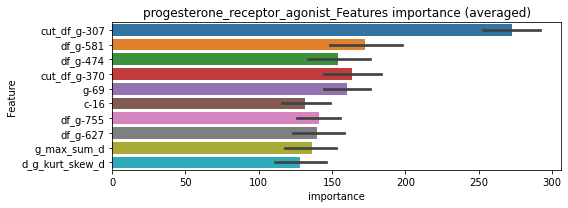

len(train_index) : 2754
len(valid_index) : 919
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00152659	valid_1's binary_logloss: 0.0414097


len(train_index) : 2755
len(valid_index) : 918
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000944133	valid_1's binary_logloss: 0.028959


len(train_index) : 2755
len(valid_index) : 918
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00164122	valid_1's binary_logloss: 0.0497535


len(train_index) : 2755
len(valid_index) : 918
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00154663	valid_1's binary_logloss: 0.0381666


progesterone_receptor_agonist logloss: 0.03957266170906468


neg labels: 3289 → selected neg labels: 3287


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00115347	valid_1's binary_logloss: 0.00262811
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000357939	valid_1's binary_logloss: 0.00109476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00116025	valid_1's binary_logloss: 0.0026386
[600]	training's binary_logloss: 0.000347495	valid_1's binary_logloss: 0.0010573
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000347495	valid_1's binary_logloss: 0.0010573
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00119683	valid_1's binary_logloss: 0.00227305
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000361244	valid_1's binary_logloss: 0.000969505
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110803	valid_1's binary_logloss: 0.00692009


1 / 3 AUC score:1.000
y_Threshold: 0.0021297, Threshold: 0.0104440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00731, conf_1:0.01358
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0104440
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_2: 0.0304440


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000353089	valid_1's binary_logloss: 0.00441637


Num_p_label: 3.0, Expected: 3.0, Adj_threshold_3: 0.0504440
threshold: 0.0504440, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107437	valid_1's binary_logloss: 0.00209571
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000338173	valid_1's binary_logloss: 0.00081931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108272	valid_1's binary_logloss: 0.00221498
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000338022	valid_1's binary_logloss: 0.000857295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110498	valid_1's binary_logloss: 0.00208711
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000343338	valid_1's binary_logloss: 0.000847445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104913	valid_1's binary_logloss: 0.00604265
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000328449

2 / 3 AUC score:1.000
y_Threshold: 0.0585209, Threshold: 0.0504440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0045203 Vs.target_rate: 0.00076, Num_p_label: 18.0, conf_0:0.04036, conf_1:0.06053
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0504440
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0704440
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_3: 0.0904440
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1104440
threshold: 0.1104440, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00107437	valid_1's binary_logloss: 0.00209571
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000338173	valid_1's binary_logloss: 0.00081931
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00108272	valid_1's binary_logloss: 0.00221498
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000338022	valid_1's binary_logloss: 0.000857295
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00110498	valid_1's binary_logloss: 0.00208711
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000343338	valid_1's binary_logloss: 0.000847445
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00104913	valid_1's binary_logloss: 0.00604265


3 / 3 AUC score:1.000
y_Threshold: 0.0585209, Threshold: 0.1104440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076, Num_p_label: 4.0, conf_0:0.09940, conf_1:0.12149


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000328449	valid_1's binary_logloss: 0.00375093


threshold: 0.1104440, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


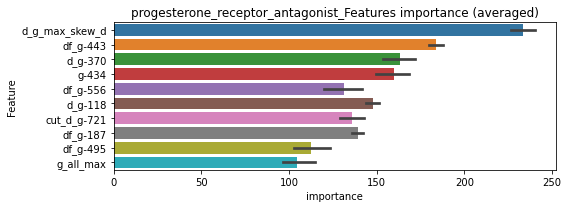

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000346262	valid_1's binary_logloss: 0.000787324
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000344681	valid_1's binary_logloss: 0.000969879
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000339642	valid_1's binary_logloss: 0.000692123
Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0015112137294065729


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000334271	valid_1's binary_logloss: 0.00359553
neg labels: 3289 → selected neg labels: 3286


prostaglandin_inhibitor, len(trt): 36, len(othr): 3286, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0026436	valid_1's binary_logloss: 0.0119175
[600]	training's binary_logloss: 0.000548594	valid_1's binary_logloss: 0.00720678
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000504705	valid_1's binary_logloss: 0.00691643
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00248068	valid_1's binary_logloss: 0.0180356
[600]	training's binary_logloss: 0.000534607	valid_1's binary_logloss: 0.0127686
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000481884	valid_1's binary_logloss: 0.0124912
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00260487	valid_1's binary_logloss: 0.0153821
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000661927	valid_1's binary_logloss: 0.0127875
Training until validation scores don't improve for 30 rounds
[300]

1 / 3 AUC score:1.000
y_Threshold: 0.0031705, Threshold: 0.0174634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01222, conf_1:0.02270
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0174634
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.0374634
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_3: 0.0574634
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.0774634
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.0974634
threshold: 0.0974634, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243672	valid_1's binary_logloss: 0.0103317
[600]	training's binary_logloss: 0.000527782	valid_1's binary_logloss: 0.00616711
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000467173	valid_1's binary_logloss: 0.00594717
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227863	valid_1's binary_logloss: 0.0158234
[600]	training's binary_logloss: 0.000512675	valid_1's binary_logloss: 0.0106481
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000526595	valid_1's binary_logloss: 0.0105972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252536	valid_1's binary_logloss: 0.0157265
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000673674	valid_1's binary_logloss: 0.0134986
Training until validation scores don't improve for 30 rounds
[300

2 / 3 AUC score:1.000
y_Threshold: 0.0214698, Threshold: 0.0974634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0060271 Vs.target_rate: 0.00151, Num_p_label: 24.0, conf_0:0.07797, conf_1:0.11696
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_1: 0.0974634
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1174634
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1374634
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.1574634
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_5: 0.1774634
threshold: 0.1774634, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230384	valid_1's binary_logloss: 0.0158297
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00069429	valid_1's binary_logloss: 0.0124188
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237053	valid_1's binary_logloss: 0.00669284
[600]	training's binary_logloss: 0.0005317	valid_1's binary_logloss: 0.0029085
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000497222	valid_1's binary_logloss: 0.00274802
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253401	valid_1's binary_logloss: 0.00691945
[600]	training's binary_logloss: 0.000532437	valid_1's binary_logloss: 0.00272543
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00047716	valid_1's binary_logloss: 0.00259378
Training until validation scores don't improve for 30 rounds
[300]

3 / 3 AUC score:1.000
y_Threshold: 0.0229604, Threshold: 0.1774634, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0037670 Vs.target_rate: 0.00151, Num_p_label: 15.0, conf_0:0.15972, conf_1:0.19521
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.1774634
threshold: 0.1774634, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


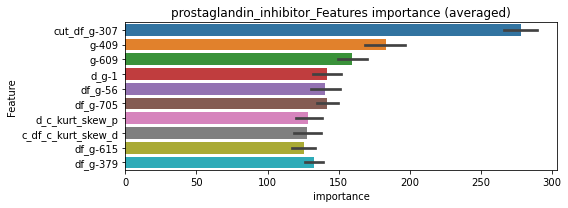

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000507926	valid_1's binary_logloss: 0.013611


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000485017	valid_1's binary_logloss: 0.00330132


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000478784	valid_1's binary_logloss: 0.0023041


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000479696	valid_1's binary_logloss: 0.00804265


prostaglandin_inhibitor logloss: 0.006817843605596456


neg labels: 3289 → selected neg labels: 3280


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3280, target_rate: 0.0035273 → Adj_target_rate: 0.0036294
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00816182	valid_1's binary_logloss: 0.075714
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00256562	valid_1's binary_logloss: 0.0681733
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00918853	valid_1's binary_logloss: 0.044777
[600]	training's binary_logloss: 0.00144483	valid_1's binary_logloss: 0.0345548
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00149408	valid_1's binary_logloss: 0.034399
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00906303	valid_1's binary_logloss: 0.0398442
[600]	training's binary_logloss: 0.00146984	valid_1's binary_logloss: 0.0316128
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00156467	valid_1's binary_logloss: 0.0314263
Training until validation scores don't improve for 30 rounds
[300]	training

1 / 3 AUC score:0.996
y_Threshold: 0.0113277, Threshold: 0.0596653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3790
p_label_rate: 0.0100452 Vs.target_rate: 0.00353, Num_p_label: 40.0, conf_0:0.04177, conf_1:0.07756
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_1: 0.0596653
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_2: 0.0796653
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_3: 0.0996653
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_4: 0.1196653
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_5: 0.1396653
threshold: 0.1396653, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00733624	valid_1's binary_logloss: 0.0483134
[600]	training's binary_logloss: 0.00124107	valid_1's binary_logloss: 0.0359695
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00129405	valid_1's binary_logloss: 0.0358353
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00742826	valid_1's binary_logloss: 0.0463754
[600]	training's binary_logloss: 0.00124738	valid_1's binary_logloss: 0.0368423
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000862219	valid_1's binary_logloss: 0.0355406
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00708284	valid_1's binary_logloss: 0.0407441
[600]	training's binary_logloss: 0.00125359	valid_1's binary_logloss: 0.0294309
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000923818	valid_1's binary_logloss: 

2 / 3 AUC score:1.000
y_Threshold: 0.0402292, Threshold: 0.1396653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0115520 Vs.target_rate: 0.00353, Num_p_label: 46.0, conf_0:0.11173, conf_1:0.16760
Num_p_label: 46.0, Expected: 14.0, Adj_threshold_1: 0.1396653
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_2: 0.1596653
Num_p_label: 42.0, Expected: 14.0, Adj_threshold_3: 0.1796653
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_4: 0.1996653
Num_p_label: 38.0, Expected: 14.0, Adj_threshold_5: 0.2196653
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_6: 0.2396653
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_7: 0.2596653
Num_p_label: 35.0, Expected: 14.0, Adj_threshold_8: 0.2796653
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_9: 0.2996653
Num_p_label: 31.0, Expected: 14.0, Adj_threshold_10: 0.3196653
threshold: 0.3396653, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 641.0/3774, y_label_rate: 0.1698463

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00675622	valid_1's binary_logloss: 0.0411465
[600]	training's binary_logloss: 0.00115744	valid_1's binary_logloss: 0.0313153
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000807088	valid_1's binary_logloss: 0.0303361
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00671116	valid_1's binary_logloss: 0.0403867
[600]	training's binary_logloss: 0.00115761	valid_1's binary_logloss: 0.0288929
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000761844	valid_1's binary_logloss: 0.0274374
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00639254	valid_1's binary_logloss: 0.0560463
[600]	training's binary_logloss: 0.00111691	valid_1's binary_logloss: 0.0480751
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00116943	valid_1's binary_logloss: 

3 / 3 AUC score:1.000
y_Threshold: 0.0355159, Threshold: 0.3396653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 634.0/3760
p_label_rate: 0.0090407 Vs.target_rate: 0.00353, Num_p_label: 36.0, conf_0:0.30570, conf_1:0.37363
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_1: 0.3396653
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_2: 0.3596653
Num_p_label: 33.0, Expected: 14.0, Adj_threshold_3: 0.3796653
Num_p_label: 33.0, Expected: 14.0, Adj_threshold_4: 0.3996653
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_5: 0.4196653
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_6: 0.4396653
Num_p_label: 29.0, Expected: 14.0, Adj_threshold_7: 0.4596653
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_8: 0.4796653
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_9: 0.4996653
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_10: 0.5196653
threshold: 0.5396653, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 634.0/3760, y_label_rate: 0.1686170

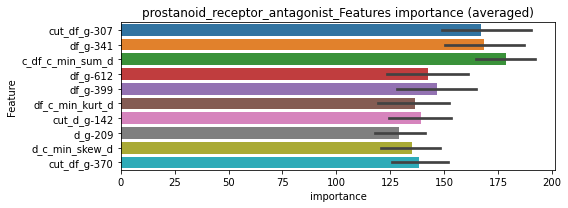

len(train_index) : 2820
len(valid_index) : 940
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000864882	valid_1's binary_logloss: 0.0257594


len(train_index) : 2820
len(valid_index) : 940
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00169953	valid_1's binary_logloss: 0.0403505


len(train_index) : 2820
len(valid_index) : 940
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000798463	valid_1's binary_logloss: 0.0245847


len(train_index) : 2820
len(valid_index) : 940
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000899629	valid_1's binary_logloss: 0.0200705


prostanoid_receptor_antagonist logloss: 0.02769127307806948


neg labels: 3289 → selected neg labels: 3197


proteasome_inhibitor, len(trt): 726, len(othr): 3197, target_rate: 0.0304863 → Adj_target_rate: 0.0226983
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[6]	training's binary_logloss: 0.461347	valid_1's binary_logloss: 0.476665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[20]	training's binary_logloss: 0.42912	valid_1's binary_logloss: 0.474933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[26]	training's binary_logloss: 0.406022	valid_1's binary_logloss: 0.474849
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.530
y_Threshold: 0.1954074, Threshold: 0.3275367, pos_neg_ratio: 0.7729121
Remove_noisy_data: 1239 → Positive_corect_labels: 189/2684
p_label_rate: 0.0100452 Vs.target_rate: 0.03049, Num_p_label: 40.0, conf_0:0.22928, conf_1:0.42580
Num_p_label: 40.0, Expected: 121.4, Adj_threshold_1: 0.3275367
Num_p_label: 88.0, Expected: 121.4, Adj_threshold_2: 0.3075367
Num_p_label: 118.0, Expected: 121.4, Adj_threshold_3: 0.2875367
Num_p_label: 137.0, Expected: 121.4, Adj_threshold_4: 0.2675367
Num_p_label: 145.0, Expected: 121.4, Adj_threshold_5: 0.2475367
Num_p_label: 173.0, Expected: 121.4, Adj_threshold_6: 0.2275367
Num_p_label: 358.0, Expected: 121.4, Adj_threshold_7: 0.2075367
threshold: 0.2075367, positive_p_label: 358.0/3982, p_label_rate: 0.0899046


Early stopping, best iteration is:
[6]	training's binary_logloss: 0.458312	valid_1's binary_logloss: 0.478277


positive_y_label: 189.0/2684, y_label_rate: 0.0704173
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[68]	training's binary_logloss: 0.0820626	valid_1's binary_logloss: 0.212655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[41]	training's binary_logloss: 0.121305	valid_1's binary_logloss: 0.219387
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[95]	training's binary_logloss: 0.0576715	valid_1's binary_logloss: 0.184093
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:0.812
y_Threshold: 0.1092940, Threshold: 0.2075367, pos_neg_ratio: 0.7729121
Remove_noisy_data: 236 → Positive_corect_labels: 71.0/2448
p_label_rate: 0.0806128 Vs.target_rate: 0.03049, Num_p_label: 321.0, conf_0:0.16603, conf_1:0.24904
Num_p_label: 321.0, Expected: 121.4, Adj_threshold_1: 0.2075367
Num_p_label: 291.0, Expected: 121.4, Adj_threshold_2: 0.2275367
Num_p_label: 266.0, Expected: 121.4, Adj_threshold_3: 0.2475367
Num_p_label: 246.0, Expected: 121.4, Adj_threshold_4: 0.2675367
Num_p_label: 233.0, Expected: 121.4, Adj_threshold_5: 0.2875367
Num_p_label: 219.0, Expected: 121.4, Adj_threshold_6: 0.3075367
Num_p_label: 210.0, Expected: 121.4, Adj_threshold_7: 0.3275367
Num_p_label: 200.0, Expected: 121.4, Adj_threshold_8: 0.3475367
Num_p_label: 195.0, Expected: 121.4, Adj_threshold_9: 0.3675367
Num_p_label: 192.0, Expected: 121.4, Adj_threshold_10: 0.3875367
threshold: 0.4075367, positive_p_label: 191.0/3982, p_label_rate: 0.0479658


Early stopping, best iteration is:
[64]	training's binary_logloss: 0.0911312	valid_1's binary_logloss: 0.199077


positive_y_label: 71.0/2448, y_label_rate: 0.0290033
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[137]	training's binary_logloss: 0.00594042	valid_1's binary_logloss: 0.0343416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[97]	training's binary_logloss: 0.0104219	valid_1's binary_logloss: 0.0602923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[127]	training's binary_logloss: 0.00669426	valid_1's binary_logloss: 0.0390079
Training until validation scores don't improve for 30 rounds


3 / 3 AUC score:0.981
y_Threshold: 0.0735585, Threshold: 0.4075367, pos_neg_ratio: 0.7729121
Remove_noisy_data: 42 → Positive_corect_labels: 50.0/2406
p_label_rate: 0.0740834 Vs.target_rate: 0.03049, Num_p_label: 295.0, conf_0:0.36678, conf_1:0.44829
Num_p_label: 295.0, Expected: 121.4, Adj_threshold_1: 0.4075367
Num_p_label: 289.0, Expected: 121.4, Adj_threshold_2: 0.4275367
Num_p_label: 286.0, Expected: 121.4, Adj_threshold_3: 0.4475367
Num_p_label: 277.0, Expected: 121.4, Adj_threshold_4: 0.4675367
Num_p_label: 272.0, Expected: 121.4, Adj_threshold_5: 0.4875367
Num_p_label: 265.0, Expected: 121.4, Adj_threshold_6: 0.5075367
Num_p_label: 259.0, Expected: 121.4, Adj_threshold_7: 0.5275367
Num_p_label: 256.0, Expected: 121.4, Adj_threshold_8: 0.5475367
Num_p_label: 252.0, Expected: 121.4, Adj_threshold_9: 0.5675367
Num_p_label: 249.0, Expected: 121.4, Adj_threshold_10: 0.5875367
threshold: 0.6075367, positive_p_label: 244.0/3982, p_label_rate: 0.0612757


Early stopping, best iteration is:
[86]	training's binary_logloss: 0.0122152	valid_1's binary_logloss: 0.0643099


positive_y_label: 50.0/2406, y_label_rate: 0.0207814


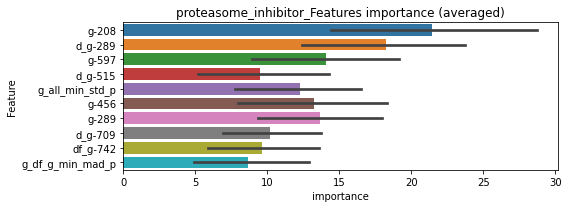

len(train_index) : 1804
len(valid_index) : 602
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[86]	training's binary_logloss: 0.0054804	valid_1's binary_logloss: 0.0285453


len(train_index) : 1804
len(valid_index) : 602
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1805
len(valid_index) : 601
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.000368097	valid_1's binary_logloss: 0.0045106
Training until validation scores don't improve for 30 rounds


len(train_index) : 1805
len(valid_index) : 601
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[139]	training's binary_logloss: 0.00231295	valid_1's binary_logloss: 0.0131027
Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.013655679481426259


Early stopping, best iteration is:
[207]	training's binary_logloss: 0.00089152	valid_1's binary_logloss: 0.00845452
neg labels: 3289 → selected neg labels: 3285


protein_kinase_inhibitor, len(trt): 48, len(othr): 3285, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00390981	valid_1's binary_logloss: 0.0262653
[600]	training's binary_logloss: 0.000746752	valid_1's binary_logloss: 0.0191467
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000602426	valid_1's binary_logloss: 0.0186492
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.003731	valid_1's binary_logloss: 0.025571
[600]	training's binary_logloss: 0.000730647	valid_1's binary_logloss: 0.0201113
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000582093	valid_1's binary_logloss: 0.0195686
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00416778	valid_1's binary_logloss: 0.0116937
[600]	training's binary_logloss: 0.000784491	valid_1's binary_logloss: 0.0055586
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000598976	valid_1's binary_logloss:

1 / 3 AUC score:1.000
y_Threshold: 0.0047014, Threshold: 0.0141860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.00993, conf_1:0.01844
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0141860
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_2: 0.0341860
threshold: 0.0341860, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00356193	valid_1's binary_logloss: 0.0268118
[600]	training's binary_logloss: 0.000703477	valid_1's binary_logloss: 0.0193862
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000601298	valid_1's binary_logloss: 0.0190067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00370695	valid_1's binary_logloss: 0.0141603
[600]	training's binary_logloss: 0.000720806	valid_1's binary_logloss: 0.00777914
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000558184	valid_1's binary_logloss: 0.00711933
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00392828	valid_1's binary_logloss: 0.0119523
[600]	training's binary_logloss: 0.000740114	valid_1's binary_logloss: 0.00561881
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000567437	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0285692, Threshold: 0.0341860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0067805 Vs.target_rate: 0.00202, Num_p_label: 27.0, conf_0:0.02735, conf_1:0.04102
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_1: 0.0341860
Num_p_label: 12.0, Expected: 8.0, Adj_threshold_2: 0.0541860
threshold: 0.0541860, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00346685	valid_1's binary_logloss: 0.0186869
[600]	training's binary_logloss: 0.00069776	valid_1's binary_logloss: 0.0131507
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000601931	valid_1's binary_logloss: 0.0126554
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00374578	valid_1's binary_logloss: 0.0135487
[600]	training's binary_logloss: 0.000728176	valid_1's binary_logloss: 0.00722865
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000590509	valid_1's binary_logloss: 0.0066131
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00371838	valid_1's binary_logloss: 0.0199515
[600]	training's binary_logloss: 0.000718469	valid_1's binary_logloss: 0.0138906
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000602002	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0217948, Threshold: 0.0541860, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0035158 Vs.target_rate: 0.00202, Num_p_label: 14.0, conf_0:0.04877, conf_1:0.05960
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0541860
threshold: 0.0541860, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


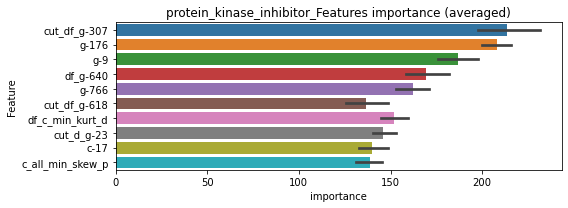

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000555612	valid_1's binary_logloss: 0.010919


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000559126	valid_1's binary_logloss: 0.00938635


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000567815	valid_1's binary_logloss: 0.0126181


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000570265	valid_1's binary_logloss: 0.00500033


protein_kinase_inhibitor logloss: 0.009484851117050299


neg labels: 3289 → selected neg labels: 3286


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3286, target_rate: 0.0010078 → Adj_target_rate: 0.0012513
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0015748	valid_1's binary_logloss: 0.00885772
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000454346	valid_1's binary_logloss: 0.00601071
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00155199	valid_1's binary_logloss: 0.00717551
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000442612	valid_1's binary_logloss: 0.00444335
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00162727	valid_1's binary_logloss: 0.0027996
[600]	training's binary_logloss: 0.000419275	valid_1's binary_logloss: 0.000999885
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000405831	valid_1's binary_logloss: 0.000980457
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016113	valid_1's binary_logloss: 0.00439934


1 / 3 AUC score:1.000
y_Threshold: 0.0021530, Threshold: 0.0073161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101, Num_p_label: 40.0, conf_0:0.00512, conf_1:0.00951
Num_p_label: 40.0, Expected: 4.0, Adj_threshold_1: 0.0073161
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_2: 0.0273161
threshold: 0.0273161, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150481	valid_1's binary_logloss: 0.00756622
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00045396	valid_1's binary_logloss: 0.00558337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145657	valid_1's binary_logloss: 0.00619416
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000434973	valid_1's binary_logloss: 0.00358525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151992	valid_1's binary_logloss: 0.00262268
[600]	training's binary_logloss: 0.000405127	valid_1's binary_logloss: 0.000889316
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000394847	valid_1's binary_logloss: 0.000875171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150809	valid_1's binary_logloss: 0.0048137

2 / 3 AUC score:1.000
y_Threshold: 0.0247184, Threshold: 0.0273161, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00101, Num_p_label: 15.0, conf_0:0.02185, conf_1:0.03278
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_1: 0.0273161
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0473161
threshold: 0.0473161, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150481	valid_1's binary_logloss: 0.00756622
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.00045396	valid_1's binary_logloss: 0.00558337
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145657	valid_1's binary_logloss: 0.00619416
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000434973	valid_1's binary_logloss: 0.00358525
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00151992	valid_1's binary_logloss: 0.00262268
[600]	training's binary_logloss: 0.000405127	valid_1's binary_logloss: 0.000889316
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000394847	valid_1's binary_logloss: 0.000875171
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00150809	valid_1's binary_logloss: 0.0048137

3 / 3 AUC score:1.000
y_Threshold: 0.0247184, Threshold: 0.0473161, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.000399947	valid_1's binary_logloss: 0.00248387
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000410644	valid_1's binary_logloss: 0.0024694


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00101, Num_p_label: 5.0, conf_0:0.04258, conf_1:0.05205
threshold: 0.0473161, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


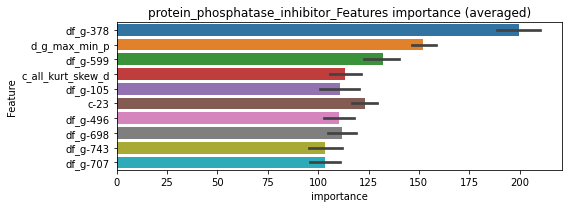

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000408666	valid_1's binary_logloss: 0.00475351
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000406686	valid_1's binary_logloss: 0.00299269
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000403441	valid_1's binary_logloss: 0.000854582


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.0026463659112213682


Early stopping, best iteration is:
[610]	training's binary_logloss: 0.00039747	valid_1's binary_logloss: 0.00197759
neg labels: 3289 → selected neg labels: 3278


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3278, target_rate: 0.0043252 → Adj_target_rate: 0.0043163
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.01099	valid_1's binary_logloss: 0.0795784
[600]	training's binary_logloss: 0.0017153	valid_1's binary_logloss: 0.0648451
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.0011688	valid_1's binary_logloss: 0.0635037
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0113127	valid_1's binary_logloss: 0.0673124
[600]	training's binary_logloss: 0.00175488	valid_1's binary_logloss: 0.0497792
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.00107707	valid_1's binary_logloss: 0.0481029
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0133606	valid_1's binary_logloss: 0.0635502
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00221005	valid_1's binary_logloss: 0.0482491
Training until validation scores don't improve for 30 rounds
[300]	training's b

1 / 3 AUC score:0.996
y_Threshold: 0.0137417, Threshold: 0.0701569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 645/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00433, Num_p_label: 40.0, conf_0:0.04911, conf_1:0.09120
Num_p_label: 40.0, Expected: 17.2, Adj_threshold_1: 0.0701569
Num_p_label: 33.0, Expected: 17.2, Adj_threshold_2: 0.0901569
Num_p_label: 30.0, Expected: 17.2, Adj_threshold_3: 0.1101569
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_4: 0.1301569
threshold: 0.1301569, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103156	valid_1's binary_logloss: 0.0698194
[600]	training's binary_logloss: 0.00159781	valid_1's binary_logloss: 0.0535355
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.0011891	valid_1's binary_logloss: 0.0525713
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0101019	valid_1's binary_logloss: 0.0734439
[600]	training's binary_logloss: 0.00159995	valid_1's binary_logloss: 0.0609196
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00171821	valid_1's binary_logloss: 0.0604638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011086	valid_1's binary_logloss: 0.0473561
[600]	training's binary_logloss: 0.0016782	valid_1's binary_logloss: 0.027713
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00096682	valid_1's binary_logloss: 0.0255458

2 / 3 AUC score:0.998
y_Threshold: 0.0371977, Threshold: 0.1301569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 632.0/3755
p_label_rate: 0.0090407 Vs.target_rate: 0.00433, Num_p_label: 36.0, conf_0:0.10413, conf_1:0.15619
Num_p_label: 36.0, Expected: 17.2, Adj_threshold_1: 0.1301569
Num_p_label: 32.0, Expected: 17.2, Adj_threshold_2: 0.1501569
Num_p_label: 27.0, Expected: 17.2, Adj_threshold_3: 0.1701569
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_4: 0.1901569
threshold: 0.1901569, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 632.0/3755, y_label_rate: 0.1683089
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00915992	valid_1's binary_logloss: 0.068052
[600]	training's binary_logloss: 0.00148217	valid_1's binary_logloss: 0.0554206
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00140292	valid_1's binary_logloss: 0.0551709
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0092809	valid_1's binary_logloss: 0.06012
[600]	training's binary_logloss: 0.00149605	valid_1's binary_logloss: 0.0459757
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00133236	valid_1's binary_logloss: 0.0450314
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00983658	valid_1's binary_logloss: 0.0448215
[600]	training's binary_logloss: 0.00158804	valid_1's binary_logloss: 0.0308718
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.00103795	valid_1's binary_logloss: 0.0297

3 / 3 AUC score:0.998
y_Threshold: 0.0363621, Threshold: 0.1901569, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 621.0/3733
p_label_rate: 0.0070316 Vs.target_rate: 0.00433, Num_p_label: 28.0, conf_0:0.17114, conf_1:0.20917
Num_p_label: 28.0, Expected: 17.2, Adj_threshold_1: 0.1901569
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_2: 0.2101569
threshold: 0.2101569, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 621.0/3733, y_label_rate: 0.1663541


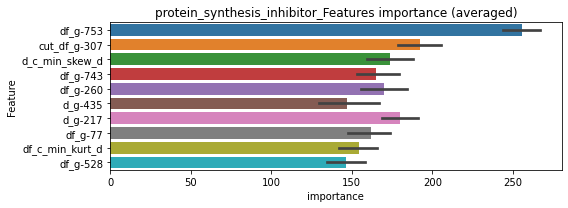

len(train_index) : 2799
len(valid_index) : 934
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000786778	valid_1's binary_logloss: 0.0295887


len(train_index) : 2800
len(valid_index) : 933
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0014147	valid_1's binary_logloss: 0.0342395


len(train_index) : 2800
len(valid_index) : 933
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000985933	valid_1's binary_logloss: 0.0236669


len(train_index) : 2800
len(valid_index) : 933
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.00133037	valid_1's binary_logloss: 0.0514644


protein_synthesis_inhibitor logloss: 0.03473849608311262


neg labels: 3289 → selected neg labels: 3285


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3285, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00145661	valid_1's binary_logloss: 0.00450816
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000417512	valid_1's binary_logloss: 0.00247266
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139901	valid_1's binary_logloss: 0.00693416
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000388323	valid_1's binary_logloss: 0.00428413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00148754	valid_1's binary_logloss: 0.00244254
[600]	training's binary_logloss: 0.000382279	valid_1's binary_logloss: 0.000752076
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000378123	valid_1's binary_logloss: 0.000744323
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00146506	valid_1's binary_logloss: 0.002668

1 / 3 AUC score:1.000
y_Threshold: 0.0018909, Threshold: 0.0081033, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00567, conf_1:0.01053
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0081033
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0281033
threshold: 0.0281033, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138419	valid_1's binary_logloss: 0.00462814
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000463272	valid_1's binary_logloss: 0.00310855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135729	valid_1's binary_logloss: 0.00748849
[600]	training's binary_logloss: 0.000361745	valid_1's binary_logloss: 0.00432784
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000361745	valid_1's binary_logloss: 0.00432784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138143	valid_1's binary_logloss: 0.00231554
[600]	training's binary_logloss: 0.000368614	valid_1's binary_logloss: 0.000711686
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000359221	valid_1's binary_logloss: 0.000695313
Training until validation scores don't improve for 30 rou

2 / 3 AUC score:1.000
y_Threshold: 0.0278562, Threshold: 0.0281033, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0070316 Vs.target_rate: 0.00080, Num_p_label: 28.0, conf_0:0.02248, conf_1:0.03372
Num_p_label: 28.0, Expected: 3.2, Adj_threshold_1: 0.0281033
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_2: 0.0481033
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.0681033
threshold: 0.0681033, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138419	valid_1's binary_logloss: 0.00462814
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000463272	valid_1's binary_logloss: 0.00310855
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00135729	valid_1's binary_logloss: 0.00748849
[600]	training's binary_logloss: 0.000361745	valid_1's binary_logloss: 0.00432784
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000361745	valid_1's binary_logloss: 0.00432784
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00138143	valid_1's binary_logloss: 0.00231554
[600]	training's binary_logloss: 0.000368614	valid_1's binary_logloss: 0.000711686
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000359221	valid_1's binary_logloss: 0.000695313
Training until validation scores don't improve for 30 rou

3 / 3 AUC score:1.000
y_Threshold: 0.0278562, Threshold: 0.0681033, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00080, Num_p_label: 5.0, conf_0:0.06129, conf_1:0.07491
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_1: 0.0681033
threshold: 0.0681033, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


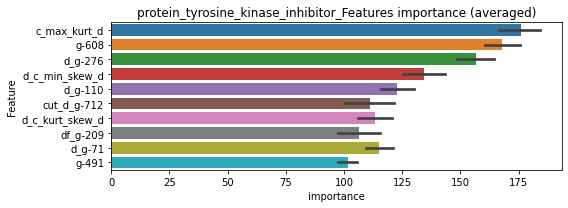

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000374356	valid_1's binary_logloss: 0.00251467
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000361807	valid_1's binary_logloss: 0.00441397
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00037193	valid_1's binary_logloss: 0.000712248
Training until validation scores don't improve for 30 rounds


protein_tyrosine_kinase_inhibitor logloss: 0.0021008994561705456


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00036839	valid_1's binary_logloss: 0.000757192
neg labels: 3289 → selected neg labels: 3283


radiopaque_medium, len(trt): 56, len(othr): 3283, target_rate: 0.0023516 → Adj_target_rate: 0.0025713
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488558	valid_1's binary_logloss: 0.0349244
[600]	training's binary_logloss: 0.000884616	valid_1's binary_logloss: 0.024789
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000659086	valid_1's binary_logloss: 0.0237248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535938	valid_1's binary_logloss: 0.0188399
[600]	training's binary_logloss: 0.000933051	valid_1's binary_logloss: 0.0089166
Early stopping, best iteration is:
[774]	training's binary_logloss: 0.000673982	valid_1's binary_logloss: 0.00807528
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00556304	valid_1's binary_logloss: 0.014861
[600]	training's binary_logloss: 0.000975596	valid_1's binary_logloss: 0.00702887
Early stopping, best iteration is:
[742]	training's binary_logloss: 0.000713961	valid_1's binary_loglo

1 / 3 AUC score:1.000
y_Threshold: 0.0052982, Threshold: 0.0154796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00235, Num_p_label: 40.0, conf_0:0.01084, conf_1:0.02012
Num_p_label: 40.0, Expected: 9.4, Adj_threshold_1: 0.0154796
Num_p_label: 10.0, Expected: 9.4, Adj_threshold_2: 0.0354796
threshold: 0.0354796, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00470137	valid_1's binary_logloss: 0.0313321
[600]	training's binary_logloss: 0.000868011	valid_1's binary_logloss: 0.0223414
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000684522	valid_1's binary_logloss: 0.021807
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00501336	valid_1's binary_logloss: 0.018058
[600]	training's binary_logloss: 0.00090115	valid_1's binary_logloss: 0.00835468
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000649921	valid_1's binary_logloss: 0.00751702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00529282	valid_1's binary_logloss: 0.0152824
[600]	training's binary_logloss: 0.000944841	valid_1's binary_logloss: 0.00694506
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000684396	valid_1's binary_loglo

2 / 3 AUC score:1.000
y_Threshold: 0.0223138, Threshold: 0.0354796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0080362 Vs.target_rate: 0.00235, Num_p_label: 32.0, conf_0:0.02838, conf_1:0.04258
Num_p_label: 32.0, Expected: 9.4, Adj_threshold_1: 0.0354796
Num_p_label: 15.0, Expected: 9.4, Adj_threshold_2: 0.0554796
threshold: 0.0554796, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00499163	valid_1's binary_logloss: 0.0277412
[600]	training's binary_logloss: 0.000895935	valid_1's binary_logloss: 0.0168913
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00062122	valid_1's binary_logloss: 0.016157
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00488049	valid_1's binary_logloss: 0.0246945
[600]	training's binary_logloss: 0.00089072	valid_1's binary_logloss: 0.0151274
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000625307	valid_1's binary_logloss: 0.0141471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510578	valid_1's binary_logloss: 0.014318
[600]	training's binary_logloss: 0.000923586	valid_1's binary_logloss: 0.00578523
[900]	training's binary_logloss: 0.000615908	valid_1's binary_logloss: 0.00500122
Early stopping, best it

3 / 3 AUC score:1.000
y_Threshold: 0.0298933, Threshold: 0.0554796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0050226 Vs.target_rate: 0.00235, Num_p_label: 20.0, conf_0:0.04993, conf_1:0.06103
Num_p_label: 20.0, Expected: 9.4, Adj_threshold_1: 0.0554796
threshold: 0.0554796, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


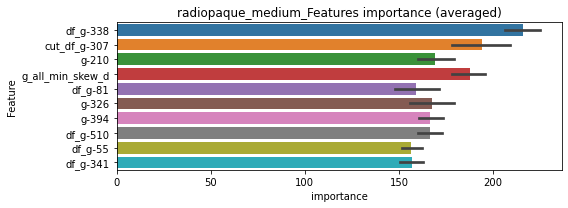

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000718828	valid_1's binary_logloss: 0.0166816


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000660349	valid_1's binary_logloss: 0.0146357


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000629108	valid_1's binary_logloss: 0.00480857


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00070251	valid_1's binary_logloss: 0.00722594


radiopaque_medium logloss: 0.010839713980029258


neg labels: 3289 → selected neg labels: 3266


raf_inhibitor, len(trt): 223, len(othr): 3266, target_rate: 0.0093642 → Adj_target_rate: 0.0083226
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0374953	valid_1's binary_logloss: 0.206477
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.0135776	valid_1's binary_logloss: 0.19622
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0372689	valid_1's binary_logloss: 0.194349
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.0129227	valid_1's binary_logloss: 0.178483
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0363108	valid_1's binary_logloss: 0.203883
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.0107739	valid_1's binary_logloss: 0.195638
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0353491	valid_1's binary_logloss: 0.211044


1 / 3 AUC score:0.937


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.0189429	valid_1's binary_logloss: 0.204269


y_Threshold: 0.0619330, Threshold: 0.3576615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 325 → Positive_corect_labels: 556/3594
p_label_rate: 0.0100452 Vs.target_rate: 0.00936, Num_p_label: 40.0, conf_0:0.25036, conf_1:0.46496
threshold: 0.3576615, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 556.0/3594, y_label_rate: 0.1547023
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0208848	valid_1's binary_logloss: 0.14509
[600]	training's binary_logloss: 0.00313634	valid_1's binary_logloss: 0.134074
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00333581	valid_1's binary_logloss: 0.132943
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0205647	valid_1's binary_logloss: 0.124797
[600]	training's binary_logloss: 0.00318909	valid_1's binary_logloss: 0.0989872
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.00215148	valid_1's binary_logloss: 0.0966201
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0209754	valid_1's binary_logloss: 0.10597
[600]	training's binary_logloss: 0.00318114	valid_1's binary_logloss: 0.0789953
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.00163741	valid_1's binary_logloss: 0.0735692
Tr

2 / 3 AUC score:0.994
y_Threshold: 0.0600683, Threshold: 0.3576615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 520.0/3522
p_label_rate: 0.0311401 Vs.target_rate: 0.00936, Num_p_label: 124.0, conf_0:0.28613, conf_1:0.42919
Num_p_label: 124.0, Expected: 37.3, Adj_threshold_1: 0.3576615
Num_p_label: 118.0, Expected: 37.3, Adj_threshold_2: 0.3776615
Num_p_label: 115.0, Expected: 37.3, Adj_threshold_3: 0.3976615
Num_p_label: 109.0, Expected: 37.3, Adj_threshold_4: 0.4176615
Num_p_label: 102.0, Expected: 37.3, Adj_threshold_5: 0.4376615
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_6: 0.4576615
Num_p_label: 94.0, Expected: 37.3, Adj_threshold_7: 0.4776615
Num_p_label: 91.0, Expected: 37.3, Adj_threshold_8: 0.4976615
Num_p_label: 87.0, Expected: 37.3, Adj_threshold_9: 0.5176615
Num_p_label: 83.0, Expected: 37.3, Adj_threshold_10: 0.5376615
threshold: 0.5576615, positive_p_label: 78.0/3982, p_label_rate: 0.0195881
positive_y_label: 520.0/3522, y_label_rate: 0.1

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0156302	valid_1's binary_logloss: 0.130858
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.00454446	valid_1's binary_logloss: 0.120797
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168147	valid_1's binary_logloss: 0.104393
[600]	training's binary_logloss: 0.00264044	valid_1's binary_logloss: 0.0858472
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00202475	valid_1's binary_logloss: 0.0844472
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160039	valid_1's binary_logloss: 0.0980954
[600]	training's binary_logloss: 0.00258013	valid_1's binary_logloss: 0.069066
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.00139698	valid_1's binary_logloss: 0.0632225
Training until validation scores don't improve for 30 rounds
[300]	training's b

3 / 3 AUC score:0.988
y_Threshold: 0.0691140, Threshold: 0.5576615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 492.0/3466
p_label_rate: 0.0263687 Vs.target_rate: 0.00936, Num_p_label: 105.0, conf_0:0.50000, conf_1:0.61343
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_1: 0.5576615
Num_p_label: 102.0, Expected: 37.3, Adj_threshold_2: 0.5776615
Num_p_label: 100.0, Expected: 37.3, Adj_threshold_3: 0.5976615
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_4: 0.6176615
Num_p_label: 93.0, Expected: 37.3, Adj_threshold_5: 0.6376615
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_6: 0.6576615
Num_p_label: 84.0, Expected: 37.3, Adj_threshold_7: 0.6776615
Num_p_label: 81.0, Expected: 37.3, Adj_threshold_8: 0.6976615
Num_p_label: 71.0, Expected: 37.3, Adj_threshold_9: 0.7176615
Num_p_label: 62.0, Expected: 37.3, Adj_threshold_10: 0.7376615
threshold: 0.7576615, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 492.0/3466, y_label_rate: 0.141

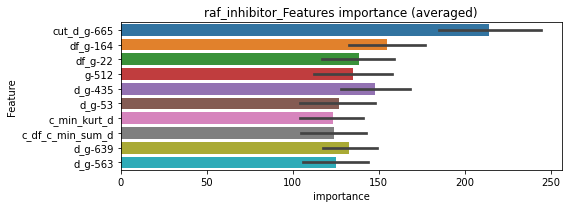

len(train_index) : 2599
len(valid_index) : 867
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00139856	valid_1's binary_logloss: 0.0564263


len(train_index) : 2599
len(valid_index) : 867
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.00116509	valid_1's binary_logloss: 0.0542698


len(train_index) : 2600
len(valid_index) : 866
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00324677	valid_1's binary_logloss: 0.108399


len(train_index) : 2600
len(valid_index) : 866
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.0023013	valid_1's binary_logloss: 0.0978632


raf_inhibitor logloss: 0.07922582249576474


neg labels: 3289 → selected neg labels: 3289


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000751961	valid_1's binary_logloss: 0.00255765
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000295978	valid_1's binary_logloss: 0.00163141
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00074837	valid_1's binary_logloss: 0.00245406
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000320031	valid_1's binary_logloss: 0.0015882
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000750559	valid_1's binary_logloss: 0.0018454
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000286998	valid_1's binary_logloss: 0.00120056
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765877	valid_1's binary_logloss: 0.00222843


1 / 3 AUC score:1.000
y_Threshold: 0.0013024, Threshold: 0.0210192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.01471, conf_1:0.02732
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0210192
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_2: 0.0410192
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_3: 0.0610192
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_4: 0.0810192


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000298428	valid_1's binary_logloss: 0.00136629


Num_p_label: 17.0, Expected: 2.0, Adj_threshold_5: 0.1010192
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.1210192
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.1410192
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.1610192
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_9: 0.1810192
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_10: 0.2010192
threshold: 0.2210192, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661202	valid_1's binary_logloss: 0.00194061
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000269745	valid_1's binary_logloss: 0.00111473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00065843	valid_1's binary_logloss: 0.0032668
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000274094	valid_1's binary_logloss: 0.00247404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000688634	valid_1's binary_logloss: 0.000761399
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000268656	valid_1's binary_logloss: 0.000300327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670108	valid_1's binary_logloss: 0.00357782


2 / 3 AUC score:1.000
y_Threshold: 0.0666620, Threshold: 0.2210192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00027065	valid_1's binary_logloss: 0.00273344


p_label_rate: 0.0080362 Vs.target_rate: 0.00050, Num_p_label: 32.0, conf_0:0.17682, conf_1:0.26522
Num_p_label: 32.0, Expected: 2.0, Adj_threshold_1: 0.2210192
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_2: 0.2410192
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_3: 0.2610192
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_4: 0.2810192
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_5: 0.3010192
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_6: 0.3210192
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_7: 0.3410192
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.3610192
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_9: 0.3810192
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_10: 0.4010192
threshold: 0.4210192, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000661202	valid_1's binary_logloss: 0.00194061
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000269745	valid_1's binary_logloss: 0.00111473
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00065843	valid_1's binary_logloss: 0.0032668
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000274094	valid_1's binary_logloss: 0.00247404
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000688634	valid_1's binary_logloss: 0.000761399
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000268656	valid_1's binary_logloss: 0.000300327
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000670108	valid_1's binary_logloss: 0.00357782


3 / 3 AUC score:1.000
y_Threshold: 0.0666620, Threshold: 0.4210192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0067805 Vs.target_rate: 0.00050, Num_p_label: 27.0, conf_0:0.37892, conf_1:0.46312
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_1: 0.4210192
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_2: 0.4410192
Num_p_label: 26.0, Expected: 2.0, Adj_threshold_3: 0.4610192
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_4: 0.4810192
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_5: 0.5010192


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.00027065	valid_1's binary_logloss: 0.00273344


Num_p_label: 24.0, Expected: 2.0, Adj_threshold_6: 0.5210192
Num_p_label: 24.0, Expected: 2.0, Adj_threshold_7: 0.5410192
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_8: 0.5610192
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_9: 0.5810192
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_10: 0.6010192
threshold: 0.6210192, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


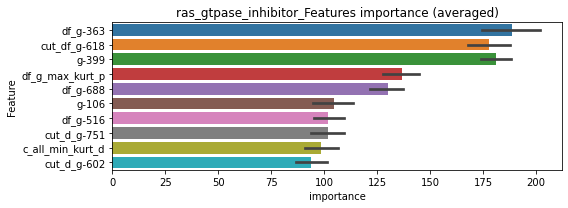

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000270405	valid_1's binary_logloss: 0.00110725
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000304623	valid_1's binary_logloss: 0.00229765
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000271079	valid_1's binary_logloss: 0.000306575
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.001440633144036972


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000268896	valid_1's binary_logloss: 0.00204762
neg labels: 3289 → selected neg labels: 3278


retinoid_receptor_agonist, len(trt): 67, len(othr): 3278, target_rate: 0.0028135 → Adj_target_rate: 0.0029948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00613103	valid_1's binary_logloss: 0.0404372
[600]	training's binary_logloss: 0.00107765	valid_1's binary_logloss: 0.02774
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000689172	valid_1's binary_logloss: 0.0256021
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065085	valid_1's binary_logloss: 0.025748
[600]	training's binary_logloss: 0.00110124	valid_1's binary_logloss: 0.0123769
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000790315	valid_1's binary_logloss: 0.0110185
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0065921	valid_1's binary_logloss: 0.0364827
[600]	training's binary_logloss: 0.00109765	valid_1's binary_logloss: 0.0271831
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000980041	valid_1's binary_logloss: 0.02

1 / 3 AUC score:0.999
y_Threshold: 0.0082885, Threshold: 0.1427269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00281, Num_p_label: 40.0, conf_0:0.09991, conf_1:0.18554
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_1: 0.1427269
Num_p_label: 38.0, Expected: 11.2, Adj_threshold_2: 0.1627269
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_3: 0.1827269
Num_p_label: 35.0, Expected: 11.2, Adj_threshold_4: 0.2027269
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_5: 0.2227269
Num_p_label: 30.0, Expected: 11.2, Adj_threshold_6: 0.2427269
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_7: 0.2627269
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_8: 0.2827269
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_9: 0.3027269
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_10: 0.3227269
threshold: 0.3427269, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 653.0/3797, y_label_rate: 0.1719779


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00582114	valid_1's binary_logloss: 0.0313415
[600]	training's binary_logloss: 0.00103245	valid_1's binary_logloss: 0.0225776
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000859544	valid_1's binary_logloss: 0.0219524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571622	valid_1's binary_logloss: 0.0281305
[600]	training's binary_logloss: 0.00102352	valid_1's binary_logloss: 0.0170228
Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000707113	valid_1's binary_logloss: 0.0153874
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00525152	valid_1's binary_logloss: 0.0348574
[600]	training's binary_logloss: 0.000980412	valid_1's binary_logloss: 0.0247109
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000672692	valid_1's binary_logloss

2 / 3 AUC score:1.000
y_Threshold: 0.0467930, Threshold: 0.3427269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3791
p_label_rate: 0.0105475 Vs.target_rate: 0.00281, Num_p_label: 42.0, conf_0:0.27418, conf_1:0.41127
Num_p_label: 42.0, Expected: 11.2, Adj_threshold_1: 0.3427269
Num_p_label: 40.0, Expected: 11.2, Adj_threshold_2: 0.3627269
Num_p_label: 39.0, Expected: 11.2, Adj_threshold_3: 0.3827269
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_4: 0.4027269
Num_p_label: 36.0, Expected: 11.2, Adj_threshold_5: 0.4227269
Num_p_label: 34.0, Expected: 11.2, Adj_threshold_6: 0.4427269
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_7: 0.4627269
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_8: 0.4827269
Num_p_label: 32.0, Expected: 11.2, Adj_threshold_9: 0.5027269
Num_p_label: 29.0, Expected: 11.2, Adj_threshold_10: 0.5227269
threshold: 0.5427269, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 650.0/3791, y_label_rate: 0.1714587


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00545431	valid_1's binary_logloss: 0.0257783
[600]	training's binary_logloss: 0.000994115	valid_1's binary_logloss: 0.0145368
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000677221	valid_1's binary_logloss: 0.0131133
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00558276	valid_1's binary_logloss: 0.0338524
[600]	training's binary_logloss: 0.000994334	valid_1's binary_logloss: 0.0204625
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000714615	valid_1's binary_logloss: 0.0186688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00571548	valid_1's binary_logloss: 0.0285826
[600]	training's binary_logloss: 0.00101151	valid_1's binary_logloss: 0.0162154
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000691924	valid_1's binary_loglos

3 / 3 AUC score:1.000
y_Threshold: 0.0443201, Threshold: 0.5427269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3787
p_label_rate: 0.0067805 Vs.target_rate: 0.00281, Num_p_label: 27.0, conf_0:0.48845, conf_1:0.59700
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_1: 0.5427269
Num_p_label: 25.0, Expected: 11.2, Adj_threshold_2: 0.5627269
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_3: 0.5827269
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_4: 0.6027269
Num_p_label: 23.0, Expected: 11.2, Adj_threshold_5: 0.6227269
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_6: 0.6427269
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_7: 0.6627269
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_8: 0.6827269
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_9: 0.7027269
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_10: 0.7227269
threshold: 0.7427269, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3787, y_label_rate: 0.1711117


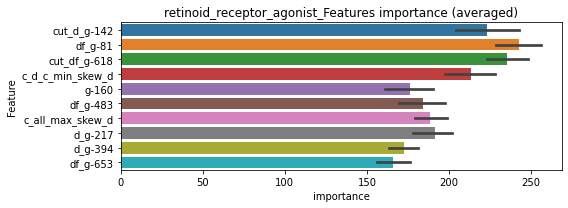

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000733453	valid_1's binary_logloss: 0.0127031


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[784]	training's binary_logloss: 0.000680732	valid_1's binary_logloss: 0.0120329


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000728374	valid_1's binary_logloss: 0.0176162


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000939544	valid_1's binary_logloss: 0.0183848


retinoid_receptor_agonist logloss: 0.015183404915881006


neg labels: 3289 → selected neg labels: 3288


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3288, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386086	valid_1's binary_logloss: 0.000733507
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000192191	valid_1's binary_logloss: 0.000430939
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000386432	valid_1's binary_logloss: 0.00095233
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000194517	valid_1's binary_logloss: 0.000595774
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000387953	valid_1's binary_logloss: 0.000489414
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000191392	valid_1's binary_logloss: 0.000255723
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000390412	valid_1's binary_logloss: 0.000447935


1 / 3 AUC score:1.000
y_Threshold: 0.0006077, Threshold: 0.0023713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00166, conf_1:0.00308
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0023713
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0223713
threshold: 0.0223713, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000198815	valid_1's binary_logloss: 0.000244051


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365462	valid_1's binary_logloss: 0.000477216
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000177418	valid_1's binary_logloss: 0.000249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362063	valid_1's binary_logloss: 0.000592323
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000178521	valid_1's binary_logloss: 0.000331986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000366118	valid_1's binary_logloss: 0.000405086
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000178345	valid_1's binary_logloss: 0.000200749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364547	valid_1's binary_logloss: 0.000405026


2 / 3 AUC score:1.000
y_Threshold: 0.1611436, Threshold: 0.0223713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0040181 Vs.target_rate: 0.00025, Num_p_label: 16.0, conf_0:0.01790, conf_1:0.02685
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_1: 0.0223713
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0423713
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.0623713


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00017975	valid_1's binary_logloss: 0.000203679


threshold: 0.0623713, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000365462	valid_1's binary_logloss: 0.000477216
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000177418	valid_1's binary_logloss: 0.000249
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000362063	valid_1's binary_logloss: 0.000592323
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000178521	valid_1's binary_logloss: 0.000331986
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000366118	valid_1's binary_logloss: 0.000405086
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000178345	valid_1's binary_logloss: 0.000200749
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000364547	valid_1's binary_logloss: 0.000405026


3 / 3 AUC score:1.000
y_Threshold: 0.1611436, Threshold: 0.0623713, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025, Num_p_label: 1.0, conf_0:0.05613, conf_1:0.06861
threshold: 0.0623713, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00017975	valid_1's binary_logloss: 0.000203679


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


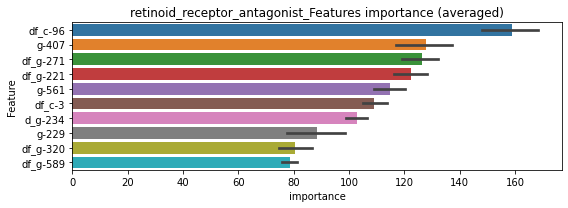

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000179327	valid_1's binary_logloss: 0.000266585
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000180722	valid_1's binary_logloss: 0.000433909
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000182068	valid_1's binary_logloss: 0.000204687
Training until validation scores don't improve for 30 rounds


retinoid_receptor_antagonist logloss: 0.0002775055696797703


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000180625	valid_1's binary_logloss: 0.000204853
neg labels: 3289 → selected neg labels: 3283


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3283, target_rate: 0.0014697 → Adj_target_rate: 0.0017245
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00271817	valid_1's binary_logloss: 0.0113506
[600]	training's binary_logloss: 0.000577449	valid_1's binary_logloss: 0.00536466
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000501949	valid_1's binary_logloss: 0.00508259
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027342	valid_1's binary_logloss: 0.00878374
[600]	training's binary_logloss: 0.000581881	valid_1's binary_logloss: 0.00358963
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000490948	valid_1's binary_logloss: 0.0032727
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00296073	valid_1's binary_logloss: 0.00553521
[600]	training's binary_logloss: 0.0006025	valid_1's binary_logloss: 0.00160644
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000493837	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0044150, Threshold: 0.0135828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00147, Num_p_label: 40.0, conf_0:0.00951, conf_1:0.01766
Num_p_label: 40.0, Expected: 5.9, Adj_threshold_1: 0.0135828
Num_p_label: 11.0, Expected: 5.9, Adj_threshold_2: 0.0335828
threshold: 0.0335828, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243609	valid_1's binary_logloss: 0.00948835
[600]	training's binary_logloss: 0.000526409	valid_1's binary_logloss: 0.00433994
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00046673	valid_1's binary_logloss: 0.00411424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253004	valid_1's binary_logloss: 0.00770329
[600]	training's binary_logloss: 0.00054106	valid_1's binary_logloss: 0.00336124
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000468749	valid_1's binary_logloss: 0.00311692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257391	valid_1's binary_logloss: 0.00477924
[600]	training's binary_logloss: 0.000548759	valid_1's binary_logloss: 0.00139845
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000466706	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0438054, Threshold: 0.0335828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0087896 Vs.target_rate: 0.00147, Num_p_label: 35.0, conf_0:0.02687, conf_1:0.04030
Num_p_label: 35.0, Expected: 5.9, Adj_threshold_1: 0.0335828
Num_p_label: 14.0, Expected: 5.9, Adj_threshold_2: 0.0535828
threshold: 0.0535828, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00243609	valid_1's binary_logloss: 0.00948835
[600]	training's binary_logloss: 0.000526409	valid_1's binary_logloss: 0.00433994
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00046673	valid_1's binary_logloss: 0.00411424
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253004	valid_1's binary_logloss: 0.00770329
[600]	training's binary_logloss: 0.00054106	valid_1's binary_logloss: 0.00336124
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000468749	valid_1's binary_logloss: 0.00311692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00257391	valid_1's binary_logloss: 0.00477924
[600]	training's binary_logloss: 0.000548759	valid_1's binary_logloss: 0.00139845
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000466706	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0438054, Threshold: 0.0535828, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00147, Num_p_label: 14.0, conf_0:0.04822, conf_1:0.05894
Num_p_label: 14.0, Expected: 5.9, Adj_threshold_1: 0.0535828
threshold: 0.0535828, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


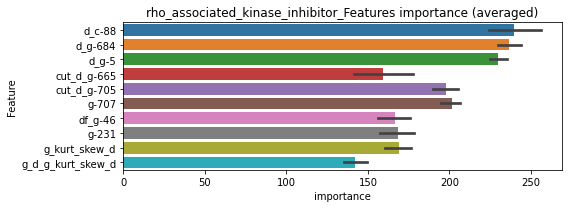

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000469238	valid_1's binary_logloss: 0.00524338


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000482814	valid_1's binary_logloss: 0.00266394


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000470268	valid_1's binary_logloss: 0.00135986


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000459879	valid_1's binary_logloss: 0.0049926


rho_associated_kinase_inhibitor logloss: 0.003565981208984402


neg labels: 3289 → selected neg labels: 3284


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3284, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308306	valid_1's binary_logloss: 0.019639
[600]	training's binary_logloss: 0.000618394	valid_1's binary_logloss: 0.0131914
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000520609	valid_1's binary_logloss: 0.0127654
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318581	valid_1's binary_logloss: 0.00878447
[600]	training's binary_logloss: 0.000630153	valid_1's binary_logloss: 0.00376393
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000533013	valid_1's binary_logloss: 0.00347182
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0031515	valid_1's binary_logloss: 0.00927178
[600]	training's binary_logloss: 0.000622958	valid_1's binary_logloss: 0.00324844
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000533268	valid_1's binary_lo

1 / 3 AUC score:1.000
y_Threshold: 0.0048964, Threshold: 0.0281646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01972, conf_1:0.03661
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0281646
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0481646
threshold: 0.0481646, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275642	valid_1's binary_logloss: 0.020495
[600]	training's binary_logloss: 0.000581447	valid_1's binary_logloss: 0.0146284
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000521958	valid_1's binary_logloss: 0.0142821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00287232	valid_1's binary_logloss: 0.00680937
[600]	training's binary_logloss: 0.000593126	valid_1's binary_logloss: 0.00253888
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000509811	valid_1's binary_logloss: 0.00232479
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00276065	valid_1's binary_logloss: 0.00691751
[600]	training's binary_logloss: 0.00058715	valid_1's binary_logloss: 0.00241976
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000523858	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0295699, Threshold: 0.0481646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0120542 Vs.target_rate: 0.00155, Num_p_label: 48.0, conf_0:0.03853, conf_1:0.05780
Num_p_label: 48.0, Expected: 6.2, Adj_threshold_1: 0.0481646
Num_p_label: 37.0, Expected: 6.2, Adj_threshold_2: 0.0681646
Num_p_label: 27.0, Expected: 6.2, Adj_threshold_3: 0.0881646
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.1081646
Num_p_label: 10.0, Expected: 6.2, Adj_threshold_5: 0.1281646
threshold: 0.1281646, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027595	valid_1's binary_logloss: 0.0140278
[600]	training's binary_logloss: 0.000580632	valid_1's binary_logloss: 0.00839995
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000491148	valid_1's binary_logloss: 0.00804822
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00279805	valid_1's binary_logloss: 0.00728259
[600]	training's binary_logloss: 0.000580205	valid_1's binary_logloss: 0.00282232
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000519546	valid_1's binary_logloss: 0.00270825
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00278911	valid_1's binary_logloss: 0.0111822
[600]	training's binary_logloss: 0.000581491	valid_1's binary_logloss: 0.0056897
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000498356	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0366158, Threshold: 0.1281646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0035158 Vs.target_rate: 0.00155, Num_p_label: 14.0, conf_0:0.11535, conf_1:0.14098
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.1281646
threshold: 0.1281646, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


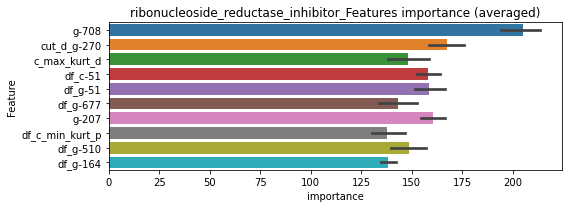

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000504757	valid_1's binary_logloss: 0.0080893


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000502618	valid_1's binary_logloss: 0.00279476


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000516254	valid_1's binary_logloss: 0.00590551


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000501941	valid_1's binary_logloss: 0.00332169


ribonucleoside_reductase_inhibitor logloss: 0.005035027165739567


neg labels: 3289 → selected neg labels: 3284


rna_polymerase_inhibitor, len(trt): 25, len(othr): 3284, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00165646	valid_1's binary_logloss: 0.0044395
[600]	training's binary_logloss: 0.000420695	valid_1's binary_logloss: 0.00197056
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000408028	valid_1's binary_logloss: 0.0019156
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00164932	valid_1's binary_logloss: 0.00394726
[600]	training's binary_logloss: 0.000428611	valid_1's binary_logloss: 0.00150505
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000417454	valid_1's binary_logloss: 0.00148236
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0016684	valid_1's binary_logloss: 0.00479415
[600]	training's binary_logloss: 0.000426395	valid_1's binary_logloss: 0.00217717
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000413544	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0023688, Threshold: 0.0119482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00836, conf_1:0.01553
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0119482
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0319482
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_3: 0.0519482
threshold: 0.0519482, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153095	valid_1's binary_logloss: 0.00421985
[600]	training's binary_logloss: 0.000405134	valid_1's binary_logloss: 0.00188285
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000401097	valid_1's binary_logloss: 0.00188089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154274	valid_1's binary_logloss: 0.00305969
[600]	training's binary_logloss: 0.000409798	valid_1's binary_logloss: 0.00109124
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000404578	valid_1's binary_logloss: 0.00107972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154984	valid_1's binary_logloss: 0.00345449
[600]	training's binary_logloss: 0.000412209	valid_1's binary_logloss: 0.00142607
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00040485	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.1320157, Threshold: 0.0519482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0062783 Vs.target_rate: 0.00105, Num_p_label: 25.0, conf_0:0.04156, conf_1:0.06234
Num_p_label: 25.0, Expected: 4.2, Adj_threshold_1: 0.0519482
Num_p_label: 19.0, Expected: 4.2, Adj_threshold_2: 0.0719482
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_3: 0.0919482
Num_p_label: 14.0, Expected: 4.2, Adj_threshold_4: 0.1119482
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_5: 0.1319482
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_6: 0.1519482
threshold: 0.1519482, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00153095	valid_1's binary_logloss: 0.00421985
[600]	training's binary_logloss: 0.000405134	valid_1's binary_logloss: 0.00188285
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000401097	valid_1's binary_logloss: 0.00188089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154274	valid_1's binary_logloss: 0.00305969
[600]	training's binary_logloss: 0.000409798	valid_1's binary_logloss: 0.00109124
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000404578	valid_1's binary_logloss: 0.00107972
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00154984	valid_1's binary_logloss: 0.00345449
[600]	training's binary_logloss: 0.000412209	valid_1's binary_logloss: 0.00142607
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00040485	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.1320157, Threshold: 0.1519482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.13675, conf_1:0.16714
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.1519482
threshold: 0.1519482, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


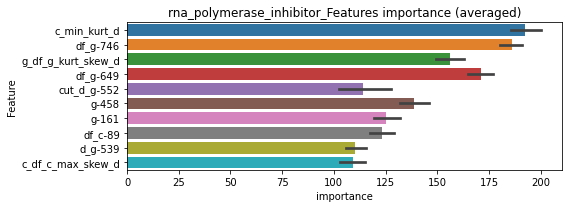

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000401706	valid_1's binary_logloss: 0.00198322


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000410851	valid_1's binary_logloss: 0.00123693


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000408536	valid_1's binary_logloss: 0.0016865


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000410867	valid_1's binary_logloss: 0.00143809


rna_polymerase_inhibitor logloss: 0.001586919417847176


neg labels: 3289 → selected neg labels: 3249


serotonin_receptor_agonist, len(trt): 236, len(othr): 3249, target_rate: 0.0099101 → Adj_target_rate: 0.0087332
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0319953	valid_1's binary_logloss: 0.215405
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.018574	valid_1's binary_logloss: 0.212046
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0326346	valid_1's binary_logloss: 0.20305
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.0115619	valid_1's binary_logloss: 0.19811
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0343546	valid_1's binary_logloss: 0.181628
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.0116807	valid_1's binary_logloss: 0.168641
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0337489	valid_1's binary_logloss: 0.199816
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.0225003	valid_1's binary_logloss: 0.19

1 / 3 AUC score:0.940
y_Threshold: 0.0578115, Threshold: 0.3648793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 325 → Positive_corect_labels: 552/3573
p_label_rate: 0.0100452 Vs.target_rate: 0.00991, Num_p_label: 40.0, conf_0:0.25542, conf_1:0.47434
threshold: 0.3648793, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 552.0/3573, y_label_rate: 0.1544920
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173559	valid_1's binary_logloss: 0.130441
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00914947	valid_1's binary_logloss: 0.125702
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0169542	valid_1's binary_logloss: 0.115951
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00466954	valid_1's binary_logloss: 0.104813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0160071	valid_1's binary_logloss: 0.142665
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00339453	valid_1's binary_logloss: 0.130516
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0174959	valid_1's binary_logloss: 0.108094
[600]	training's binary_logloss: 0.00300449	valid_1's binary_logloss: 0.089533
Early stopping, best it

2 / 3 AUC score:0.991
y_Threshold: 0.0555121, Threshold: 0.3648793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 512.0/3493
p_label_rate: 0.0178302 Vs.target_rate: 0.00991, Num_p_label: 71.0, conf_0:0.29190, conf_1:0.43786
Num_p_label: 71.0, Expected: 39.5, Adj_threshold_1: 0.3648793
Num_p_label: 67.0, Expected: 39.5, Adj_threshold_2: 0.3848793
Num_p_label: 66.0, Expected: 39.5, Adj_threshold_3: 0.4048793
Num_p_label: 65.0, Expected: 39.5, Adj_threshold_4: 0.4248793
Num_p_label: 60.0, Expected: 39.5, Adj_threshold_5: 0.4448793
Num_p_label: 59.0, Expected: 39.5, Adj_threshold_6: 0.4648793
threshold: 0.4648793, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 512.0/3493, y_label_rate: 0.1465789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132152	valid_1's binary_logloss: 0.10275
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00256931	valid_1's binary_logloss: 0.0917971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0136674	valid_1's binary_logloss: 0.0955065
[600]	training's binary_logloss: 0.0022614	valid_1's binary_logloss: 0.0797387
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00242531	valid_1's binary_logloss: 0.0792422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128573	valid_1's binary_logloss: 0.0926895
[600]	training's binary_logloss: 0.00223435	valid_1's binary_logloss: 0.0804512
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.00241697	valid_1's binary_logloss: 0.0801985
Training until validation scores don't improve for 30 rounds
[300]	training's 

3 / 3 AUC score:0.997
y_Threshold: 0.0522529, Threshold: 0.4648793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 491.0/3451
p_label_rate: 0.0175791 Vs.target_rate: 0.00991, Num_p_label: 70.0, conf_0:0.41839, conf_1:0.51137
Num_p_label: 70.0, Expected: 39.5, Adj_threshold_1: 0.4648793
Num_p_label: 67.0, Expected: 39.5, Adj_threshold_2: 0.4848793
Num_p_label: 66.0, Expected: 39.5, Adj_threshold_3: 0.5048793
Num_p_label: 62.0, Expected: 39.5, Adj_threshold_4: 0.5248793
Num_p_label: 60.0, Expected: 39.5, Adj_threshold_5: 0.5448793
Num_p_label: 54.0, Expected: 39.5, Adj_threshold_6: 0.5648793
threshold: 0.5648793, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 491.0/3451, y_label_rate: 0.1422776


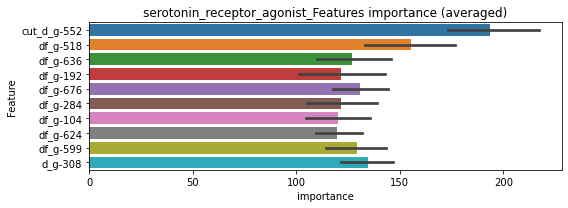

len(train_index) : 2588
len(valid_index) : 863
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.00137108	valid_1's binary_logloss: 0.0734459


len(train_index) : 2588
len(valid_index) : 863
================================= fold 2/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.00188265	valid_1's binary_logloss: 0.0667091


len(train_index) : 2588
len(valid_index) : 863
================================= fold 3/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00132373	valid_1's binary_logloss: 0.0770248


len(train_index) : 2589
len(valid_index) : 862
================================= fold 4/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.08382690758310755


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00676824	valid_1's binary_logloss: 0.118168
neg labels: 3289 → selected neg labels: 3239


serotonin_receptor_antagonist, len(trt): 404, len(othr): 3239, target_rate: 0.0169648 → Adj_target_rate: 0.0137918
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0744194	valid_1's binary_logloss: 0.345321
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0635129	valid_1's binary_logloss: 0.342368
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0564352	valid_1's binary_logloss: 0.340813
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0658196	valid_1's binary_logloss: 0.328275
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0695969	valid_1's binary_logloss: 0.327413
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0652338	valid_1's binary_logloss: 0.334261


1 / 3 AUC score:0.809
y_Threshold: 0.1375301, Threshold: 0.5102619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 621 → Positive_corect_labels: 402/3265
p_label_rate: 0.0100452 Vs.target_rate: 0.01696, Num_p_label: 40.0, conf_0:0.35718, conf_1:0.66334
Num_p_label: 40.0, Expected: 67.6, Adj_threshold_1: 0.5102619
Num_p_label: 45.0, Expected: 67.6, Adj_threshold_2: 0.4902619
Num_p_label: 53.0, Expected: 67.6, Adj_threshold_3: 0.4702619
threshold: 0.4702619, positive_p_label: 53.0/3982, p_label_rate: 0.0133099


Early stopping, best iteration is:
[297]	training's binary_logloss: 0.0663455	valid_1's binary_logloss: 0.333948


positive_y_label: 402.0/3265, y_label_rate: 0.1231240
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201289	valid_1's binary_logloss: 0.193277
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.0125573	valid_1's binary_logloss: 0.190557
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207102	valid_1's binary_logloss: 0.178568
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00852876	valid_1's binary_logloss: 0.174951
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0196848	valid_1's binary_logloss: 0.193385
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.0165963	valid_1's binary_logloss: 0.191281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210794	valid_1's binary_logloss: 0.167335


2 / 3 AUC score:0.956
y_Threshold: 0.0793768, Threshold: 0.4702619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 150 → Positive_corect_labels: 327.0/3115
p_label_rate: 0.0283777 Vs.target_rate: 0.01696, Num_p_label: 113.0, conf_0:0.37621, conf_1:0.56431
Num_p_label: 113.0, Expected: 67.6, Adj_threshold_1: 0.4702619


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.0111673	valid_1's binary_logloss: 0.160231


Num_p_label: 110.0, Expected: 67.6, Adj_threshold_2: 0.4902619
Num_p_label: 108.0, Expected: 67.6, Adj_threshold_3: 0.5102619
Num_p_label: 107.0, Expected: 67.6, Adj_threshold_4: 0.5302619
Num_p_label: 100.0, Expected: 67.6, Adj_threshold_5: 0.5502619
threshold: 0.5502619, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 327.0/3115, y_label_rate: 0.1049759
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0123058	valid_1's binary_logloss: 0.145729
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00667674	valid_1's binary_logloss: 0.143889
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0116859	valid_1's binary_logloss: 0.147177
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00716747	valid_1's binary_logloss: 0.144089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0128394	valid_1's binary_logloss: 0.126319
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00732519	valid_1's binary_logloss: 0.118726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0132517	valid_1's binary_logloss: 0.147807


3 / 3 AUC score:0.969
y_Threshold: 0.0681839, Threshold: 0.5502619, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 282.0/3025


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00649085	valid_1's binary_logloss: 0.143879


p_label_rate: 0.0298845 Vs.target_rate: 0.01696, Num_p_label: 119.0, conf_0:0.49524, conf_1:0.60529
Num_p_label: 119.0, Expected: 67.6, Adj_threshold_1: 0.5502619
Num_p_label: 115.0, Expected: 67.6, Adj_threshold_2: 0.5702619
Num_p_label: 110.0, Expected: 67.6, Adj_threshold_3: 0.5902619
Num_p_label: 109.0, Expected: 67.6, Adj_threshold_4: 0.6102619
Num_p_label: 108.0, Expected: 67.6, Adj_threshold_5: 0.6302619
Num_p_label: 104.0, Expected: 67.6, Adj_threshold_6: 0.6502619
Num_p_label: 100.0, Expected: 67.6, Adj_threshold_7: 0.6702619
threshold: 0.6702619, positive_p_label: 100.0/3982, p_label_rate: 0.0251130
positive_y_label: 282.0/3025, y_label_rate: 0.0932231


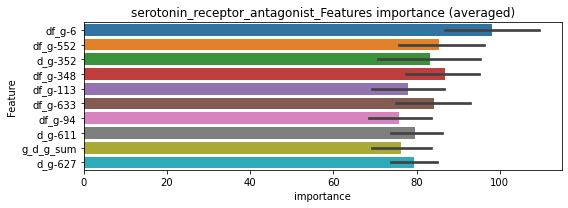

len(train_index) : 2268
len(valid_index) : 757
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2269
len(valid_index) : 756
================================= fold 2/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00616491	valid_1's binary_logloss: 0.10898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00232224	valid_1's binary_logloss: 0.0961949


len(train_index) : 2269
len(valid_index) : 756
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2269
len(valid_index) : 756
================================= fold 4/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00591554	valid_1's binary_logloss: 0.111391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00424218	valid_1's binary_logloss: 0.0957028


serotonin_receptor_antagonist logloss: 0.10306914160701569


neg labels: 3289 → selected neg labels: 3285


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285, target_rate: 0.0018477 → Adj_target_rate: 0.0020948
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00341761	valid_1's binary_logloss: 0.0183573
[600]	training's binary_logloss: 0.000692035	valid_1's binary_logloss: 0.0108334
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000557867	valid_1's binary_logloss: 0.0102057
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00340625	valid_1's binary_logloss: 0.0189635
[600]	training's binary_logloss: 0.000694243	valid_1's binary_logloss: 0.0122011
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000603652	valid_1's binary_logloss: 0.0119491
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00399889	valid_1's binary_logloss: 0.0115842
[600]	training's binary_logloss: 0.000741223	valid_1's binary_logloss: 0.00381528
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000565017	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0051120, Threshold: 0.0276734, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185, Num_p_label: 40.0, conf_0:0.01937, conf_1:0.03598
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_1: 0.0276734
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_2: 0.0476734
Num_p_label: 17.0, Expected: 7.4, Adj_threshold_3: 0.0676734
threshold: 0.0676734, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032133	valid_1's binary_logloss: 0.0174084
[600]	training's binary_logloss: 0.000647828	valid_1's binary_logloss: 0.00987779
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000555313	valid_1's binary_logloss: 0.0093558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325238	valid_1's binary_logloss: 0.0142536
[600]	training's binary_logloss: 0.000669786	valid_1's binary_logloss: 0.00828055
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000612375	valid_1's binary_logloss: 0.00809676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338777	valid_1's binary_logloss: 0.00945325
[600]	training's binary_logloss: 0.000677883	valid_1's binary_logloss: 0.00320246
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000580491	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0852844, Threshold: 0.0676734, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0120542 Vs.target_rate: 0.00185, Num_p_label: 48.0, conf_0:0.05414, conf_1:0.08121
Num_p_label: 48.0, Expected: 7.4, Adj_threshold_1: 0.0676734
Num_p_label: 39.0, Expected: 7.4, Adj_threshold_2: 0.0876734
Num_p_label: 34.0, Expected: 7.4, Adj_threshold_3: 0.1076734
Num_p_label: 29.0, Expected: 7.4, Adj_threshold_4: 0.1276734
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_5: 0.1476734
Num_p_label: 20.0, Expected: 7.4, Adj_threshold_6: 0.1676734
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_7: 0.1876734
threshold: 0.1876734, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0032133	valid_1's binary_logloss: 0.0174084
[600]	training's binary_logloss: 0.000647828	valid_1's binary_logloss: 0.00987779
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000555313	valid_1's binary_logloss: 0.0093558
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325238	valid_1's binary_logloss: 0.0142536
[600]	training's binary_logloss: 0.000669786	valid_1's binary_logloss: 0.00828055
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000612375	valid_1's binary_logloss: 0.00809676
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00338777	valid_1's binary_logloss: 0.00945325
[600]	training's binary_logloss: 0.000677883	valid_1's binary_logloss: 0.00320246
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000580491	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0852844, Threshold: 0.1876734, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00185, Num_p_label: 18.0, conf_0:0.16891, conf_1:0.20644
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_1: 0.1876734
threshold: 0.1876734, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


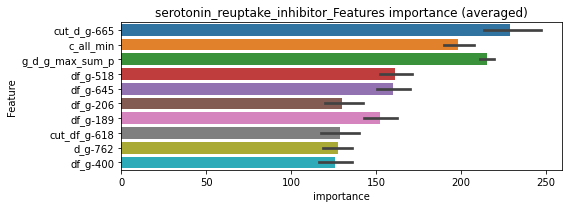

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000534312	valid_1's binary_logloss: 0.00913063


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000571148	valid_1's binary_logloss: 0.00874093


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000568476	valid_1's binary_logloss: 0.00286181


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000575682	valid_1's binary_logloss: 0.00870966


serotonin_reuptake_inhibitor logloss: 0.007364479642940554


neg labels: 3289 → selected neg labels: 3283


sigma_receptor_agonist, len(trt): 36, len(othr): 3283, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231496	valid_1's binary_logloss: 0.0205939
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000697441	valid_1's binary_logloss: 0.0150159
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253176	valid_1's binary_logloss: 0.00961
[600]	training's binary_logloss: 0.000569866	valid_1's binary_logloss: 0.00608994
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000505302	valid_1's binary_logloss: 0.00584104
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00266435	valid_1's binary_logloss: 0.00720049
[600]	training's binary_logloss: 0.000569604	valid_1's binary_logloss: 0.00321194
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000503565	valid_1's binary_logloss: 0.0030234
Training until validation scores don't improve for 30 rounds
[300

1 / 3 AUC score:1.000
y_Threshold: 0.0031191, Threshold: 0.0238552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01670, conf_1:0.03101
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0238552
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.0438552
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_3: 0.0638552
threshold: 0.0638552, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218652	valid_1's binary_logloss: 0.0177793
[600]	training's binary_logloss: 0.000520507	valid_1's binary_logloss: 0.0124298
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000544532	valid_1's binary_logloss: 0.0124031
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237684	valid_1's binary_logloss: 0.00891729
[600]	training's binary_logloss: 0.000538671	valid_1's binary_logloss: 0.00572509
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000487569	valid_1's binary_logloss: 0.00561079
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00241081	valid_1's binary_logloss: 0.00557348
[600]	training's binary_logloss: 0.000540263	valid_1's binary_logloss: 0.00247466
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000503224	valid_1's binary_

2 / 3 AUC score:1.000


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000737415	valid_1's binary_logloss: 0.00799681


y_Threshold: 0.0543869, Threshold: 0.0638552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0130588 Vs.target_rate: 0.00151, Num_p_label: 52.0, conf_0:0.05108, conf_1:0.07663
Num_p_label: 52.0, Expected: 6.0, Adj_threshold_1: 0.0638552
Num_p_label: 44.0, Expected: 6.0, Adj_threshold_2: 0.0838552
Num_p_label: 35.0, Expected: 6.0, Adj_threshold_3: 0.1038552
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_4: 0.1238552
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_5: 0.1438552
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_6: 0.1638552
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.1838552
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_8: 0.2038552
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_9: 0.2238552
threshold: 0.2238552, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021498	valid_1's binary_logloss: 0.0204005
[600]	training's binary_logloss: 0.000505626	valid_1's binary_logloss: 0.016213
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000479763	valid_1's binary_logloss: 0.0160831
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00239659	valid_1's binary_logloss: 0.00903366
[600]	training's binary_logloss: 0.000539077	valid_1's binary_logloss: 0.00410721
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000503191	valid_1's binary_logloss: 0.00389089
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00232175	valid_1's binary_logloss: 0.00801952
[600]	training's binary_logloss: 0.000533106	valid_1's binary_logloss: 0.00432565
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000479159	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0215618, Threshold: 0.2238552, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0047715 Vs.target_rate: 0.00151, Num_p_label: 19.0, conf_0:0.20147, conf_1:0.24624
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.2238552
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_2: 0.2438552
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_3: 0.2638552
threshold: 0.2638552, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3803, y_label_rate: 0.1719695


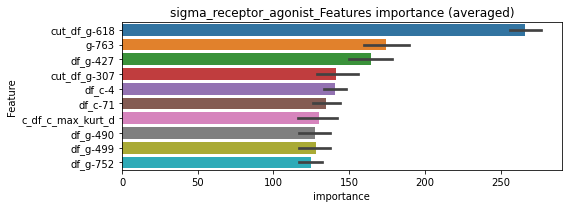

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000497869	valid_1's binary_logloss: 0.00769365


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000493124	valid_1's binary_logloss: 0.00194259


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000474282	valid_1's binary_logloss: 0.00275803


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000511927	valid_1's binary_logloss: 0.0108662


sigma_receptor_agonist logloss: 0.005813922452300444


neg labels: 3289 → selected neg labels: 3285


sigma_receptor_antagonist, len(trt): 36, len(othr): 3285, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00336371	valid_1's binary_logloss: 0.0166479
[600]	training's binary_logloss: 0.000632967	valid_1's binary_logloss: 0.0101323
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000567695	valid_1's binary_logloss: 0.00994794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00328632	valid_1's binary_logloss: 0.0111772
[600]	training's binary_logloss: 0.000625816	valid_1's binary_logloss: 0.00495329
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000509808	valid_1's binary_logloss: 0.00452909
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00345943	valid_1's binary_logloss: 0.00874144
[600]	training's binary_logloss: 0.000658043	valid_1's binary_logloss: 0.00307936
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000508826	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0040706, Threshold: 0.0135827, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.00951, conf_1:0.01766
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0135827
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_2: 0.0335827
threshold: 0.0335827, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301436	valid_1's binary_logloss: 0.0188065
[600]	training's binary_logloss: 0.000594619	valid_1's binary_logloss: 0.0126323
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000563836	valid_1's binary_logloss: 0.0125574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293836	valid_1's binary_logloss: 0.0108721
[600]	training's binary_logloss: 0.000592699	valid_1's binary_logloss: 0.00520489
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000515489	valid_1's binary_logloss: 0.00498925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316107	valid_1's binary_logloss: 0.00708527
[600]	training's binary_logloss: 0.000614251	valid_1's binary_logloss: 0.00235547
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000502686	valid_1's binary_l

2 / 3 AUC score:1.000
y_Threshold: 0.0256419, Threshold: 0.0335827, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0095429 Vs.target_rate: 0.00151, Num_p_label: 38.0, conf_0:0.02687, conf_1:0.04030
Num_p_label: 38.0, Expected: 6.0, Adj_threshold_1: 0.0335827
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_2: 0.0535827
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_3: 0.0735827
threshold: 0.0735827, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00301436	valid_1's binary_logloss: 0.0188065
[600]	training's binary_logloss: 0.000594619	valid_1's binary_logloss: 0.0126323
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000563836	valid_1's binary_logloss: 0.0125574
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00293836	valid_1's binary_logloss: 0.0108721
[600]	training's binary_logloss: 0.000592699	valid_1's binary_logloss: 0.00520489
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000515489	valid_1's binary_logloss: 0.00498925
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00316107	valid_1's binary_logloss: 0.00708527
[600]	training's binary_logloss: 0.000614251	valid_1's binary_logloss: 0.00235547
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000502686	valid_1's binary_l

3 / 3 AUC score:1.000
y_Threshold: 0.0256419, Threshold: 0.0735827, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151, Num_p_label: 12.0, conf_0:0.06622, conf_1:0.08094
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0735827
threshold: 0.0735827, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


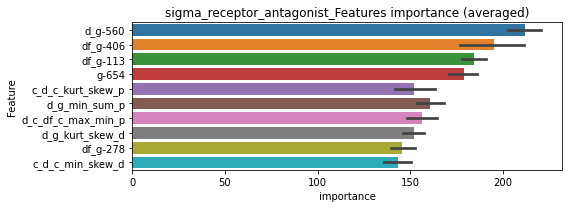

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000519597	valid_1's binary_logloss: 0.0110814


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000496545	valid_1's binary_logloss: 0.0047519


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000517055	valid_1's binary_logloss: 0.00281871


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.000523459	valid_1's binary_logloss: 0.00614965


sigma_receptor_antagonist logloss: 0.0062028612635520826


neg labels: 3289 → selected neg labels: 3285


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00185459	valid_1's binary_logloss: 0.00444542
[600]	training's binary_logloss: 0.000426154	valid_1's binary_logloss: 0.00169142
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.00040168	valid_1's binary_logloss: 0.00163744
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00180141	valid_1's binary_logloss: 0.0101045
[600]	training's binary_logloss: 0.000409085	valid_1's binary_logloss: 0.0064085
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000427805	valid_1's binary_logloss: 0.00635935
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183679	valid_1's binary_logloss: 0.00289697
[600]	training's binary_logloss: 0.000425865	valid_1's binary_logloss: 0.000830149
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00039682	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0025163, Threshold: 0.0074779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00523, conf_1:0.00972
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0074779
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_2: 0.0274779
threshold: 0.0274779, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017111	valid_1's binary_logloss: 0.00371038
[600]	training's binary_logloss: 0.000402144	valid_1's binary_logloss: 0.00120068
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000385022	valid_1's binary_logloss: 0.00117093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167126	valid_1's binary_logloss: 0.00832232
[600]	training's binary_logloss: 0.000396391	valid_1's binary_logloss: 0.00500276
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000404291	valid_1's binary_logloss: 0.00499221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017212	valid_1's binary_logloss: 0.00273533
[600]	training's binary_logloss: 0.000406084	valid_1's binary_logloss: 0.000775578
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000386572	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0281339, Threshold: 0.0274779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0032647 Vs.target_rate: 0.00105, Num_p_label: 13.0, conf_0:0.02198, conf_1:0.03297
Num_p_label: 13.0, Expected: 4.2, Adj_threshold_1: 0.0274779
Num_p_label: 3.0, Expected: 4.2, Adj_threshold_2: 0.0474779
threshold: 0.0474779, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017111	valid_1's binary_logloss: 0.00371038
[600]	training's binary_logloss: 0.000402144	valid_1's binary_logloss: 0.00120068
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000385022	valid_1's binary_logloss: 0.00117093
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00167126	valid_1's binary_logloss: 0.00832232
[600]	training's binary_logloss: 0.000396391	valid_1's binary_logloss: 0.00500276
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000404291	valid_1's binary_logloss: 0.00499221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0017212	valid_1's binary_logloss: 0.00273533
[600]	training's binary_logloss: 0.000406084	valid_1's binary_logloss: 0.000775578
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000386572	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0281339, Threshold: 0.0474779, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00105, Num_p_label: 3.0, conf_0:0.04273, conf_1:0.05223
threshold: 0.0474779, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


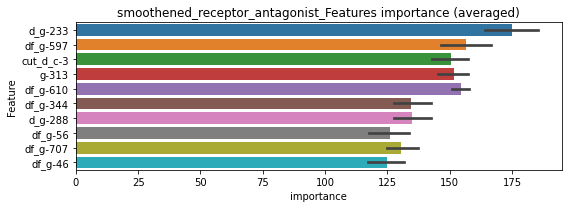

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000388511	valid_1's binary_logloss: 0.00124288


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000396451	valid_1's binary_logloss: 0.00490476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000393378	valid_1's binary_logloss: 0.00076595


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


smoothened_receptor_antagonist logloss: 0.0019521853652369433


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000410244	valid_1's binary_logloss: 0.000892763
neg labels: 3289 → selected neg labels: 3261


sodium_channel_inhibitor, len(trt): 267, len(othr): 3261, target_rate: 0.0112119 → Adj_target_rate: 0.0096991
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.038821	valid_1's binary_logloss: 0.236231
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0329176	valid_1's binary_logloss: 0.234384
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.03968	valid_1's binary_logloss: 0.250882
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.0427496	valid_1's binary_logloss: 0.249865
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0376649	valid_1's binary_logloss: 0.223367
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.0273932	valid_1's binary_logloss: 0.220604
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0390096	valid_1's binary_logloss: 0.215796
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0190796	valid_1's binary_logloss: 0.20

1 / 3 AUC score:0.916
y_Threshold: 0.0885558, Threshold: 0.2133591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 407 → Positive_corect_labels: 514/3506
p_label_rate: 0.0100452 Vs.target_rate: 0.01121, Num_p_label: 40.0, conf_0:0.14935, conf_1:0.27737
threshold: 0.2133591, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 514.0/3506, y_label_rate: 0.1466058
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0168525	valid_1's binary_logloss: 0.12321
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.00328132	valid_1's binary_logloss: 0.112544
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0178977	valid_1's binary_logloss: 0.128749
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00546417	valid_1's binary_logloss: 0.119147
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179472	valid_1's binary_logloss: 0.12598
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00828565	valid_1's binary_logloss: 0.120371
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0176906	valid_1's binary_logloss: 0.125904
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00618177	valid_1's binary_logloss:

2 / 3 AUC score:0.987
y_Threshold: 0.0695523, Threshold: 0.2133591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 464.0/3406
p_label_rate: 0.0155701 Vs.target_rate: 0.01121, Num_p_label: 62.0, conf_0:0.17069, conf_1:0.25603
threshold: 0.2133591, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 464.0/3406, y_label_rate: 0.1362302
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135305	valid_1's binary_logloss: 0.0984823
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00266222	valid_1's binary_logloss: 0.0889122
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140295	valid_1's binary_logloss: 0.0931578
[600]	training's binary_logloss: 0.00234635	valid_1's binary_logloss: 0.0752711
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00251239	valid_1's binary_logloss: 0.0746041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0140812	valid_1's binary_logloss: 0.0939508
[600]	training's binary_logloss: 0.00231338	valid_1's binary_logloss: 0.0818387
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00248709	valid_1's binary_logloss: 0.0814905
Training until validation scores don't improve for 30 rounds
[300]	training

3 / 3 AUC score:0.997
y_Threshold: 0.0681677, Threshold: 0.2133591, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 443.0/3364
p_label_rate: 0.0113009 Vs.target_rate: 0.01121, Num_p_label: 45.0, conf_0:0.19202, conf_1:0.23469
threshold: 0.2133591, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 443.0/3364, y_label_rate: 0.1316885


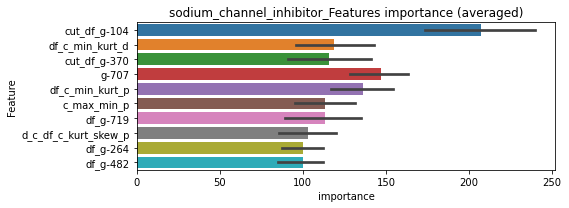

len(train_index) : 2523
len(valid_index) : 841
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00351462	valid_1's binary_logloss: 0.0845728


len(train_index) : 2523
len(valid_index) : 841
================================= fold 2/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.00126839	valid_1's binary_logloss: 0.0618276


len(train_index) : 2523
len(valid_index) : 841
================================= fold 3/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.00197677	valid_1's binary_logloss: 0.0620482


len(train_index) : 2523
len(valid_index) : 841
================================= fold 4/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.00282079	valid_1's binary_logloss: 0.0926696


sodium_channel_inhibitor logloss: 0.07527957324576322


neg labels: 3289 → selected neg labels: 3282


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3282, target_rate: 0.0013437 → Adj_target_rate: 0.0015980
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00223446	valid_1's binary_logloss: 0.0111504
[600]	training's binary_logloss: 0.000497029	valid_1's binary_logloss: 0.00686261
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000466172	valid_1's binary_logloss: 0.00672911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00226016	valid_1's binary_logloss: 0.0105242
[600]	training's binary_logloss: 0.000504763	valid_1's binary_logloss: 0.00766495
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000531466	valid_1's binary_logloss: 0.0075968
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00235756	valid_1's binary_logloss: 0.00726926
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000655397	valid_1's binary_logloss: 0.00460802
Training until validation scores don't improve for 30 rounds
[

1 / 3 AUC score:1.000
y_Threshold: 0.0031233, Threshold: 0.0104868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00134, Num_p_label: 40.0, conf_0:0.00734, conf_1:0.01363
Num_p_label: 40.0, Expected: 5.4, Adj_threshold_1: 0.0104868
Num_p_label: 7.0, Expected: 5.4, Adj_threshold_2: 0.0304868
threshold: 0.0304868, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216476	valid_1's binary_logloss: 0.00985253
[600]	training's binary_logloss: 0.000484462	valid_1's binary_logloss: 0.00553446
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000439306	valid_1's binary_logloss: 0.0053785
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215246	valid_1's binary_logloss: 0.00949124
[600]	training's binary_logloss: 0.000483685	valid_1's binary_logloss: 0.00672839
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00049635	valid_1's binary_logloss: 0.00672148
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00227811	valid_1's binary_logloss: 0.00796918
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000610126	valid_1's binary_logloss: 0.00565056
Training until validation scores don't improve for 30 rounds


2 / 3 AUC score:1.000
y_Threshold: 0.0178295, Threshold: 0.0304868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0065294 Vs.target_rate: 0.00134, Num_p_label: 26.0, conf_0:0.02439, conf_1:0.03658
Num_p_label: 26.0, Expected: 5.4, Adj_threshold_1: 0.0304868
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_2: 0.0504868
threshold: 0.0504868, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00209923	valid_1's binary_logloss: 0.00872318
[600]	training's binary_logloss: 0.000476112	valid_1's binary_logloss: 0.00453219
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000466623	valid_1's binary_logloss: 0.00447983
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00215039	valid_1's binary_logloss: 0.00806268
[600]	training's binary_logloss: 0.000481391	valid_1's binary_logloss: 0.00473554
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000446281	valid_1's binary_logloss: 0.00458559
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0021962	valid_1's binary_logloss: 0.0084582
[600]	training's binary_logloss: 0.00048695	valid_1's binary_logloss: 0.00453035
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000451796	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0503714, Threshold: 0.0504868, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0025113 Vs.target_rate: 0.00134, Num_p_label: 10.0, conf_0:0.04544, conf_1:0.05554
Num_p_label: 10.0, Expected: 5.4, Adj_threshold_1: 0.0504868
threshold: 0.0504868, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


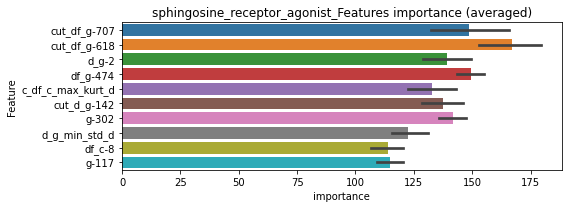

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000444307	valid_1's binary_logloss: 0.00389525


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000484882	valid_1's binary_logloss: 0.00469453


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000442147	valid_1's binary_logloss: 0.0042257


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000450865	valid_1's binary_logloss: 0.00754558


sphingosine_receptor_agonist logloss: 0.005092145222024467


neg labels: 3289 → selected neg labels: 3278


src_inhibitor, len(trt): 71, len(othr): 3278, target_rate: 0.0029814 → Adj_target_rate: 0.0031461
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0059897	valid_1's binary_logloss: 0.037127
[600]	training's binary_logloss: 0.00109803	valid_1's binary_logloss: 0.0284699
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.00119025	valid_1's binary_logloss: 0.0283073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00645616	valid_1's binary_logloss: 0.034763
[600]	training's binary_logloss: 0.00115086	valid_1's binary_logloss: 0.0241325
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000823724	valid_1's binary_logloss: 0.0229575
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0064508	valid_1's binary_logloss: 0.0325639
[600]	training's binary_logloss: 0.0011364	valid_1's binary_logloss: 0.0230941
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00102043	valid_1's binary_logloss: 0.0227

1 / 3 AUC score:0.999
y_Threshold: 0.0084828, Threshold: 0.0335433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00298, Num_p_label: 40.0, conf_0:0.02348, conf_1:0.04361
Num_p_label: 40.0, Expected: 11.9, Adj_threshold_1: 0.0335433
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.0535433
Num_p_label: 13.0, Expected: 11.9, Adj_threshold_3: 0.0735433
threshold: 0.0735433, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0052991	valid_1's binary_logloss: 0.0441099
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00150126	valid_1's binary_logloss: 0.037175
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00599274	valid_1's binary_logloss: 0.0311162
[600]	training's binary_logloss: 0.001079	valid_1's binary_logloss: 0.0227032
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.00112293	valid_1's binary_logloss: 0.0226428
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00583039	valid_1's binary_logloss: 0.0480386
[600]	training's binary_logloss: 0.00106328	valid_1's binary_logloss: 0.040083
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00112559	valid_1's binary_logloss: 0.039909
Training until validation scores don't improve for 30 rounds
[300]	training's 

2 / 3 AUC score:0.999
y_Threshold: 0.0264237, Threshold: 0.0735433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3783
p_label_rate: 0.0125565 Vs.target_rate: 0.00298, Num_p_label: 50.0, conf_0:0.05883, conf_1:0.08825
Num_p_label: 50.0, Expected: 11.9, Adj_threshold_1: 0.0735433
Num_p_label: 39.0, Expected: 11.9, Adj_threshold_2: 0.0935433
Num_p_label: 28.0, Expected: 11.9, Adj_threshold_3: 0.1135433
Num_p_label: 24.0, Expected: 11.9, Adj_threshold_4: 0.1335433
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_5: 0.1535433
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_6: 0.1735433
threshold: 0.1735433, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 646.0/3783, y_label_rate: 0.1707639
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00510858	valid_1's binary_logloss: 0.0521004
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00198666	valid_1's binary_logloss: 0.0482789
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00543597	valid_1's binary_logloss: 0.0425171
[600]	training's binary_logloss: 0.00101401	valid_1's binary_logloss: 0.034923
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00106729	valid_1's binary_logloss: 0.034759
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00560997	valid_1's binary_logloss: 0.0321321
[600]	training's binary_logloss: 0.00104151	valid_1's binary_logloss: 0.0259904
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000855175	valid_1's binary_logloss: 0.0253763
Training until validation scores don't improve for 30 rounds
[300]	traini

3 / 3 AUC score:1.000
y_Threshold: 0.0316138, Threshold: 0.1735433, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0030136 Vs.target_rate: 0.00298, Num_p_label: 12.0, conf_0:0.15619, conf_1:0.19090
threshold: 0.1735433, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 640.0/3771, y_label_rate: 0.1697163


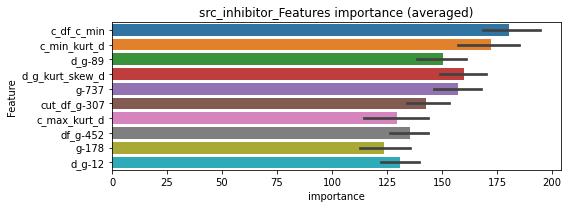

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000999155	valid_1's binary_logloss: 0.024157


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00125059	valid_1's binary_logloss: 0.0326827


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000781891	valid_1's binary_logloss: 0.026212


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.0015615	valid_1's binary_logloss: 0.0225801


src_inhibitor logloss: 0.026408981585449888


neg labels: 3289 → selected neg labels: 3275


steroid, len(trt): 79, len(othr): 3275, target_rate: 0.0033174 → Adj_target_rate: 0.0034449
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00747712	valid_1's binary_logloss: 0.0569603
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00156594	valid_1's binary_logloss: 0.047194
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00770191	valid_1's binary_logloss: 0.0449959
[600]	training's binary_logloss: 0.00131365	valid_1's binary_logloss: 0.0313766
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00103683	valid_1's binary_logloss: 0.030444
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00835119	valid_1's binary_logloss: 0.0439392
[600]	training's binary_logloss: 0.00136453	valid_1's binary_logloss: 0.0298073
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00100872	valid_1's binary_logloss: 0.0291642
Training until validation scores don't improve for 30 rounds
[300]	trainin

1 / 3 AUC score:0.999
y_Threshold: 0.0111081, Threshold: 0.2234592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00332, Num_p_label: 40.0, conf_0:0.15642, conf_1:0.29050
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.2234592
Num_p_label: 39.0, Expected: 13.2, Adj_threshold_2: 0.2434592
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_3: 0.2634592
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_4: 0.2834592
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_5: 0.3034592
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_6: 0.3234592
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_7: 0.3434592
Num_p_label: 29.0, Expected: 13.2, Adj_threshold_8: 0.3634592
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_9: 0.3834592
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_10: 0.4034592
threshold: 0.4234592, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 650.0/3789, y_label_rate: 0.1715492


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00696887	valid_1's binary_logloss: 0.0456609
[600]	training's binary_logloss: 0.00121959	valid_1's binary_logloss: 0.0332113
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000791634	valid_1's binary_logloss: 0.0319063
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0066367	valid_1's binary_logloss: 0.0367558
[600]	training's binary_logloss: 0.00117297	valid_1's binary_logloss: 0.0254478
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00080854	valid_1's binary_logloss: 0.0249649
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00695965	valid_1's binary_logloss: 0.0377012
[600]	training's binary_logloss: 0.00122486	valid_1's binary_logloss: 0.0246524
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000866948	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0394814, Threshold: 0.4234592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0150678 Vs.target_rate: 0.00332, Num_p_label: 60.0, conf_0:0.33877, conf_1:0.50815
Num_p_label: 60.0, Expected: 13.2, Adj_threshold_1: 0.4234592
Num_p_label: 59.0, Expected: 13.2, Adj_threshold_2: 0.4434592
Num_p_label: 59.0, Expected: 13.2, Adj_threshold_3: 0.4634592
Num_p_label: 56.0, Expected: 13.2, Adj_threshold_4: 0.4834592
Num_p_label: 53.0, Expected: 13.2, Adj_threshold_5: 0.5034592
Num_p_label: 48.0, Expected: 13.2, Adj_threshold_6: 0.5234592
Num_p_label: 42.0, Expected: 13.2, Adj_threshold_7: 0.5434592
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_8: 0.5634592
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_9: 0.5834592
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_10: 0.6034592
threshold: 0.6234592, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 644.0/3777, y_label_rate: 0.1705057

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00660893	valid_1's binary_logloss: 0.0325799
[600]	training's binary_logloss: 0.00117112	valid_1's binary_logloss: 0.0200365
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000962302	valid_1's binary_logloss: 0.0190678
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00657778	valid_1's binary_logloss: 0.0329978
[600]	training's binary_logloss: 0.00116325	valid_1's binary_logloss: 0.0202465
[900]	training's binary_logloss: 0.000685734	valid_1's binary_logloss: 0.0185515
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000683503	valid_1's binary_logloss: 0.0185228
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646216	valid_1's binary_logloss: 0.0369055
[600]	training's binary_logloss: 0.0011416	valid_1's binary_logloss: 0.0252998
Early stopping, best iter

3 / 3 AUC score:1.000
y_Threshold: 0.0479239, Threshold: 0.6234592, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3769
p_label_rate: 0.0102963 Vs.target_rate: 0.00332, Num_p_label: 41.0, conf_0:0.50000, conf_1:0.68581
Num_p_label: 41.0, Expected: 13.2, Adj_threshold_1: 0.6234592
Num_p_label: 39.0, Expected: 13.2, Adj_threshold_2: 0.6434592
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_3: 0.6634592
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_4: 0.6834592
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_5: 0.7034592
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_6: 0.7234592
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_7: 0.7434592
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_8: 0.7634592
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_9: 0.7834592
threshold: 0.7834592, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3769, y_label_rate: 0.1698063


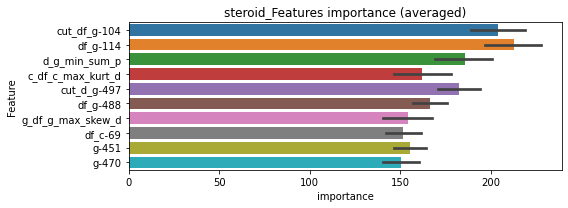

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000793566	valid_1's binary_logloss: 0.0326617


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.0015317	valid_1's binary_logloss: 0.0368387


len(train_index) : 2827
len(valid_index) : 942
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000697119	valid_1's binary_logloss: 0.013299


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000724579	valid_1's binary_logloss: 0.0206402


steroid logloss: 0.02586598827658327


neg labels: 3289 → selected neg labels: 3287


syk_inhibitor, len(trt): 19, len(othr): 3287, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00147369	valid_1's binary_logloss: 0.00280649
[600]	training's binary_logloss: 0.000392791	valid_1's binary_logloss: 0.00120478
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000380659	valid_1's binary_logloss: 0.0011844
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00139913	valid_1's binary_logloss: 0.00396012
[600]	training's binary_logloss: 0.000386295	valid_1's binary_logloss: 0.0017889
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000386661	valid_1's binary_logloss: 0.00178794
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00142555	valid_1's binary_logloss: 0.00283985
[600]	training's binary_logloss: 0.000391769	valid_1's binary_logloss: 0.00101515
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000382731	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0021397, Threshold: 0.0065764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00460, conf_1:0.00855
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0065764
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0265764
threshold: 0.0265764, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137584	valid_1's binary_logloss: 0.00220611
[600]	training's binary_logloss: 0.000384195	valid_1's binary_logloss: 0.000691852
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000384195	valid_1's binary_logloss: 0.000691852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013197	valid_1's binary_logloss: 0.00384755
[600]	training's binary_logloss: 0.000380107	valid_1's binary_logloss: 0.00162658
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000377995	valid_1's binary_logloss: 0.00161947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132309	valid_1's binary_logloss: 0.00248498
[600]	training's binary_logloss: 0.000375216	valid_1's binary_logloss: 0.000889886
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000373698	valid_1's bi

2 / 3 AUC score:1.000
y_Threshold: 0.1453757, Threshold: 0.0265764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00080, Num_p_label: 15.0, conf_0:0.02126, conf_1:0.03189
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0265764
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0465764
threshold: 0.0465764, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00137584	valid_1's binary_logloss: 0.00220611
[600]	training's binary_logloss: 0.000384195	valid_1's binary_logloss: 0.000691852
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000384195	valid_1's binary_logloss: 0.000691852
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013197	valid_1's binary_logloss: 0.00384755
[600]	training's binary_logloss: 0.000380107	valid_1's binary_logloss: 0.00162658
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000377995	valid_1's binary_logloss: 0.00161947
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132309	valid_1's binary_logloss: 0.00248498
[600]	training's binary_logloss: 0.000375216	valid_1's binary_logloss: 0.000889886
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000373698	valid_1's bi

3 / 3 AUC score:1.000
y_Threshold: 0.1453757, Threshold: 0.0465764, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00080, Num_p_label: 6.0, conf_0:0.04192, conf_1:0.05123
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0465764
threshold: 0.0465764, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


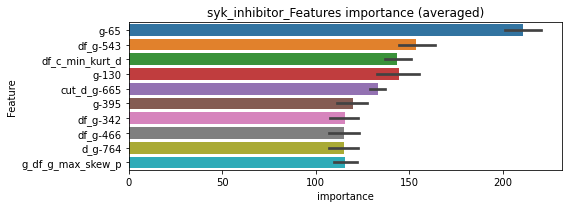

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 syk_inhibitor=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000383783	valid_1's binary_logloss: 0.000701788
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 syk_inhibitor=================================


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000372625	valid_1's binary_logloss: 0.00175591
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 syk_inhibitor=================================


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.00037839	valid_1's binary_logloss: 0.00102607
Training until validation scores don't improve for 30 rounds


syk_inhibitor logloss: 0.0010892665182468736


Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000383903	valid_1's binary_logloss: 0.000872113
neg labels: 3289 → selected neg labels: 3278


tachykinin_antagonist, len(trt): 60, len(othr): 3278, target_rate: 0.0025195 → Adj_target_rate: 0.0027266
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0061221	valid_1's binary_logloss: 0.0270757
[600]	training's binary_logloss: 0.00102359	valid_1's binary_logloss: 0.0143812
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.00068888	valid_1's binary_logloss: 0.0131233
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00643031	valid_1's binary_logloss: 0.0233444
[600]	training's binary_logloss: 0.00104713	valid_1's binary_logloss: 0.0111972
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000686497	valid_1's binary_logloss: 0.00989805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00646276	valid_1's binary_logloss: 0.0243661
[600]	training's binary_logloss: 0.0010547	valid_1's binary_logloss: 0.0132254
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.000758327	valid_1's binary_logloss: 0

1 / 3 AUC score:1.000
y_Threshold: 0.0065269, Threshold: 0.0172796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252, Num_p_label: 40.0, conf_0:0.01210, conf_1:0.02246
Num_p_label: 40.0, Expected: 10.0, Adj_threshold_1: 0.0172796
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_2: 0.0372796
threshold: 0.0372796, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 655.0/3801, y_label_rate: 0.1723231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00577638	valid_1's binary_logloss: 0.0261474
[600]	training's binary_logloss: 0.000976591	valid_1's binary_logloss: 0.0146516
[900]	training's binary_logloss: 0.000631877	valid_1's binary_logloss: 0.0130535
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.00062589	valid_1's binary_logloss: 0.0130464
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00572863	valid_1's binary_logloss: 0.0206832
[600]	training's binary_logloss: 0.00099704	valid_1's binary_logloss: 0.0092849
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000654822	valid_1's binary_logloss: 0.00830698
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00569014	valid_1's binary_logloss: 0.0224836
[600]	training's binary_logloss: 0.000986176	valid_1's binary_logloss: 0.0129166
Early stopping, best i

2 / 3 AUC score:1.000
y_Threshold: 0.0200060, Threshold: 0.0372796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3799
p_label_rate: 0.0070316 Vs.target_rate: 0.00252, Num_p_label: 28.0, conf_0:0.02982, conf_1:0.04474
Num_p_label: 28.0, Expected: 10.0, Adj_threshold_1: 0.0372796
Num_p_label: 15.0, Expected: 10.0, Adj_threshold_2: 0.0572796
threshold: 0.0572796, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00550866	valid_1's binary_logloss: 0.0361239
[600]	training's binary_logloss: 0.000950782	valid_1's binary_logloss: 0.0270688
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000772869	valid_1's binary_logloss: 0.0264041
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00564573	valid_1's binary_logloss: 0.0238907
[600]	training's binary_logloss: 0.000992274	valid_1's binary_logloss: 0.0126465
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000671304	valid_1's binary_logloss: 0.0112979
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00547813	valid_1's binary_logloss: 0.0249983
[600]	training's binary_logloss: 0.000981374	valid_1's binary_logloss: 0.0146492
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000708875	valid_1's binary_loglo

3 / 3 AUC score:1.000
y_Threshold: 0.0242921, Threshold: 0.0572796, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0040181 Vs.target_rate: 0.00252, Num_p_label: 16.0, conf_0:0.05155, conf_1:0.06301
Num_p_label: 16.0, Expected: 10.0, Adj_threshold_1: 0.0572796
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_2: 0.0772796
threshold: 0.0772796, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3793, y_label_rate: 0.1716320


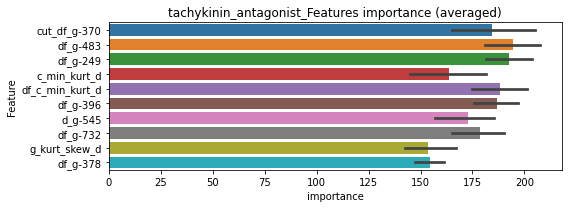

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00076207	valid_1's binary_logloss: 0.0211792


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000655397	valid_1's binary_logloss: 0.0164576


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00114397	valid_1's binary_logloss: 0.0236728


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000717537	valid_1's binary_logloss: 0.0104834


tachykinin_antagonist logloss: 0.017949106567720786


neg labels: 3289 → selected neg labels: 3285


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3285, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00253272	valid_1's binary_logloss: 0.00800876
[600]	training's binary_logloss: 0.0005506	valid_1's binary_logloss: 0.00354007
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000493919	valid_1's binary_logloss: 0.00336885
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00240097	valid_1's binary_logloss: 0.00852141
[600]	training's binary_logloss: 0.000537083	valid_1's binary_logloss: 0.00392114
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000481073	valid_1's binary_logloss: 0.00371859
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00252738	valid_1's binary_logloss: 0.00540873
[600]	training's binary_logloss: 0.000553804	valid_1's binary_logloss: 0.00160942
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000503054	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0038981, Threshold: 0.0138672, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.00971, conf_1:0.01803
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0138672
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_2: 0.0338672
threshold: 0.0338672, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219737	valid_1's binary_logloss: 0.00731276
[600]	training's binary_logloss: 0.000514785	valid_1's binary_logloss: 0.00364999
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000474336	valid_1's binary_logloss: 0.00351363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211293	valid_1's binary_logloss: 0.00682878
[600]	training's binary_logloss: 0.000505322	valid_1's binary_logloss: 0.00295231
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000473667	valid_1's binary_logloss: 0.00287738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224924	valid_1's binary_logloss: 0.00437025
[600]	training's binary_logloss: 0.000525436	valid_1's binary_logloss: 0.00129065
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000480796	valid_1's bina

2 / 3 AUC score:1.000
y_Threshold: 0.0493007, Threshold: 0.0338672, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0077850 Vs.target_rate: 0.00126, Num_p_label: 31.0, conf_0:0.02709, conf_1:0.04064
Num_p_label: 31.0, Expected: 5.0, Adj_threshold_1: 0.0338672
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_2: 0.0538672
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_3: 0.0738672
threshold: 0.0738672, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219737	valid_1's binary_logloss: 0.00731276
[600]	training's binary_logloss: 0.000514785	valid_1's binary_logloss: 0.00364999
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000474336	valid_1's binary_logloss: 0.00351363
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211293	valid_1's binary_logloss: 0.00682878
[600]	training's binary_logloss: 0.000505322	valid_1's binary_logloss: 0.00295231
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000473667	valid_1's binary_logloss: 0.00287738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00224924	valid_1's binary_logloss: 0.00437025
[600]	training's binary_logloss: 0.000525436	valid_1's binary_logloss: 0.00129065
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000480796	valid_1's bina

3 / 3 AUC score:1.000
y_Threshold: 0.0493007, Threshold: 0.0738672, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00126, Num_p_label: 10.0, conf_0:0.06648, conf_1:0.08125
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0738672
threshold: 0.0738672, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


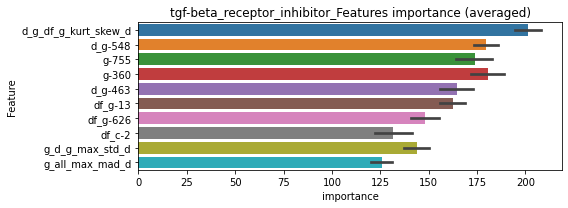

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000450844	valid_1's binary_logloss: 0.00258633


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046583	valid_1's binary_logloss: 0.00263796


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000488108	valid_1's binary_logloss: 0.0011804


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000471729	valid_1's binary_logloss: 0.0044852


tgf-beta_receptor_inhibitor logloss: 0.002725696355759375


neg labels: 3289 → selected neg labels: 3286


thrombin_inhibitor, len(trt): 19, len(othr): 3286, target_rate: 0.0007979 → Adj_target_rate: 0.0010260
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00133976	valid_1's binary_logloss: 0.00489364
[600]	training's binary_logloss: 0.000369659	valid_1's binary_logloss: 0.00263799
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000379994	valid_1's binary_logloss: 0.00263523
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0013047	valid_1's binary_logloss: 0.00623622
[600]	training's binary_logloss: 0.000372482	valid_1's binary_logloss: 0.00393635
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000372482	valid_1's binary_logloss: 0.00393635
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134064	valid_1's binary_logloss: 0.00271287
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00038734	valid_1's binary_logloss: 0.000997679
Training until validation scores don't improve for 30 rounds

1 / 3 AUC score:1.000
y_Threshold: 0.0023860, Threshold: 0.0083468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080, Num_p_label: 40.0, conf_0:0.00584, conf_1:0.01085
Num_p_label: 40.0, Expected: 3.2, Adj_threshold_1: 0.0083468
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_2: 0.0283468


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000384791	valid_1's binary_logloss: 0.00141155


threshold: 0.0283468, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123546	valid_1's binary_logloss: 0.00339183
[600]	training's binary_logloss: 0.000364934	valid_1's binary_logloss: 0.00173693
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000368994	valid_1's binary_logloss: 0.00173322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120085	valid_1's binary_logloss: 0.00819847
[600]	training's binary_logloss: 0.000358259	valid_1's binary_logloss: 0.00575042
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000358259	valid_1's binary_logloss: 0.00575042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125361	valid_1's binary_logloss: 0.00203402
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000372399	valid_1's binary_logloss: 0.000717019
Training until validation scores don't improve for 30 roun

2 / 3 AUC score:1.000
y_Threshold: 0.0279496, Threshold: 0.0283468, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00035136	valid_1's binary_logloss: 0.00128831
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000352201	valid_1's binary_logloss: 0.00128628


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0052737 Vs.target_rate: 0.00080, Num_p_label: 21.0, conf_0:0.02268, conf_1:0.03402
Num_p_label: 21.0, Expected: 3.2, Adj_threshold_1: 0.0283468
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0483468
threshold: 0.0483468, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00123546	valid_1's binary_logloss: 0.00339183
[600]	training's binary_logloss: 0.000364934	valid_1's binary_logloss: 0.00173693
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000368994	valid_1's binary_logloss: 0.00173322
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00120085	valid_1's binary_logloss: 0.00819847
[600]	training's binary_logloss: 0.000358259	valid_1's binary_logloss: 0.00575042
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000358259	valid_1's binary_logloss: 0.00575042
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00125361	valid_1's binary_logloss: 0.00203402
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000372399	valid_1's binary_logloss: 0.000717019
Training until validation scores don't improve for 30 roun

3 / 3 AUC score:1.000
y_Threshold: 0.0279496, Threshold: 0.0483468, pos_neg_ratio: 0.8000000


[600]	training's binary_logloss: 0.00035136	valid_1's binary_logloss: 0.00128831
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000352201	valid_1's binary_logloss: 0.00128628


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00080, Num_p_label: 6.0, conf_0:0.04351, conf_1:0.05318
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0483468
threshold: 0.0483468, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


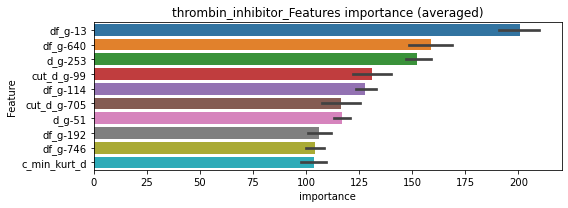

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357644	valid_1's binary_logloss: 0.00183475
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000358086	valid_1's binary_logloss: 0.0060278
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000356956	valid_1's binary_logloss: 0.000666531
Training until validation scores don't improve for 30 rounds


thrombin_inhibitor logloss: 0.002421006395247976


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000366043	valid_1's binary_logloss: 0.00114953
neg labels: 3289 → selected neg labels: 3282


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3282, target_rate: 0.0015537 → Adj_target_rate: 0.0018079
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00325406	valid_1's binary_logloss: 0.0142126
[600]	training's binary_logloss: 0.000624552	valid_1's binary_logloss: 0.00811319
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000530979	valid_1's binary_logloss: 0.00790357
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00307255	valid_1's binary_logloss: 0.00992535
[600]	training's binary_logloss: 0.000631015	valid_1's binary_logloss: 0.00453338
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000580664	valid_1's binary_logloss: 0.00439839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00329952	valid_1's binary_logloss: 0.00676023
[600]	training's binary_logloss: 0.000648186	valid_1's binary_logloss: 0.00205749
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000566026	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0042186, Threshold: 0.0176513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00155, Num_p_label: 40.0, conf_0:0.01236, conf_1:0.02295
Num_p_label: 40.0, Expected: 6.2, Adj_threshold_1: 0.0176513
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0376513
threshold: 0.0376513, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029435	valid_1's binary_logloss: 0.0131889
[600]	training's binary_logloss: 0.000607153	valid_1's binary_logloss: 0.00815848
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00054013	valid_1's binary_logloss: 0.0078067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289394	valid_1's binary_logloss: 0.00949191
[600]	training's binary_logloss: 0.000606047	valid_1's binary_logloss: 0.00443628
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000572763	valid_1's binary_logloss: 0.00437555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299457	valid_1's binary_logloss: 0.0063722
[600]	training's binary_logloss: 0.000621261	valid_1's binary_logloss: 0.00209987
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000542216	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0249786, Threshold: 0.0376513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0080362 Vs.target_rate: 0.00155, Num_p_label: 32.0, conf_0:0.03012, conf_1:0.04518
Num_p_label: 32.0, Expected: 6.2, Adj_threshold_1: 0.0376513
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_2: 0.0576513
threshold: 0.0576513, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0029435	valid_1's binary_logloss: 0.0131889
[600]	training's binary_logloss: 0.000607153	valid_1's binary_logloss: 0.00815848
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00054013	valid_1's binary_logloss: 0.0078067
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289394	valid_1's binary_logloss: 0.00949191
[600]	training's binary_logloss: 0.000606047	valid_1's binary_logloss: 0.00443628
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000572763	valid_1's binary_logloss: 0.00437555
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00299457	valid_1's binary_logloss: 0.0063722
[600]	training's binary_logloss: 0.000621261	valid_1's binary_logloss: 0.00209987
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000542216	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0249786, Threshold: 0.0576513, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00155, Num_p_label: 15.0, conf_0:0.05189, conf_1:0.06342
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0576513
threshold: 0.0576513, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


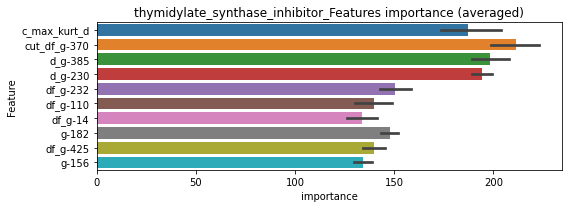

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000536051	valid_1's binary_logloss: 0.00831518


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000555612	valid_1's binary_logloss: 0.00366639


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000573491	valid_1's binary_logloss: 0.00198842


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000541587	valid_1's binary_logloss: 0.00961554


thymidylate_synthase_inhibitor logloss: 0.005901013733459291


neg labels: 3289 → selected neg labels: 3282


tlr_agonist, len(trt): 30, len(othr): 3282, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00234441	valid_1's binary_logloss: 0.00793561
[600]	training's binary_logloss: 0.000496266	valid_1's binary_logloss: 0.00349066
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000458728	valid_1's binary_logloss: 0.0033971
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00230878	valid_1's binary_logloss: 0.00585248
[600]	training's binary_logloss: 0.000490373	valid_1's binary_logloss: 0.00199805
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000467121	valid_1's binary_logloss: 0.00194849
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00237231	valid_1's binary_logloss: 0.00522008
[600]	training's binary_logloss: 0.000502231	valid_1's binary_logloss: 0.00182153
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000458482	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0029297, Threshold: 0.0232064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01624, conf_1:0.03017
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0232064
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_2: 0.0432064
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_3: 0.0632064
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_4: 0.0832064
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_5: 0.1032064
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_6: 0.1232064
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_7: 0.1432064
threshold: 0.1432064, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211852	valid_1's binary_logloss: 0.00735169
[600]	training's binary_logloss: 0.000468755	valid_1's binary_logloss: 0.00353232
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000436763	valid_1's binary_logloss: 0.00347422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219209	valid_1's binary_logloss: 0.00582417
[600]	training's binary_logloss: 0.00047076	valid_1's binary_logloss: 0.00201962
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000436369	valid_1's binary_logloss: 0.00191682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216936	valid_1's binary_logloss: 0.00447216
[600]	training's binary_logloss: 0.000474181	valid_1's binary_logloss: 0.00137335
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000454832	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0188997, Threshold: 0.1432064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0065294 Vs.target_rate: 0.00126, Num_p_label: 26.0, conf_0:0.11457, conf_1:0.17185
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_1: 0.1432064
Num_p_label: 26.0, Expected: 5.0, Adj_threshold_2: 0.1632064
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_3: 0.1832064
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_4: 0.2032064
Num_p_label: 18.0, Expected: 5.0, Adj_threshold_5: 0.2232064
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_6: 0.2432064
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_7: 0.2632064
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_8: 0.2832064
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_9: 0.3032064
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_10: 0.3232064
threshold: 0.3432064, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00211852	valid_1's binary_logloss: 0.00735169
[600]	training's binary_logloss: 0.000468755	valid_1's binary_logloss: 0.00353232
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000436763	valid_1's binary_logloss: 0.00347422
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00219209	valid_1's binary_logloss: 0.00582417
[600]	training's binary_logloss: 0.00047076	valid_1's binary_logloss: 0.00201962
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000436369	valid_1's binary_logloss: 0.00191682
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00216936	valid_1's binary_logloss: 0.00447216
[600]	training's binary_logloss: 0.000474181	valid_1's binary_logloss: 0.00137335
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000454832	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0188997, Threshold: 0.3432064, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0035158 Vs.target_rate: 0.00126, Num_p_label: 14.0, conf_0:0.30889, conf_1:0.37753
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.3432064
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.3632064
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.3832064
threshold: 0.3832064, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


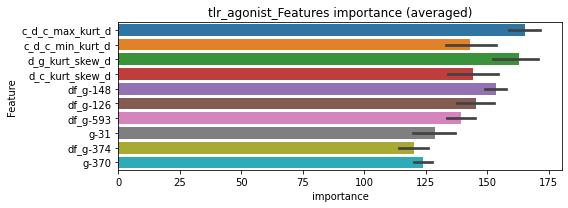

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000446366	valid_1's binary_logloss: 0.00312399


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000439382	valid_1's binary_logloss: 0.00188388


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453649	valid_1's binary_logloss: 0.00133998


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000469583	valid_1's binary_logloss: 0.0119352


tlr_agonist logloss: 0.004569671352710094


neg labels: 3289 → selected neg labels: 3289


tlr_antagonist, len(trt): 7, len(othr): 3289, target_rate: 0.0002939 → Adj_target_rate: 0.0004391
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000512146	valid_1's binary_logloss: 0.000829929
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000229548	valid_1's binary_logloss: 0.000425124
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00049961	valid_1's binary_logloss: 0.00235816
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000233614	valid_1's binary_logloss: 0.00177221
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000510919	valid_1's binary_logloss: 0.000695678
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000230924	valid_1's binary_logloss: 0.000303771
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000504184	valid_1's binary_logloss: 0.00068283


1 / 3 AUC score:1.000
y_Threshold: 0.0007289, Threshold: 0.0025444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029, Num_p_label: 40.0, conf_0:0.00178, conf_1:0.00331
Num_p_label: 40.0, Expected: 1.2, Adj_threshold_1: 0.0025444
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0225444
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_3: 0.0425444
threshold: 0.0425444, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000233369	valid_1's binary_logloss: 0.00033664


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000482524	valid_1's binary_logloss: 0.000537537
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000223405	valid_1's binary_logloss: 0.000254202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000473534	valid_1's binary_logloss: 0.00145616
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000226783	valid_1's binary_logloss: 0.000962103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000476633	valid_1's binary_logloss: 0.000557138
[600]	training's binary_logloss: 0.00022522	valid_1's binary_logloss: 0.000264
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00022522	valid_1's binary_logloss: 0.000264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000477519	valid_1's binary_logloss: 0.000565

2 / 3 AUC score:1.000
y_Threshold: 0.0983605, Threshold: 0.0425444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00029, Num_p_label: 4.0, conf_0:0.03404, conf_1:0.05105
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_1: 0.0425444
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0625444
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.0825444
threshold: 0.0825444, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000223915	valid_1's binary_logloss: 0.000268092


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000482524	valid_1's binary_logloss: 0.000537537
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000223405	valid_1's binary_logloss: 0.000254202
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000473534	valid_1's binary_logloss: 0.00145616
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000226783	valid_1's binary_logloss: 0.000962103
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000476633	valid_1's binary_logloss: 0.000557138
[600]	training's binary_logloss: 0.00022522	valid_1's binary_logloss: 0.000264
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00022522	valid_1's binary_logloss: 0.000264
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000477519	valid_1's binary_logloss: 0.000565

3 / 3 AUC score:1.000
y_Threshold: 0.0983605, Threshold: 0.0825444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029, Num_p_label: 2.0, conf_0:0.07429, conf_1:0.09080
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0825444
threshold: 0.0825444, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000223915	valid_1's binary_logloss: 0.000268092


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


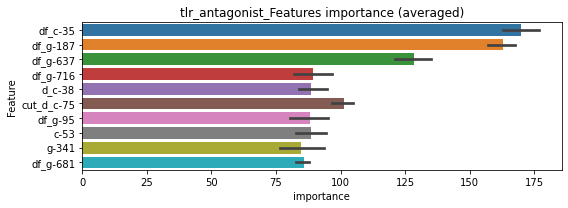

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000227724	valid_1's binary_logloss: 0.000258295
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000224648	valid_1's binary_logloss: 0.00119345
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000224208	valid_1's binary_logloss: 0.000266231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000226095	valid_1's binary_logloss: 0.000264646


tlr_antagonist logloss: 0.0004956070068711884


neg labels: 3289 → selected neg labels: 3289


tnf_inhibitor, len(trt): 36, len(othr): 3289, target_rate: 0.0015117 → Adj_target_rate: 0.0017663
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304218	valid_1's binary_logloss: 0.0130976
[600]	training's binary_logloss: 0.000620904	valid_1's binary_logloss: 0.00686569
Early stopping, best iteration is:
[685]	training's binary_logloss: 0.00054826	valid_1's binary_logloss: 0.00650626
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00289807	valid_1's binary_logloss: 0.0171472
[600]	training's binary_logloss: 0.000595187	valid_1's binary_logloss: 0.0104731
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000534587	valid_1's binary_logloss: 0.010223
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00294796	valid_1's binary_logloss: 0.0105458
[600]	training's binary_logloss: 0.000608441	valid_1's binary_logloss: 0.00607844
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000524283	valid_1's binary_logl

1 / 3 AUC score:1.000
y_Threshold: 0.0046560, Threshold: 0.0203081, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00151, Num_p_label: 40.0, conf_0:0.01422, conf_1:0.02640
Num_p_label: 40.0, Expected: 6.0, Adj_threshold_1: 0.0203081
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.0403081
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.0603081
threshold: 0.0603081, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275998	valid_1's binary_logloss: 0.0125123
[600]	training's binary_logloss: 0.000577276	valid_1's binary_logloss: 0.00729943
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000520814	valid_1's binary_logloss: 0.00702608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268227	valid_1's binary_logloss: 0.0139366
[600]	training's binary_logloss: 0.000571142	valid_1's binary_logloss: 0.00850427
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000509177	valid_1's binary_logloss: 0.00817607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273938	valid_1's binary_logloss: 0.00973486
[600]	training's binary_logloss: 0.000587134	valid_1's binary_logloss: 0.00535433
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00050323	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0527306, Threshold: 0.0603081, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0077850 Vs.target_rate: 0.00151, Num_p_label: 31.0, conf_0:0.04825, conf_1:0.07237
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_1: 0.0603081
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_2: 0.0803081
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_3: 0.1003081
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_4: 0.1203081
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.1403081
threshold: 0.1403081, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00275998	valid_1's binary_logloss: 0.0125123
[600]	training's binary_logloss: 0.000577276	valid_1's binary_logloss: 0.00729943
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000520814	valid_1's binary_logloss: 0.00702608
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00268227	valid_1's binary_logloss: 0.0139366
[600]	training's binary_logloss: 0.000571142	valid_1's binary_logloss: 0.00850427
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000509177	valid_1's binary_logloss: 0.00817607
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00273938	valid_1's binary_logloss: 0.00973486
[600]	training's binary_logloss: 0.000587134	valid_1's binary_logloss: 0.00535433
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.00050323	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0527306, Threshold: 0.1403081, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00151, Num_p_label: 14.0, conf_0:0.12628, conf_1:0.15434
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.1403081
threshold: 0.1403081, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


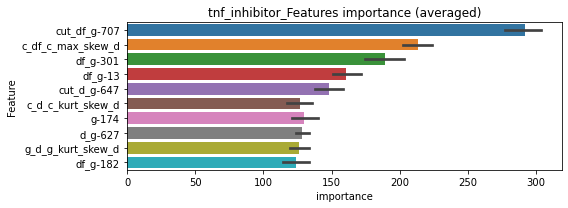

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000507013	valid_1's binary_logloss: 0.00624234


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000553662	valid_1's binary_logloss: 0.00890322


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000527585	valid_1's binary_logloss: 0.00549421


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000528404	valid_1's binary_logloss: 0.00933209


tnf_inhibitor logloss: 0.007493787404239995


neg labels: 3289 → selected neg labels: 3276


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276, target_rate: 0.0053330 → Adj_target_rate: 0.0051574
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0152141	valid_1's binary_logloss: 0.116344
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00258957	valid_1's binary_logloss: 0.104117
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0155095	valid_1's binary_logloss: 0.0848048
[600]	training's binary_logloss: 0.00236987	valid_1's binary_logloss: 0.0667812
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00268008	valid_1's binary_logloss: 0.0665524
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0173439	valid_1's binary_logloss: 0.0580648
[600]	training's binary_logloss: 0.00253611	valid_1's binary_logloss: 0.0297718
Early stopping, best iteration is:
[862]	training's binary_logloss: 0.00122473	valid_1's binary_logloss: 0.0256408
Training until validation scores don't improve for 30 rounds
[300]	training's

1 / 3 AUC score:0.992
y_Threshold: 0.0203090, Threshold: 0.1811028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 634/3757
p_label_rate: 0.0100452 Vs.target_rate: 0.00533, Num_p_label: 40.0, conf_0:0.12677, conf_1:0.23543
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_1: 0.1811028
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_2: 0.2011028
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_3: 0.2211028
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_4: 0.2411028
threshold: 0.2411028, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 634.0/3757, y_label_rate: 0.1687517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0127863	valid_1's binary_logloss: 0.0771235
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00266554	valid_1's binary_logloss: 0.0616455
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0131082	valid_1's binary_logloss: 0.0781375
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00226244	valid_1's binary_logloss: 0.0623677
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120576	valid_1's binary_logloss: 0.0862738
[600]	training's binary_logloss: 0.00188543	valid_1's binary_logloss: 0.0715405
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.00102441	valid_1's binary_logloss: 0.0686952
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0120371	valid_1's binary_logloss: 0.0709303
[600]	training'

2 / 3 AUC score:0.997
y_Threshold: 0.0385632, Threshold: 0.2411028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 612.0/3713
p_label_rate: 0.0158212 Vs.target_rate: 0.00533, Num_p_label: 63.0, conf_0:0.19288, conf_1:0.28932
Num_p_label: 63.0, Expected: 21.2, Adj_threshold_1: 0.2411028
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_2: 0.2611028
Num_p_label: 55.0, Expected: 21.2, Adj_threshold_3: 0.2811028
Num_p_label: 51.0, Expected: 21.2, Adj_threshold_4: 0.3011028
Num_p_label: 45.0, Expected: 21.2, Adj_threshold_5: 0.3211028
Num_p_label: 42.0, Expected: 21.2, Adj_threshold_6: 0.3411028
Num_p_label: 39.0, Expected: 21.2, Adj_threshold_7: 0.3611028
Num_p_label: 37.0, Expected: 21.2, Adj_threshold_8: 0.3811028
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_9: 0.4011028
Num_p_label: 29.0, Expected: 21.2, Adj_threshold_10: 0.4211028
threshold: 0.4211028, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 612.0/3713, y_label_rate: 0.1648263

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010637	valid_1's binary_logloss: 0.0549085
[600]	training's binary_logloss: 0.00172073	valid_1's binary_logloss: 0.0406429
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.00109298	valid_1's binary_logloss: 0.0392936
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0103877	valid_1's binary_logloss: 0.0759989
[600]	training's binary_logloss: 0.00169933	valid_1's binary_logloss: 0.0624623
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00178763	valid_1's binary_logloss: 0.0622906
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.010273	valid_1's binary_logloss: 0.0685637
[600]	training's binary_logloss: 0.00168337	valid_1's binary_logloss: 0.0562569
Early stopping, best iteration is:
[732]	training's binary_logloss: 0.00116491	valid_1's binary_logloss: 0.05476

3 / 3 AUC score:0.998
y_Threshold: 0.0442479, Threshold: 0.4211028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 599.0/3687
p_label_rate: 0.0082873 Vs.target_rate: 0.00533, Num_p_label: 33.0, conf_0:0.37899, conf_1:0.46321
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_1: 0.4211028
Num_p_label: 33.0, Expected: 21.2, Adj_threshold_2: 0.4411028
Num_p_label: 30.0, Expected: 21.2, Adj_threshold_3: 0.4611028
threshold: 0.4611028, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 599.0/3687, y_label_rate: 0.1624627


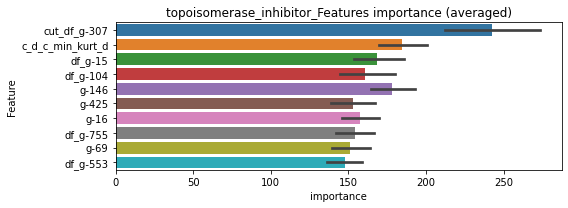

len(train_index) : 2765
len(valid_index) : 922
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.001784	valid_1's binary_logloss: 0.0572054


len(train_index) : 2765
len(valid_index) : 922
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.00106186	valid_1's binary_logloss: 0.0461282


len(train_index) : 2765
len(valid_index) : 922
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00256062	valid_1's binary_logloss: 0.0464954


len(train_index) : 2766
len(valid_index) : 921
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00126497	valid_1's binary_logloss: 0.0389886


topoisomerase_inhibitor logloss: 0.04720660849392275


neg labels: 3289 → selected neg labels: 3287


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3287, target_rate: 0.0007559 → Adj_target_rate: 0.0009799
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00134337	valid_1's binary_logloss: 0.00270541
[600]	training's binary_logloss: 0.000388447	valid_1's binary_logloss: 0.00106268
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000387332	valid_1's binary_logloss: 0.00106032
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00132762	valid_1's binary_logloss: 0.00796294
[600]	training's binary_logloss: 0.000386077	valid_1's binary_logloss: 0.00480496
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00038917	valid_1's binary_logloss: 0.00478174
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00143918	valid_1's binary_logloss: 0.00479885
[600]	training's binary_logloss: 0.000384847	valid_1's binary_logloss: 0.00290491
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000388865	valid_1's binar

1 / 3 AUC score:1.000
y_Threshold: 0.0022324, Threshold: 0.0140826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076, Num_p_label: 40.0, conf_0:0.00986, conf_1:0.01831
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_1: 0.0140826
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0340826
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_3: 0.0540826
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.0740826
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_5: 0.0940826
threshold: 0.0940826, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126165	valid_1's binary_logloss: 0.00220916
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000372623	valid_1's binary_logloss: 0.000838752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117883	valid_1's binary_logloss: 0.00707156
[600]	training's binary_logloss: 0.000356476	valid_1's binary_logloss: 0.00452393
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00035833	valid_1's binary_logloss: 0.004512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126107	valid_1's binary_logloss: 0.00534542
[600]	training's binary_logloss: 0.000367003	valid_1's binary_logloss: 0.00362097
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.0003739	valid_1's binary_logloss: 0.00359075
Training until validation scores don't improve for 30 rounds
[3

2 / 3 AUC score:1.000
y_Threshold: 0.0435216, Threshold: 0.0940826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00076, Num_p_label: 35.0, conf_0:0.07527, conf_1:0.11290
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_1: 0.0940826
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_2: 0.1140826
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.1340826
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_4: 0.1540826
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_5: 0.1740826
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_6: 0.1940826
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.2140826
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.2340826
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.2540826
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_10: 0.2740826
threshold: 0.2940826, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
==========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126165	valid_1's binary_logloss: 0.00220916
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000372623	valid_1's binary_logloss: 0.000838752
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00117883	valid_1's binary_logloss: 0.00707156
[600]	training's binary_logloss: 0.000356476	valid_1's binary_logloss: 0.00452393
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00035833	valid_1's binary_logloss: 0.004512
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00126107	valid_1's binary_logloss: 0.00534542
[600]	training's binary_logloss: 0.000367003	valid_1's binary_logloss: 0.00362097
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.0003739	valid_1's binary_logloss: 0.00359075
Training until validation scores don't improve for 30 rounds
[3

3 / 3 AUC score:1.000
y_Threshold: 0.0435216, Threshold: 0.2940826, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0040181 Vs.target_rate: 0.00076, Num_p_label: 16.0, conf_0:0.26467, conf_1:0.32349
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.2940826
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_2: 0.3140826
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.3340826
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.3540826
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_5: 0.3740826
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_6: 0.3940826
threshold: 0.3940826, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


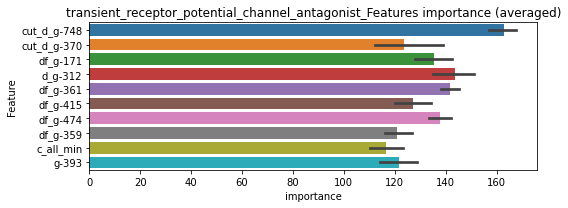

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000360303	valid_1's binary_logloss: 0.000839937
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000365642	valid_1's binary_logloss: 0.00426777
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000377796	valid_1's binary_logloss: 0.00313204
Training until validation scores don't improve for 30 rounds


transient_receptor_potential_channel_antagonist logloss: 0.002306405411427083


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000372483	valid_1's binary_logloss: 0.000984773
neg labels: 3289 → selected neg labels: 3289


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289, target_rate: 0.0002520 → Adj_target_rate: 0.0003851
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000376325	valid_1's binary_logloss: 0.00105185
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000190591	valid_1's binary_logloss: 0.000700345
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000373706	valid_1's binary_logloss: 0.000499562
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000191758	valid_1's binary_logloss: 0.00025248
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000378537	valid_1's binary_logloss: 0.000871759
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000189602	valid_1's binary_logloss: 0.000455469
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000382792	valid_1's binary_logloss: 0.000588937


1 / 3 AUC score:1.000
y_Threshold: 0.0005402, Threshold: 0.0014391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025, Num_p_label: 40.0, conf_0:0.00101, conf_1:0.00187
Num_p_label: 40.0, Expected: 1.0, Adj_threshold_1: 0.0014391
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0214391
threshold: 0.0214391, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000187187	valid_1's binary_logloss: 0.000307022


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353677	valid_1's binary_logloss: 0.000864503
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000180708	valid_1's binary_logloss: 0.000556619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000351591	valid_1's binary_logloss: 0.000379882
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000175745	valid_1's binary_logloss: 0.000192726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035278	valid_1's binary_logloss: 0.000370298
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000176346	valid_1's binary_logloss: 0.000187367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353154	valid_1's binary_logloss: 0.000709446


2 / 3 AUC score:1.000
y_Threshold: 0.1263498, Threshold: 0.0214391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025, Num_p_label: 11.0, conf_0:0.01715, conf_1:0.02573
Num_p_label: 11.0, Expected: 1.0, Adj_threshold_1: 0.0214391
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0414391
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.0614391
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_4: 0.0814391
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1014391
threshold: 0.1014391, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000177601	valid_1's binary_logloss: 0.000436443


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353677	valid_1's binary_logloss: 0.000864503
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000180708	valid_1's binary_logloss: 0.000556619
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000351591	valid_1's binary_logloss: 0.000379882
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000175745	valid_1's binary_logloss: 0.000192726
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00035278	valid_1's binary_logloss: 0.000370298
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000176346	valid_1's binary_logloss: 0.000187367
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000353154	valid_1's binary_logloss: 0.000709446


3 / 3 AUC score:1.000
y_Threshold: 0.1263498, Threshold: 0.1014391, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025, Num_p_label: 2.0, conf_0:0.09130, conf_1:0.11158
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.1014391
threshold: 0.1014391, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000177601	valid_1's binary_logloss: 0.000436443


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


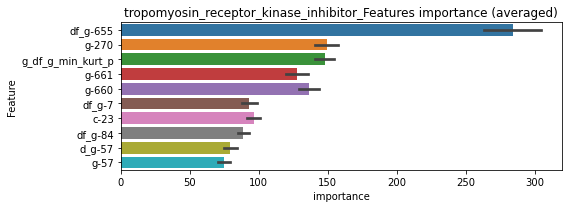

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000179636	valid_1's binary_logloss: 0.00054407
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000176157	valid_1's binary_logloss: 0.000195607
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000179526	valid_1's binary_logloss: 0.000192179
Training until validation scores don't improve for 30 rounds


tropomyosin_receptor_kinase_inhibitor logloss: 0.00034029122571470945


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000174993	valid_1's binary_logloss: 0.000428675
neg labels: 3289 → selected neg labels: 3281


trpv_agonist, len(trt): 25, len(othr): 3281, target_rate: 0.0010498 → Adj_target_rate: 0.0012955
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00181068	valid_1's binary_logloss: 0.00836875
[600]	training's binary_logloss: 0.000454846	valid_1's binary_logloss: 0.0045798
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000439061	valid_1's binary_logloss: 0.0044891
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00187907	valid_1's binary_logloss: 0.0040434
[600]	training's binary_logloss: 0.000468406	valid_1's binary_logloss: 0.00157233
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000421572	valid_1's binary_logloss: 0.00146161
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00183835	valid_1's binary_logloss: 0.00437497
[600]	training's binary_logloss: 0.000454896	valid_1's binary_logloss: 0.00177304
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000437585	valid_1's binary_

1 / 3 AUC score:1.000
y_Threshold: 0.0022970, Threshold: 0.0100354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105, Num_p_label: 40.0, conf_0:0.00702, conf_1:0.01305
Num_p_label: 40.0, Expected: 4.2, Adj_threshold_1: 0.0100354
Num_p_label: 15.0, Expected: 4.2, Adj_threshold_2: 0.0300354
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.0500354
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.0700354
threshold: 0.0700354, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172189	valid_1's binary_logloss: 0.00737409
[600]	training's binary_logloss: 0.000439712	valid_1's binary_logloss: 0.00410052
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000419157	valid_1's binary_logloss: 0.00400953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177577	valid_1's binary_logloss: 0.00365961
[600]	training's binary_logloss: 0.000445798	valid_1's binary_logloss: 0.00138677
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000409833	valid_1's binary_logloss: 0.00129639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166993	valid_1's binary_logloss: 0.0036073
[600]	training's binary_logloss: 0.000438339	valid_1's binary_logloss: 0.00138332
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000422181	valid_1's binar

2 / 3 AUC score:1.000
y_Threshold: 0.0541428, Threshold: 0.0700354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00105, Num_p_label: 17.0, conf_0:0.05603, conf_1:0.08404
Num_p_label: 17.0, Expected: 4.2, Adj_threshold_1: 0.0700354
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0900354
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_3: 0.1100354
threshold: 0.1100354, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172189	valid_1's binary_logloss: 0.00737409
[600]	training's binary_logloss: 0.000439712	valid_1's binary_logloss: 0.00410052
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000419157	valid_1's binary_logloss: 0.00400953
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00177577	valid_1's binary_logloss: 0.00365961
[600]	training's binary_logloss: 0.000445798	valid_1's binary_logloss: 0.00138677
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000409833	valid_1's binary_logloss: 0.00129639
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00166993	valid_1's binary_logloss: 0.0036073
[600]	training's binary_logloss: 0.000438339	valid_1's binary_logloss: 0.00138332
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000422181	valid_1's binar

3 / 3 AUC score:1.000
y_Threshold: 0.0541428, Threshold: 0.1100354, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0025113 Vs.target_rate: 0.00105, Num_p_label: 10.0, conf_0:0.09903, conf_1:0.12104
Num_p_label: 10.0, Expected: 4.2, Adj_threshold_1: 0.1100354
threshold: 0.1100354, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


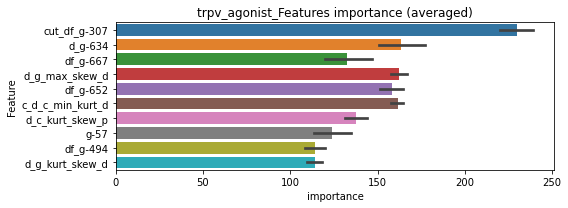

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000424268	valid_1's binary_logloss: 0.00374675


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000420663	valid_1's binary_logloss: 0.00171513


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000421894	valid_1's binary_logloss: 0.00130131


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000433651	valid_1's binary_logloss: 0.00258438


trpv_agonist logloss: 0.0023415521932021455


neg labels: 3289 → selected neg labels: 3280


trpv_antagonist, len(trt): 48, len(othr): 3280, target_rate: 0.0020156 → Adj_target_rate: 0.0022556
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00351622	valid_1's binary_logloss: 0.0244452
[600]	training's binary_logloss: 0.000723747	valid_1's binary_logloss: 0.0182377
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000693096	valid_1's binary_logloss: 0.0180958
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00363659	valid_1's binary_logloss: 0.0172404
[600]	training's binary_logloss: 0.000740092	valid_1's binary_logloss: 0.00942233
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000552811	valid_1's binary_logloss: 0.0086601
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00380587	valid_1's binary_logloss: 0.00791826
[600]	training's binary_logloss: 0.000774521	valid_1's binary_logloss: 0.00268665
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000579991	valid_1's binary_lo

1 / 3 AUC score:0.999
y_Threshold: 0.0048643, Threshold: 0.0232337, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00202, Num_p_label: 40.0, conf_0:0.01626, conf_1:0.03020
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_1: 0.0232337
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_2: 0.0432337
Num_p_label: 11.0, Expected: 8.0, Adj_threshold_3: 0.0632337
threshold: 0.0632337, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00308916	valid_1's binary_logloss: 0.0213237
[600]	training's binary_logloss: 0.000664423	valid_1's binary_logloss: 0.0149858
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000556184	valid_1's binary_logloss: 0.0145805
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00318624	valid_1's binary_logloss: 0.0169728
[600]	training's binary_logloss: 0.000665267	valid_1's binary_logloss: 0.0100011
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000562206	valid_1's binary_logloss: 0.00945255
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310257	valid_1's binary_logloss: 0.0188225
[600]	training's binary_logloss: 0.000666167	valid_1's binary_logloss: 0.0134584
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000566343	valid_1's binary_logl

2 / 3 AUC score:1.000
y_Threshold: 0.0405297, Threshold: 0.0632337, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0082873 Vs.target_rate: 0.00202, Num_p_label: 33.0, conf_0:0.05059, conf_1:0.07588
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_1: 0.0632337
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_2: 0.0832337
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1032337
threshold: 0.1032337, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00319236	valid_1's binary_logloss: 0.014245
[600]	training's binary_logloss: 0.000676633	valid_1's binary_logloss: 0.00855103
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000550221	valid_1's binary_logloss: 0.00815172
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00304409	valid_1's binary_logloss: 0.0213932
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000945282	valid_1's binary_logloss: 0.0160251
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00331374	valid_1's binary_logloss: 0.0100819
[600]	training's binary_logloss: 0.000690466	valid_1's binary_logloss: 0.00555917
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000577053	valid_1's binary_logloss: 0.00532254
Training until validation scores don't improve for 30 rounds
[30

3 / 3 AUC score:1.000
y_Threshold: 0.0388555, Threshold: 0.1032337, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0047715 Vs.target_rate: 0.00202, Num_p_label: 19.0, conf_0:0.09291, conf_1:0.11356
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_1: 0.1032337
threshold: 0.1032337, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


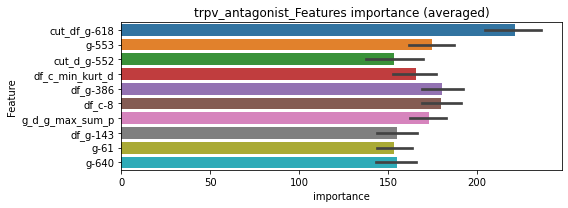

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000562977	valid_1's binary_logloss: 0.00827655


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000559607	valid_1's binary_logloss: 0.0146919


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.00055712	valid_1's binary_logloss: 0.00581066


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000543382	valid_1's binary_logloss: 0.00757218


trpv_antagonist logloss: 0.009088435094495206


neg labels: 3289 → selected neg labels: 3253


tubulin_inhibitor, len(trt): 316, len(othr): 3253, target_rate: 0.0132695 → Adj_target_rate: 0.0111926
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0437307	valid_1's binary_logloss: 0.299093
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.0347674	valid_1's binary_logloss: 0.295738
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.04341	valid_1's binary_logloss: 0.290277
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0322628	valid_1's binary_logloss: 0.288957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.0623944	valid_1's binary_logloss: 0.282689
Training until validation scores don't improve for 30 rounds


1 / 3 AUC score:0.862
y_Threshold: 0.1073453, Threshold: 0.2636254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 519 → Positive_corect_labels: 456/3384
p_label_rate: 0.0100452 Vs.target_rate: 0.01327, Num_p_label: 40.0, conf_0:0.18454, conf_1:0.34271
threshold: 0.2636254, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.058038	valid_1's binary_logloss: 0.278174


positive_y_label: 456.0/3384, y_label_rate: 0.1347518
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0159888	valid_1's binary_logloss: 0.175836
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.0118881	valid_1's binary_logloss: 0.173149
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0171786	valid_1's binary_logloss: 0.130458
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00337832	valid_1's binary_logloss: 0.109393
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0179192	valid_1's binary_logloss: 0.131702
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00519194	valid_1's binary_logloss: 0.120747
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.015519	valid_1's binary_logloss: 0.170785


2 / 3 AUC score:0.985
y_Threshold: 0.0591794, Threshold: 0.2636254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 98 → Positive_corect_labels: 407.0/3286
p_label_rate: 0.0120542 Vs.target_rate: 0.01327, Num_p_label: 48.0, conf_0:0.21090, conf_1:0.31635


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00921785	valid_1's binary_logloss: 0.166228


threshold: 0.2636254, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 407.0/3286, y_label_rate: 0.1238588
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0129437	valid_1's binary_logloss: 0.129086
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00492226	valid_1's binary_logloss: 0.117934
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0118109	valid_1's binary_logloss: 0.146629
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00512629	valid_1's binary_logloss: 0.142978
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122486	valid_1's binary_logloss: 0.12488
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.00520879	valid_1's binary_logloss: 0.119527
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122211	valid_1's binary_logloss: 0.112877
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00400827	valid_1's binary_logloss

3 / 3 AUC score:0.985
y_Threshold: 0.0531227, Threshold: 0.2636254, pos_neg_ratio: 0.8000000
Remove_noisy_data: 66 → Positive_corect_labels: 374.0/3220
p_label_rate: 0.0065294 Vs.target_rate: 0.01327, Num_p_label: 26.0, conf_0:0.23726, conf_1:0.28999
Num_p_label: 26.0, Expected: 52.8, Adj_threshold_1: 0.2636254
Num_p_label: 32.0, Expected: 52.8, Adj_threshold_2: 0.2436254
Num_p_label: 39.0, Expected: 52.8, Adj_threshold_3: 0.2236254
threshold: 0.2236254, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 374.0/3220, y_label_rate: 0.1161491


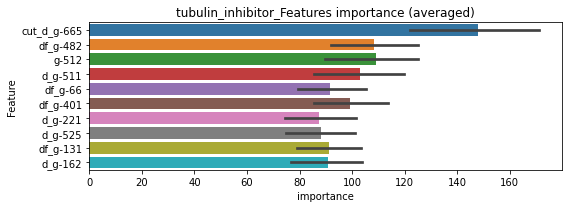

len(train_index) : 2415
len(valid_index) : 805
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00286239	valid_1's binary_logloss: 0.102744


len(train_index) : 2415
len(valid_index) : 805
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2415
len(valid_index) : 805
================================= fold 3/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00452388	valid_1's binary_logloss: 0.130723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00309759	valid_1's binary_logloss: 0.0918127


len(train_index) : 2415
len(valid_index) : 805
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00351214	valid_1's binary_logloss: 0.105807


tubulin_inhibitor logloss: 0.10777152790827894


neg labels: 3289 → selected neg labels: 3281


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281, target_rate: 0.0030654 → Adj_target_rate: 0.0032212
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00606392	valid_1's binary_logloss: 0.0558303
[600]	training's binary_logloss: 0.00111508	valid_1's binary_logloss: 0.0451009
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.001094	valid_1's binary_logloss: 0.044962
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00588049	valid_1's binary_logloss: 0.0505825
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00135878	valid_1's binary_logloss: 0.0429402
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00635032	valid_1's binary_logloss: 0.0288476
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00131753	valid_1's binary_logloss: 0.0217179
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00554436	valid_1's binary_logloss: 0.0463782
Early stopping

1 / 3 AUC score:0.998
y_Threshold: 0.0080479, Threshold: 0.0639467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00307, Num_p_label: 40.0, conf_0:0.04476, conf_1:0.08313
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_1: 0.0639467
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_2: 0.0839467
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_3: 0.1039467
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_4: 0.1239467
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_5: 0.1439467
threshold: 0.1439467, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00541608	valid_1's binary_logloss: 0.0433247
[600]	training's binary_logloss: 0.00104736	valid_1's binary_logloss: 0.0313962
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.00085558	valid_1's binary_logloss: 0.0306728
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00527094	valid_1's binary_logloss: 0.0385297
[600]	training's binary_logloss: 0.00101887	valid_1's binary_logloss: 0.0293368
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00107347	valid_1's binary_logloss: 0.0289543
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00535899	valid_1's binary_logloss: 0.0383318
[600]	training's binary_logloss: 0.00104504	valid_1's binary_logloss: 0.0302181
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000755115	valid_1's binary_logloss: 0

2 / 3 AUC score:1.000
y_Threshold: 0.0377076, Threshold: 0.1439467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0140633 Vs.target_rate: 0.00307, Num_p_label: 56.0, conf_0:0.11516, conf_1:0.17274
Num_p_label: 56.0, Expected: 12.2, Adj_threshold_1: 0.1439467
Num_p_label: 51.0, Expected: 12.2, Adj_threshold_2: 0.1639467
Num_p_label: 46.0, Expected: 12.2, Adj_threshold_3: 0.1839467
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_4: 0.2039467
Num_p_label: 40.0, Expected: 12.2, Adj_threshold_5: 0.2239467
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_6: 0.2439467
Num_p_label: 37.0, Expected: 12.2, Adj_threshold_7: 0.2639467
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_8: 0.2839467
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_9: 0.3039467
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_10: 0.3239467
threshold: 0.3439467, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 645.0/3783, y_label_rate: 0.1704996

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00504153	valid_1's binary_logloss: 0.0494754
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00254084	valid_1's binary_logloss: 0.0442821
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00523273	valid_1's binary_logloss: 0.0295646
[600]	training's binary_logloss: 0.00100792	valid_1's binary_logloss: 0.0203733
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000846532	valid_1's binary_logloss: 0.0198415
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00552704	valid_1's binary_logloss: 0.0417295
[600]	training's binary_logloss: 0.00102284	valid_1's binary_logloss: 0.0338484
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.00106692	valid_1's binary_logloss: 0.0337154
Training until validation scores don't improve for 30 rounds
[300]	trai

3 / 3 AUC score:1.000
y_Threshold: 0.0277573, Threshold: 0.3439467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3773
p_label_rate: 0.0090407 Vs.target_rate: 0.00307, Num_p_label: 36.0, conf_0:0.30955, conf_1:0.37834
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_1: 0.3439467
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.3639467
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_3: 0.3839467
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_4: 0.4039467
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_5: 0.4239467
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_6: 0.4439467
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_7: 0.4639467
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4839467
threshold: 0.4839467, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 640.0/3773, y_label_rate: 0.1696263


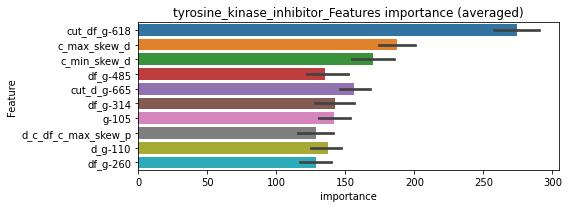

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000909382	valid_1's binary_logloss: 0.0311057


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.00114612	valid_1's binary_logloss: 0.0337214


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000757399	valid_1's binary_logloss: 0.0103692


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000912497	valid_1's binary_logloss: 0.0251951


tyrosine_kinase_inhibitor logloss: 0.025099441573774205


neg labels: 3289 → selected neg labels: 3287


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3287, target_rate: 0.0005039 → Adj_target_rate: 0.0006942
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00073195	valid_1's binary_logloss: 0.00379253
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000285163	valid_1's binary_logloss: 0.00282006
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000753426	valid_1's binary_logloss: 0.00198985
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000282229	valid_1's binary_logloss: 0.00109664
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000765444	valid_1's binary_logloss: 0.00104928
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000283699	valid_1's binary_logloss: 0.000450812
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000732442	valid_1's binary_logloss: 0.00173695
[600]	training's binary_logloss: 0.000282615	valid_1's binary_logloss: 0.0010

1 / 3 AUC score:1.000
y_Threshold: 0.0010473, Threshold: 0.0040283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050, Num_p_label: 40.0, conf_0:0.00282, conf_1:0.00524
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_1: 0.0040283
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0240283
threshold: 0.0240283, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694154	valid_1's binary_logloss: 0.00522024
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000279532	valid_1's binary_logloss: 0.00411302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000706593	valid_1's binary_logloss: 0.00276483
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000268075	valid_1's binary_logloss: 0.00187875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737334	valid_1's binary_logloss: 0.000814736
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000272229	valid_1's binary_logloss: 0.000308688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700994	valid_1's binary_logloss: 0.00160065


2 / 3 AUC score:1.000
y_Threshold: 0.0190326, Threshold: 0.0240283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0037670 Vs.target_rate: 0.00050, Num_p_label: 15.0, conf_0:0.01922, conf_1:0.02883
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0240283
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0440283
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_3: 0.0640283


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000272216	valid_1's binary_logloss: 0.000937422


threshold: 0.0640283, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000694154	valid_1's binary_logloss: 0.00522024
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000279532	valid_1's binary_logloss: 0.00411302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000706593	valid_1's binary_logloss: 0.00276483
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000268075	valid_1's binary_logloss: 0.00187875
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000737334	valid_1's binary_logloss: 0.000814736
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000272229	valid_1's binary_logloss: 0.000308688
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.000700994	valid_1's binary_logloss: 0.00160065


3 / 3 AUC score:1.000
y_Threshold: 0.0190326, Threshold: 0.0640283, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050, Num_p_label: 2.0, conf_0:0.05763, conf_1:0.07043
threshold: 0.0640283, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000272216	valid_1's binary_logloss: 0.000937422


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


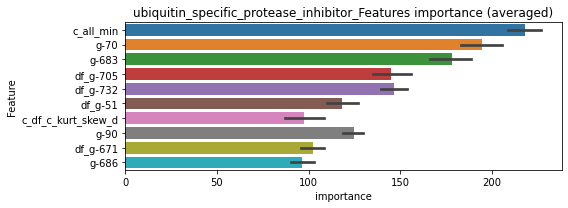

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000270816	valid_1's binary_logloss: 0.00432063
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000273213	valid_1's binary_logloss: 0.00113151
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000274671	valid_1's binary_logloss: 0.000328503
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0017208551523460154


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000288086	valid_1's binary_logloss: 0.00110277
neg labels: 3289 → selected neg labels: 3264


vegfr_inhibitor, len(trt): 170, len(othr): 3264, target_rate: 0.0071387 → Adj_target_rate: 0.0066081
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0198098	valid_1's binary_logloss: 0.164748
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.012367	valid_1's binary_logloss: 0.161489
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0210145	valid_1's binary_logloss: 0.114751
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00629342	valid_1's binary_logloss: 0.099631
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0207499	valid_1's binary_logloss: 0.127141
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00670398	valid_1's binary_logloss: 0.118612
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0201534	valid_1's binary_logloss: 0.130323
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00446205	valid_1's binary_logloss:

1 / 3 AUC score:0.973
y_Threshold: 0.0366725, Threshold: 0.2118409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 228 → Positive_corect_labels: 604/3688
p_label_rate: 0.0100452 Vs.target_rate: 0.00714, Num_p_label: 40.0, conf_0:0.14829, conf_1:0.27539
threshold: 0.2118409, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 604.0/3688, y_label_rate: 0.1637744
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0135327	valid_1's binary_logloss: 0.100712
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00267531	valid_1's binary_logloss: 0.0860476
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0144906	valid_1's binary_logloss: 0.100664
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00428175	valid_1's binary_logloss: 0.092668
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0141169	valid_1's binary_logloss: 0.101851
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00390424	valid_1's binary_logloss: 0.0913017
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.013309	valid_1's binary_logloss: 0.0943482
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00254809	valid_1's binary_logl

2 / 3 AUC score:0.995
y_Threshold: 0.0492703, Threshold: 0.2118409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 576.0/3632
p_label_rate: 0.0158212 Vs.target_rate: 0.00714, Num_p_label: 63.0, conf_0:0.16947, conf_1:0.25421
Num_p_label: 63.0, Expected: 28.4, Adj_threshold_1: 0.2118409
Num_p_label: 56.0, Expected: 28.4, Adj_threshold_2: 0.2318409
Num_p_label: 52.0, Expected: 28.4, Adj_threshold_3: 0.2518409
Num_p_label: 48.0, Expected: 28.4, Adj_threshold_4: 0.2718409
Num_p_label: 43.0, Expected: 28.4, Adj_threshold_5: 0.2918409
Num_p_label: 39.0, Expected: 28.4, Adj_threshold_6: 0.3118409
threshold: 0.3118409, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 576.0/3632, y_label_rate: 0.1585903
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0105176	valid_1's binary_logloss: 0.111047
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.0020991	valid_1's binary_logloss: 0.103075
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.011847	valid_1's binary_logloss: 0.0748221
[600]	training's binary_logloss: 0.00197846	valid_1's binary_logloss: 0.0605436
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.001106	valid_1's binary_logloss: 0.0579493
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0122672	valid_1's binary_logloss: 0.0744237
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00227923	valid_1's binary_logloss: 0.0573471
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0121014	valid_1's binary_logloss: 0.0636007
[600]	training's bina

3 / 3 AUC score:0.998
y_Threshold: 0.0501063, Threshold: 0.3118409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 564.0/3608
p_label_rate: 0.0110497 Vs.target_rate: 0.00714, Num_p_label: 44.0, conf_0:0.28066, conf_1:0.34302
Num_p_label: 44.0, Expected: 28.4, Adj_threshold_1: 0.3118409
Num_p_label: 39.0, Expected: 28.4, Adj_threshold_2: 0.3318409
threshold: 0.3318409, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 564.0/3608, y_label_rate: 0.1563193


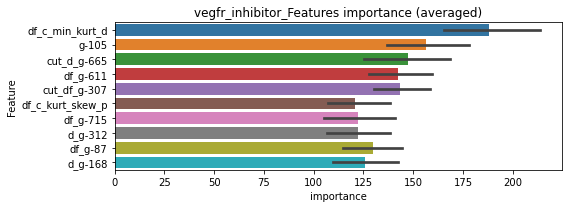

len(train_index) : 2706
len(valid_index) : 902
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00306607	valid_1's binary_logloss: 0.0753189


len(train_index) : 2706
len(valid_index) : 902
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00242892	valid_1's binary_logloss: 0.0844804


len(train_index) : 2706
len(valid_index) : 902
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00247697	valid_1's binary_logloss: 0.0714237


len(train_index) : 2706
len(valid_index) : 902
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.00168875	valid_1's binary_logloss: 0.0489803


vegfr_inhibitor logloss: 0.07005083677992752


neg labels: 3289 → selected neg labels: 3286


vitamin_b, len(trt): 26, len(othr): 3286, target_rate: 0.0010918 → Adj_target_rate: 0.0013394
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00184308	valid_1's binary_logloss: 0.00497732
[600]	training's binary_logloss: 0.000438366	valid_1's binary_logloss: 0.00202901
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000434296	valid_1's binary_logloss: 0.00202281
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00186631	valid_1's binary_logloss: 0.00702061
[600]	training's binary_logloss: 0.000437523	valid_1's binary_logloss: 0.00377908
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000415397	valid_1's binary_logloss: 0.00370691
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00179774	valid_1's binary_logloss: 0.00573466
[600]	training's binary_logloss: 0.000443959	valid_1's binary_logloss: 0.00282383
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000421766	valid_1's bina

1 / 3 AUC score:1.000
y_Threshold: 0.0025571, Threshold: 0.0106974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109, Num_p_label: 40.0, conf_0:0.00749, conf_1:0.01391
Num_p_label: 40.0, Expected: 4.3, Adj_threshold_1: 0.0106974
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.0306974
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.0506974
threshold: 0.0506974, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172637	valid_1's binary_logloss: 0.00623599
[600]	training's binary_logloss: 0.000424343	valid_1's binary_logloss: 0.00286144
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000415246	valid_1's binary_logloss: 0.00283729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173092	valid_1's binary_logloss: 0.00529923
[600]	training's binary_logloss: 0.000424341	valid_1's binary_logloss: 0.00267346
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00040257	valid_1's binary_logloss: 0.00263651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172283	valid_1's binary_logloss: 0.00528954
[600]	training's binary_logloss: 0.00042743	valid_1's binary_logloss: 0.00288578
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000436066	valid_1's binary

2 / 3 AUC score:1.000
y_Threshold: 0.0595607, Threshold: 0.0506974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0110497 Vs.target_rate: 0.00109, Num_p_label: 44.0, conf_0:0.04056, conf_1:0.06084
Num_p_label: 44.0, Expected: 4.3, Adj_threshold_1: 0.0506974
Num_p_label: 34.0, Expected: 4.3, Adj_threshold_2: 0.0706974
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_3: 0.0906974
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_4: 0.1106974
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_5: 0.1306974
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.1506974
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_7: 0.1706974
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_8: 0.1906974
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_9: 0.2106974
Num_p_label: 11.0, Expected: 4.3, Adj_threshold_10: 0.2306974
threshold: 0.2506974, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
===========

Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172637	valid_1's binary_logloss: 0.00623599
[600]	training's binary_logloss: 0.000424343	valid_1's binary_logloss: 0.00286144
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000415246	valid_1's binary_logloss: 0.00283729
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00173092	valid_1's binary_logloss: 0.00529923
[600]	training's binary_logloss: 0.000424341	valid_1's binary_logloss: 0.00267346
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.00040257	valid_1's binary_logloss: 0.00263651
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00172283	valid_1's binary_logloss: 0.00528954
[600]	training's binary_logloss: 0.00042743	valid_1's binary_logloss: 0.00288578
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000436066	valid_1's binary

3 / 3 AUC score:1.000
y_Threshold: 0.0595607, Threshold: 0.2506974, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0022602 Vs.target_rate: 0.00109, Num_p_label: 9.0, conf_0:0.22563, conf_1:0.27577
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_1: 0.2506974
threshold: 0.2506974, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


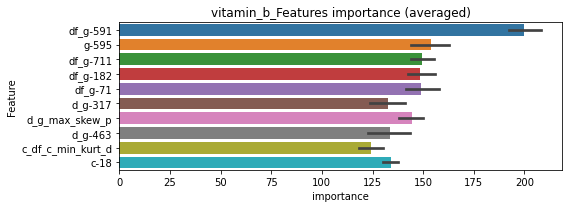

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000418691	valid_1's binary_logloss: 0.00239532


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000413148	valid_1's binary_logloss: 0.00282887


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00042305	valid_1's binary_logloss: 0.00309735


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000418785	valid_1's binary_logloss: 0.00533333


vitamin_b logloss: 0.003414748206337727


neg labels: 3289 → selected neg labels: 3284


vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3284, target_rate: 0.0016377 → Adj_target_rate: 0.0018906
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00292601	valid_1's binary_logloss: 0.0134426
[600]	training's binary_logloss: 0.000613643	valid_1's binary_logloss: 0.00783139
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000547749	valid_1's binary_logloss: 0.00760692
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00313939	valid_1's binary_logloss: 0.0115201
[600]	training's binary_logloss: 0.000626305	valid_1's binary_logloss: 0.00585655
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000566237	valid_1's binary_logloss: 0.00566839
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00310244	valid_1's binary_logloss: 0.00891932
[600]	training's binary_logloss: 0.000634283	valid_1's binary_logloss: 0.00338047
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000546417	valid_1's binary

1 / 3 AUC score:1.000
y_Threshold: 0.0037747, Threshold: 0.0180131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00164, Num_p_label: 40.0, conf_0:0.01261, conf_1:0.02342
Num_p_label: 40.0, Expected: 6.5, Adj_threshold_1: 0.0180131
Num_p_label: 13.0, Expected: 6.5, Adj_threshold_2: 0.0380131
threshold: 0.0380131, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272639	valid_1's binary_logloss: 0.011382
[600]	training's binary_logloss: 0.000589472	valid_1's binary_logloss: 0.00625256
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000537315	valid_1's binary_logloss: 0.00596073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280572	valid_1's binary_logloss: 0.0105654
[600]	training's binary_logloss: 0.00058849	valid_1's binary_logloss: 0.00556972
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000525345	valid_1's binary_logloss: 0.00548274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027963	valid_1's binary_logloss: 0.00681369
[600]	training's binary_logloss: 0.000600882	valid_1's binary_logloss: 0.00219495
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000539213	valid_1's binary_lo

2 / 3 AUC score:1.000
y_Threshold: 0.0337668, Threshold: 0.0380131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0120542 Vs.target_rate: 0.00164, Num_p_label: 48.0, conf_0:0.03041, conf_1:0.04562
Num_p_label: 48.0, Expected: 6.5, Adj_threshold_1: 0.0380131
Num_p_label: 31.0, Expected: 6.5, Adj_threshold_2: 0.0580131
Num_p_label: 23.0, Expected: 6.5, Adj_threshold_3: 0.0780131
Num_p_label: 18.0, Expected: 6.5, Adj_threshold_4: 0.0980131
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_5: 0.1180131
threshold: 0.1180131, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00272639	valid_1's binary_logloss: 0.011382
[600]	training's binary_logloss: 0.000589472	valid_1's binary_logloss: 0.00625256
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000537315	valid_1's binary_logloss: 0.00596073
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00280572	valid_1's binary_logloss: 0.0105654
[600]	training's binary_logloss: 0.00058849	valid_1's binary_logloss: 0.00556972
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000525345	valid_1's binary_logloss: 0.00548274
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.0027963	valid_1's binary_logloss: 0.00681369
[600]	training's binary_logloss: 0.000600882	valid_1's binary_logloss: 0.00219495
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000539213	valid_1's binary_lo

3 / 3 AUC score:1.000
y_Threshold: 0.0337668, Threshold: 0.1180131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00164, Num_p_label: 15.0, conf_0:0.10621, conf_1:0.12981
Num_p_label: 15.0, Expected: 6.5, Adj_threshold_1: 0.1180131
threshold: 0.1180131, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


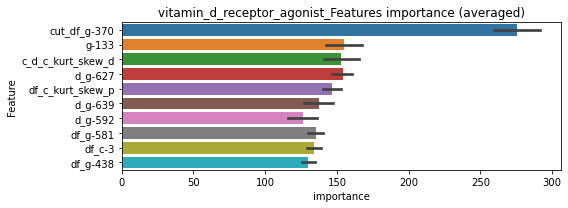

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000552921	valid_1's binary_logloss: 0.00590025


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000538446	valid_1's binary_logloss: 0.00539167


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[759]	training's binary_logloss: 0.000516258	valid_1's binary_logloss: 0.001991


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000520773	valid_1's binary_logloss: 0.00538016


vitamin_d_receptor_agonist logloss: 0.004666175484071572


neg labels: 3289 → selected neg labels: 3287


wnt_inhibitor, len(trt): 30, len(othr): 3287, target_rate: 0.0012598 → Adj_target_rate: 0.0015127
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231627	valid_1's binary_logloss: 0.00637015
[600]	training's binary_logloss: 0.00051886	valid_1's binary_logloss: 0.00229688
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.00045847	valid_1's binary_logloss: 0.0021062
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00231231	valid_1's binary_logloss: 0.0123782
[600]	training's binary_logloss: 0.000510785	valid_1's binary_logloss: 0.00657916
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000461701	valid_1's binary_logloss: 0.00638167
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00245611	valid_1's binary_logloss: 0.00539396
[600]	training's binary_logloss: 0.000525689	valid_1's binary_logloss: 0.00170986
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000472488	valid_1's binary_l

1 / 3 AUC score:1.000
y_Threshold: 0.0035883, Threshold: 0.0163646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126, Num_p_label: 40.0, conf_0:0.01146, conf_1:0.02127
Num_p_label: 40.0, Expected: 5.0, Adj_threshold_1: 0.0163646
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_2: 0.0363646
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.0563646
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_4: 0.0763646
threshold: 0.0763646, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218209	valid_1's binary_logloss: 0.00685746
[600]	training's binary_logloss: 0.000491296	valid_1's binary_logloss: 0.0027506
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000442584	valid_1's binary_logloss: 0.00259302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217138	valid_1's binary_logloss: 0.00921713
[600]	training's binary_logloss: 0.000487439	valid_1's binary_logloss: 0.00509742
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.0005063	valid_1's binary_logloss: 0.00506911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222013	valid_1's binary_logloss: 0.00421173
[600]	training's binary_logloss: 0.000498735	valid_1's binary_logloss: 0.00138275
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000454729	valid_1's binary_

2 / 3 AUC score:1.000
y_Threshold: 0.0705253, Threshold: 0.0763646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00126, Num_p_label: 20.0, conf_0:0.06109, conf_1:0.09164
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0763646
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_2: 0.0963646
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_3: 0.1163646
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_4: 0.1363646
threshold: 0.1363646, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00218209	valid_1's binary_logloss: 0.00685746
[600]	training's binary_logloss: 0.000491296	valid_1's binary_logloss: 0.0027506
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000442584	valid_1's binary_logloss: 0.00259302
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00217138	valid_1's binary_logloss: 0.00921713
[600]	training's binary_logloss: 0.000487439	valid_1's binary_logloss: 0.00509742
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.0005063	valid_1's binary_logloss: 0.00506911
Training until validation scores don't improve for 30 rounds
[300]	training's binary_logloss: 0.00222013	valid_1's binary_logloss: 0.00421173
[600]	training's binary_logloss: 0.000498735	valid_1's binary_logloss: 0.00138275
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000454729	valid_1's binary_

3 / 3 AUC score:1.000
y_Threshold: 0.0705253, Threshold: 0.1363646, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00126, Num_p_label: 10.0, conf_0:0.12273, conf_1:0.15000
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.1363646
threshold: 0.1363646, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


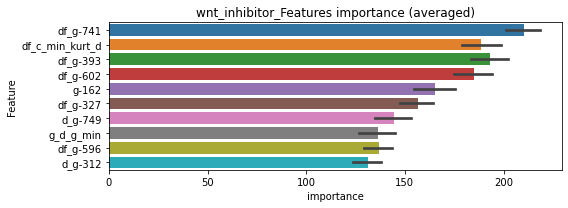

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000458106	valid_1's binary_logloss: 0.00266618


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000446285	valid_1's binary_logloss: 0.0052825


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000445091	valid_1's binary_logloss: 0.00121564


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000438766	valid_1's binary_logloss: 0.00302153


wnt_inhibitor logloss: 0.003047028627980461


In [48]:
scores = RUN()

In [49]:
print(f"CV:{np.mean(scores)}")

CV:0.020481758473972357
